In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import tensorflow as tf

# Introduction

The goal of this module is to help distiguish between real and counterfeit Pokemon cards. Pokemon cards have become increasingly popular over the past few years, and with that the number of counterfeit cards has also increased. Even Walmart was recently in the news for selling fake Pokemon cards. With a large number of counterfeit cards being out in the world and with a large number of buyers, it can be very easy for a potential buyer to get ripped off. The goal of this module is to help any potential buyer to avoid buying counterfeit cards and wasting their money.

# Image Augmentation

The original image dataset is located here: https://www.kaggle.com/datasets/ongshujian/real-and-fake-pokemon-cards

The image format is extremely similar for all Pokemon cards in the dataset. The same camera, the same angle, the same background, and the same lighting was used for all images. This may seem like a good thing, but if a model is trained only on these images, it may not know how to interpret images taken in a different environment. Image augmentation will be completed below to emulate pictures of Pokemon cards in a different environment. The model will then include these modified images for training.

In [2]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from skimage import io
# from PIL import Image

# datagen = ImageDataGenerator(        
#         rotation_range = 40,
#         shear_range = 0.2,
#         zoom_range = 0.2,
#         horizontal_flip = False,
#         brightness_range = (0.5, 1.5))

# image_directory = r"pokemon_image_data/real_fake_split_backup/real/"
# SIZE = 256
# dataset = []
# my_images = os.listdir(image_directory)
# for i, image_name in enumerate(my_images):
#     if (image_name.split('.')[1] == 'JPG'):        
#         image = io.imread(image_directory + image_name) 
#         image = Image.fromarray(image, 'RGB')        
#         image = image.resize((SIZE,SIZE)) 
#         dataset.append(np.array(image))
        
# x = np.array(dataset)
# i = 0
# for batch in datagen.flow(x, batch_size=16,
#                           save_to_dir= r'pokemon_image_data/real_fake_split_backup/real_augmented/',
#                           save_prefix='dr',
#                           save_format='jpg'):    
#     i += 1    

#     if i > 50:        
#         break

In [3]:
# datagen = ImageDataGenerator(        
#         rotation_range = 40,
#         shear_range = 0.2,
#         zoom_range = 0.2,
#         horizontal_flip = False,
#         brightness_range = (0.5, 1.5))

# image_directory = r"pokemon_image_data/real_fake_split_backup/fake/"
# SIZE = 256
# dataset = []
# my_images = os.listdir(image_directory)
# for i, image_name in enumerate(my_images):
#     if (image_name.split('.')[1] == 'JPG'):        
#         image = io.imread(image_directory + image_name) 
#         image = Image.fromarray(image, 'RGB')        
#         image = image.resize((SIZE,SIZE)) 
#         dataset.append(np.array(image))
        
# x = np.array(dataset)
# i = 0
# for batch in datagen.flow(x, batch_size=16,
#                           save_to_dir= r'pokemon_image_data/real_fake_split_backup/fake_augmented/',
#                           save_prefix='dr',
#                           save_format='jpg'):    
#     i += 1    

#     if i > 50:        
#         break

This was only ran once and the augmented files are stored locally. These images will be added on to the training set after running train_test_split. The augmented images need to be only included in the training set.

# Importing Image Data

In [4]:
DATADIR = "pokemon_image_data/real_fake_split"
CATEGORIES = ["fake", "real"]

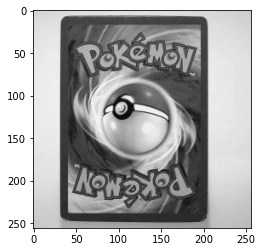

In [5]:
# testing the image import

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [6]:
print(img_array.shape)

(256, 256)


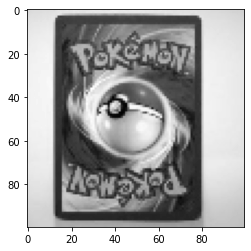

In [7]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [8]:
# image import

img_data = []

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        img_data.append([new_array, class_num])

In [9]:
print(len(img_data))

451


# Preprocessing Image Data

In [10]:
# shuffling the data so the model doesn't just learn based on order (ie 100 fake images in a row to start)
import random

random.shuffle(img_data)

In [11]:
X = []
y = []

for features, label in img_data:
    X.append(features)
    y.append(label)

In [12]:
# can't pass lists to Keras -> converting to an array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [13]:
X.shape

(451, 100, 100, 1)

In [14]:
y.shape

(451,)

In [15]:
X = X/255.0

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print(f"The number of observations in training set is {X_train.shape[0]}")
print(f"The number of observations in test set is {X_test.shape[0]}")

The number of observations in training set is 360
The number of observations in test set is 91


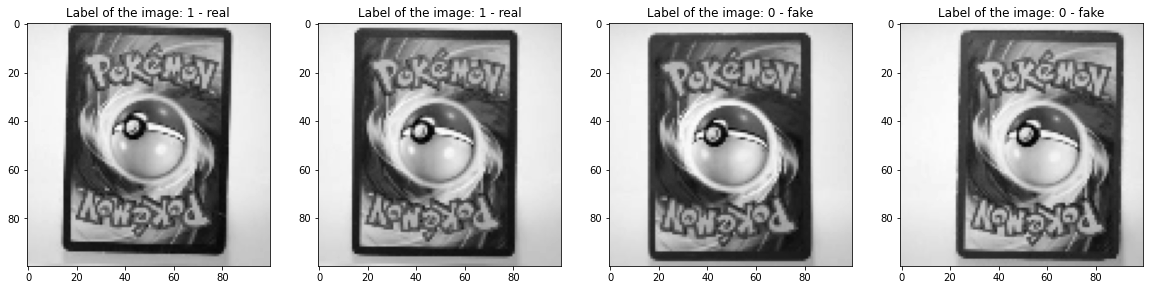

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[123]} - {CATEGORIES[y_train[123]]}")

plt.subplot(142)
plt.imshow(X_train[124].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[124]} - {CATEGORIES[y_train[124]]}")

plt.subplot(143)
plt.imshow(X_train[125].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[125]} - {CATEGORIES[y_train[125]]}")

plt.subplot(144)
plt.imshow(X_train[126].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[126]} - {CATEGORIES[y_train[126]]}")

plt.show()

# Appending Augmented Images to Training Data

In [18]:
DATADIR_AUG = "pokemon_image_data/augmented_real_fake_split"

In [19]:
img_data = []

for category in CATEGORIES:
    path = os.path.join(DATADIR_AUG, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        img_data.append([new_array, class_num])

In [20]:
print(len(img_data))

1579


In [21]:
X = []
y = []

for features, label in img_data:
    X.append(features)
    y.append(label)

In [22]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [23]:
X = X/255.0

In [24]:
X_train = np.concatenate((X_train, X))

In [25]:
y_train = np.concatenate((y_train, y))

In [26]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)

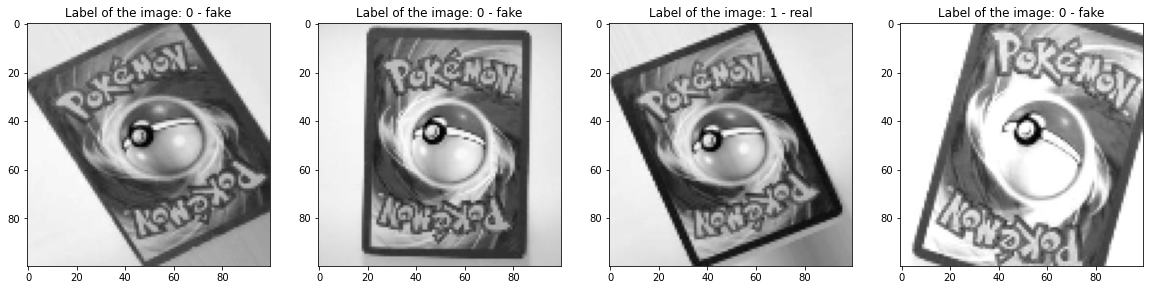

In [27]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[123]} - {CATEGORIES[y_train[123]]}")

plt.subplot(142)
plt.imshow(X_train[124].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[124]} - {CATEGORIES[y_train[124]]}")

plt.subplot(143)
plt.imshow(X_train[125].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[125]} - {CATEGORIES[y_train[125]]}")

plt.subplot(144)
plt.imshow(X_train[126].reshape(IMG_SIZE,IMG_SIZE), cmap="gray")
plt.title(f"Label of the image: {y_train[126]} - {CATEGORIES[y_train[126]]}")

plt.show()

# Training and tuning models

**Model #1**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [29]:
# model = Sequential()
# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation("relu"))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

In [30]:
# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

**Model #2**

In [31]:
# model = Sequential()
# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation("relu"))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size=6, epochs=20, validation_split=0.2)

# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

**Model #3**

In [32]:
# model = Sequential()
# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation("relu"))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

**Model #4**

In [33]:
# model = Sequential()
# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation("relu"))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

# Further Model Optimization

In [34]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [35]:
# NAME = f'Pokemon_cards_model2_{int(time.time())}'

# tensorboard = TensorBoard(log_dir=f'logs/{NAME}')

**Selected Model - Model #2**

In [36]:
# model = Sequential()
# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation("relu"))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])

# model.fit(X_train, y_train, batch_size=6, epochs=20, validation_split=0.2, callbacks = [tensorboard])

# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

In [37]:
# #looking at various parameters in tensorboard

# dense_layers = [0, 1, 2]
# layer_sizes = [32, 64, 128]
# conv_layers = [1, 2, 3]

# for dense_layer in dense_layers:
#     for layer_size in layer_sizes:
#         for conv_layer in conv_layers:
#             NAME = f'{conv_layer}-conv-{layer_size}-nodes-{dense_layer}-dense-{int(time.time())}'
#             print(NAME)
            
#             tensorboard = TensorBoard(log_dir=f'logs/{NAME}')
            
#             model = Sequential()
#             model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))
#             model.add(Activation("relu"))
#             model.add(MaxPooling2D(pool_size=(2,2)))
            
#             for l in range(conv_layer-1):
#                 model.add(Conv2D(layer_size, (3,3)))
#                 model.add(Activation("relu"))
#                 model.add(MaxPooling2D(pool_size=(2,2)))
                
#             model.add(Flatten())

#             for l in range(dense_layer):
#                 model.add(Dense(layer_size))
#                 model.add(Activation("relu"))

#             model.add(Dense(1))
#             model.add(Activation('sigmoid'))

#             model.compile(loss='binary_crossentropy',
#                          optimizer='adam',
#                          metrics=['accuracy'])

#             model.fit(X_train, y_train, batch_size=6, epochs=20, validation_split=0.2, callbacks = [tensorboard])

#             score = model.evaluate(X_test, y_test, verbose=0)
#             print('Test score:', score[0])
#             print('Test accuracy:', score[1])

In [38]:
from IPython import display
from base64 import b64decode

The plots below show the accuracy and loss for all of the models from the tuning above. The best parameters were:
dense_layers=1
layer_sizes=128
conv_layers=3

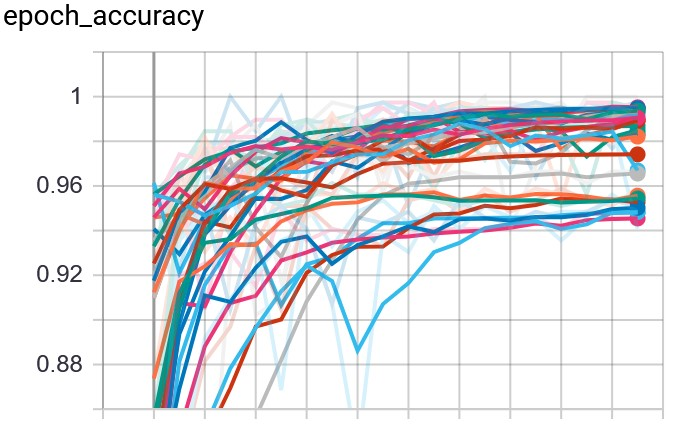

In [39]:
epoch_validation_accuracy_all = "/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAG2AqMDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6K8F/bD/aOvv2evAejjw1pMWv8Aj7xVqsOg+G9LnJEUl3KcB5MEEouRwCCWZRkAlh4T8VvEX7U37J3giL4reKviRoHxS8O6fLAfEXhOPQIbAW0MsqRk2lzGokkKs4AZwMD5irYIoA+8KK+IP2ov2lPijpfx2+AegfB3V9LOn+PtOuZ1tNbtUNpPvjUwzyuFMyiNX8zbGw3FACDnFYnxU+KH7Rn7FGteGfGXxG+IGk/Fr4WajqMOmaykWhQ6ZdaWZCT5sQiGXACnBZiCRtKqWDAA++qK+V/2pv2iPHOmfFLwV8Evg7Fpw+Iniu2k1GbW9VTzLXSNPXePP2chnJjkxuBHyY2sXGPPfH3xT+Pf7Eut+GfEnxS8d6Z8YPhVq1/DperX0ehw6VfaNJIG2yosPyugwSSxOdu3CFgaAPuqivlb9qP9oHx7Z/FzwV8Dvg9/Ztr4+8T2kmqXevatH51vpGnpvHmrHyHdjHJjcCPlA2neCvNx+Lv2if2afi14G07x/wCJYPjb8PfFt/HpNxq+n+HU0+90S4c4WR47cFDDzksxPCN9wgbwD1/wz+0p/wAJF+1p4u+CX/COfZ/7A0GHW/7c+3bvP3mAeV5Hljbjz/vbz93pzx7dX5u+Jrb4m6n/AMFRPibpnwtvdI0XWb7whZQ3mu6xCZ00y0xaM00cOcSy7hGqq3y/MSeBkem/Cj4s/Gj4Q/tgaT8E/ix4w074l6Z4q0WXVdG1+10qHTp7d4hIzRvHEAuCIZMg7usZDD5loA+1aKK5L4seKNe8GfDnX9a8L+HJvF3iK0ti1hosDhGupiQqqWJGFBO5j12g45oA62ivhPxla/theB/g7qnxe1P4reHIdR0rT5Nfvvhz/wAIxB9iht40Mstv9sz5xdYw2QDywIEh4au++JX7cA8I/sa+FPjBpugrd+JfF0VpZaPocjMYjqU6t8jEYZo0Mcp4wWCAZXdkAH1dRXw140sf2x/g34Bb4l3XxF0D4hXWnqLzVfh1B4biiiEB/wBZHbXUQE0roDkZxnaT8+Ardn+0J+1x4k0fwb8JNH+GehRr8S/it5Y0m08QIyx6TGY43nluUHO6LzQNuMZVzhtm1gD6yor4e8beIv2nv2UJfD3i/wAUeNLX47+C7i9iste0jT/DEdjf6ckh/wBfbfZxmULgjL+oG0bty99Y/Gnxjcf8FFb/AOGLazu8Cx+BxrCaX9lh4ujOi+Z5uzzPusRt37eelAH1HRXy5+0T8aPGXgX9rX9nfwXoesfYfDXiyfUk1mx+ywyfahFHGYxvdC6YLH7jLnPOa8t+J3xd/aK8Yftt+OPg58K/FGjaPpNvoNpqC3etWMMi6ShWAyzRYjLyyM0gQK+9RvJwMAgA+9aK+W/iPdftKW1v8PPhx4PudPm1u8si/if4rX1hE1raMm7/AFNoMKZX252lCg3KOMll43S/il8a/wBm39pj4cfDz4oeONN+K3hP4ifabfT9aj0SHSr2xuoFUlTFCdhQmSIckk7yQV2kMAfa1FfIPxh+N/xT+KH7St38Cvgtqum+Dp9A06LU/FHjLUrJb17PzAjRQW8D/IzFZEJ3DnceU2EsngLxt8efhX8eLH4UfE7WU8f+H/FVhcy6J8RNI0NLOXT7mOMkx3UKKYV+78uQclkyWBZVAPr+ivlD9hT9oTxV8QPAfxE0X4savDdeO/h7r11p2s3rW8Vspt1yY5mWJVQDMcygheREDznNXf2Afix8QPj58O/FXxF8Z6m9xo2t+ILoeGNNazghWy06NyqgNGitJ85eMlyx/c9ck0AfUVFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfCf/BVz4cN4g8E/DXxtf6BceKfB/g/xAtx4l0m0Z0lk02XYJmDIQygCPaWBBXzAeACR5x4g+Hf/AATp0XwZaeIbWy0/xC175a2mi6J4h1O61WeRyAsYtBdCRGJOMSBcHg81+mTKJFKsAysMEEZBFcN4f+A/w08J+IBr2h/Dvwpo2uBmYanp+iW0Fzls7j5qIGycnPPOaAPhf9sLxL4R+A/7V/7JmpXAm0TwT4d0+eBd8UzvZ2iokSb1bMmEUru3ZYBTnJrT/wCCh/x78GftCfDTw58GPhZ4i0zx94z8Y61ZrFBoVyt3HbQoxdpJZIyVTBC5BOQu9iAFzXoP7UPw98ReKP25/wBm/WrHwzqmreHNNXUE1PULewkmtLVXTAE8gUogbp8xGa+nfB/wa8AfDzVLjUvCvgbw34Z1G4QxzXmj6Rb2k0qk5Ks8aAkZAOCaAPj39ofUo/2Yv25vhl8YPE0c6/DfUvDTeD7/AFpImdNOuQ8jxtIFBwrZj/ASEZ24rK/4KA/G3wn+0p4H8OfA34T67p3j/wAZeLtYtGP9g3C3lvYWsbF3mmljJVcEKSCchQ7HAAz996zoun+I9LudM1awtdU026Qxz2d5Cs0MqnqrowIYexFc/wCCPhH4F+GclzJ4P8F+HvCkl0As7aHpUFmZQOgcxIu7HvQB8d/tAapa/sz/ALePwz+LPikTW3w51Xwu3hC51zy2eOwu1eSRDLtHyqwKY9hIeiGvXPE37cvhG8+KngX4ffC8WHxa17xDeKt++g6orW2j2Ix5l3LNGkiNtGT5eQeOSpKhvobXNB0zxPpNzpesadaatpl0nlz2V9As0Mq/3XRgVYexFYvgf4V+CvhlHcp4P8H6D4US6IM66HpkFmJSM43iJV3YyevrQB8m/DP/AJS0fFz/ALES0/8AQrGj4w/8pWPgL/2Kmp/+ir2vr+18DeG7LxbeeKrfw/pcHie8gFrc61FZRrezwjbiN5gu9kGxflJx8o9BVTxJ8NfDfijVF1m70izj8Sw2c1jZ+IobaManYxyIyt9nuCpeM4duhxknjk0AdPXgf7d3jLxl8P8A9k/4g694Ca4h8SWtpH5d1aLma2haaNbiZOMgpCZG3Dlcbv4a5H/hgX/q439oD/wuf/tFeqfA34A/8KPGuA/Eb4gfEEap5H/I9a5/af2Ty/M/1H7tdm/zPm652J6UAfm5498P/sXwfss33iOLVm8cfFnVNAmNtdXOr31zrEmrPAxEtxbiULGElO9i6hNqH7/8XZ+NvCesa3/wTF+APjDQbCTWv+ED1Oy8SX1nbDc7WsEk6zEAf3CylvRQ5PANfoXpPwE+GXh+81C70v4c+E9NutQhktrye00O1ie5ikBEkcjLGC6sCQytkHJzXTeF/CeieCNBttE8O6Np+gaLa7hBpul2qW1vFuYu2yNAFXLMzHA5LE96APnDx9/wUb+DXhz4TL4u8NeJ9P8AGmt3saLpXhHT7rGp3dw5ASF4QrSQcnlnTHHG4kA+Wftc63rPgX4m/syftD+KvDdzo+haGZbXxVYW7G7bQzewooLsqAuELyqWCjLIoAy6g/YGh/A74ceGfEx8R6P8P/C2k+ISzOdWsdFtobss2dx81UD5OTnnnNdjeWdvqVnPaXcEd1azo0csEyB0kQjBVlPBBHBBoA+Y/ir+394C8PR+GdL+GVxpvxk8b+JL6K007w34f1RdwVvvyzypHKIFQYJDqD1OAFYr5V8UPHGjfAX/AIKh6L4s8c30Xh/wv4m8CtpdprN4dlqtwk+5keQjC48tck4A81M4zX2N4L+DXgD4b31xe+EfA3hvwteXCeXNcaLpFvZySLnO1mjRSRkA4NaXjL4f+F/iNpaab4s8N6R4o05JBKtnrNjFdwq4BAYJIrDOCecd6APgL4zfH/wJ8av+ChH7Nlj4H1+38TR6Dc6gt7f6efMtPMmhUrGko+WQgR5O0kDcoznIHoPwz/5S0fFz/sRLT/0Kxr6q034N+ANFbQm0/wADeG7FtBeWXSTbaRbxnTnkAErW+1B5RcKu4pjO0ZzitW18DeG7LxbeeKrfw/pcHie8gFrc61FZRrezwjbiN5gu9kGxflJx8o9BQB8K/tweKtL1P9rz4ceAfi94i1Lwx8B7/RJLuRbe6ltLLU9REsgMV1NGQQihYeM/JuByu/I8R1jTf2c/DP7cX7POm/AO3thFb63MmualYXlzd2c0jCIW8Uc00jq7L+8J8s4/erkk8D9WPGHgXw38QtJ/srxV4e0rxNpe8S/YtYsoruHeM4bZIpXIyecd6xrf4I/Dqzt9Cgg8A+F4YNBuTeaRHHo1sq6dOWVjLbgJ+6fKIdyYOVU54FAHx9H410n9lT/got8RtV+Id0vh7wl8TtKsptF8Q3nyWYuLaOOOSCSX7qHIc5YgAGPON4Ne2+Hv2zvD/wASf2iNK+GXw2soPiBpq2Ut74g8WaXqGbDR1CnykDLGyTs7AL8rgDcOThgvuHizwX4e8faO+k+JtC0zxHpTsHax1azjuoGYdCUkUqSPpUXg3wD4Y+HWltpnhTw5pPhjTWcytZ6NYxWkJcgAsUjUDPA5x2oA/Mv9vyXxJ+zj+0D40uvCFjNcWvx28KjQRDD8o/tNZYYJGAH8XkPx6tcMfev0c+Cfwys/gz8I/CPgew2NBoWmw2TSIMCWRVHmS/V3LOfdjXyvp0XjT9sf9qDwD4k1r4aeIvh58M/hnLcalEPF1obS81XU3CiEpEf4I2RXDAkfKcnLAD7eoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKpat/aP2df7M+y+fv+b7Xu27cHpt5znH61dooA4Pxl4m8UeDvDd5q8sGkXKW+390jSqWLOqjnty1bf/FV/9Qf/AMi1jfG//kl+s/8AbD/0fHXdUAc9/wAVX/1B/wDyLR/xVf8A1B//ACLXQ0UAc9/xVf8A1B//ACLR/wAVX/1B/wDyLXQ0UAc9/wAVX/1B/wDyLXJfD34h+I/iDDqclvZ6XaCxuTbMJGkbcQOoxXp1eMfs1f8AHl4r/wCwo38qAPRv+Kr/AOoP/wCRaP8Aiq/+oP8A+Ra6GigDnv8Aiq/+oP8A+RaP+Kr/AOoP/wCRa6GigDnv+Kr/AOoP/wCRaoXWreKbXV7GxMejsbpXYPmX5doz0rsK57Vv+Rx0L/cn/wDQRQAf8VX/ANQf/wAi0f8AFV/9Qf8A8i10NFAHPf8AFV/9Qf8A8i0f8VX/ANQf/wAi10NFAHPf8VX/ANQf/wAi1V1S+8Vabp9xdlNHkEKF9oMozjtXV1leKv8AkW9S/wCuDfyoAzbO48VXdpBOF0dRKivt/e8ZGcVN/wAVX/1B/wDyLWro3/IHsf8ArhH/AOgirlAHPf8AFV/9Qf8A8i0f8VX/ANQf/wAi10NFAHPf8VX/ANQf/wAi0f8AFV/9Qf8A8i10NFAHH6fq3iq/vr+2EWjobR1QtmU7sjOfar//ABVf/UH/APItHh3/AJD3iH/rvH/6DXQ0Ac9/xVf/AFB//ItH/FV/9Qf/AMi10NFAHPf8VX/1B/8AyLR/xVf/AFB//ItdDRQBx+pat4p066sITHo7m6l8oHMo28Zz71f/AOKr/wCoP/5Fo8Tf8hTQP+vv/wBlroaAOe/4qv8A6g//AJFo/wCKr/6g/wD5FroaKAOe/wCKr/6g/wD5Fo/4qv8A6g//AJFroaKAOauZvFVvbyy40dvLQtj97zgZqDSdQ8VarptvdhNHjEy7tpMpxXR6l/yDbv8A65P/AOgmqHg//kWdO/65CgCt/wAVX/1B/wDyLR/xVf8A1B//ACLXQ0UAc9/xVf8A1B//ACLR/wAVX/1B/wDyLXQ0UAc9/wAVX/1B/wDyLVC31bxTPrF1p/l6ODBGrmTMvO7tiuwrntP/AOR01b/r3h/rQAf8VX/1B/8AyLR/xVf/AFB//ItdDRQBz3/FV/8AUH/8i0f8VX/1B/8AyLXQ0UAc9/xVf/UH/wDItUNZ1bxTo8MEhj0eXzZ0hwDKMbj1rsK57xr/AMeNh/1/Q/zNAB/xVf8A1B//ACLR/wAVX/1B/wDyLXQ0UAc9/wAVX/1B/wDyLR/xVf8A1B//ACLXQ0UAc9/xVf8A1B//ACLR/wAVX/1B/wDyLXQ0UAcfoereKdb05LtY9HiDMy7SZT0JH9Kv/wDFV/8AUH/8i0eA/wDkW4P+ukn/AKGa6GgDnv8Aiq/+oP8A+RaP+Kr/AOoP/wCRa6GigDnv+Kr/AOoP/wCRaP8Aiq/+oP8A+Ra6GigDj21bxSuurpvl6Pua3+0eZmXH3tuMVf8A+Kr/AOoP/wCRaH/5H6P/ALBx/wDRldDQBz3/ABVf/UH/APItH/FV/wDUH/8AItdDRQBz3/FV/wDUH/8AItH/ABVf/UH/APItdDRQByWrat4l0Oxe9uItKmgiZPMjjaVWKlgDgkYzzXWVz/j7/kUr/wD7Z/8Aoxa6BfuigBaKKKACiiigAooooAKKKKACiiigAooooAKKKKAOF+N//JL9Z/7Yf+j467quF+N//JL9Z/7Yf+j467qgAooooAKKKKACvGP2av8Ajy8V/wDYUb+Vez14x+zV/wAeXiv/ALCjfyoA9nooooAKKKKACue1b/kcdC/3J/8A0EV0Nc9q3/I46F/uT/8AoIoA6GiiigAooooAKyvFX/It6l/1wb+VatZXir/kW9S/64N/KgCzo3/IHsf+uEf/AKCKuVT0b/kD2P8A1wj/APQRVygAooooAKKKKAOe8O/8h7xD/wBd4/8A0GuhrnvDv/Ie8Q/9d4//AEGuhoAKKKKACiiigDnvE3/IU0D/AK+//Za6Gue8Tf8AIU0D/r7/APZa6GgAooooAKKKKAK2pf8AINu/+uT/APoJqh4P/wCRZ07/AK5Cr+pf8g27/wCuT/8AoJqh4P8A+RZ07/rkKANiiiigAooooAK57T/+R01b/r3h/rXQ1z2n/wDI6at/17w/1oA6GiiigAooooAK57xr/wAeNh/1/Q/zNdDXPeNf+PGw/wCv6H+ZoA6GiiigAooooAKKKKAOe8B/8i3B/wBdJP8A0M10Nc94D/5FuD/rpJ/6Ga6GgAooooAKKKKAOef/AJH6P/sHH/0ZXQ1zz/8AI/R/9g4/+jK6GgAooooAKKKKAOe8ff8AIpX/AP2z/wDRi10C/dFc/wCPv+RSv/8Atn/6MWugX7ooAWiiigAooooAKKKKACiiigAooooAKz9T8QaXotxYQajqVnYT6hN9ms47qdI2uZSCfLjDEb2wCdoycA1oV8G/ET4eeOPDv7S3wG8RfELxhH4k8Qarrk8S6fpsJh03TYkWMiOBW+ZiS5y7YJAXOcZqoq4H3lRRTJJUiXLuqDpljipA4j43/wDJL9Z/7Yf+j467quA+Nt1C/wAMdZCzRsf3PAYf89o67r7TD/z1T/voUAS0VF9ph/56p/30KPtMP/PVP++hQBLRUX2mH/nqn/fQo+0w/wDPVP8AvoUAS14x+zV/x5eK/wDsKN/KvYvtMP8Az1T/AL6FeNfs2zJHZeK9zqudUbGTjtQB7VRUX2mH/nqn/fQo+0w/89U/76FAEtFRfaYf+eqf99Cj7TD/AM9U/wC+hQBLXPat/wAjjoX+5P8A+gitz7TD/wA9U/76Fc/q1xF/wmGhfvU+5P8AxD+6KAOloqL7TD/z1T/voUfaYf8Anqn/AH0KAJaKpXmsWlh5RmnRRI+wHcOPc+1WPtMP/PVP++hTs9xXV7EtZXir/kW9S/64N/KtD7TD/wA9U/76FZfiq5i/4RvUv3qf6hv4h6Uhl3Rv+QPY/wDXCP8A9BFXKztHuYv7Hsf3qf6iP+If3RVz7TD/AM9U/wC+hQBLRURuoVBJmjAH+0Kr2OsWmowmWGZCgYryw7f5/WnZ2uK6vYu0VF9ph/56p/30KPtMP/PVP++hSGYfh3/kPeIf+u8f/oNdDXNeHbiL+3vEH71P9en8Q/uV0H2mH/nqn/fQoAloqL7TD/z1T/voUfaYf+eqf99CgCWiovtMP/PVP++hR9ph/wCeqf8AfQoAw/E3/IU0D/r7/wDZa6Gua8TXEX9qaB+9T/j7/vD+7XQfaYf+eqf99CgCWiovtMP/AD1T/voUfaYf+eqf99CgCWiovtMP/PVP++hR9ph/56p/30KAI9S/5Bt3/wBcn/8AQTVDwf8A8izp3/XIVa1K5i/s26/ep/qn/iHoao+ELiL/AIRnTv3qf6ofxCgDcoqL7TD/AM9U/wC+hR9ph/56p/30KAJaKi+0w/8APVP++hR9ph/56p/30KAJa57T/wDkdNW/694f61ufaYf+eqf99Cuf0+4i/wCE01b96n/HvF/EPegDpaKi+0w/89U/76FH2mH/AJ6p/wB9CgCWiq76hbxuqGZNzHgbhT/tMP8Az1T/AL6FAEtc941/48bD/r+h/ma3PtMP/PVP++hXP+NLiL7DYfvU/wCP6H+IepoA6WiovtMP/PVP++hR9ph/56p/30KAJaKi+0w/89U/76FH2mH/AJ6p/wB9CgCWiovtMP8Az1T/AL6FH2mH/nqn/fQoAw/Af/Itwf8AXST/ANDNdDXNeA7iL/hG4f3qf6yT+If3zXQfaYf+eqf99CgCWiovtMP/AD1T/voVG2o2qkg3MQI/2xQBZoqt/aVp/wA/MX/fYo/tK0/5+Yv++xQBjv8A8j9H/wBg4/8Aoyuhrln1C2/4TyNvtEe3+ziM7x/z0roP7StP+fmL/vsUAWaKrf2laf8APzF/32KVdQtpGwtxGT7OKALFFRfaYf8Anqn/AH0KPtMP/PVP++hQBh+Pv+RSv/8Atn/6MWugX7ornPHtxE3hO+AkQk+XwGH/AD0WujX7ooAWiiigAooooAKKKKACiiigAooooAK+X/2qP+Tgv2bP+w/d/wDoENfUFFNOzuAVU1LS7TV4FhvIVniVt4Vs9cEZ/U1bopAeXfGbwlpFn8NdZlhsY45AIl3AnoZkB7+hNdp/wg+h/wDQPT/vtv8AGsL43/8AJL9Z/wC2H/o+Ou6oAwv+EH0P/oHp/wB9t/jR/wAIPof/AED0/wC+2/xrdooAwv8AhB9D/wCgen/fbf40f8IPof8A0D0/77b/ABrdooAwv+EH0P8A6B6f99t/jXkf7PXh3TtUs/E5urVZjHqTImWIwMdODXvNeMfs1f8AHl4r/wCwo38qAPSv+EH0P/oHp/323+NH/CD6H/0D0/77b/Gt2igDC/4QfQ/+gen/AH23+NH/AAg+h/8AQPT/AL7b/Gt2igDC/wCEH0P/AKB6f99t/jWBqngvRV8XaGosE2sk+Rub+6Peu8rntW/5HHQv9yf/ANBFAEn/AAg+h/8AQPT/AL7b/Gj/AIQfQ/8AoHp/323+NbtNkkWGN5HOFUFifYUAebeJvB+lX+sQ2FtYJuVem9vvEZ9fTFXvC+g6LcK1ldWCi5i4G5mBYDt16itHwpG2oapeahIO5C/U/wCA/nU3ijSnhkXU7TKyxkGTb7fxf413Pl0ov+mefHm1rL+kWf8AhB9D/wCgen/fbf41l+KPBOiJ4d1FhYICIGI+ZvT610Wi6smrWayrgSDiRPQ/4VD4q/5FvUv+uDfyriacXZnfGSkrozNH8E6I2k2RNghJgQ/eb+6Perf/AAg+h/8AQPT/AL7b/GtHRv8AkD2P/XCP/wBBFV/EGsLpFmSMGd+I1/r9BTjFydkKUlFXZyPibw/o7SrptnYK0zkB9rt3/h61F4X8I6RZ6nc6fcWKFuo+duo9Oe45/Cul8K6O0Km/uctcS8ru6gHv9TVTxPG2maxaajGOGI3e5H+I/lXWuXWkv6Zwvm0rS/pGh/wg+h/9A9P++2/xo/4QfQ/+gen/AH23+NbcciyRq6nKsMg+op1cR6Bwfh/wXora5r4NghCzJj5m/u/Wt/8A4QfQ/wDoHp/323+NR+Hf+Q94h/67x/8AoNdASFBJOBQBh/8ACD6H/wBA9P8Avtv8apSeHPD0chX+zlYD+JXb/Gta4u3vJPJgHy9z6/8A1qs29nBB+6ba8pGTu64oAxY/C/hyTpZxg/7TMP61OvgnQmGVsIyPZ2/xrUk02CT+Daf9k1XbSSpzFMVPvQByviTwXoq6noQFggDXWD8zf3frW/8A8IRof/QPT/vtv8a5LxxqV/ba9odnBNukFxkkYJyV9T7fzrbXwvqWoYa8vcKecFi/6dK3VNWTk7HO6ru1GNyW40Hwra58yGAEfwrIzH8gay7lfC8fEOlmY+u5lH8/6VNqWk6fpK+Xve6uSPu5wq/XHP61n2sLeaPKiEj9l2bv071VqS7s66eFxNWPO2orzLCr4bfppHPp5h/xp3keHf8AoD/+RD/jVY2qXku1QIJScY6Ln+lWJLjUdBZY5lQq3KiQK/69ar2MZfAyPbfV3yYmk7909CDULfw9/Z9zjR+fKbH7w+h96g8H2nhlvD1gJ9OMbeWMtlmH6HP6Uy6m/tL7Q91KqDy24HyjoePar/h+ztZfDtjui2fuh+8h6/iOh/SolT5Gky4YjDVk3yuK77/gbNv4d8L3f+qgt2P93zGB/Imp7jwf4ftYWllso0RepLt/jXO3uliFfMEkcsecblOG/EHmqrTNDCIy7MvUKTxU8iei37Gqo8q9pOS9n3X+Xc3tJ0HQNVeZV01EKHKgu2Svr1q/N4O8P267pbOGNfV5GA/nXJw3UsKlkkaByMblJUkVElxHuMlxvkPUszfzqvYuzfY569SmpRdN+7JdenrudDJpPhVSQloszekRc/rnH61z1hpegf8ACYanu0v915EWPnOfyz/WsLVvi94T8P7lvNd0632dY1mErj/gCZb9K83vv2pvBNrr19PDJfXaFEVGtYFXJHX77qcfWojhsRV1hGy+87Y0bRT5JSv1tyr5N2ufRcOg+GJsf6JGhPZ2cfrnFOuvDPh+KP8Ad2MUjHptkYj+dfMcn7aHhlWIh0zVpCP+eiQr/JzUcn7aloy7YNAuGHbfdRR/0NT7GtBXqKxr9Sqzt7OD+cof/JH0ePCukrIrGyQ85I3N/jV3/hH9A/6BY/77b/Gvl5v2yr3yyYvDMOzrmTV4/wD42f51Ruf26NYgGF0XTBjt/aMTH9ErNXk7QV/TU2jlVa/72cKf+KpBf+3H1f8A8I/oH/QLH/fbf41heLfD+hGzstumhT9siz87dMn3r5XuP2/Ndj+7pGmj/ge/+S1iax+3d4j1aOKNtO05FjlWUbYmySvavVpZXjq2saMreh52I+p4b48bQv2VWDf5n3LH4b8OP1sVQ/7TN/jTZtB8K265kitx7CVifyBr4jX9uzUZjm68OR3PqIrkoPyINWo/25LfHz+DJgf9nUAf/add0cjxb3g/w/VngVszw9LWNSLXk7/kfX90nhaIEQ6YZ27cso/U/wBKW2j8KzYEunGA99xYj9D/AEr5Bb9vCO3x5XgpmI6eZfqP18o1RuP277y6ysPgu3Rj03ahn+UQrpXD+Ml/y70780f8zxp8S4Gm7Sq69uWX+R9wQ+H/AAtcLmOG3b281s/lmiTw34cTpYK/+6zf418EX37bXiYD934b063B6FpHY1lSftreOj/qRbQL2VBxVLhrGyV4Jfev0Zm+LMvg7Tbv/hf6o+8vAPhPQrnw/EGsU8wPJwXb++feul/4QfQ/+gen/fbf41+c+jftsfEDQ9qWyaa8YbcI5oSwyTzyGB/Wt9/2/PijvCLp+ghvT7HIT/6NpPhnHrflXzKjxZl09IKT9In3jfeEdDtYciwTe3C/O359a586ToEMjpJpxkIP3lkI/rXxf/w2t8UL5i9xFocI/wBm0cn/ANGcVGv7aHjSOMwiPRG9T9gLn89xrnlkWIh8U4/+BHoUOIsHPX2VR/8Abp9q/wBneHP+gXJ/39P+NH9neHP+gXJ/39P+NfDN3+1l45usmO7s7X/rjZDj/vrNcrq37S3xF1GXy4/EdzCrcEwxrDn/AL5UVMclqS2qw/8AAkdkuIMDTSdWhUV/7sr/AJfqfejWfh7/AITSNDpkgh+wknEhJzv+tdRb6H4SuMfufKY/wyMw/XpX5of8LH8UXc3nT+I9WnuQuDI11LkD068CpV+JPingJ4p1aI+q6hKP/Zqp5JUjvUj955T4pyZauu79uRaeV+c/SPX7PwP4Y0q71LUpYbeytYmmmlEjMFVRknjNfI/iD9tPR49ZceHfAa3OmRsQs1/cOJJRzyFXhe3duleGav4y8Wa3p81lf+KtQvbGUDzLa9uZZYnAIIyCSDggHp2rmLWO6mZ4wYmRRk+WuOM4z0HqK2o4HC4eLliJRm+3M1+S3+Z5+K4kniLUsmTlUlok6fM5PpGKUmveemze1vP9HvgH8UPA3x40m5ey0n+zNZstv2zTJ5WZkB6OpyNy54zgYPUdM+rf8IPof/QPT/vtv8a/P39jK4vLH9oTRI7d2iS5trqC6X+/EIWcA/8AbRIz+Ffo/Xh4ynTp1f3XwtX9PK59Bk+ZVczw3tK9L2dSLcZRs1aS30eq9Hs7nDeNvCGj2fhm7nhslSWMxsrbm4IkX3ruF+6K5/x9/wAilf8A/bP/ANGLXQL90VwnuC0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcL8b/APkl+s/9sP8A0fHXdVwvxv8A+SX6z/2w/wDR8dd1QAUUUUAFFFFABXjH7NX/AB5eK/8AsKN/KvZ68Y/Zq/48vFf/AGFG/lQB7PRRRQAUUUUAFc9q3/I46F/uT/8AoIroa57Vv+Rx0L/cn/8AQRQB0NYni69+y6SyA4eY7B9Op/z71t1yOvE6v4jtrEcpHgN+PLfpitqKvO76GFaVoWW70Nrw3Z/YdHgUjDyDzG/H/wCtitNgGBBGQeCDVHUrryYxEnDHrjsKvK25QR35rOUuZtmsY8qUUcddxSeE9XW4hBaymOCvt3X6jt/+utTxZqVsvhO+nMq+XJbsUPc8elR+I9WtZbeSzVRcSNxkdEPr9a5HUtLmGk6gl1HIkaQNgHjqM4+nNbSaqRu91+I4UXRmvaJqEjrtL8UafFo1mTIxKwJwEP8AdFYlvew6rrBu9QfbCv3Y8E/Rfp61Da6d/aTadZ20AgjFvGzvyc/KMt/Suk1S10Dw1pE+oanJb2On2se+a6updiIo7sxOBVR9yKUfiZMnQqVG5XUI+m/+SLX/AAk2n/8APVv++DVfVnt/EGiXBtn8xojvHHII/wDrZr4v+K/7TGr/ABX15/Bnwe0u4WKQlJdYVSs8q9CyZ4hj/wBtsNyPu9+e0XWPiz+yHc289/C2teEbpsSNGzSW29uWCuy5jfOeow3PB6j3IZJXjGLnJRqPVQb1a/TyX5HzlfiPL5ylChCc4LRzSur/AC39fzPvPwjffa9JWMnLwnYfp2/w/CtK41G1tc+bPGh9Cwz+VeHfDL4seHfidpjXWiaiy8D7TaMNs0LY4Dpn6gEZB5wa6rKs4AycnAA5NeNWoThUcZRafY7aWO5qa5Fc3fDfiKwbX/EAM+0GdMMykA/LW4122rSeXbsDEOpB/U153YaWYNS1mROcSJuXuPl61s2enxXUe4XDo46rxxXPyx3udcatbn5JR1O1MltpUJy67sZxkbm/Cub/ALWc6l52796Odvt6VUt7OOGRgHznq71RtEWWaaZ5vLVOQzd/8ivPqtzklT26H0OHjGlByraO2vkdLL4quJJGjtrPLD+J2yP0/wAab9s1CZS09z5SAZKwgDH41zlz4u03S7cySajZRKOSJp1X69SKw9Y+O3hFLFrV/EmhW5kwG8u/jLHnpjcTXbRTqvlS1PAxc6WE9+rU917apI3NWube41PShG25mueXOct8vPPU1p3OuX0Mf2UzbQny7lGGI7c15hqHxG0L7TpNzb3puI7ebzXMUMjfLg9ML834ZrB8WftXeBtPkzCNSvGGVYR2oTBHr5jKRW3s3KT5VdDxGPw2Wxi6slztaJ935dbfM9nt7HzmGW3s3JOeB+NbK6ro3hm1eWe7iyo+eRTwPx6AfjXxh4k/bftoY5YtE8NSTzEEJNeXIVFPqVVSW+gYfWvAvG3j/wAYfFa787X9Tka1Dbo7OP8Ad28f+6g6n3OT7168ctquClWapw7vd/LdnFQzGvmdbkw1KVao9oRT/wAtF56/qfoz4u+Mnw4ghZ5fFejxXgP3ft0aufqucn8q89vP2ovhhpN5HJfa+dQ2f8s7a3mkyB0527T9M18Kaf4b0hVJvheM2OPIkXB+uRxQ2lWO4rDbFF/2pGY/jzj9K1WHy+glKVVy/wAOn5n02FyXirMG6EsD7JdPa9/Llu38k0fX/jT9tn4fXhki0bRtXuJGRlEnkRxIxI95Mj/vmuHtv20otL0+C2i8GTXHlLt3vqATP5RtXkfhdvDPhuJ7rVNAfW58ZSNroW8S/UKjM3/fS/SrWofFue4tFt7TRvDulxgbc2mlQmQj3kcM2fcEV1wq5amoKhKTfeT/AEPExnB2d4eo54vHU6UFvJqMIeic5KT9VFnoV5+3Bqb5Ft4QtoT2828aT+SLWS/7ZnjeWT91oWjxp/tW08h/9GivOE1a1usSXk7u/X92hdv/AB7GP1q19s02SMvDp81y56PcPgZ/3V4NEsdQi+WhhLvzb/8AbrI8DF4LKcFD2lbO3P8AwQTj6c0eZ+jULHQ61+058TNakcWl9Fpsb8COys41A+hk3t/49XJ3N74r8YZbXPFU0q9fLvr59o/DoPoK6PQvh34y8W86V4emlQnAkW2SCL6CR8D/AMerW8Tfs4+NdE0RdU1EWQTdhreO6VpYx64OA30Uk+1ayzCUI8sYU4y/urmf42PNp4WGYxTyv6zJp6urKNKk/SV4uPrL0PNr7QLaMrE2uRO+cEW0Zl/AHNU5vDMWnp50Ek8xH3lbauR6969A0f4WSwxia41AwyMxDQrApITsQ+48+2K0/EHw/s9Is1k1XT7qG1PK3EjsGwRwzL0APYkAV6GGqY6m1PGYyyeycYx/BJP72z4vMObFe0o4XAxjKHxSjJ1X687nKDXnFI8zsfDK6t+9t7WS4J6sFzj+ma0bf4R61qEoFhpLS+u6RMD824rdj+G2lalIs2jaywbq65WTP4DaR9eakbS/HmgzKdL8RXEsK8CE3BIH0R8qK+hqUZSpSnRrcz+aX4XPj8NQVXEQp42clHbovldtJfiPtvgDqrWcsslzapKgJEEakliB93JA57dMVwmoaSmlsyXem3lsR1NxAVI/MCuw1Dx18RNpt2uHiVR88hSGPP8AwPA5+hrF1HSdR8TLDda1r00kqqFXz2lnkQD+EbsDH0avkoVauGcp5hOKg9rOTa87JXZ+tYXgzB52lTyTDVqk47uyUW+3PJ8qf4HJs1oxZQpC9OmP5Ve02/stPUgWltNn+KVWJ/nXUWfh/wANabCHmhutTfHKyyCIH8F/xqZ9Lh1ZAlj4UTy+xjWZ2/76UinLHYGtRadabXbVX+X/AAT6LDeEvEOHxKnRpSpW6upTaXl/SfzOdXVLW6k2RWmnxs3HzwxKP++mHH50jaJJdNtX7G3tHdxEfo1bH/CudTuG/d6HNH7YZf8A0I1dt/gxr8kZlOjOsS9ZHlXaPr81eV9Zw0HbCVJX72v/AO3o9x+HuJlB1M2x8YLt9YUX8kqUv0Mqw+G2o6iT5UNsABkmS5Qce2Tz+FKPhvqG4qYbcY9ZKnm0TT9At2mub/TTLziOCTzm47fICAc+pFSW+tafqEISfV2tyOitFI2PpxXn4nNVGUIrFa395Oy08tXZ+tztwPhblNRVKteo5RaXI1KpKz6uVlHmXo428yFfhreHqbUfUn/Cl/4VzcqQDcWKe7FgB/47Wha2PhyfH2jxvb2R/uS2Fy38kI/Wp7i18H28fy+M7a7b0jsp0z+aVzvN8NUlyOq/nKH/AMienDwtyCnTdSeJa72o4nT/AMq/oYt38P5rdVeO5028Y9Vic5H13KK0tDuofDcge+8N6dqCqeUmZyD/AN+pFP61NosXgy9kLal4mlsIRztt7V7iQ/UbFA+u4/SuomuvglHGFbW/EzuOrQ26DP4MtZ18RgYP3+S/duP5pIvLcjwGHTp5dmuOjH+WFOryv/t1uT/IzdX+JFhetFHp/hbStDgA/ePa2pmmJ9Q0xYD8qZJ4u0NLZQU8QajJjmK5vzDEPoI8YHsAKttrfwQg/wCXjxpcf7qWwH6gVFeeLvg3CgNppniu5bHS4nhiH5rurjWZYGHwVIq3Zr81r+J9JT4YpYr3K1bGTk9uelFf+l6et0ctf6wdSmItNH06yj6b5kEz/iZS2fwFXdL0fT7khdR1iONM52ICV/LgD8AadqXjPwbdqqaV4XubVccyXWovKx/JFArM/texkPy2VnGv+1JKT/6GK9KlmsKkbQmn/wBvX/U45eFHDtSo6uPrYhvtJ0kvko6I7vRtH+HmkxySXN/NdzEY6v8Ajwqiqeo6h4BjYm10SSVv+ekkkgB/DdXDXl9ZxwmRWjUrztj3HP5k1g3Gv+c2Ioyf97gflXBiM0p4SS9pO7eyu/yTPqMD4bcDyw8pQTcYbtqDt8+Rq/o7noEniDQxkQaNDt/uGJSP1zVG+1+2vLV7eDTLez3Yy8SKp4Oeyj0rhmkvrngyGJPRfl/+vUtmsGmyCeV3ZhkE5459qr+1MdVi39W5afWTUY2XV63b+88vLpeGuW5xhMLgK6eI54qCUqklzXVvgfItf5lbufRv7G81vD8dNNEyqZZbS5jhJ6hvLLHH/AVav0Ir86f2J5o9W+PljK8TiO3sbl4DnHzlNpYjuNrMMe+a/Ras4VfbRU0vd6ea7/ff8zk42xWX4rO6ssBJSasptfzpa69Wo8qfZqz1Rz3j7/kUr/8A7Z/+jFroF+6K5/x9/wAilf8A/bP/ANGLXQL90VZ8KLRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRVLVry4sbdZLaye+kL7TGjhSBg85P0/WgDkvjf/yS/Wf+2H/o+Ou6ryn4ya5qVx8N9YSXQ5rdMRHzGmUjIlQgfiePxrtf+Eg1f/oXZv8AwISgDoaK57/hINX/AOhdm/8AAhKP+Eg1f/oXZv8AwISgDoaK57/hINX/AOhdm/8AAhKP+Eg1f/oXZv8AwISgDoa8Y/Zq/wCPLxX/ANhRv5V6N/wkGr/9C7N/4EJXkn7PmqX1nZ+Jhb6VJeBtSZmKyquw46c0Ae+UVz3/AAkGr/8AQuzf+BCUf8JBq/8A0Ls3/gQlAHQ0Vz3/AAkGr/8AQuzf+BCUf8JBq/8A0Ls3/gQlAHQZxyeBXm+t6hd6z470hbKYxIqzIh3bQfl5P+farniXxhq0cP2SPQZlllHP79Sdvp+NcdNrGo2vibRSNHkWVVlYDzl5O0VFSfs0mTTp/Wqjp3slv69EehzafrcELyPe4RFLE+aeg/CsjS7W+uzPfRTbGU4aRmIJJqvrnxB1G6sZbVPD88bvgFjOmMd6qWPi++trGK3GgXHyksx89OWPf8sCu2N1Scu556pRlWVJN/8ABNq7h1GGD7TLcEqzbR8/JqzNrVzqix2yOltHtAdmcLnjnJPb2rlL3xRqt9IGk0WUIvCosy4UU1tam0/T5b3VNONhapz5013HGijuSW4H51hrI9+nSoYB/vZNyav3SO5tksNIQGOeK4uiP9ZuBC/Ss3xeqT+E9TdL+JbnyWZV8xcnjp1614T4h/a4+HnhtpImN1qs6n7umTJKD9Hxt/8AHq8u8Uftea743trrTfBHgu4QuhVridmvJFUj72yNFCke5YV6+HynGVveULLvLRfifO4ziHJoNqeIcpPpFXf4H0/40+NegfBXwraXutzC4vJrNHg060Iaa4O3+EdlznLHj6nAPzFaaP8AFD9uDXF1DVJj4X+HltKWQAHyFxx+7U4M8mM5c/KvP3fuk+FPwA1vVtWXxT8QbS61iSfbKunSXA+fj5TK2eAB0QYxwDxla9z8dfH3Tfh3Yx2F5AllDHEqQ6XaSR+YqgcKEUfKuOmcCvRjiKGVXhhbTrfz9I/4V+v/AAx5ryvHZ+4ycZOg9oR+KX+Pql3X5bm34L+HPhn4Y6SNJ8MWAtrVcebdSYae6YfxyPjk9cDgDPAFdDd3pvtKn0y7SO90+eMxS2tzGskbqeoIYHivi74g/tLeJPGkjWWnP/wjemyHbtgcmdx/tSAZA9lA+prz/R9W8SWurxWXhm/1qa5lPyJp7SB3bvhUOSK8106tZutNuT3v/wAE+n/s3LcolHC5jj6eGqvRU/ia8mo35fK/3nsvxQ/Zt1TwJqDeM/hjfTafPa5ll07zcMi9T5bNwy+qP19+BXQfDj9sbR18P7vE+l3J123UDdZKohmbHUhmHlkdxyPT0HBeKvhF8YvFWm276ta6xqluVBFvNdBip9TFvyPxGa8/8VeGYfCWmtoet6Hd6dqsgEiXMheKUJyPuMNrKTnnGeOterHH0sZRVDGXbW0lul5vqjxsZwpmOCq1Mfl9aj7Llu/3qs33UZKKTfZPf7j21P2mfH/iTVbq58FeDhfxzSbnWK2nvSnGACY9ozgdxVptc/aA16Yy2Wmvpcbrkp9mt4dueo/enNeVfCT46eJvhcotoD/bOi8AxXmVdFHG1JB0HsQQB0Ar1n/hty1uJlhk8MNanP3jdiZM+42p/OvBrxcZeypxTXfy+fU+Oo1sPUar4zH1L7qNuWz9Umrf1Yy7z4bfHHX1aXUvFw06IqdyvqjxhB3JEKkVzuj/AAVsPElxJaal8Tob+5UF5HtrK6voQc42+dxGW46bs1J4w+O2n+IJjHqC6jfq3zR2jonldePkDbSQehwTU3/CcavqNhElqItHh2gLtQSzKMcct8oPttP1rkxOJo4NxdeSgnontr9zf5Hs5Pk1DPFUpYRTxM4vmkruWnTW8YryV2+y0Mpvgz4c0m8ZH1q9nti20tJElsA2cYxl+D9a7LRfhPBoRSez0q30m2PzDUNYkFuPfBf5/wAl2n1rwjxb4f8AEp1g39prN9eTsCDIZSjKD1Aw3T6AVlyWetS2Tw3cW2ZutzJbDzD/AMDIz+te17DL8UoVY42MrrVR1f4Cw1DGZXWlh45TODT0bhJt+SvGX3L7z3D4kfE7wv8AD/ybax1g+LNYwTLHpjIlpGCOMyYcls9lPbnaa5rUPC+kfGOxS9tGOjasFDSifCtj/bTI3D0Yf/WryzS9Dk0/Mo8vz+0h5Zfp2H161e0vUl03UlkF7Ja3PO2SN8Nk9vxretGjhnH6hzc8ftd/l/wx+k5bkOZZnhquJzydPD0mvchUaUr923JST9L76dnLd/D+fStRe3ELRvH957hxj/eDdMfSibS7GFNkupFpP+mC5H51e8UaF4lt1hvdSs9RSznXfBdamGjWQHn5C+N3r8ueKo6PoN14kvk0/SbW81TUGXd9nsoi7Y7sQAcD3NeFisRVdVSxeJSfb3VL8b/gkfUxzLJ8HgXg8swdSotp/V4VbN/9fZcv/pbstDU0XR/Dk7AXetyW6/xGZJWx9AiH+dUNZ03TEvQdHuby6t1+891GsWW/2QGJI+uD7Vr+KvhfrnhW1gudZVvD0EmQv2uNt0mOoUYwT7AmsDSfDWveKGkXTI7g2SDDXcsW2MemTggfTJp5fGVSc68OaUI7ylpG/ZXtd+iZ4ucVsgq4CngsQ69GrL7EJwlUt5tObiv8c110MrVGvrpgqqzovAQEAfj71Ui0m83DzWjiPTGM4r2/w3oOi2Wii0vdAh1bUycf2hc3M6v0xwkbquB2yCfUmrEnw1xbtcwafFHLGPMRZHJJx2GScH616UJYiL9tUlGEdbKSS+aXLzfJ/cfOLB8Aw9ylg8Ti6unNzVFJeSlOMuW3nG/kzzjR/hXq2pxxzGG5aB+krDyoj7eYcKPzrs7PwDFpQEt5q1rp+0bWjtQ083Pb5cIf++6qaX8ULa31SWHxNaXVkEfy5ZvM8x1PYkY5HuCenevUdH0HTvFt9aRaLGmoxzcpMr71b1OScDFZ/wBqZZVTSryqNdEuRX807afI9OU88y6UJYDKMPgodJv97K3lNXV+tmcVovhmCPUvP0d7+Z1OFmA8hz7naTtH/Aq0vF+meK5pEuEgk1GdU/1k13vZQO3zHJ/A16Zq0ln4Lt4xqYWyjx8sKugcj1AyTj3xivGviJ+0FaxyCy8LWLyXTkKJ5n81s57AADn0wfrXFjuIqOWJUaEFCT+cvm+g8pyPN+JsZ/aGa1JYuEOk7xpeijC133t80c14p1rWLnSxa6por2wjztnhWSMnP97JKsPw47EVV0HxxJoOnC1tZ79/M4aFniZB7LujbH0GK5mTxFdatdeb4q128lgPJ0+wkBkb2P8ABH6HOWHdTXovw58Z+L9PuHl+HHw0iMDIFjn+wz304HcmfIznvgAegFfMQzyniarnVTf4v+vmfvVfAUcPlsMLQwtOEE02k+Smv/Al+SOfsfhZ4s8SXjXtn4Y1MrK25GW1MafgQqr+VdRL4D1zwTBbNr+o/wBgRTNhBeK5JI64DAA446Gpta/ae+KWhTOl/Lp2nXKnaYEt4mkQ+jKWYg/WuW1r9pb4n+K9Hn0zUdYt7jSp/v2k2l2jI3ud0ROfeu6GZYmE1PD0KqXdRdvvbPgsdLK/YVMMlgKXNupOnzPzfuv5e7/keiQSaGmnO66umo3CDl4rcsCPTCAn+dYtnquhiCV49GhvWyfvMQc/3SrcD8q8r0XwfruqW+7asNu33Wmbbn6ADOK6vwr8PLnRlnuJNXW2mGSPLg85SuOh3MtdVTiujU/c4mDlHZt25ovy119GfGYHg7G4NvGZXXjSqS1XJKfsaq6XUadO3qr6aruXbj4xRadK9vBoVjpbrx88eWHvwFrn9W+Jmt3zfLqjpGf4YVCY/EDP611d/wCF7bxhhbu3aXyxxLCu1lA5OOuO/XNW9N8BeH4WjitfDovXVg486eeR2x2IV1GPwrkzKniKFD67ltq1B7tXuvKUVqvyPb4f4jo4zGPL87hHCYpaqLjFqXnCpVlNS+VnvbY4Rvi14v8AlttP1W+BjTIa1PlvtHclAG/Emqvh/wAO6j8Ttb2+I/GFvpJbpcaxJPKW9gVVgP8AgbKPeu5vvDllZ+II9Z01Z9AuFffH/ZcpQRN6ru3EZ9M4/CtvxDr2l6xcW8uoxaTDqEKASzpFHBLOTzvkC4BY/QV3YXI8RmFCNbF1Jwo7tSXs4/d8UvLY48dxlw7gcdWjDBwq4x6QlRcKkr9HrHkg7/FZvzNv/hlHwVpekxXmt/E23eFhmODTbMTPIPVcSHj3IxV/SfgH8F7y5jiu/GesiIHhxEIWHHqYmFYFx4d1qa3ja3tLu3jZQySLaFgV7EZGCKWz8E+JZMsLXVbkE/w2PH6JXNWx/C9K1OCnJp7qmrf+TK/3nk4bhnjfGc2MrYinSUr+5OvVcl5/u/3a9FY5r4l/CXwh4c8USWWka1d6xpDYeO6hg82RFPVW+4pYexAPHToOBsvhbqPiDUntdG0zUNTOcK0NuQcerYyF/E19AWPwp8XX6iSHw3qMg/56SQMufzwK56/Muh/aJLnMDWxPmeWd5XHU/Ln9K2pvh7Fpwk5K7056XV7K8V93U76Vfibh+1Snh41pRV5cuLlbTeXJOVrd9jymz+E4h8UWmia5ep4eluHVDPe7jHHnOGYqD8ueNw4HcgAmvoTS/wBirwBpSLL4j+Jdo4xlobJ44z+DM7E/9815na+OLbWrxba0W91S6wdsVtbvI+0cnAxnFPuPFFrp+sRabfpLps0m395cpiMA9GJBPHuMivQqZDlODt9Yg79lSld/+BJHzk/E3inFqUqU6FOEpWUnOmoq/RtObb+5npmsfCz4HeFbdoNJtbnX7vG3z7y6mKqf737vYD9Bx61x1p4b8CafqPz+EI9RtAuc/bpISW9CMEkfiDXd+HPgf4s8SQGeGzWCAgFWmO0sD0IU8gH3xWu37NPi5lI2QH2LV5ccVk1Nc2GwE5Lu1Bf19x6VXDcVYmfLmGc0oPspVZW+SsvxPFPFmh+F51Mln4ZstIg/vx3dy7j6l5Sv/jtU/DHwXj8dXCpoWn3WphuD5UxKg9+QQP1r1zUv2S/EFzl59C065I/i3KD+ZArxq78OeG9C8TLp9vtOrRSiNV0yWR2Eh42q0ZyWzxwevFdEcyybl1yqfN6c6+7mR5eIy7iOjKN+JKKi3b4/ZP5Nwk/zOxufgnp3w71vT7DxdoMYt5ttxJax3eZWhyVJ3I5I6HvzivTJv2m/hF8JY5NO8DeA/tNxFmJpRbJah8Ho0rBpW5/vLXFW/wAGfE1x4h+1SadfXGqzQB2mvb0yO0fAG4u5JxgDB5GKpaZ8OZdc8bNoIsLeHW2YqwuEUEso6bu/AyPXHFd0a2DzLAvG4LBNVKWjjyqF473Wr0XXX9D5rGYXiDLcyjlOYZvCNHEXkqjnKulJaWekfeluvdt26mB8WP2mPFHxi0WbQpNM03R9GkkWRreyhZ5n2nKhnJ9QOgXpXn/hHRTHrEIudPlEDqylrmA7W+UkDke2fwr6ub9mPW7bTZmjMkt0qZjhSJEQt6Z39/pXkd/p9zpd5LaXlvJa3MLbZIZlKsp9CDXw2bZ/iqWHlhqmG5IzTXxX+ei39WfpvC/h1ldbMKeZ/wBovEVaMot3hy7O9rN/C9Vpodd+zD4dt9J+OmmXloohjmtbmJ4h0z5e4Een3TX3HXyx+zp4O1rTdYbxO2j3E1oIWhtskR72bGWGeoAyM98+1fQ3/CQav/0Ls3/gQlehk1bEVsFCWJu30b3a6f12ObiLL8uy3NK1PLIqMJPmko/CpNK9ktFsm0utw8ff8ilf/wDbP/0YtdAv3RXB+NNb1Obw3dRy6HLBGzRhpDOpCjzF5xXeL90V7Z84LRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBwvxv8A+SX6z/2w/wDR8dd1XC/G/wD5JfrP/bD/ANHx13VABRRRQAUUUUAFeMfs1f8AHl4r/wCwo38q9nrxj9mr/jy8V/8AYUb+VAHs9FFRzTLbwvK5wiDcaB76IkqvfXkdhayTyfdUdPU9hXK2sN9q0lzexT/ZwGySXKj6ZHoMVSnu7zVMW5ke62EkKgz+PTmqsdNXD8vuxmubs3YZHcSXl9JcSHLnkn0+lc/rl0YvGmjbcHZHMDn3XmuijAtYQSvzdwe5rwf4m/H7wr4L8UW0bTyaxqNr5glgsdrKjMMYZycA57DJHcVytSrVPdWmwo+yyzDc+Kkotu+vfp6nul8vmrE4Cso9qqapfJpdu95ePDa26L5jy3DCONV9STjA96+Sdf8A2wPFGtQyW2h6fZ6LH0WRh9omHocsAv8A47XkniHxZrPjCNrrxFrt5qbqdxiuJT5cZ9l+6PwFd0MPKKcKkrW6bvXsjmwOMxed1eTh/C+1bvzVZe5Sjbe83rpvZK9tkz2b46ftXX15qMWlfD28ZPLJN5qUVuuH7BIww4UcktgdsHHJ8O1PVrjxjIl34p1rV9SuAfmhMm7d9JXZtv02EV658FPgTZ+KvDMfijX72TStAnuDBaxwKBNdkHDOpI4QHIJwc7T04z33xe/ZFt7GzOqeC75rG6tV3vaXkw8uUr/Esh+6314PtXuf2k8Ao0aEVC27esr+f9aEY7h/KoRnWzHE1MdWj9ilaFH0i27tLuvi3seGeGbW2lmMfhD4djVrhcbZr+KbVrhfqgCwn8Ya277R/H/iBn0/Wbm40a1j4axdRbRp7C2jCqp9ior1TQPjN4q0DwMkOv3ltpl1Gux7q1+RymMBSF+Xf1+6PTHNef2N1dfEa4mbzZtO8PoSHkX/AF94390H+FfU/wA+g8+pi6lduVWbm15n2GV5jGjQjUyvL6WBoW96o4c0l5KTvzSf8tm72u0tTAuvh74qgt1jtNca5gzt8kXMkeB64Py4/H8K04v2ZvG99p5utPt7PV1zz9jvYz/6EV5r2q11/wALW9hY2D+Go4ra3jWPfDMITgDGSQvPPrmuL1T406JpevR22jm9IzsD2jCQqScABht3f8BFLlq1naK0OGn4iV8mk8RWlTvLTWNnJeaT/LY83j8D6t8NY/t3iHwHHcwBgpm1AXHlqT0G6OULk++a67Sf2mrzwnb/AGfw74Z8OaGrD5vJgbc/uSHGfxzUPx0vrS4W0vfEFzqz6m0YNtYzMyfKe5Rx8g46gAnH4jzjT/BcdxDDrHiO7h8PaVKN0MKL/pE6/wDTNOTj/abJ6E561tS5sRJWbcdrdz43EcSZZgsRUhTyeh7d+9eLa5b9ZbKPzl+h6VJ+0p8SPFF0bTT75Ip5BjbY2aFgDxnLBtv1zx615h4w0efSbx7rxDfRtqlyfMZJ7kz3ErHucZPPqTj3rRuPHVzJ5mjeB9NbT4GHz3JAadxnG52PCDnqTxnqK4WSxstC8++1C5/tzVwwZ40YtEpOeXc/fOcdOOvXrW+KwNDK6X1rHVXGL+GKfvN9uy/rqe9k/F+Y53UWByzLMM6sdZT9k+SK73bcpN+SX3anQ6X4m1dVFtpt1qCkfL5ccpAUdOecCo9U8JalqUolvUknlYZ3vcZI/wDHv5U7Q7jxf4imSQGPTLBzkyeQgwP9kEbj/nmvUbH4X+N9e0eO40HR21DflUubqeKFT/t4YgkfQYr4Gjn6lzxwlGXtOyei9XvL0tH1Z+4wweJhCDz6phalHd81KKvptFNpRa7807/yo4C1s7HwpbQG7eO4mXITcqh/oGxnH1NRXvim3MKMcwOP4lu3Cn/gKkZNeh2v7Mvxc1iNbKW30tyfmPnS24Y+vzBSfwzWN4h/ZS8QeHZpH1bVdA06ZU8w20t4zyFeRlY1TnoeSQvB5rvyujhpc9XMYVJV3r8N16LVWPnsfjMuhyUsBHDxw6ezk4f9vWjFqS62aT6K/TjbLxldNIFt3Eik/ekCqg9yxxx7muosfGGgwrjWfElnayjny7K3lufw3L8ufxx71jaf8HrCSYyX+sz6lIv/ACxskWIfTzG3AD3Cn6VJpPwktotahiFu+ozyH93axjzGb6JyW/Ku3EZFi8dd08PCjFdZvl++1jzcTxzw7h6UYwxDqTv8NKm5SaXZNSS1/m6bMW48d+Fprwt5Mk1vnC3F3ZoR9SuWxU2jTW1rIb/Q3s5LqNg8Et0BNHEw5B2YwWz/AHgQPSvT9F/Z31HULi2jfT7LRobiQqqSIpbpndtXIAPoSD7V1Wofsxf8I1pN1f3Ot6fYQRLukuJEEcar6k5FceDyTEYe9GnmK100UpR+X+Z5eN46pVo+2/smSVtbyhCbXZ6aL+7ex8seML/xBr2uDUfEqahr0+7JmExJYf3dwB2r7AD2xXY+A/jZB4Xujaror+H4/vLJZ7nfdjjdkbiT65JrZ0nUItW8RDRPDOnXXii5ZiFmhh8vdg8sAckJ/tNt98V1F34D1GzuNz6chuAfn24Lo3cHODkV1y4WhldT22Mxyi32pOTfrZtpHhvxCq59QWDwGTuajp72IjBL0ulFv7yS4+K0fiby7rULK8uJYz+6bUAPlBxkqCSV6DjjOKfPqI1OMTXF9HHC3KrHyQPZR0+pqCx+Feu+JtQihggAMhwQxB2D+8cdB9aX4jfs4/E3w/C974WW3120jXcy2S/6Uvr+7fhhn+7kn0rDE8QYjCU/Z5ZQcrae0mtfVQ6L8e5eA4MwOZ1lWzzGRhza+xpyvG/aVR6N+W3Z2NfT9d0vS7N7fTNCl1XVpeFknY4X2CLyx79QOOneuo8M/GTQ5NC/s7W/C9r/AGjCuwyeSpil56urAlSO/XPtXhnw3+OB8O6xPo3jy0k01VG37Zb2eyaGQdpYuNwPquCPQ9tj4hfG7wFZ2bRaDZXHiLV5k+a+l3W0Fu3ooxuk/EAehr5mti6lWm6s8ZGcuzX4a+9+H4H21LJ4YTExoUMsnTp/zRlf/t5Ne752v8rm549/Z5bx1pd94i0yOw0jdGZ40DiKCcDPTsmOfmPB7+o+cNLvNX8LO0lpKJIGyHiDB0bt2Pt1BrtZPHWleMtDGl6hcyWe5w5tjKwiLY+8D93P1qhe6Oq/2fp2jQ6YkRYCS6ur4pKxPUuzuI1Uf7Kj8ailThmNeNDHU1Qla6lN8t7bLVJNdrteTHiljOG8JVx+RVXjI81p0oLnWu8tG3CfdxTT3lHquevfEWqa7ue6lcofu28ecce3Un61UstNtJC02p6zHYxuBmGzQ3Nw6n0VSE7dHdT7V6FY/Bu61i4Md3r3hXRoQx/fX2twsjYONwEZc4/Cu10H4A+AY7xBr/xe8PQ2qn5xp08TZH+yWfP/AI5Xfh8kyumnVx9fnk/sxaS+b1b/AA9T53FeIPE+MawuQ5TKlTS+OrF3+UXZXv35r9jzrQ/HHhrwfCP7B8Dw6nqQORq3ieY3GP8Actk2ovryXI9aXVvH3jj4iXzQ32s3ksVwBF/Z+nL5UcoHRDHGAGA9CDXutj4Z/Zx8M32Z/EC67FGcr9pu3cvj2iVVwfftUmo/HzwB4Furs+CLPTLUzxLGs8cCrs9eByx+p/OvppZ9lWUUuTARhFrqtZfe23f7j4KjwrxxxdVbzupJRcrq/Mkl1VrRVv61PLdK/Z61v7HHqPiB4PCemH7jX+WuZfURwD5if97aB3Iro/AvwhTxBrS2mjac9wqsFbUtRPyR/wC0cfKvY4G5hzyam0v4u+BtS1JtX8Y6/d6rOT/x5W8EpZsdAz7QAv8Asoe/UV3F9+254JsrKGy0vQNRS2txiKKC2hgjA9j5hP5ivka2eVMyv9Yq+zpPoneb9X09D9Mw3AVHI+WWBwzxGJTvz1F+7Xonu10fTdM+g/AH7PPhrwnaB9St4vEGoOPnlvIg0S+yRnI/E5P06VoXXh7Qre8nh0/TrOBFP/LG3RQD7YHTNfJd5+3U0zqlp4TuLgYwpm1LB+m0Rn+dRW/7WXjTVZVTT/ALbWON2J5R/wCOqK6sPmOX4JKFGGnkn/kTjMgzzN5yniKmq3u1ZeVr2XpY+n/iJ4Y/sm103xJpH7uW3KCdlHcH5XP4/KfwrnfF/wAJ/Dfj3S9N8Q6V/wASW6vLhIrqK3QGPcTh/k4w2e44PXHOa8G1L43fGbVLWe2t/h750MqlWUaRePlTx1DgVyVr4o+OGlzLpieGbmxklljmW3nsGjO/opAc9/6V6VHiCpgp+0oRmm+yvf8ARnjYjgWlmVH2OLqUml3klZ+Wt18j7b0n4GeEPCWlyslj9svFXIvL0iRw3YqMbV59Bn3rmPiJ8AvCnxrs5rPU0aw1mKEfZdUtlHmx46Bv769PlPqcEHmvn5bz9p6+k8oaY9tKTgRmC0B/8eNRX2i/tU26pJco1qjnCtv00fh8pz+ddUeIsY5qoqVVzezt/Wnkcy4Iy+jD2axeHjCO65uvyWr8yrpni74n/sYa8uj63bf8JF4KklwkTMWgZSc5hcgmJ+p2EYPPB+9Wv4h/bJ8Z/EzUxp/gHwTJhflUeW97MoP8ZSMBV/HcBiql58Gf2lPGGmNb6le29zYXKfPDc3Vq0bqeeVAINU3+C/x08F2aW8ni2x0K0UZS3ttQEY/BET+QrtlxNCt+8rZdKVTvsn5tdwjwesPJrD5xTjB9L8zXezt/X3mrD8Ffjd8XNsnjLxRJo2i4ybGe5whHr9nhwh/4EQa9EP7H9t4R8A3lzp2t3uo6wq+eYbgJFbuoHKqmCVYj1YjgD3rweHwz8atUuVt7PxteXUjNtRYr+b5j7ALn9K6yL9lf9oDxNaq1/wCM1hTqsV9rVyT9cKjY/nXkZhnuLzLCywVTCtU9rJJbfqj0sq4Vy/JcdDM6OZQdVa80nJ3T3XTRrQ1vD/hbUZLOwsre1it4QRt0+zgWJGYHIkl2gb2926V7B4x/Zr8PeN/h2BfSka9tEltqMecQP/c2/wASdjnnjIxxXgvh39kn413ln9rsfiBZ2kchKHbrN6rHBxziL1FLF+zP8app2t3+JG2RTt2/2vennOP7tedRxuKoQ0w83LrJu7fqzfHZDlOYVZU6+OpezntCMGor0S0XrvfW9zqvgl8cNT+Bnipvh38REa203KrZ6lISRbg8Kd38UB7N/DyDxnb9ea14k0vw3os+sanf29lpkKeZJdTOAgXsc988YA65GK+HtW/YT+KniBo31XxvpepPECIzd3t1MVz1ALRnFcnoP7IPxd8X6le6BqV2dO0zSH8tJ9Su5WtHOPl+zgA7gVOcgADocHiut5hiJJNYSStvqjwMNw9hcBzUJ5vCak37O8Jtryk1ul02/wAvRfib+0N4s+P2sT+D/hra3NnojfJdagcxyTRngs7f8soj6febp3217R+z/wDs0+HfhloaX11DHq3iK5QiS/lT/VKeNsQP3B/tfeOfTgfOi/sT/ELwzMllaeObO188hjHZzXCKSTgEgAc1vf8ADDvxNb73xKi/8CLo1rPNcZyqNPCNL/EjiwXBWUrFPGY/No1qq2/dyUY+UVf8dz6Obw1exfEWO1jc/Z/sXmeYTxt8zv7+1cN8Z/AdxJbjxdo4aHVdLZXuDFwxjU/LIPdCPyP+zXjbfsT+P/7eWxb4hx+ebfzvN8y4Py7sY65609/2H/G7Xv2Sb4ioS3GT55U5H+9XZg88zHD1VUhhG7b+8tV1v6ndmfCORY6g6FXNEr7P2cnZ9Gten/APp7Qfjlo0nwnvfGWrTC3TSoSdRij+8JBgAKD/AHyV2+7AZ4NfGHjH9uzxn4g1xrnTtI0TT7CNsQW9zaC6kC54DyMeT/uhaxfin+yz4n+GN0LS61uO/t7qLzIZI1dY5ivVDk8EHH5g14NJG8MjRyKUdCVZWGCCOor5TiHFY+DhV9i6NKd3HVSv8127b9z9K4GyvI6satD61HF4ilZTfLKFrrR8sv5v5tV2sfpp+y/+09B8drO703UrSHTPFFhGJpYLcnybiLIUyRgkkYJAKknG5eTnj3uvzx/4J++FdS1D4tX2vRRuml6dYSRTzYO1pJCoSPPrgM3/AAH6V+h1exk+Iq4rCRqVt9VfufHcV4DC5bmk6GE0jZO3Zvp+vzOe8ff8ilf/APbP/wBGLXQL90Vz/j7/AJFK/wD+2f8A6MWugX7or2j48WiiigAooooAKKKKACiiigAooooAKKKKACiiigDhfjf/AMkv1n/th/6Pjruq4X43/wDJL9Z/7Yf+j467qgAooooAKKKKACvGP2av+PLxX/2FG/lXs9eMfs1f8eXiv/sKN/KgD2eud8WX2Ejs0PzP8z89uw/z6VvzTLbwvI5wijcTXnuoXZu5rm6mkWGNVaWWWRsJFGoyWY9gAOvtTR00fcTrNXtsu7eyJr3VC1qlnAdtsnUjrI3cn29qh13xXo/wy8Lzaprd/DpyMPnklPPqEUdWY9cDn8q+UfGn7XGoR6xdxeHLa2i06KQpb3VwheabHG8LnCgnnBBP9M+L4N/E345TJ4g8V35sLZl3QnUiQ4U/884FHyA++3PXmnWap+6e7h+Fq7m6+YYmnRlvaTvJefJHVr5oofFr9prWfiRdPo/hyVvDugE7ZLqVyk0y9yxXJVcfwpljz1zivKL60sdNuYrPQZX1KdlCSXzQYaSQ9oUPKgcAMRvJ5+XOK7f4tfDPQ/hn9i0Wz1C617xVdFWKRoEjhQnA+QZYuxwAN3TJx0r6B+B/wRT4fz+HJNSSE61eLJNdzyYPkjbxGp7ADrjqSe2K3oU06XM9E9u/qfNYj/VrDZp7CTq42tTs5N2p0lfaKS971X47p+YfCD9lzW/E8Xma9u0S1kYSCHbuu5R/un7n/AuRn7tcV8QPD+ieLfixbeDvCsIsvDelsVvb5DvkmZSBNKzH72PuIPu7jxgNX0t+1B8UZfhL4dmt9CuWbxBrBa10825y6hh+8kAHdQ2B/tMteI/BXwS3hrw6s9+m3U7plaVW6xoPuqffBJPucdq7sDVeBpSx9V++7xin1vvL5HdnWaV87q0sooxVPCwtNwguWEUto2Xff8T2C1u4NT0OIRPDp1hpkCWtjp+TkRrgYQd8DJLHv9a5z4l/F6WPSYYby5Z7eFRHHDF96ZgMfifVj0/nh+ONbsPC9qbxpAzOCEgQ8sfb0Hr6fkK5X4VaVo/xA8R/2n4z1H7BpKEkqQQJMEERjH3U9T1P1OR586lGmnVlL7+/metk+R1savrWMThQjreKvKflBL8XsvyPCvwq8TfG26GqXe7TdCAKwyMNq56EICPmIPVsdeOO1LWvCXjP9nbUnuXgj8QeGnJXzipMQzxlh1if0PIz619d6b4s8OSWa2+n6ppogQBYbeCeMeWoGAoUHgY9q0bnTrbVPD+qSTiOeHyWHksNyvkHr6iuV4jnkkmpPrb/ADODP6NfHzSalh6dNfuo9I904vSTdryb1/E+VLW1+If7TENrAdvhXwjEFQYQxwOg9OjTN3yflyD0NdP4j1fwV+zPZvYeHbeLXPG7R4a+u8SG1yPvHsvB4ReSCCx6Zt/HD9oOx8G6XF4a8JSpPrHkrHNfqQ0dp8oyq9mcfkuMcnIHy9oPgfxH8Qr+4a2aQ2RJku9SuW2pyeWZ2OMk55Jr6HD08RiYezqWjBK7fZeZ+J4inhKOKvgXKriL25pa69FDfW/a9tvSY+KNS8baxfSq8mp65cvvN3LhyD/eAPAx0B6KOnYi1HpNppcj3Wvahc+I9ckAU28crPjHRWkOSfw/KuptvDmmaBGumaZOVgHF3fRAhrk91UkBtv8AtEDPIAA+Y9FJo9noUq2sNvFbybA7IhBcZ6B+pU+zYOOa78XmU6ODayRwhT29pUfLf/DpqvN+72vuezkfDeHhjlDiGnWq1filSoR55LzqyT91v+VPmX2nF6HnDeH/ABB4kVIP3ehaXu3GGMYz9VHLH/eIrtPB/wANori/Sw0uxk1TUZV7gMVH94/woAf4jj616J4a+EPizxfpq6hpWiyXFmzFVmeWOIPjqV3sMj3HGQfSu78K/D/4o+EtPfTtGsYLHcxeTBtGd2z1Zzksecck4r4GjwvjMVW+sZhj6U1LtNt/e42S9D9nxHiFlWAwrweU5RiKUobJ0lFed7Tcm/XV9zk9F/Z11LVrbUtPn11dKvYWVS8EHnKuRk8ll7elcd4g8OeIfhZm30X4kx3UynBtra6nB/4EqhkH0Jr1O1+Hvjzx54hu9J1TVlstsgW8+cFenXZHhWIHqRVnxv4F+HnwN0+fWPELTarHbALsmIzcTEZEccY4yf8AazjkngV9jRy3L8tj7KlLmnNrSGrb85M+Ko8bcSZg3KVOMaEE23WjGyX+FK/3tnlFn8cPGnhWzjuNQ8Wh8n5JZbeH7w5IBK5YjIribz4h638TPEk9roem3viXXbv55rhu6jA3M3ZB8oyxUDgeleb+Ide1/wCNXjyEw2Zmvb2UW2n6XaKNkKE/JEg4AAzyeO5Pev0E+AP7OK/B/Sba0uRFd6ldBZ9RvY+QzDpEpODtXOB65J74EYvNI4fFPBZU1Dk/iSspO/8ALFu6bXV9/Q1p5S8yy6GbcT03UqVdaMF+7hyfzypw5bJ/ZV9V66fN+vfsy/HK10eC8soNPukmQSvY6bdossfs2/bk47KxqLQf2gPGPwLtf7H1/wCF1tpIYhZLmO3ms7i4HTLSvvEn1HpX6FXt5Hp9rJPKcIgz9fQV5/cXloyXmr65c21rYICZZrx1SFR/tFuAAPWuOOYUlHkxVJVJP7UnLm89W3b0SSMp5fXqT9pgqvsYKyUIRioPsuVJOT85OT8z5yuP20PB9jpdldPouqnVIX842JEYWQ4OB5gbhc9Ttz1wDXLeG/DvxP8A2wPESalrl3/wi/geJjMkaoREEH/PJCcyN/00Y45OOm2sr4yfFX4Z3njJF8G+CdO8UarHOfLuxaNFbSP/AAjykwZuexAB6gmug0f4EfHP48Qo3irVm8I+HJsH7HN+7BTti1jIzjt5pB96qpn2AwNK2U0HOq+u6j6Pb5mlHhHNMyr8/EGKjRoLW2qlL1itX/hPRG+Kvwl/ZxsZdF0C7h1q9Qfvl0srPNMw4zLNwoIPbPy5OF7V5hrvxC+KH7Qmpxv4D8KLplsCRJeKBkgf89J5cR8f7IDfWvf/AIe/sY/D34eW/wBpms5PEuqquftOqENGD32wj5Mf7wY+9en/ANnJbwRi2RYo1GwRoMKAOwHYYr42pTzLFt1MTVtfpF6/+BM/QaeLyHLUqWAw/tHHaU1aP/gC6etmfIeg/CX4/RoY112LTy/LtHfhPzKKc1ak+C/xlupnjvfiHJCAcHGsXh/QLX13a2+CiDqx61S8SWsdjrkEzpm2mADj6cN+mDXRRymnOLjOcm/NnHiOKK9OalSo04xv0gvvPkfVf2MvFevabPf6h4rtdXljiYo1w00xJAJ2725Xn8s1j6N+wjqOr6NDe3XiK106WQBhBa2z3PB9WZ0wR6AHr1r7GvzceEmul5lspomwfUYP6iofh+0+tWtu+5ktEiGVA/AD6965v7LwMlyzp3l6u/5nd/rNnNN89KvaCW3LG35bnyrafsG2MMxjvfF05bAIC6eF6/8AbQ1dt/2D9Aa/S3n8Vaiiy8LItvHhSemQTyM+9fWusJaW94ttM252XcGx056Zqle6b9ogzEwcjlef61VXJcJG0o0vz/zOfCcXZvaVOriX5O0b/PQ+UtQ/4J9w6TC0l14ubaX2x+VbhmYepBxjj3Natn+wT4UttPtpL/xDrM9zP8wjg8qIKnqco1fS8hudbvbUXiNHDCoVye+Op+pq/NGbq7M0owh4CqeijoKxp5PgotyjSv6t/wCZ1YjirN6kFCWJt3sor7rK+p896N+wL8P7wbpb/wAQGIcbvtUQLH2/dVa0f9hr4aR+Jr6znGsXlvBFG6rNegZJ65KKtfRy303lhYYRHGo444A+tcxba0lt4t1KSS+toyYYx88qAH2613QyrBxWtJM8mpxNm9R6YmSXqcxpf7IHwi0nBj8HQzsOrXV1PNn8GkI/Suv0v4J/D7Rtv2PwR4fgZekg02Ev/wB9Fc/rWkvjOxXiS8sz9J1H9asR+MtHb71/bp9ZlP8AWuyGFw9P4KaXyR5NXM8dX/i15y9ZN/qWLfw1pdnNFLbWMFqYvurBGqL7ZAHatF13oynoRis1fFGjMMjVbL8bhB/Wl/4SbR/+gtY/+BKf411eR5vVvqypHYi+t5Y+kqHch/mK4f4gaTb61p9kbhzBe28ywLJtyWRj90/Q9Pqa7O28RaVDqMn/ABM7PY2fm89MevrXP/EC90u8gspbbUbOR/tcW9UnQ8Z+917V0U5KS5J7HJVjKL9pT3OW0v4J3koe4h1oIc4B8krn16NVjUPg/wCJ5bV4oPEK+q5nlXnt0Brv/wDhOfDmmwLF/a1q4QY/duG/lWdc/Fzw/DkJd7z7Ruf6f1qJTvLmRrTpqMOV/M840HRPHVpDLaDW2JiPC/a3J68jkev86muvhnIwjbV7+S5u7n5mihYliP8Aac8nP9Otbl78VvD9pLcXey4Yvy5ji/lk1Qh+MWj3s32qGwu3kQjEkgUcjpjk9K05k5+0tp+pnyyUPZX1/Q7PT/CNn4LsbMWNtHA3WRlHJbOeT1Pp+FdrHIJI1deVYZFeN3nxoSaMhtOklUc4eYD+hqKD40XkseLXS2CLwB5pbH/jtcX2229z0N6UUl8Oh6V4D/5FuD/rpJ/6GaytWnW18QfakXKrICR6kYzXDeG/i7NoFilpNpvnRgswcSbTySemPersPxM0W6sbmO5huoZ2wyNsDLke4OefpVXfMl0OepBTpSd/eW3qewRyLLGrqcqwyD7U6vP/AAb8UvD15Y/Z5NTjikiOB5ysnyn3IxXRah420Oz0+W4GsWB2oSuLlDk9u/rV21sRCopQ5yna/wDE08WSSdY4SSP+A8D9ea6qvO/DHjrw7YW880+qw75GwNoZzgfQHuf0q5efGLw5AD5NxLcH/ZhYD9QKctzPDp8nM93qa7/8j9H/ANg4/wDoypdeU295bXA7f0Of615vdfFezbxGNQSO5ZBbeRhUUHO7Pr0ovPjNbSx/PYTyqvI3OoqqcuWVy60eeDR0/wAbND0rXvhxqjapKtvHax/aYLkjJjkHC4/3iduP9qviBvAOi+ItQUXGgWk9+CWdnlmhaXvhgsijPXnAPPJOBj6Z8XfEj/hMNBOmGzaKBnRyWl3A7GBAI2+oHftXns2h2s+pJespEy4PynAJHQmvZw+Jwn1WWFxtJVFdtcyTSdtNH31vr+p83i8HmSx8MwyvEOjKyjJwk4ylG93qu2llb8kezfs8eJ9FfQn8MWGgW3hi709fNaxtFIimU4BlBJLE5wCWJPI5Pb1+vn34P2/mePbWZR80cEoZv9kjp+e38q+gq8ms6TadGPKrbLZenl+Wx9Bh/rKi1iqjqSv8T3a7vz6N9bX6nPePv+RSv/8Atn/6MWugX7orn/H3/IpX/wD2z/8ARi10C/dFYHULRRRQAUUUUAFFFFAHhP7aXxE1j4d/A27Ph67bT9d1y+ttEs7xCQ0DTvhnUjo2xXwcjBII5FeR/Hb9nnQP2YfhWvxN+HMmo6Z4x8Lz2tzeX0moTSHWommSOaO5VmKsG3ljgDpgV6V+3d4Zvtc+Akup6fayX0/hvVLPXWtYRlpIoXIkx/uo7MfZTXG/tZfHLwd8WP2ff+EU8D6/p/ibxJ43ns7HS9NsZ1knBaeN2aWNTuiCqhB3AYPB71tHZWA+rtH1OHWtJstRtzm3u4EuIyf7rqGH6GvkPwp8O9J/aq/aA+LcnxKa61nSfB+ox6PpHho3UkFtbxkPm4ZEZWZpNmQxPc9QF2/Uml6lofg5PDnhGfWbGDVZLQQWFjPcolxdrDGN7Rxk7n2quTgHA5NfOHxEsPhD4o+P3iaPUfGPiP4O+PdNtrdb3VbPWIdIj1u2dAUZHcssyoAFJwrAgDnbxMeoGH4V+LM37PN/+0F4Ks9UuNd0fwPp0Wr+H11CZrl7QzQg/ZGckkxpK8QAJyBuyc153p+g/s/6j4Ts08e/Em5Hxp1W3jubnxe11eSPpeoSoHWMSR4gRYiduxmXhSCV423fAvwdtPib4f8A2jNV+H1vdXPhvUNLTQ9BvrmR5ptauYQZrmYyP80hkmAAc8Hfjjbgdv4V+L/wYs/2HzoV3qGjWRt/Dr2F94cuGjW9bURCVkHkcOZGnBYPgckNlcZGnoI+tPBNhfaX4P0Wz1LWl8R39vZxRTausQi+2sFA87aGYAt97gkc1t15P+yjomu+HP2c/AGneJFlj1eDTEEkU/8ArIoySYo2B5BWMopB5G3HavS9W0watbrEbq5tNr799rJsY8EYJ9Of0FYPcZyXxv8A+SX6z/2w/wDR8dd1XlPxk8Kiz+G+sSjVdUmwIhtludy8yoM4x1Gcj3Artf8AhD/+o3rH/gX/APWpAdDRXPf8If8A9RvWP/Av/wCtR/wh/wD1G9Y/8C//AK1AHQ0Vz3/CH/8AUb1j/wAC/wD61H/CH/8AUb1j/wAC/wD61AHQ14n+zPdQy2/iyJJVaQaj5hVTn5WBAP0OD+Vel/8ACH/9RvWP/Av/AOtXxHb/ABatvhH4g1hVmvHkkSSFbexn8tywb5CzY4HB7d+BXpYTCwxNOq3K0oq6XfXU+czfNv7JlQnUj+7nJqT6rS6sfY/xC8bab4f0u4lvr2Gysbf5ri4lbCj0Uepz2HJOAK+P/if8eNT+Lrr4M8FWU0enXsoSSVvlnvscgH/nnEMZweSBlsDIryTxx4n8UeOJrW78QXNwbaX95Z2UjsV2njcqk9D03H73bOOPoj4W/COy+F/g+XxN4kvZtL1KSHzJnRwn2WHghOmSxOMgd8KOnPNOMaK11Z+r8N06lHCwzzF07RvahBr3qlR6c7XSEfs9W9dNL7/wa/Zr0jwSq6rqYj1nXo9pEzrmG3P/AEyU9x/ePPpt6V2nxq+J1n8NPClxql2RNcsdttbk4M8xztX6Dkk9gPXFeDaD+0dLb+Ina/fVE8LXDkRtHOftEQGMOezZGCVHTIwTjnndG0fUv2o/izK8st8PCemvtX7RIWdYycKgPQPIRk+gHfAz50U6jvPZHncT4PMsnSdSnerXej3V+rk+8bbdlp7qOx/Zr+GOoeLtaf4jeJw1zfX85fT1mH3mzt87HYDlUHbGR0U16n8W/jR4R+Hvj3T9M1i7kV4IX3rbgMVBXCBiTwTtB57HNcZ8bvitpXwN0+PT9I1G9utf8kRadYrcYit0A2rJIAOFAHCjBJHYZI+QfFkeoatcR3WqTXGpeItYmDIkjFpGyQN7d8scKo9M9MCq9ticXiFgcuSdXz2it9T5/K8mwGVYGWbZ1JrDt7r45yva6XW70X+SbPpPWvFPhnxx4q/tyHVbWe6dPJjLyBvs0Q5CJ05JJJxySfTAEWueLbHw1C0wIMOPlXdlm/2iR/If/XryfWvgDbaRY2KrrEr6zIqeZapCHXeeoBBBAz06k1g+Ffh34u8YeIptD8PXLalJErMQs2IgF6klvlxnjPft1r5PEY/MJynCpBSnGybi72X4/L8j9vyjhfJ6uGjjaFSSofE1Ncrt5vTTz+SZ7j8EfhNdfH7xhNqms+YnhmxcGfacCU9VgQ9s9WI6D0LA16T8bvAPhHwj9ludOtItM0df3c5E7LHvHI5Y4GRkf8Br5kk+J3xU+B81x4QudQk0W4iTcbON4nCBsn/lmSoJznnnn3rk7y81f4i3yXXirxRNOqHgXErSlM9lH3Vz7flVrHrEUfZQw0pyT2avZ+b1fqbZrCFPGRxFfMKeHoKKVOKnb3V5Xind9rrbseoePvGHw209WTw3davrV5jsVS2Q+hdkBJ/3Qw9687PjbWGs5xHdSWNtKNrR27FN46YJ6nrj0rWu/C3h3QbwafcTmGeMAMrSbpBnoMAcH9ea7y1+Cc+k6Iut/wBjXi2MSiU3V3lUUZyG+bHcjH14rlo4bCU71cXTqKTV0oQaT9JPp52Z5ONzHNMRONHL6lFwTs51aqlJX3vCKSva9k5LzR5JN4N1i7vIl+ySIWQHzJDhAOo59eenWrdr8OfEOsGKyXWXkIbbFbbpCMk4wq+ufSvavDfhvUPGF1bafpds11dyn5UHAA6bmPYe5rd/aI/Z10bwL8NYtX1DxLdwarnYsNuFMM85BIQIQGIwD827jBOOQK93D5FPB0Hj8xu5P4aV2n6yfT03/I+dlxZHOcwp5Dw9GMY3tPEKCcb32px+0/Pb5WZ4D4q+Cev+CtSgsta1WKzvpUEqQiUyNtJwD8pOOR3x0r0Hw7+xn8UbzSn1HSdQtbIq3FrdXMkEsnfO0KV/BiK4LwrpvxB8MzaX44bRbvXtLifdHc3O+ZNqfLu4O5QuMBj8oK98V9JeDP2wPCF9FFDrVx4i0K4xmTy5/NhU+xUbj/3xXzksHgFWtiZShfWz217PsvM/SMZmGbUMLGnllNVZw92pKyvzLdcqf3+vQ5SPxJ+1H8N1S2dH1S0gUKkLQWtwNo4AG0CTGKnuv20PiN4R3DxB4GRJGXEkxt7izIz1wX3DPvivc4fHfhLx7bxx6H42kvGbkxyakomH0RgGH1xXH+Nvip4A+HdszzePdQvNUj/5ctKmNw5PcblG1T7Mwr6XB5dXqNPA15VPL4v6R+W5jnmEgnHNsDCk+rs6d/n3OM+Gf7cPhDSNS1O713QtXtZ7xlKtaGO4VMDkElkPPrivmn42fGLVPjR4wuNVvS1vp8bsLKwDZWFCc5Pqx4yfoBwBhnxT8eD4meJLnVIraS00iFsR+cE8+RiP43A5Y46cgDPXnPcfs8/s92vxTupbvxDJfWGjbcobHash9wXBGCeBkc8ntzpjK+b5ViFhYVIyrzi76NSpp+d7Jtbbtfca5bhOGM4wUs0r0J08LTmrXkpQrNdLNc0op7rRP5NL6H/YZ+B+meHNAPjnUJbW91+9QraxxyLJ9hgPXOD8sj9+4Xju1fTN94y0nTfNa6u0t7eJS0l1IQsSAdSWPQe/Svi64/YZX+0DL4Z8ayaa6/6v+0IwGH/bRGXn6LWfrf7JHxUvrq00zxN45gvdAzvWQX9xdAAf3YnC/N+IA9a4cPUr4CiqX1d38mnr3bHjqWFz7GSxUMcuV/zQlGyW0Yrrb+tT0X40ftoaJHqQ0PwVD/wkt2rbRc/Mtrv6ZH8UmOny4Bzw1cnpf7PPxS/aIurW+8datN4d8OKfMjtZVxKw/wCmduMBOMjc/wA3fDV6p8Nv2WtC8ARxXujG8fVVT572SRfO57KduFB9B+Oa9KtYnt5PJv8AU9aiYcblucY+oIreOX1cV7+MndP7K0Xz6s4pcR4bK7Ucso8klp7SVpNvuuiOU0X9nfwb8LbrwzD4e00RzfattzfXLeZcTjbn5nPTp0UAc9K9wrznWvD8F1qGhNBr2qzKbrGftfI+X6cV0jeEQilm1zWFUdSbv/61e3CMacFTgrJdD5WrWqYqrKvVk5Slu273Ohrn55I7VpopCevGBk9f8DWNdaW0kghs9Y1mRjxu+1fyGKhm8DPblHn1fVHd+T/pOf1xzWbm5O0DVUlBc1XTy6nT6a0dzfFkPyKPlB6+lM8XWf2rSWkAy8J3j6dD/n2ritY0nS9BsxcXfiXUbWY8pD9p3O30AGevfpXDXHizXtZmez0eXVp4WG1mmuCxweOSOF/EmqjVlTknNEzw8a0Wqb+T3PWNQ1rS5PBbjVLmOE+U0S7m+cuBgbR1J6dPWuX8KfE7w/4U8M2lmwup5o0zK0UQwW/Fh2rmvCvwruJWvJvEGoyNI0TSIIn3MWA6Fmz+WO3Wtw/DvSE8JWcxe5e7uEGWynTufu/h+NbyjCVS8WcsZVYUuSafoZdn8aLS816e/GmTzKpJRZJFX2A6HtVO5+KGqQXxaw0QrbynKrlpAPbgDpXV6RpfhjwxpyLL4juLSdvndUvI48H05A7YqhrnizwnNCYpPGVwwByGGpq5B+ig1hiMZh4yalNJbbnRh8rxtWKnSpNy32ZkTeMvHGoYW10v7OznagW3IJP1c4rZtfCfxFvo1Fzf/ZHPLN56p/6LFQ+EdQ8La5qiLb+MryWRflRPtoVt3sCAT+Felf8ACH/9RvWP/Av/AOtWVCpCrHmhLmNsVQr0KvLWpuHZNficIvwX1XUCDqWvBz3wHm/9CIqOx+D9hNrl5p8t/cMsESOJECqSW9iDXf8A/CH/APUb1j/wL/8ArVgWHhHPjLVF/trVxiCLn7Vz39q6TjKv/Ci9J/5/73/xz/4mj/hRek/8/wDe/wDjn/xNdT/wh/8A1G9Y/wDAv/61I/hFY1LNrusKo5JN3/8AWoA5f/hRek9tQvP/ABz/AApP+FF6V/0ELz/xz/Cr02nyecfI1fWHhXrm6OT79OKuWmlW9zgNrmswv6Nd8fnislUi3a50Sw9SKu0c1c/BfTLe4jT7ddlWxz8vr9Kr698INN0i3tpEvbqQy3EcJDbejHk9OtdfqnhHy443Gs6s/OPmus/0rM8W+Ff+Jdp7/wBtau268h+9dZ6n6Vqc4+D4J+H4vvvezf78qj+Siry/CvwtaRl204ybRnLzyH/2bFaH/CH/APUb1j/wL/8ArVQ1Xw2LeNVOt6sd3JDXfb8qBpN6IrxfDnQ76xuFGl2oYj92XTcAw575rf0vwfo+l2cUEWmWY2DlhboCT3PSuabSyqrFa6rrDN6/auM+wxQunzwtifU9YB/6+yp/Vaz9vG3LfQ3WEm3zW1O3jsbaH7lvEn+6gFZOkn7Hqk9sejZx+HI/SsmHT7WT72t63Gf9q6yP0FY2sabHBfLLa6trErADLtcEDP1xWVScdJJ7HRRpT96nJbo1NHZG8GW8LqriSaT5WGeA5/8ArVov4B0W+tI/O063ExXLOIwCT74rzPwfZvJpVqL3UtVRFkfO24IIG89iK9Js/D9tqCbrfxDq0g7gXfI+oxThJSm2TWpyp04xsczqXwp8OW96M2zW0rjIaGZhuH45GaoXnwf0KaPDXV+qZyQ0idPTOyup8SeBPtGntIusas8kPzjddZ479v8AOK5+x8MvrGpWcL6tquFxu/0nrjknp6V1pX1PEqVOSTpuO5oab8F9DhjVXhm8sfwvKc/pit23+GPhm1A26VG59ZHd/wCZqx/wh/8A1G9Y/wDAv/61H/CH/wDUb1j/AMC//rVB2LTRGZH4Y0i28bRwR6ZaLD9gL7PJUjd5mM9OuK6WTRLHyJI47K3j3KQNsSj+lcc/hH/iuo1/trV/+QeTu+1c/wCs+lb/APwh/wD1G9Y/8C//AK1MHqrEWn6bbaxpF9pdzHmCUYZRwee49wQDXmepfBLWYLorZzW91bk/LIzlGA9xj+Wa6+50W28P3t3Pea9qlrZxI0kkzXWAqgbsnivDfEn7UWkaVqzwWVxqs9oh2+Zdar5bvz12hDt/Hn6VjjMVSoTSk9Za2Sbf3JNm2AwdXEUZTTUYxdnKUoxjfteTSv5XPoP4e/D1PBkUs88q3OoTLtZ0B2ouc7VzyecZPsK7KvKPhf4p0X4q6U91pmu61FcQ4861e9BZc9GBAwynnn25Artv+EP/AOo3rH/gX/8AWop1IVoqdN3TKrUamHm6dVWa/r5p9Hsw8ff8ilf/APbP/wBGLXQL90VwnjTwt9l8N3U39r6rNsaNvLludyt+8XgjHIru1+6K1MBaKKKACiiigAooooARgGBBGQeCDXM6D8LvBnhXWJtW0TwjoWj6rNkSX1hpsME7567nRQxz7munooAy7zwvo2pa5p2tXekWN1rOnCRbLUJrZHuLUOu1xFIRuQMCQdpGRwao+LPhz4T8eG3Pibwvo3iI2+fJ/tbT4bry89dvmKcfhXRUUwILGxttLs4bSzt4rS0gQRxQQIEjjUDAVVHAA9BXO3Xwr8FX3iRfENz4Q0G419WDjVZdMga6DDofNK7sj1zXU0UgCiiigDhfjf8A8kv1n/th/wCj467quF+N/wDyS/Wf+2H/AKPjruqACiiigAooooAK/OnxTpWk6Pqk+qXMFqN2pTeW8sYkPmBg5yCDkfN0ORxzX6LV+cl58Pdf8Za54o1W6gMekaRJJK3zExsS+NiHudoLE9gvOMivVy3ETw9e0Enzae9tqN8P5bntOc80rOnToL2l4Nc7a2UE73b9DY0OI6f4xtfHGr6bda2Jj58UlyTHEzdFdDswQuOAOBgY6CpPix4y1H4zeKdL0ZJ08P8AhjzVDNMxYhu8kgA5x0AHGTkkZ4r33xF8RfE3S9B+HnhqNkSNFiuplOFdUOFyR92NVCk+pAHpn0Hx54N8LfCn4Yvc3UB1DV4k8m3uZZXDzXLDAOAfury230XHU5rvxNXL60/ZTpcsm7Xi9PWz0sd+InxJwzChmuIxqquFNyhTrQvOEWvdu1b390lbf7lw3xgvLbV5vDvwp+H9ok9jFKrveFQ3nyleXL46KpJZh9OAuK5rXde8Tfso+JZNO0rWbXU472HzlgYZUHG0O8ecowPQg/MB35Ap634m1HwT4U0fxBFqEdr4jvt721hb7hIlv0WZ+eAxBwp+8ADyCccf4Y0G48Ta0vinxLdtqUtw7XLRvh2mb+Hec4C5H3QOAAOnFfMYvD1amKWCyz32k3J2+Ffq30SO3h3iStgMoxWc8QVbUsS0oU5te9JrRxT+G28pvT5os6P4Z1DWNSPiXxG82o6reOJ0hk+aRieQzD1IxhegGPoOx8OeD7jT9eTU5oP7T8VXLgQQxjfHa56Kv95gO/8A+s09Qk1Zrm3u7CRmufMZ2WMbnPbGMcg5PHXiuu8K/Grw/wCCfCc+oWkEtx42k8638u4j/cxhlwsit3A5Y55JwOnNeDldPF0aNRYV2lUk1J/ajFdO931+R93mmT/259VrziqlOlGPs4L4XUk7KcuigtWn2uSfEhP+EbNl4V0pzrPjjV9q3rwHf9lEnC20frI2fmbspAHBJru/tGl/sg/DW6mu1gvvFd98ojzkT3AHC+vlR5yTxnPYsBWF8IdL074S6a3xF8b3iprl+HnsIbj559rDLSBTyXbPXoARk/Ma8J8deKtW+Mvja51y8jlmjU7La3GSkEYOQPr3JPUmvW/s904U8LhFrJ6d/wC9J97fi9Dhz3i3C4bCVaNeV6WHV6rX26m0acfK+iS2Wr2u+eaz1rxxrF1qd7O19reoStcXM0xxyxySfQD0HTgAdKtX32HwzMmnWw/tXWiDllXckLYzhV7t9f8A61dx4d0Ga3tPIRvKuZyPMeMbnHYKvbP5816l4N/ZsvfspnltU0OCVh5klwpa6kzyeDyOR/ER16V9jg8pp4SDrYp+zoQ2j9qo+8uvLf7K+LeWmj/nSpnOIxlZOFNV8wrtSlP7FCD+GEPsqSjZcz+DaPvargvghpNt4G1pfEGtWMHiTXCCYLe4O+C2kYZ3n+/ICfcA9DnBqx8Yf2g73VLmWyvr2S8eNstY2/yQRsOx9x75I5rs/wBoa88M/Bjwrpuh6AXPiu4RpLm4Z90kcLYwSeisSCBtAwASe2fDvgD8G7v4yeLLuSdGGgaTH9r1GfkBuuyEH1cg/RQx6gUUc0ji8Y1hI2jTV6lSSu4rpGC2Tey/FXueljMgnhMuU80qOUq0rUaMG0pd51H8Tit3a3ZNJo9O+Fv7Yem+AdOitrTwVNPOSpuLn7cC8rf9++F64XoPc5J5r4ufHuD4rePLDVfE9tdweG7ZgkWk2MgaRIuC+GOBucgZbHAx12ivQ/ik3hvxl440bwH8PfCmh2dxCFS71Gw0+GF5ZwvzL5iLnYg3bj3OfQZ+i/Df7Nfw/wBI8I2VrdeHtM1G7giJm1C8soppZXySxO8HjOcL2GBWWJxeBr4hVXSaj1967fzeyP0TKstzXgnKXUjVi8ZWjaknFJUoPedl9p9L/wDySPB/D/7aHgjS7FIo/D2sWtnboI4Y4o4cIgGAAPMHYCvOPiZ8dNF+NF1HpPhD4QWd9qUi4N69qXvZe2dtvhhj3dutfVdz8H/BVvDhvB/h0xscAf2Zb5/LbXS+FP7N8E6YbLQdG07SImO5xaW6xBz64UAVFOWVRUqn1XnXTmldI+HrVc8k1B4x0pfa5I2k35NPqfGXw/8A2IviJ4g2XuvfZfCunE5Md1J5twQemI1Jx9GZTWl4o/Yr8f8AhmVb/RLjRdet1+aOGSVYpTj1SYeWR7bjX2Nda9eXYIkuHK/3V+UfpXP694y0XwrZy3es3kNtGiFwJblImfA6DcOSa+TxeFwdes61KPspP/n3df5n32AzzOMJhlQrv29Nf8/1F/fdJ/ifFlp4D8W+NvG0Vt4t0prFbHZCLOGCOKNycARxJGAvzHqV/wAK+7PAPwtfw74ft7eTy4JSoaRFHfGAOOgAwAB6V8y6T+0d4R8KeKLrxBeR3Gu6gpZ7a0tBiPzDnBaRuAAOBgN244rB8XftRfFH4pM9voxXwtpUmQPsGVkI95z82f8Ac2/SqwuDo4KnKpKdrvWUnqz5zOuKJ5piqeFp03VnFe5Roxcox7vTT1beh9VfEDxR4O+GsBk8ReJLTTptu5bUMZJ3+kS5Yj3xj3rwLUP2uLQ37/2H4auL+yQ/JNeziB3x38tVfj/gX4V5l4T+F8F1qH2i+tLzxXqkjbzDmQozHruCfO5z33D6V774Z8G/Fa3s1TQtLh8MWP8ADDFHBbfiRjeT7tz71yVMwwENKEJ1X/dTsd+HyTivG/vMZWpYGn0UnGU/n0+S1OZsf2wvHVwMaZ4E80E5w0M8v/oKijUP2j/jPrSeXD8Obcr2LaNeMR9G8wYr0IfDn40Xn+t8UC3/AO391/8AQFpT8D/ifejF546JX+6NRuXH5FRWf9qVv+XWEl87HQ+EedWxedQf+CNvyPFNQ8efHO6urSd/DgsDHIXiP2IxjOP9ts9KydT+OHxjt28uS7tw2fuxRQPj68nFe46p+zvrzXGnWuq+LmuYbqfy8bZJQnHXDMK7jR/2ffAvhVRLqIm1i4Qbj9qlwo/4AuBj/ezW0cdmleSVPDRiv7zv+C1OCfCGQYWDlXzavUfaHu2+clY+TtP+LXx01q5EGm3VxPO3SO1srZ2P4bTTpl+OvjS8jtLnVL5nc4ESXMMS8eqoQPxNfTmseJpvEc//AAi/gnTYbGwY7ZGtI1jDjvkgAKnqe/8APvfBvwwtvDNmfMl869kH72ZR19hnt7V71OVVRtilB+Sj/m2fIVsiwrqc2AxOJ06yqr9IR/M+N1/Zk+OF1+8Yx/NzubUojn8iatw/sxfHSKPbHqKQr/dXVcD9K+1YZp9Dn8qUF7djwR/Mf4VuxSpNGHjYMp6EUSUIaqnG3+FChkvtNJYyvddHVZ+fusfs+/GvRow13qjBGVjldVJ4HWseP4K/Fi4tYp4bhLyNhlA18rcf8Dr7o+It8klm1ooDOkbSMfT5Tgf1/Kq3wr0eGXwvaXVxCspZQIw65AA6n8/5VhKUKqcfZQaW94nfSyBYZqp9dxEZPblqtNLvc+Fpvhb8YbNSW0OSZR3je3k/9Bas99F+Jumtm58G3t2o6gWUzD84yK/TVVWNQqqFHoBiqt5p1lKjPPbxkAZLbcH865JYLAVPiw0PkrHfCWfYW/1fN69v78+f8WfmVf8AjHUdGX/iZeD7rTWAwfmmiXPqRKrHP0IrqPCf7S2veGET+ztT1CKBeluzrNGPbY/A/DFfdVvpOnalI0Y8y1kJO0BsqR6c96xdc+DOjakrvPo+l6keuLizjLH8SDz+NYVMnwMZ80KbhL+62vyOujn/ABTGl7OeMVeHadOEvzVzwzwr+3hbrsi1/TUlHQzWwaJx7lfmBP4iu0039rn4cnWb/U21KeNZoY1W3aHEmR1HXb+tVtY/Z7+H98ZPtfhW2jlzj9zJLAVP0Rh+orgov2T/AAVea9e24XVIoo0R0WO5Hfr1Un9a9WjhKShf20refK/0T+88CvmmeKpaphaL/wAPtIN+qbkv/AUjvtU/be8LISumafJdHsbm5SL9FD1wviT9sTUtUGy3bSrCP+Fclmz7lmA/Srv/AAyf4FsVYyvqkSqMsz3SjA9SdvSuO8W+A/2ePBKt/afi6fULtR/x6aPcm8kJ9Cyjap/3iK8rGYOEFevi5Rj/ANur9D6TK82zupLkwmUUqlRf3qkrfK7/ACRV/wCF5eLLyYXg8bWNm6n5IkuYE4/3VGPzq5D+0Z4mjb/SPE2nTH+9m2IP5AGvKNU8WfCeG8A0rwJrt7Zf39Q1wW8renypE4X8zU0PjL4LtHi+8D+JrFv79tqyXAH/AH0qZ/SvFlQyqCu8XV+//gH1scVx7VdllOD9Nbr/AMnuexwftaazYx7H1LSbhOu10yP/AB1hVy8/bIl1Czggni0n9zKsqtH5oyV6A5Y8V5FpHiL9n6eYfbNN8UW8Z6+YwyPf5Haurks/2Z7ixhlh1zUreUzLvjlFzkR/xf8ALMjP0P0rej/Z7XuY6a9XH9UcGKXGkX+9yTDt/wB1Vf0Z2F7+2VrupZFvqGj6f6GKHn/yIxrEk+NWq+IGLX3xDtbJm7tKUx/35Q1h61qH7L2nK/2N/E2qsOn2YOoP/fzZXnmueOvg+mRpHgnX5/RrzVRDn8FD4/Wsa0co3rYypL0kv0R1YV+IEtMLk+Fh5uM0/vlI9g/tTwtqit/bHxesn3dQsV5cZ/76RahXSfBV0+yx+JekkH+O4iMA/JnH614bbqfEjf8AFO/DTUboN93y5bm7+n3FXNdZ4W/ZR+LHjOVZU8Lx6Bav/HqkvkBfqjFpf/Ha544XIcQ0qcKkn3s2d1THeJOAi54l4WK/l5lH80z2Wy+FOhm2+13Pxc8M21vjO77ZC38pcVxHizxN4A8Ls0Nr8QpdfulOPK0vTZGGf+ujuqH8Ca6zSf8Agn3rAtw+q+KrQTd4bC2ZwP8Agbsuf++aq6n+wjf2hLQ+JGwOgl07IH/AlkP8q9Gpw3gKsP3MuV+ak/ykj52l4kcUYOr/ALfgvapf8+6lOK/8mptv5Nep5UnxqsLBVUXesW5OSBEAAPykq7Y/tD3dvMGtPEWuwMv3WeYtj8C5rr9F/Y88QeJbVLmLX4UQkqFS2kbGCR6iugtf2Adbusef4sggH+1ZFv8A2pXHHhblSf1vl9E//kj2KnipiqsmoZE5rzqwX/uM5/Tv2uvE9moVvFjSp023VmjE/UmM/wA62fC/7W2p6XePN9u0i7yNoFzGVOCe21l5rfg/4J4jaDN48Oe4j0n+pmq7H/wT50qFS0/jS5YDq32BVH/oyvQp5LUpK316T+T/AFbPBxXGeLxkoy/1dpxt3qw/Hlgja0z9ta3wPt2j2so7yWt7t/Qqf510dv8AtneCGi/fW99FL/dXymX894/lXl99+xX4Us22p4o1C8bv5cCKv55NS2v7DGjXcYlOp6z5R7r5S5+gKE169HL6lNc1TFO3nFfpqfP4jPsdXly0cppxb/lrSf56HUyftYeDj4sXUpL+4gQWpi+ZFPO/OMBjVnVv26vB1nHtsrK7vph/E2EQ/TG4/pXld1+zv8IPD/iNdO1Xxs1tth3OLzV7SDD7sYOUGOPWp9S+DP7PtrCCnxJtI5e/k6tHJj6FVbP5V60cL7dWi5v/AAwt+dzw6mNzWjK/s6FO/SdWUv8A0mzMv4mftZTfEXR7zS47H7BBchQ7wEtIFBBwCcAdPSvn7U7zSri2dbaCdbjIIkmbJPPI6/5xXdfEzwX8NvD3h69vPB/ju61nV42QRWTYkWUFwG+YRrjCkt+FeHXE0zsRJuBJyQ2a6cHkOMliIVIUZ2cknJyirLu46OSXY8nN8fHGYKpRxmOw91CTjCNKpN3a2jKV1CTsveunorn1T+w1rl1Z/GMacjsbW8sZw6Z4BUBgcfVR+lfoNX5t/sFSib48QJNNtMem3LxKVzub5RjPb5Sx/DFfpJWea4N4HGTpNdnfvpv+nqj1OEJ1JZPSjUqc/K5Jb+6rv3f100s0jnvH3/IpX/8A2z/9GLXQL90Vz/j7/kUr/wD7Z/8Aoxa6BfuivJPshaKKKACiiigAooooAKKKKACiiigAooooAKKKKAOF+N//ACS/Wf8Ath/6Pjruq4X43/8AJL9Z/wC2H/o+Ou6oAKKKKACiiigAr88/FXxOv4bfWvBmiNsfUtQkF1cBgPkPymMHoM87ieg47mv0Mr5J+FvwI8O+NrjxTrV411bz2948ax2rKiEcsScqf0xUTlOKvTjd/d959Tw9i8vwGInisem3GLcNLrm6XXluuhxvwR8Q6J8Kf7Zg1N1aafYRdQxly5UsNikD7vII6ZriPix8TbT4neMYJSLj/hF9M/5ZghXkVcGVh1wWOEHXoD6itD9oHTbf4Y649tZR+ZDe2+bZZzuK5UozZ9VIyPcr2rzzxlPb+C/hzYaBHEh1jUgt9fzFRuiiGfJhU9skl26chR25vPKjwqeIo2V4RUUuk5aP1/q58Pkkq3F+ZrL8fKU26051pydk6UHeC8k306JLl2Of0Ow1L4s+OtQud6WsMrmeYgEpDHkKkaD2XCqPRfavXZtKs9NjtNLsIgILUbcAZZ3PJye5z+prM+FOip4M8ByalOoa91BFmVcdARiNfyJb8a9M8B/CHVfEnhttfi1FbC6eXdarIrAyYP39wOV+bpx2zXi4ipicvoU8rwcnzr3pOLs+Z7u/k9F5LzPu8LSwfEGYV88zKEfq6XJTjNXjyLSKt5rV6aN7+7o/Tfhn4z8Kiz8R6dAjXsZLm1RQ00QIIwVIwSR1A5Ga888fX9jr3ieHX7bw5aWGuxyk3du2RZSyAcSNF13bhkrnDHqeufYrr4ieO/hjDs1+yS8jZWWCe55y20kfvFPzdM4PzYHavj3WvFGvabquti9vvt1/fuZprjex2Mx3EqOgJB/DjFfd4TPsv9jKpma9+Ft1acntrbR7HwlThviOnioUeGavJCopJuM704x30veSsnpu77O9jv8AxFdQa3PPqHifVn1jVZSHkaZuSo5CBF+6gJ4Xpn8MZeq+PrLTPDDNbW/k3EjeXZ2+AN4B+aRgOiDGB/eYnH3Wrz+1vk0/SRIwJmYnOTyT/k17j+yx4E8Oa5rCeKfEutaVJfQybbDRZLqPzQy4AlaMnOB0Ueoz2GfdoY9rDvH4uMafNokrcz/ljfT1dkrH5JXwDxWcvL8sqSr0KL96Tvyc206nKm7K+ibbcrJ3s7HvX7IvwSutHsY/HHjN2k12b5LCxm4WyUj7xXoJWBx6qMjqTj0T47fE/Sfhbol/qV0qy3O0JbWhODcTkZC+wAwSewB74FbrXlvouh3d5fXcdrYWkT3c80rYSNFHzMfwAr88fjd8Trr4u+MrnxDcM6aFZnybC0kY5OemcfxPjcx7AAZ+7n86xmaYvG4mFKnHmq1HypdEuvolv+fU/oLLsjy/B4SrjcTPkw9Bc0pdW9LJd5S2/Locxq914g+LnjpVVZdU1/WLlVRR1d3IA/3V6AdAqj0r6Qm8VH9nP4P6l4A0/H/CRalLia6QYZGI2Tyev8Konpyeo51v2T/AOnfCnwre/FPxggimltpJbTeo3QwkffUf3pPuqB2PHDV4B4y+IWsfEf4j3mv28H/Eyu7jzIIY0DiID7igEY+UAfMe4JNfRyw0cHRjlmF1UXecv5p9X6LZf0zwstznA/XJ8W8SO0VpRorWTS1hTjHz0lN7LRO3NY+1/wBmL4Hw/DbwW+u6si/8JFq1uJJGf/l1gIDLHk9D0ZvcAfw5Ov4u+P3gvwzZvZXHiTT1l3ZdYphM4HpsTLdfavnTR/2Zfip8WYYJfEvjFo9OZVIF1dy3XlrgEAJkJ07A16H4I/Yj8G2t0E1XUtS1jAO7aVt0f8ACw/Bq4508PQsqsuZvojxcZxBxDxHiamNjhuS+vNOW3ZKK1Vtl/mZ2qftf+B9N8w21nqmu3WD5YWNYYc9izOd34ba4qT9pb4heM5lXwZ4O2vuwskUMt26nt8yhVB+or3Hx14H+FvwR0m3ktfC2nLdtkwpInn3EjDgAPIWYD1OePyFctGnxK+M1nCumWq6FoapsjkjzBGyjj7/3n7/d49hXm4rOKGFqqnTg5zfRfr0SPayrg/OMzwTr5ljI0KTfxJW/8BcvebPI9a8YfGDWpJYfFnit9JlxhbJLlIX91MduMqf9/FcJY/CO/wDEF6ztd3GoXEr43KnLMeBl2J5zX1X4f+AHh/RreW61qVtR1C3VpH875IflGSNuck8dyc+lHgXzNd1a9v7m2WGO3YLDGihVXjAUAcfKoH5g1zznmWKi6kZKjHrGKTf3v9EV/q3w1l9ZUcVCeMmnpOrOSh68sWr+kmed/Dv9kOwvFun1O/2XFtIqFIl35yM8M3A/75r2fwf8JfCPh+5S2vNO+0ODjz71jJ+BX7uPfFd54B09PtWr+YucSR8e5XJqxqWkRrdGCY7Vb7kvp6f/AF6xjl9Kpao1zTS+1r+e3yPZjms8IpYajanRk9oJQS7X5Ur/ADudLpul2ek2ywWVtFawjokKBR+Qq3XIabrFx4fuPsOoAmEfcfrtHqPUV1qSLIiujBlYZDA5BrshJNWWhwVqcoyvJ3v17jqKKyta1Awp9niOZX4OOoH+NbRi5OyOWc1TjzM5fxtqwl1fR40nSCKO4JaVm2jheST6CuH1jULzx9qw0XRAz2mf3kxyocDqzeie3U/pWL8QppfGnjqw8K2EqhY5BFLL1AkPLfgo4+oPtXpvh34dXngux8jSroPnmR9xVpD6kHj8O1dskopRjKx50LybnON/0+R0fg/wbY+DtOFvbLvnYAzXDDDSH+g9BW/XJf2xr2n/APHxa+co6sUz+q8Vg+Jvj14e8GoF1fzEuW+7bWpEkh99vGB7ms4YWtWly0lzPy1NauOw+Hg515ciXfQ9GuLeO6iMci7lP6e9c7cXT+GbgguJIm5EeeT+HY15LeftVaNqJKWsGoW8f95YVLfnu4/CsaT49eGXulQnUJXY/O5gU4Pf+PmvS/szGUY/vKbs+ljx/wC2stxE/wB1Wjda3vbQ9KmuLu8+3TRRefcSRSZO3O3IIJ9uOK1vhfrQHh6w064Hlyxx4TPGeTx9a86b9oTwvZRzR2S6gY3jK7ZIFGcjHPzfrXHeJv2mdB8P6LaSR6dKk1vGEMk8yxeYR6AbiSPzqnlVenB81PlitW20rerbREc/wmJqxVOt7So3ZRinJvyiops+rJriO3XdI6oPc1518UPjJ4Z8A6WZda1OOxjYbliJ3TTY7JGPmIz36DuRXyHqn7XXxD+Jl4dF8E6JtvJePtEMLXFwq925yqj3I/KrHh39j3x948un1TxRKDPM2ZGvr3czn/bZdzfgB+NfORqOtUlTwdpOO8m7QT9ftfK/lc+6qYOGDowxGbScFLVU4rmqtei0hf8AvNdnY6a6/bw0BZnW18N3sqKSEeW4SMkZ4JABx+Zq0v8AwUNEEAC+BzckdHk1YJx74hNdZpf7Iep6baRQwazp9oiDAjgifaPx4zWX4u+Bt94Vtne88ZWtpAi75p5S0aRr/tMWAFerTyupXtGpmEb+VN/qeBV4gwuGvOhktTl7yrpfelscFqH7cmt+Jb/z7f4f70UYEaXrvx9REM/lVR/2gviv441SaLwd4Knsb2aNVfbaPOYscBtzgIo/3h+NcV4u+IVtosn9n+FNVn8VXrPs8+OORIWbphPm3Oc8cAA9ia2/C/wC+NfjhJbqe4i8PybFlMOp3klu4Q9CURWK/RsH2rtxXCE3CMsTmPJHp7ii/wA7nLl/iLRjUnHB5GpzXX2rml66WsdRafsmfF34rSLc/EDxlFpVsx3NbTXJunQ+ohjIiH4NXbeHP2NfA/g+6Wa7W68UPGc+ZeOY4s+vlpjj/eLV5/Y/sh/FnUpNjeKtNz3/AOJjdED3/wBVV/8A4Yb+J0oPm+L9H+n2q6b/ANp1OH4ZybCfHi1N/wB5N/rYeM494mzFfusE6Ue0Go/ilf8AE+t/Aei+GND0v7JpOnWWmAj54IYUiB+gA5+vWl1r4f8AhnVtxnsNMnJ6rdQRyA/mK+Opf+Cf/wAQZJN48W6Ojf7M1x/8RVO6/Yh+MelLusvE2lXq9o49RnB/J4wP1r1FleWt2jjVbty6fmfOSzjOIrmeAlfvz6/grn03qHwT+G8rFL/wR4dkQ9Wt7WOE/wDfUeK838Zfsu/DBmt5dO0eG28y6RGT7fMuFJ5H+sxj6c14FrvwX+Mvg3IvjY8c5l1C2XP4yMorkrnU/HOl7o7m3jll6BreS3mX80YitXwdluNV41IS9Ir/ADM4+Iuf5XK0oTiu0qkv8kfbWifs2/CfQ7iNDouj3GMZ+0Seco/GRjmvSLO1+Hvg2NTp9j4f00r91bGCBG/8dFfme8fjzWM5uPsansHVT+ain23wv1e+G7UtXZ2PVdzyD9SK6KfBmDw+kalvSJz1fETM8auatG6/vVHb8Uj9GNa+NGiwSNENd0nTAOC91fQoR9dzACs1fj74dsTibxh4buB6/wBqW5/VXxXwbbfDLT7VQtzqDA+ke2P9Dmuk0X4U+CboY1LUNdtGbpLaNDIh9yCgI/DNd0uHsLCPxN27JX/O55EeLMVOolKMYc2zbaj99rfM+zJf2qPh/aqfO8RaWWH/ADxvFkH/AI7msq7/AGvPAXIg8QW7/wDXNGz+bYFfPWmfs5/BXVObv4haxZN3a6MUaj8WiGK6ex/Yt+DuqY+x/E2W7z08jUbN/wCS15X1fI6MrVZTv5q36H0zhxXiKftKFGDh3TuvvTsdfpP7XHg/w5pKW0upSu6szYiMJHLE/wB/Pf0qnfft4eFbbPlC8m/BR/IGuL0/9lz4H6FpKXnifx7eRXG5s2y6hbq2AxA/drGzngdq5jW9P/Zz0KQppui614h29JGuJkDfXLR4H4GrdbIIbRlL5f8ABR3YDhjjrNGvYQsu9nb77NHe3n/BQSxXP2XSLiUdj5uP5x1zmqft0XuqZ8nw+0y9vtF0QufoF5/SuTg8ReEjC7eHvhHppX7q3Gpyz3ij3K5AH4k1d0Txf4v8O6kJdItfD/hhlwRLp+k2bMPTB2N+pyK6aLwFXXD4OUn01t+N2kdGY8M5vlaks1zalQUd+aSb9FCMXKT8ld+Q64/aL+LniTB0Hw+NPiP3Li105pCf+BS7lP4AVxviCbx/47d4/FPinUZYycPa3N3IyL6jygQgr6Ht9P8AjF8StD/eTajqFi4+9O0NkkoPsAm5fwIrmpv2XPipfTBoo9I0xOwN2GP4kKf0rrlmOFy5XlCCn2j7zXrLQ+dy/hyvxNU9nDEOnRW9WpPkUvONPWTT6e6l3sePaN+z6NViU29pqmokjcGs4GIIHBPCt3rbh/ZnnXGfC+tyf78Eo/kor09f2c/jK2tJaHxvBDd/ZvMVhq92AIw2NuVj9e3StIfsr/GKb/XfEGD/AMGt4380rz5cWV29Ka+9n2UfCLJI/HncflE8ivvgDHodjJe3fhm+sbePG+4m81FXJAGSTjkkD8a8/wDH3h3QtN0SZbSIjUdy+Wm52Y/MM4H0zXv/AI8/Zd+JOi+ENT1S88VJrkNnF9oexjuriRnVSCSAwwSBlvw45rwPSdWl0udbwl7jCkGNnIHPHvXZhOKHOSVaFl3Tei9NWPEeClLEYSeKybMlXlG6UOW3NO11Hmcko8213p5nqf7CfgrUbH4uRatc27xKtlOojdcMqEAFyOw3bV/4FX6F18Sfsc2+seKPitda2UaPS9OsZI5GUHZvkKhU92OC3/AfpX23XymdY6GYYt1aa0SSRrhOGMVwlRjl+NmpVn70lHVRcvs36tJJt7Xel1q+e8ff8ilf/wDbP/0YtdAv3RXP+Pv+RSv/APtn/wCjFroF+6K8E7BaKKKACiiigAooooAKKKKACiiigAooooAKpatq0Gj26zXAkKM+weWhY5wT0H0q7RQB5T8ZPGFhffDfWIo1ud5ETfNAwHEqE8/QV2v/AAnFh/zxvP8AwHasb43/APJL9Z/7Yf8Ao+Ou6oA57/hOLD/njef+A7Uf8JxYf88bz/wHauhooA57/hOLD/njef8AgO1H/CcWH/PG8/8AAdq6GigDnv8AhOLD/njef+A7V8l/CD9prQPDHinxZ4T1OCex+2XbG1vpBhWkyVZHU4K5GNp7+3Ffatfmf8cLTSdNmLNYxSeILm5lkS4UncsJOBkdCfTPTJx0r0sCsPKUoV4t3WjT2fc+Z4gxWIwOE+s0Jpcr1TXxJ6WXZ9iTxf4pi+Mvxen1a5Yp4Y0hMrvHHkRktyPV2ycdcHHavM9UuLj4j+PI1fcH1K65A6xxDt/wFB+lbFv4uvPC/hHxJ4KudE/s/VLi8jN1dTArN5a4PlFT0+YKwI6gn1zV34O6UFutZ8RSrmOwiW2t9y8GV+SQfUKMH2evL9mqmPlVrfw8LHnfbma9xfL4vkfU5PRqZZkEVHXFZjP2fZqnF3q/Jr3PndHq9nap4g8TWejxhksoyI3aJc7EH3iB7Dge9fTVvruj6LZIiQT29naxhUXySFjVRgfkK86/Zq8Ht/Z95r9xGXlunMFvkclQcsfxbA/4BWF+158V30W3X4d6MzT63qyql2IPmZIn4EQx/E54x6A/3hWGSYGtiav1v7VR3flFbP5L79D0M8zOnhMP/ZUX7lGNlb7U3rJfN/dqeNfGL4hH46ePJJYZZY/B+iqTGwyNyg/M/s0jAAdwoBxwa8lsbxrrU5tSZQsjszpx93dnGPTaCMemBXp3xY0uH4T/AA9s/B8DK2qSbZtVmQ533Dr/AKsHusceVHu7HvWH8APAcHxO+I3h7wzehxaXDtJdNGdp8lEZ3GR0JC7c+rCvq85qUsXjMNhaKvSpRc38/hb+5y80fm2WzxGU5Pi8ROfLisZUVCPkkr1LeSuoX6PVHR/s0/A7TviV4hOreLYLp/CtqG8q2hVwb6QHBG5cEID1IOSRgd8eteNv2RfhxeXD/wDCPXmvaLKwx5ckf2mFT2wrAN+b19E6heaN8NdUgt457HRdPigWOCGSRIY449u0AAkDAI/SuWvP2gPh5oupRNfeLdPMUb73a2Zrnkc/8sg2ea8fObZtUgpQvFL3fJdfm+p9TwpOnwphakKVdU/57tLmsuqfRX0PkTxh8A/G/hfSL3T4PFjXHh1Bm5t55Z7eIIpDb3iOUwMBup6Vyvw/0fQvE3iqKfU5JbXwHoGGdmUiS6bOQu0f8tJSpJGflRcZwor1/wDaz/aS0r4nafa+H/B0s502T59RvpIzF54BykSqecZ5JOM/KPWvMdK+G+peHfAtvr2uiTTdPuif7LspPllusgF5gv8ACmAuXPLYQDjBHXluX4PKKdTFR0rTXKuvKutuzZ89mnE2b8Z47C5BgUq0Iy5tFaMpdHNrRxh/XRne+O/ihrv7QWtWPhvRrQ6doyyhbexjHVQP9ZLt/urk7RwAOMnmvVD8N/CPgP4fx6dotlcPre/z7rU7i3PmT4425/gTk4UccDOTzWv+y98I5/BPhaHxTqEXl6vqyCSBGHzQWxOV/F+GPtt969N8RTrdfbpQgVUjZio6cDnH41lRrynejbSOq8z28y4cwuU4v2zq+2rfDKfRS6qmukVtfd6vROxR8F/Ey3tfCtvo13HIt5bxiCNokzvjA649QOD+dO8TfFrS/A+npN5U0+oum+K1dCm484yT0X3rg/jFrmm+Hp9Kv9OmWPWWhjY28fsoxK3pzx/tfnVL4a+E28e6jqHinxVe/brwOrJYy/efP3XYdNg4AUfjgYB+PxGNnUxDw2F1n1fSPm/Psj9JwGU06eEjjMe+WlfRdZvol5d3/wAOs7wVodz8VPGzeJ/G5uriz+/FaxRNtkUfdUAfdjHp1PPrk/SsPjLTLaGOGG1uooo1CpGlqQqqBgAAdBU/hO0Fvp7zEBfMPHso4/xrE8V/Gbwf4P3rqXiHTbaZOsct0gf/AL5zuP4CvYwGXOkuSknKT3e7bPD4gztYqretJQpw0jHZRXl+rOD+L3iRNUt/sunJMk8zgyKyFSVHQAepI/Sn6NqNrY6Hp9mLadJYoyZpfIP7yQnJP9PwrxLW/wBqbwfb+NJNa1Br/Uo97NBb2NvzkcIPnKjA659fWsrUP22tc1++mtPCXgpppFPyGeR7hyM4GY41H/oVfUUsnxmknBr8PzPiZZ/g60XQU4u3XV79rX+R9JfDv4gW8Oua5aXEd0w8xSn7hieF6f59K7PVPFWn31uQILzzF5U/Z2/KvjX4Y/tT6/4Z+KkkPxG09dHj1Bozu+zNbfZTjALK2TsYHBJ6dfWvs5bvVPEChoP3Nq4yHU4Ug993U/hXPj8HVwNSMpLSSumtmdGV16eZQqU72cHaSlo120/IxJvHWjXemm2v4bwyx8IyW5LCs7SfiPHpKGNI7maHOQskDcfT0rqbrQf7L8qZiLgZ+YEcZ/wrpbe4hNmsqbUhC59APavLnBN+0S3Pep16NGPsNZW76fccUnxe08xtvsbxXxxtiJGffpXOa78TrGx025nieVdUmBWHzoygTPV+fQdPfFdTqmtaPHczXWq31nptpGNzNcSrGSBz3IyTXgGs/ETwVrnii41PUtfs7WwgI8m2E3mkqD8q4XJ9Sfy7itFGUXyLqVTwyx0XVpUZu21k2mb/AMNzbaPq1jql5Fcvd3F12hY7VIJAB9e/4ivbNS+Jmi6Pavc3r3Frbr1klhKj6fWvmnxt+0r4WsYtPl8P3kmq3sTmU4gkijQ4wASwBP4fnXkWrfGuLxfrC3Xiq/1a4tkyRHaoh2j+6gZwqj35PHOa7oUaNSbnXqKMV82/Rf5mkuH89jRisJgpynLXWLjFX7t2/D8D6Q8ZftD6t4qum0jwNYzpvGDeNHumYdyq8hB/tHn6VX8DfCHRkuP7V8aG71rUJG3m18p2j3dcu55c/p9a8j039sLwj4DsTaeH/Dd6FP3v9JVHkPqzANk/jxWTqH7Z3jrxo8tt4W0MaeNv+s+e9mQ9iDgKPxU19LTp4qpT5MvpeypPectG/Nv/ACPzfHZZhsDiOfOsQsTiVtShaai+yjFvX/Fb0PqXxRJ8MPCmizX194e0+xhQbVkubJY0DHpknA//AFV89eIP2mPhF4ThuBo/g+LxVqjfKha3WC2T3LsCxOfRccda8H8Zab4x8UTf2z4wudWulDbRNqG8qhP8KlhtX6Crnh/w7qfi/TZNO8I+FHmaDi7u9HtZbi4bcMASSEvsBAPCbAecg15lSeGwM+avWlWmtoxk1G/+Lf7j9By3gzNs8w3NQo0sJTb96VRRc0v8HR+UrGT41+MniX4laiLSz0yw0WKV9kWnaFYiNmOeBu5kY+27B9K1Zv2ZfiPeaHa6t9jS785NwtmuMTIvod+F/AMa9A+GvgP4mfDH7TdaN8PZxeyoytqF9YSGZEI5VSWAUY64Az3zXb2Fh+0JrGm28kED2GnEAI7fZI+P+BHfWEc9xtdOnXpU/ZvaHLzL5t7v7j2anhbluXSVbDZkqdSOrq+1UJekYwXuryu35nmnhD4qfEf4H6OlrN4HtLfT4seZIdOeFpMcbmmQ7WPuQa9l8J/8FEPD8llFBq/hS+06VRtL2k6XCZ/vYIQ4/OmxfAP42+LIVe78YpYwN1STU5hn/gMaEH86ydW/YR1Jl+26v4qguCT+9aK0aVh/wJnBx712vGZbWtRq4dRts4Oy+7Y+blwzVwMXjFnMasm3eM4ym32bmk366Gr49/4KD2FjZmLwjpQ1S+deJr6No4Yyenyhtzn2+Ue9eA+ZrXx01j+1viN46h03T2fzFtw6u49o4FO1OOMtz7Gvd/Dv7D3hm61CKFdY1IggGSREjUj1xkNj0Fek2f7Dvw9tQPMu9cucf89bqMf+gxiplmGHy+PLl8LSf2pWcvl0Q8FkuVZlP2vEOLcox2p0YyUH5ty5ZP5pWPPfh14w+CfwjsVi0Uw/bcYk1SaCWe6k7H58YUH0UAe1dD/w1J4Jt9WvLj7feT28kaKgS2bJI9jiu8s/2PfhhbY8zRrq7/67X8wz/wB8sKzpvgb8JfCusapJqehWNppltDGytdXErAMc5A3OSxPpya8J4itXnebcpPvqz6+eH4JwsF7OFaMY729nGNvP/M5+L9tTwjp8Xlw2l9IO5W0GT+cgqa0/bT0rUmIstB1SUDgyPAioPx801yOvf8Ir4p1L+xPh58O9Olkbj7bNZLLIR6qrZVF/2m9e1ekfDf8AZfsdJSG78TNHdzLyum2/ywJ7MRjd9BgfUV6iy6nho+1zGXLfaK1k/wDL5nyWO4oybGReG4ZwMpy2dSpK1OPpy6yfkvXVHlfjj9rbxNNcbbS4g0C3xhYYIhLKw9WZgcfgBXm198ZPFvissg1DX9VDdY45JNh/4Cpx+lff9n4M8P6ewNroWm2xHQw2ka4/IVsKoVQAMAcACsXmns9MNTjFel382VhMHlMaalmFOpXqPe9TkhfyjGN0v+3j82I9B8c6m2628Haqd3O+a0lwfxIFaNv8OPiBuWW70E2MbuqI0ipjce2CSf0r9F65zxsoay0/Pa+hP6mueeaYye9R/LT8rHsxxOT0I8uHyqiv8alUf/k8mfGNh+zd4x1Ocyalr8OlxMfuW0U0jKP90Kq/ka7HSf2T/DS4OteKfEGoeotbIQf+hGSvsCiuKWIqz+KbfzOtcRYynphY06S/uU4R/Hlv+J876P8As9fCLSVHm+H9U1Jx/HeSTE/khVf0rVPwd+FKoRb+Gb6zbHDW8t0uPfG/B/EV7nRWcKk6cuaDs/I8zGZpj8wg6WLrynF7qUm0/k9D5a8RfBPwxI7fZLnVrJiflZ7fzUx9OD/49XmXiX9nvUk3S2lomsQHkSW0bRyY9wQOfYE193XFvHdRGORdymsJluNBuMj95bMfz/wNe9TzbEVI8lS0/KSvf9T4ujl8csre3wM5UX3pycbfJaW9LHwTofwM1PVVEkOiXkkRJG+XKDg89cV2ui/Au5imjBjtbNl4DRwPJIPxC/1r6l8J38194fgtbVSAzybj3Pzn8hXYabpqWEf96U/eb+grRZrKgr06UIv01+9m2OjmGdS5cbj61SHZ1Go/cj5v0j4C+H1VW1XWNXuHPLLa2Xlfhlt2fyr0Hwr4K8A+ELhbi10a7urpfuz3sLSsvuAflB9wM165RXnVs1xuITVSq7Ptp+RjhcgyvBtSo0FddXq/vdznv+E4sP8Anjef+A7Uf8JxYf8APG8/8B2roaK8o+gPP38aWP8AwnUb+TeY/s8j/j3bP+srf/4Tiw/543n/AIDtQ/8AyP0f/YOP/oyuhoA57/hOLD/njef+A7V5B4o+Cvwz8Ta39vbw7cWvmNunjtVlhSQ85+VTgZ9sV9AUVUZOLujpo4rEYV82HqSg/wC62vyOG8K3XhfwRo8WlaFpE2mWEfIhhtW5PdmJ5Y+5JNbH/CcWH/PG8/8AAdq6GipMqlSdWbqVG3J7t6tnBeNPGFleeG7qBIroPI0agtAwHMi9TXeL90Vz/j7/AJFK/wD+2f8A6MWugX7ooMxaKKKACiiigAooooAKKKKACiiigAooooAKKKKAOF+N/wDyS/Wf+2H/AKPjruq4X43/APJL9Z/7Yf8Ao+Ou6oAKKKKACiiigAr8+/hr8O73xV8WNb8U+Jrc2miaHO9wWmYGIuGZo0DdCFAZ2x6DP3q/QSvzv+L/AMSn8NfD/XvDdnIRf63qkkbbeqwADzP++vlX3DN6VhiMX9ToTqeVvv8A8x4fIIcQY/C0ajfLCXM10dlu/Tc8n+IPi6T4ieJte8US5SC6uhDaRtwREgwgx7IOcfxMPWvRfD+hyaL4N0LQyq217eS/a7rzvkxJIcIGz0wu0HPpXHaD4TivPGOieGZlU2mlR+fqWfulwPNnBI6H7sOf9la63xELjxNY373IcrcM8JmYEjJHAz6gYrSWAqrB4bKIO1TETUqj6qK/4HTuetWznD/X8dxDNXo4Kk4Ul0c3ovvk9+zR9eal4y0X4BfC+XVbzD2+l2nlW0GQrXM54RB7scknsNx7V8w/A3w/f69J4n+OfjD/AEqZZ2OnpKMLPcuSN6jsqHCKO3P9wVxdpo/jz4yeIvDfw88QXNylromXnaQfNDDhcyM38Z2lVRuc7hzgk17/APFS6tIbHRPAOjBLLStMiE04X7keE4J9QkQLE/7TZ5FfpVHAQwFL6pGS5pq8mtlTXT/t4/EZZvUxleOPnF8sJWhF7yqy0v58v6ep8pfFHWJfE3jNIriUyuoMszE8mRvmYn9Pzra+Dvw61r4g+NP7J0jUm0d/s8jzX6lgEjA+78pBO44GM/yrz641D+2Ncv8AUgGRZpWMasclVz8q59hgV91fsx/C+bwz4b8LajcR7L7xDHLfSN3WHb+6H0KHf/20I7V8F9YqS9rmEV/Fei7RWkfwPezTLqGZZthuHZyfJgoXm095ztKpr3baXfR9jjP+GIreOGO81PxTc3IL7Wa3tQhLYz95mbPQ9q5v40fC34cfBbwbI6xahrfiPUAYNLtbq6/iPWZhGq5VARx3YqOmcfafxG1TT/CvgW/1G9fyrSyQSccsxyAFA7sxOB7mvhGRL74heJtS8XayN1xGuFGd0VhBnCRp6sc9f4mJPAzVrMVhYQnWTqSvaMFvNvZeUb7vt5n0WE4PweMnWpYalGlTcfeqTu4wit3q9ZW2XfV6I5/4X6K/hO1+33tnaXerysGX7dbR3CW6jkBUdSu4nBLEEjAAx8270nXbjXviprFvqt9bXHiK+tlRBHDbl41UHcFMaDGDznjmvOfEV5dXclrpFhEzXV+4jSNfvMGbaAPqePwNffHwT8E2XgHwRa6ZabXlT5rmUDBkmIG5vp0A9gBXj5hl+Mq1nVxeJaqy3jDSEO0Uutlu+/fd/quUVcDw3lNHFZVg4wpybVNyX72pFb1JyVuVSd+WOumui91eLXfxK+Lf2dnuNDvohGvyn+xnX8Pu1x8nin4o3GmXc97a6pb2LgrJJ/ZnloBjJy2zj8+1fW/ja4EemxxfxSSfoBz/AErk/Gox4Si05OWa3aRx/tNkD+tcf1HEUMPpiZXb8rnlf2tg8Xi1fAwsl5pfgeZ/s5/D3TvGM114p1m4/tS7tbjyo7Sb5grBVIkfPXrgDoNv5dJ8WPDc3hHW4NZ0P93GzeZNCo+VCTjp/dbnjt+WOE+BGry/Df4vXnhu8cpZ6qoWMseN5G+I+5IJX6tWF+0t+0Hd6n4iufA3gZnvdYupPsd1dWo3mPPy+TF/tnu38OT3+79Pg+H40akcNg9YySlzP8XJnyOI4sqYyFXMMzaUqTcVCOyf2YxXmrfMd8av2l9R8Q2Nn8Pfh9DcSa1ff6PeXFtzIjE4MERH8R53P2Hvnbz2o/sb6P4P8P6TN4k1m9vPEN188tjZOiW0QHUZ2lmxkDORk5rq/hL8Ib/9nu5sPEV9FFfatcptuGA3LAG+9ED2OP4h1x6dfUrCZ/iN4+m1N0YafZhWRH7KD8in3JyxH1r2sRmSwMfqmWytFby6yf6LsfIYXKZZlN4/N480pfDDpBfq31K3g/8AZx+H/hXwvFeXfhaxv9VC5MuoIbjaxGcBXJUY6cDqK7Dwro9rp8MUFpaw2kLyACOCMIuM46Dj1rM+JHxY8LeC9OEOra5a20oODbq/mS+v3Fy3p2rx7Vf2wLK1+zQ+FPD91qtyoCxtd/uwz5J4RcswyfVTXzyrVsRWvUk5cqe7ufpWD4bxeIwqWBw1lOSV7KK+92R2Hxw/Z70j4u6P4lCKtnrljOstje4PyZX5o2A6oeM+mMj0Pjv7PP7U138F5Lz4f/Epbn7Lpm6OyuVHmy25XpAefmQ/wNnjIH3cbdi00P45fHS+1BZpW8J6ZO6m6hYtZR8joUGZW47Nx9Kq3/7DFpqOi6jYxa9NL4siRmtJXQR2ruvJjZeWwwz82eODjqK+gy7FUqlB4HG60+j6xfdeXc8jiThpZTVjmdDFQnilbmpxu1OK3jKS0Urbea9GdF4l/bC8R+OrqTRvh74SmlklGBNcRNcz4/vCJPlTHqSwrNs/gX8W/iFcB/E3iGXSmlwfstxcs2Aec+VGdij8R9KX9kT47L4H1KX4UeObKHw/q1rO0FpdSRLCXkz/AKmYjgt/dc/eBAznG7tfix+3N4N8EX91p3hy0k8WavEpj+0W7qlmrenm8l8H+6CD/erw8yayObhipJJ7Pv2a7n2OU55HP6cVwxgVTktJN+9Nd1KUrJfPTseUeL/2ZNP8J6p9mvPFjX0qrvuXjtBEkWeQMl2ycc9O4rhvFHgzwhb6lBaaVdXEVooAl1DWbuOJGbuwAChF64UlmP14rA+IXxG+JHiHRzrOrW58PaReyM0UsieS922eSm/55MHqUG0HGcVlfBX4A+LP2gNeP2RmtdKjb/S9ZvMsiDuF7yP/ALIP1I616HD844xSxU6LVNfbnpH/ALdjvN/cl6nhcZ5/n2FUMBLNP3kv+XNC3P8A9vTSUacV/wBvN9rXZc8XfELwd4XePT/B2kW+vzx5+0a1qschidscCCAsMKP70gyf7qjr5ympw+INUEuv3k9rbn7x02xiP5Rho1H1r9H/AA5+y/8ADz4Zjw/bWug2+q3b3Gy4v9VjW4lm4PZhtUeygD69a9TX4X+DV+74S0MfTTYf/iaMdm9enNxymMKa/mlG8n+UYryszxcvw6xdFPiXE18Q3/y7VWSgvJ3vKT87r9T86fCni74E+E44pT4V8S69fryZdXMDxk+0auFx/vBq9ktf24vDlroJs9O8M3yLaoRa2+2GGJTjgHYTgfQGvrZfhz4TX7vhfRh9NPh/+JrK1DwR4cXWLaKPQNLRflyFsox3/wB30r5RLNq9XnrYm+/T9L2PqqmI4cw+H9lQwDW329d+9rv7z5E+G/wM8fftPa1B4t8e31xonhUnfbWqLseZDziCM52KRj942SeMbuo+u/Dfg+0+GOlQ6boNlFaaVF0iiXgnuzdyx7sTk+tdsOOBwKDzweRVYHCwwSf2m9293/kcmcZpVzaa0VOEfhjHRL/N+b+VjLk1OG+0u6CnbJ5L5Ruv3T+dc74fZtU0vS7ZD+7SIZP8zWvr2hg2NzNbHy3EbHZ0HQ9PSoPh7Y/Z/DNlK4xJJGPwGa9ZckU5xZ8y1UqNU5rTv3OljRY0VFGFUYApWUOpVgGUjBB70tc18QfHlh8PfDk2qXp3v9y3twcNNIRwo9u5PYCsqdOdaap01ds3rVqeGpSq1XaMVdvyNfTdHt9J84wgjzG3HPYdh9K5XxX8aPCPhDel1qsdzdL/AMutl++kz6HHCn/eIrxrSNA+I/x0tPt97rH9m6DK7KqEmONwDztjX74B4yx7HmvQ/Cv7NXhTQdkuoCbXLlec3J2RZ9kX+TE19BLBYPCSf12tzSX2Yfq3ofIU8zzPMYp5Zh1CD2nUdtO6itfR7HHah+0N4p8ZXT2Pgvw7Ip6ec0ZnkA7HA+VPxyKo6H8FfEvj7xTLL451WWN4kWSSJZFklIPRRj5EH0z9K+kbDT7XS7VLaytobS3T7sUEYRB9AOKxtP8A+R01b/r3h/rWbzZUFy4GkqfnvL72aR4elimp5riJVv7vww/8BW5Z8MeEdI8G6eLLR7GKyg/i2DLOfVmPLH61sUUV4M5yqScpu7Z9dTpwowVOnFKK2S0QUUUVBoFc941/48bD/r+h/ma6Gue8a/8AHjYf9f0P8zQB0NFFFABRRRQAUySNZo2R1DK3BBp9FAHMfDu1jtvDcWxcFpJMt3PzmunrnvAf/Itwf9dJP/QzXQ0223diSUVZBRRRSGFFFFAHPP8A8j9H/wBg4/8Aoyuhrnn/AOR+j/7Bx/8ARldDQAUUUUAFFFFAHPePv+RSv/8Atn/6MWugX7orn/H3/IpX/wD2z/8ARi10C/dFAC0UUUAFFFFABRRRQAUV47+1j8WdT+DvwY1HVtBEf/CR31xBpWlmQAqtxM+0Pg8Equ9gMEEqMjGa8e+LHgrxz+y74Btfidp3xQ8W+L7zRri2fxDpOu3v2mxv7eSVI5RBCR+4IZxtIPC9+KtRuB9h0VBY3kOo2Vvd27+ZBPGssbeqsMg/ka+UtJh8U/tQ/G74kWVx478ReCvBfgq+XRrTTfCl6bK4urjDeZNNMASRlThemCOmDvSVwPrSivmT4XfEPx34d1z4v/C17/8A4TzxZ4QtY73w5e6iyRzX0c8G+GG5bKgsjlAzkjcGJ44rA1z4I/EDw38GdR8feIPjP4y0v4h2OmSazdQ/2kn9j286RmU2xtVBjZARsyCQTyAR8tPl8wPrqiuC+AvjrUPib8GfB3inVbZbXUtU02K4uI0UqpcjBZQeitjcB6MOT1rvanYDhfjf/wAkv1n/ALYf+j467quF+N//ACS/Wf8Ath/6PjruqQBRRRQAUUUUAFflduk1r4l+JfFOoW8kWn6FI88cNwhQmXewt4yD0JYbsH+4RX6o1+aHx01e4WS38OQBnlvL6S6eFPvEbtqDHfLYx/u1ph8tWZYujCb92L5mu9tTWeeSyPA4mdKN6lSPJF3+HmdnZdb/AIbkfwxs3tPC+ra7cEm91i4NrG56+UhDyn6M5jH/AGzavf8AxZ8N00f4F2JWP/TwV1S4GOdzEqQfTCFc+61x/wAPfBK654w0LwvCFksdKiEUzDlHEeXmYEdnkMhH++K+ltesY9Yt5rCbmG4haBvowIP8658DmDx2a1MyXwxnyx/wrf7/ANTTiLKllvD9HJPt1Ic8/wDFJ6fd+h5z4c8XWOn/AArg12WGE31tbizlkCgSSGIlYYy3Uj5/w3E14j8Q76fw78HPEHie8cnU/EU50mzY9SrHdcyY9CoKe2SKsWNnq+qa1b+DI3CK19ueNuAsoyhYn0ABJ+lYP7Z3iKxk8Y+HvBOkPv0vwxYKjY43TyYZifUldh+pavvM8X1OjLC0H+8xDsvKP9X+SPyXherHF1Y5rjov2GBhzS/vTW3zb5V6yXc8V8F+GZ/E+vaFoNvlbnVL2K0Vh/D5jhS30UEn8K/Tbxl4w0H4d3mhyySLFYafbyQpHFzgBAqIvqeAK+A/g3DceFfGlh4iuLLzhaRP9kikON8rqUDEddoDE+5Ax612Hxu8aeJdP1LTbbV4JrnxDqSB7LTWQgwo7bUPlDkFmBAX7x25PbPxeKxP1idLK8pj7Wol0+GPT3pbKyWvm2tz9O4fyOGBw1fibiafsY12pO/xT62hHd3bdvLXY7vxr8SNd+P3jax0C2H2WzZjLDZLysEY4a4l9SAcD3O0dSSapBp2oasfCekN9l8O6Ikl1f3p+bd5Y/fTuf4iB8qjuTgcEVdg8Jv+z38PYLK6m+0fEPxLGJ9RuNwZrdDwI1I6BBkDHVixHAAHI/FrT7n4Y+FbDwtGjDxF4nEdxexIMulvu/dw465aQc+6Eele5lmX0sop1MbOXtKr0jJ9X1cV/Ktl33drpLTHYvEcbZlgsgwsHh8Ne84xesad1pJ9ZyWr7bK+re/+zF4QHj74j6t41ubURaZpreVZwtyBIy7UXPfZGOT1yynrX1gnm+GdQRzlraYDI9vT6isL4W/DuP4X/DnQtACr9sVDPeuvO+4fBc57gfdB9FFeg6lZxXtlJHKdqgbg393HevClJyk5PVs+tzvNKWMx8o0VbDwSpwS2UI6K35/M5bxBONW1y3gjO+JEB475G4n8sVl3UZ1JdVnPMcNvIR+WB/jRpV2lq93KwJdoWSPHZj3/ACzXhX7THx5k+HPhBvCfh52bxVr3yvJCMta2/Tj/AKaOSQvcAk8Hbnrp4SpjsTTwlLf8vM+Hq4ulluDrY+ts9F3fSy8zzf8Aar+IVm3i3R9L8K3DyeILeIQ3d3an/UsMFY1Yf8tAS2SPu5x1zj2f9kH4C6V4X8PW3iq6KahrV4hzMRkW4yQY198j5m79BxnPO/A39mey8K+CZLvxAi3vifVrUgMRvFkHGQqer5I3N7YHGS3V/s0eP4/DNv4m8Pa/cpZR6b5l8XmOFjCcTD8MA49mr67FVaVPBVMLgptuO77rrbyv+B8BgqWJrZjRxOOpJRqXUUukvs387aer77eh/HXxxpvw78I6jfahCl49xGY7ayc/66Uqce4AI3EjpjjnFfM3gPwT8XPidoqXi6i2jeG74lkdp/IjmwcZ2R/OwGDjcMHPBrTsbnUP2sPi9dXs8c1v4M0oqiIeNsWThOP+WkpBJ9AOp2jP15cQQWttZWlpCkFvDEqRQxqFVFwAqgDoABivhdj+ka1SnwpQjhlSjPFytKTkub2aa0iu0u/6qx80aT+yLoEeqWMWuajdazKxG6KL9xFyec4JY9OoYV7z4F8CeHvB+pTRaFo9npkUYZQ0EQDkZxyx+Y/ias6OguvFE8vWO3DEHtwNo/xrzb4pfGJfBtneaXpUm7XbpNplU8Wqnq3++R0HbqewPVl2Gq42coUldv8ALufn/FHE2IhRhUzGu3COttk32UVZX+Rsaj8cvDHgvXvEEc001/cG4CiKzj3cqMEFiQvB461478RP2rLrS70atp+nQ6VCSAJLhjM7MB0UDAyR25rynUvF2leDtesbWfULaTWN+6W1khE6QNxtWXcCu45OVOduMNg1PY/D2x+JHxEn1D4g+J7lbSMDyLFoRCnDcw5XCwoOT8qjPPIPJ+iq08PQpN5TTWJmnyyfMrQfdxW6PzrCVMZisRBcSVpYGlOPPBezd6q7Rm7pPzdummpyN9oPxC/a88XXusadpC3TWcJSTUJVSCPCglY2cAKXPQKORnk4BI5fwH8QrT4a6df2x8NLceLBP5aT3AJCjptYfeBBHRcZzyRivv8A1TXtP8K/D/T/AAt4dtYbPzF8kQ2aAKkRPYDqXzjPU/MeprY8Ffs/+FND1qz8VXui29z4tWIBryTLCNuxVc7d4GF34zxwcV5eBxkY0vYZxH27i3KLslyv+VW2j/Vu302aYZzre34dk8LCcVGa5pS50vtTu3zT839+7fzR8O/2WfE3xOuH8e/F+7ukiaNTbaO58uaRf4EcDHkRDIxGoB5P3e/178N9BtNB8PpDY2sVnar+7hghQIiIvAAA6c5qbxtdFbWC2X70jbiB6D/65/St3TbX7DYwQYwUQA/Xv+tGOzCtjIL2mkekVokvJHNl2WUMBNqnrLrJ6ybfdmP4m/5Cmgf9ff8A7LXQ1z3ib/kKaB/19/8AstdDXin0AVht++8SAdl/ov8AjW5WHpv77XLl+y7v54rentJ+Ry1tXBeZuUUUVgdRW1L/AJBt3/1yf/0E1Q8H/wDIs6d/1yFX9S/5Bt3/ANcn/wDQTWd4UkSHwrYSSMqRrDuZmOAAM5JNAFvXNbsvDmk3WpahOtvZ2yF5JG9PQepJ4A7k184aLpup/tH+PpNU1BZLXwvp7bVjzgBeojU/324LEdB/wEVL4y8Qal+0D45h8NaC7ReHrN98lzg7WA4aZh6dlXvntnj6E8MeGrDwjodrpWmxeVa267R/eY92Y9yTya+pVsmocz/jzX/gC/zf4fn8HK/EuK5V/ulJ6/8ATyS6f4V+P5aFraw2NrFbW8SwW8KBI44xhVUDAAHpipaKK+XvfVn3aSSsgrntP/5HTVv+veH+tdDXPaf/AMjpq3/XvD/WkM6GiiigAooooAK57xr/AMeNh/1/Q/zNdDXPeNf+PGw/6/of5mgDoaKKKACiiigAooooA57wH/yLcH/XST/0M10Nc94D/wCRbg/66Sf+hmuhoAKKKKACiiigDnn/AOR+j/7Bx/8ARldDXPP/AMj9H/2Dj/6MroaACiiigAooooA57x9/yKV//wBs/wD0YtdAv3RXP+Pv+RSv/wDtn/6MWugX7ooAWiiigAooooAKKKKAPmv9v/TJpvgTbawkcktv4f1/T9WuliXc3kpIUYge3mg/QGj9uTxfpeo/sr6ra6ddw6lc+K3srLRYraQMb6SS4idRFj73yKW49PevovUtNtNY0+5sL+2hvLK5jaGe3uEDxyowwysp4IIJBBryvwX+yX8JPh94ng8Q6F4LtbTVrdi9vNLPPOtuxOd0UcjskZz3RQR2q1JaX6AekeFdIbw/4X0fS3be9jZw2xYdyiBc/pXzvffDe08RfHzxxffCf4rT+A/GqJbL4r0dtGW9gmYx5gmEU2xd20/fQsMtzgsd3u2s/DXw34g8ceHvGF/p32jxH4fSePTb3z5V8hZkKSjYGCNuUkfMpx2xXM/Ez9mv4a/GHV4dV8WeFoNS1OKPyhew3E1rMyc4VnhdC6jJ4YkDNCdgPAP2X9L03w78d/jj4ybxJPrnh7SbW3sdQ8Wak67b27RDNdyblARVi2hdqjCrsxnqdZbPxJ+3NdRT3sd34U+BFvP5kVvuMV94oKP8rP3it8rnHU9Rk4Mfv0nwR8Dv8M7j4fR+Hbe08H3EflS6XZO9srjcGOXjZXJJUEtuy3cnJry//h3z8Af+hC/8rGof/H6rmW4H0Bp9hbaVY21lZW8dpZ20aww28KBEjRQAqqo4AAAAA9Ki1a3vbi3VbG7WzmD5MjRhwVweMH3x+VUfBfg3R/h74W07w54fs/7P0bTovJtbbzXk8tMk43OSx5J6k1t1kB5T8ZNO1yL4b6w1xq8U8WIgUFsF581MHOexwfwrtf7L8Rf9BuH/AMBFrG+N/wDyS/Wf+2H/AKPjruqAOe/svxF/0G4f/ARaP7L8Rf8AQbh/8BFroaKAOe/svxF/0G4f/ARaP7L8Rf8AQbh/8BFroaKAOe/svxF/0G4f/ARa/NnRtQl8Z/GDV/EJlV7fSXzbSAcEo22Lb77v3n0Vq/Uevz/l02CTxFfWdpbRWxnvnkmkhQKXwSAWx12gt/30azxOaf2bgq6pr95VXJF9rvX8DvyvJf7ZzPDyrStRot1JruorT5X39T3D9mrwTqH9n3+v2t1HZvMfsqNJFvJXhiMH/gPNdhJp+tHUMDVoiA2P+Pcdq73wZoS+EfBNhYBPLeC33SLnOHI3MM98E4HsBXNRsPtbOxwoLEk9hWOW4dYWlCiui19TLiLHSzHEzxMvtS09F0/I8Y1OxsfAPjzWNf1XWIY7qRd1tDBAJJpCw+chM4TnPzHA5avjzxJrkOuePNS1nUJGuUnuXuZSB9/nIUegxgD2Fel/FLxdFdN4i1FmZrzUrhktQGwUVnyW6cgIuzHq4PavCb+RmjKoCzyNsVVGSfavdyVYjPa0sRXdov3IW3S2cr9+3zPgfEPF4fhuWH4ey9XknGrWv8Lk/ejCy3Svdp7+72PtD9nHQbzVvBSfEC7+y6eJbqYWbTRCTyoYcAvubod4kBIHRK86+FOvz/FL9oXxD8UNXuwmnaNvngmmgDDIQx26Kh43bRn2bB75r1/9oW+i+BX7KfhzwZC6xave28enbVPP3N12/wBCWI+sgrzj4c+CZ4vDvhLwRZqsN/fn+0tRkYcrLMAwDD0jgWM49S9fT5TgcNQpV3hoqnTneKt0pr4n53Wl+5hxLm+NxccLLGTdWtTs3frVl8EbbJJ3dlZW0R6J8P8ATdS+KPjq/wDG+uXcdvZ6cTP51wgaNfLXIAHTagAJ9/XmuC8Bw6v8cvjVqXjm4m/0XS5kkglliBVWGRboF6AgKXOO4967f9oHxVbfDX4Xw+EdHJiudWX7Odp+YW6ndKxx3dto9wz+letfCL4V/wDCuPgrZadNFs1WUDUL3I5EzAZU/wC6mF/4CfWvncTi/rGI5oq0FpFdkfs+W5auGeGauJqu+JxHuJ9bLWpL7/dX39Trriz124ktm/tiFhIqsp+zDvSeJLfxBZ6RMTrUJMn7sD7Ko69f0zVzw/cG6hsgTkx/IfwJx+mKzvib4gs9Fs/Ov7lLSxtI2uLiaToi+v6Hjqc1wU6blVUF3PiatVRoubdtDyX4xeOrj4N+AYdXvtUhmvrjcLW0FuA00h4UdfugDJPYZ7kA+OfA74S6547ju/iZ4kcPqEglksPtEe4uxGDPt6KABtT0xkAYU1DoWjap+2R8bX1W8hmtvBmkbY4bdjgRQA/LHx/y0kxuYjoOAeFr608W6SNB8P3MFmBDb29sYkjiUKqKFwAAOgxxivo6z/smlKi/40/i/ur+X59f6t8/hf8AjIqsOmHp/C39qXf07f1fH0ez1tobSRdVi2xxoV/0cegxXyT+0RdRt8WNS0bSr5L13dVvJYF2J52PmTjsuBu9wfSvof4x/FSH4Y/DHTrWzlX/AISbVox9mUctDEF2mUj2P3fU+uDXCeG/2Z5dP+DN/wCJNQjeTxVeD7XHG+d0EQOQh7727+5UdjnwqctYtysm7P0drn63hKNHKKNTN69NSlTX+zwezqRv7/pF39X1Tsz3P4b/AAtl+HvgGz0zRNWt5LMqLl51tRm4dgCZCc55GMegAHatiS31yFGl/teLMalhm2HYZFc9+zN40Hiv4eDTZ5N13pR+ztk8mI5KH/0JfoorG+OHxYTwXpsmk6aVm1y4wmByLdTzuI7sey++TxwXUwVVYiWHgrtfl0f3H5+86hi6KzPFz1nrLvzdV63uv+AYPi74oaj4Ds7mytNWiutYufldVt1/0dMfeJ/vHPA9sntnwjW9Yk8P+G9V8WXkgkkt5FjtvtA3/abx8lFIP3gAGkbPGEwfvCt668K39veWOmTlrrxHqBWWaFjlofM5VXP98g7m/ujGecgc3/wjP/C+/jhofw80qRn8KeHd7X11DwJcMpup8+rsEiQ88BD617Ga4qHDuTxo4J3r1vdT9d36Lp9583w1l1TjbiaeLzRWweEvOUelo7Rfdydubra6PQP2M/gdNfWM/j3VhC+t3EolspL+DznjRsnzhuOA7nkNjOMEH5jXufxU+E9p4g0u51XWr+3iuII8/a4LUJI3YKcEbsnAGfzFd34Rs4NO1LWbS1iS3toHiiiijGFRFTCqB2AAArh/iDqlx448VWvhjTWzBDJ++cfd3j7xPsoz+OfavkcthLK4RWHdpLqur6n6Bn2IXENapUxseaMtovZLol2t5ddT528LXXiP4a6mmprbNe6dDLtSWRN0YZemM/dPPGeM+uK+lvAPxCb4iW4/s/xHDFfKuZLG4tVWVfUgZ+Ye4z74rV1jQbXw09glvCrWaxhDG4BD44bcO+4Hn1ya8d+KmjWnwd+JHh7xVolsLbSpj5zQw525BxKq+gZHGB05NfbL2Gc+7OPLWadmtpNdGu/mflk1iuG/3lKpz4ZNJxlq4Ju14vt5P/gnqdxpuvar4tSL+2IWEBA3fZhj5eTx9eK6v+y/EX/Qbh/8BFqn4FAvvtOpBhIJsbHHQ5+Yn+VdbXy9bSSh2PvcP70XPuef+JNN8QDU9C3azCT9q4/0UcfLW/8A2X4i/wCg3D/4CLR4m/5Cmgf9ff8A7LXQ1znSc7/ZniEc/wBtw/8AgKtY+g6br0stxIusQqeMk2wPXNdrdP5drM391Cf0rN8Nri1lb1fH5D/69bx0pyZzT1qwXqVf7L8Rf9BuH/wEWj+y/EX/AEG4f/ARa6GkZgqkk4A5JNYHSctqWmeIf7Pus61CR5Tf8uq+hrwHxb421/xFDp/gLQ77+0JrhFiuvs8QTJ6mPd/dA5Y9OoPQ11PxU+Ok2qXEvhfwUrXt1NuhlvoBu7fMsX4Zy/QDJHqOp+Avwut/Bmgrq11tn1q/TLydRDHnhFP4ZJ7nHpX02Hw8csgsZil7/wBiL7/zPyR8LjMZPPKry3L5fu1/EqLa38sX1b6+Rd+H/wALL/4e6L9jsNUt0mlIe4m+zBjI+PUnOB2H9Sa6j+y/EX/Qbh/8BFroaK+eq1Z16jqVHds+yw+HpYWlGhRjaMVZI57+y/EX/Qbh/wDARaP7L8Rf9BuH/wABFroaKyOg57+y/EX/AEG4f/ARawLDTfEH/CZaoBrMO7yIsn7KPevQK57T/wDkdNW/694f60AH9l+Iv+g3D/4CLR/ZfiL/AKDcP/gItdDRQBz39l+Iv+g3D/4CLR/ZfiL/AKDcP/gItdDRQBz39l+Iv+g3D/4CLWB4y03xAtnY7tZhYfbYcf6KPU16BXPeNf8AjxsP+v6H+ZoAP7L8Rf8AQbh/8BFo/svxF/0G4f8AwEWuhooA57+y/EX/AEG4f/ARaP7L8Rf9BuH/AMBFroaKAOe/svxF/wBBuH/wEWj+y/EX/Qbh/wDARa6GigDz/wAD6b4gbw7CU1mFV8yTj7KD/Ga3/wCy/EX/AEG4f/ARaPAf/Itwf9dJP/QzXQ0Ac9/ZfiL/AKDcP/gItH9l+Iv+g3D/AOAi10NFAHPf2X4i/wCg3D/4CLR/ZfiL/oNw/wDgItdDRQB5++m+IP8AhOox/bMO/wDs8/N9lHTzK3/7L8Rf9BuH/wABFof/AJH6P/sHH/0ZXQ0Ac9/ZfiL/AKDcP/gItH9l+Iv+g3D/AOAi10NFAHPf2X4i/wCg3D/4CLR/ZfiL/oNw/wDgItdDRQBwXjTT9dj8N3TT6tFLCGjLxi2Clh5i5Ge1d4v3RXP+Pv8AkUr/AP7Z/wDoxa6BfuigBaKKKACiiigAooooAKKKKACiiigAooooAKKKKAOF+N//ACS/Wf8Ath/6Pjruq4X43/8AJL9Z/wC2H/o+Ou6oAKKKKACiiigAr5Q+EfgF9Q+IkU1w4uY/Ma4chONoYsdw9GO1f+BV9X14r+zjEtx/wkl1IN00F2bSJsD5Yxzj88fkK5K2Gp15wnNXcXdHo4XHVsJSq0qUrKorPTovPp+p65rUnlabMe5AH61478QdZ/sPwXrN0G2yNbmFD33OQgI+m7P4V6t4ql2aeF/vEn8h/wDXr5s/aH10Wej2FgD/AKxnuZAP7qDAz9Sx/wC+adeo6VKpNb2svV/8OcuHorEYzD0pbXcn6LV/gmfGnjLUnvtWmGfkjcxIOwx1P44P6V0P7O/g3/hPvjx4P0p499rDci+uAw48uIGUg+zbFX/gVcPfSeZJvdsZJJY+/U17F+zD480X4YJ8QfF11Oi+IYdL+yaLYMjOZZXO484wArJFnJ6Fq/QcpofUcDUlHTliox9X7q/Fts/Dq3tuJuJ3WjCU5Sk5ysnJtL3mrLoopK3Q7n4x3w/aE/azt/Dqyb/DPhWOQXb9UCQgyXTH03OBF/wFad4L+N3hvwj8ULvUvE1zNZy3UczxSJC0iR+ZuXB25IwOOB0NYXwEgtvC/wAIfGPiK6voZvFXiS6XTEhMytcxWwO+V3XO4CRsg567VPevDtcki1rxjqLyDzIoy0aDoPl+X/E170qdCOGqRb/dQjyXXW2smvVu3yPeyvC4/Mc3o4GNO2JqVI1OWaaSu7RUlulGK5u9mfS/wxuLH9oT9pb+1Li7hfRNKInt4JXAMqRtiFAp5O5zvIx03CvuaaJZ4ZIm+66lT9CMV8OeG/8Agn7H4n8A6RqzeJbrRNfu4BcyW01ss0SbvmRcAqynaVzknBzxSD4KftLfCH5vC3il9fso+Ut4L8SqF/643ICj6Lmvkf7PwOI1w2KSfaat+Ox+icQcTZvWxKo47Be5RXIvZPmVk9Wk9dd79T6x8KyC1vZopjsEZLHPbGQf6V8d/tEfEzUfjv8AFSP4feEGM+nw3GLqZT+7lkTgliP+WceCT6t0zhc8345/ab+Kvh+w1HRPEmhpourX0LIt/wDZZLeYbvvsoJ2k9RuXGM5HNc98Ddd8VeD9JvoPB/hkX+takypPqf2Z55IoxyI1xhUG7BOc5IX0Fel9XWSU54+s1Kb0gk7q/f5HzuWYLF8bYhZXgU4UY+9VlL3bRv8ADd9X5X/Bn3z8C/h7YfDnwVDpmnp+7U4aUjDTP/HI3uT+QAHQCs/4s/FPwp4X0rVVvNYs5roWzj7DDMskzNtI27QSQT74FeHWXwD+NvxIt0j8V+KDomnMPmtJLrdwef8AUw/uz+JBrqrf9j7wr4N0WebUL691248tmO8iCLIHZV+b/wAeNfEylOo3OrK8nq35n7H/AGNkWVpRr4xS5bJQpK6sunO7I4r4D/D3U/jX4uvPiN4oQtpdhiOwt2+5I8YARFH/ADzjAH1b1+avrvSY1vtHeB+VO5D+PP8AWm+E9GstF8J6Zpun20dpZRWqJHDEMKoK8/mSTnuTVC11y08O6VqN5qEwgtbVfNdj+WAO5PAA7k1tFOpBxS6nzmf5y8yx6xFuSlFcsI9Ixjt/m/8AI+XJtY1T4D/E3xBb6ciql5DIIFb7qhzlWA77GBx7A+tXYtIj8IaMvjPxBm81i4+ext7gkkyOflkbPVuN3sOepGOZ+IU+t/ELVtW8bNb7dOtnSMJ2jTOFQepwcsfcnvWxoc1/8fviFp0N832bR9MthJdybtqrGoAkcnsXOAPQfQ19pUi/YRp1WlayqNb2Svb59T8TozTxVSvQi3zXdGLWilJtOXytpf8AQwvFeuT/AA5+G154vvJmPinxLJLa6UX++kZ/19z7H5toPYkdjXs/7Gfwd/4Vv8N/7av4NmveItt3LuHzRW/Jhj9uCWPu+D92vB9F2/tUftGNcRw48C+H/LgtoAuI/s0bYjTHrK2SR125H8Ir74ZlhjLEhEUZJ6AAV+dVsXLOcW8wn8KuoLstrn7XRy+PCuWRyOm/3kuWdV9W3rZ/n8kea+JvFw8JjxG0TYv7mdY7cdx8nL/gD+ZFXfhJ4ROi6SdUul/0++G4buqR9QPqep/CuQ0DTR8SviBeX8if8Su3k8xlP8S5wi/8Cxk+wNe210HlGR4qs/tmjykDLwnzB+HX9M15P8atPXxR8GZ4wN99p8omi9cICW/DYSPqBXt7KHUqwypGCK82bSTJq502QbkaXy2B6FfX8q9TA1nRqRqLeLueNmWGWJpTovaacf8AJlP9mnxEuufC6ygZs3Wnu1tL6kDlD/3wVH/ATXq1fN3wfkb4afGrW/CUzFbS8LJDuPUqDJCfxQkfUivpGts4oqli5Th8M/eXo/8AgnDw5ipYjL406vx024S9Y6flY57xN/yFNA/6+/8A2WuhrnvE3/IU0D/r7/8AZa6GvFPpynqz7NNnPtj8ziotBXbpqH+8Sf1x/Sk8QPt08j+8wH9f6Vma74u0zwH4TXVNVmMVuqgKqjLyOQSEUdyefyJPFdUISqQUIK7bOGpVhRqSq1HaMVq30NvVNUtNF0+e+v7iO0tIV3STSthVFfOfiz4ieIfjhrT+GfB8Mlvo3Se4bKGRc8tI38Kei9T79BXjh8V/tKa4JJS2keFLaTjGSi+w/wCekmO/QZ7ZwfoPwj4P0rwPo8em6TbCCBeWY8vK3dnbuf8A9QwK95QoZOuapadft0j693/XmfIyqYriR8lFunhestpVPJdo+fX70uZ8C/CfSfhr4fuxbr9r1OWBhPfyL8zcfdUfwrnt+ea6nwf/AMizp3/XIVf1L/kG3f8A1yf/ANBNUPB//Is6d/1yFfO1q1TETdSrK8mfZYbC0cHSjQw8eWK2SNiiiisTqCiiigArntP/AOR01b/r3h/rXQ1z2n/8jpq3/XvD/WgDoaKKKACiiigArnvGv/HjYf8AX9D/ADNdDXPeNf8AjxsP+v6H+ZoA6GiiigAooooAKKKKAOe8B/8AItwf9dJP/QzXQ1z3gP8A5FuD/rpJ/wChmuhoAKKKKACiiigDnn/5H6P/ALBx/wDRldDXPP8A8j9H/wBg4/8AoyuhoAKKKKACiiigDnvH3/IpX/8A2z/9GLXQL90Vz/j7/kUr/wD7Z/8Aoxa6BfuigBaKKKACiiigAooooAKKKKACiiigAooooAKKKgvL620+MSXU8dvGTtDSsFBPpz9DQBxnxv8A+SX6z/2w/wDR8dd1Xmvxo8QaZc/DTWY4tQtpHPknasqk4EyE9/QGu5/4SLSv+gnZ/wDgQn+NAGjRWd/wkWlf9BOz/wDAhP8AGj/hItK/6Cdn/wCBCf40AaNFZ3/CRaV/0E7P/wACE/xo/wCEi0r/AKCdn/4EJ/jQBo14x+zV/wAeXiv/ALCjfyr1b/hItK/6Cdn/AOBCf414/wDs56tZWdn4pFxeW8BfU2ZfMlVcjHUZNAHpXjCX/Vp6Ln8z/wDWr4w/aK177b4g1tVJaKxtktF2nueW/wDHnx+FfWXjDxRpaSzStqNqY4xklZlPAXJ718FfEXVm1LTr+9lbbcahetIRnqMMzD8CyVxW9tiaFDvK79IoMZW+pZfjcb/JS5F/iqvlT+VzyuTyjHcGT72wJGCMgszAEH/gO8j3Fd7rXhGGz074ZeF9Csw/jPxDEL6+mZ2YEXUuLSPbnC4jAcnHRwa4LTbZdW1200+S5W1t5pVEsz/diXO3efZQzH6CvpT9k23sfHvxu8T/ABM1l4bHS9HjYWEM7geXlDHEi5+8IoEK/Uoa/Yo06dHLlUqxuleVn1fwxX33Z+E8P43GYfMHVy+tKlUm+Xmi7NRveTuvKKX4Dfix8PdB+Dmrapp+h3d3dNa2AmuprxkY+cEZ8KFUYGCvBzyetcv+yz8Arj4hXWka9fuo0h9SaN4HXmdIQrtznoS20/Q1D8evFj6poOuanMwF1rd+saxMeRHuMrEf7uyJfo9fWfwL0vTPAPgT4a6Q97aRXEenSz3KmZcrNKvmuDz1DOR+FcGbWwOUwwq3bS+7V/iz7ThnOsfjuJa+fSqN1Gpe89XZr2cfmoLR9Oh7tWP4o1630DSbi5uJlgijjaSSVjgRooyzH6CpZPE2kRRs7anZ4UZP79P8a+VP2rPinLrcln4K0KZbm81N0Nz5MgOFLYjiznALHk+wHY18BTim+aWyP1PLcvq5tjKeBouzlu/5Yr4pP0X4nI+HtGuP2gPi9L4p1KFm8Pacw2QSDK7QSYYcd88u3bqO4r6x03TYv7bstPgiSK2sUVfLjUBRt5bAH+0TXO/DPwzoHw68A2uljUbJpbXbc3EnnL++m6sevToo9gK6XwZq+m/6VeS6laB5G2gtOgPqe/0/KssRVdXlh8z08xxVOtiJyw+lGmlCC8l19XudxXP+OFz4cu29I2H6Gr//AAkWlf8AQTs//AhP8axvGOu6XN4Z1BV1KzZvKJAE6f41J82aWm6glvodgPvyfZ4/lH+6OtfPPxH1+++JPjqHwboJDwiYieQH5DIOWJ/2UGfqc+1dZ8UfiZaeD/BNnaaVeRXOuX8CqjQyBvsybQGfjo3Ye+T2qD4J+F7DwHa21/f3tour36q8m6ZcwxnpGeeD3b347V9Rl9NYOg8dVWr0gu77+i/rofCZxWlmeLjlVB+7GzqSXRdI+r/rqekSfDnTLP4eyeGbeHdaiBkYkfNKxB3Mf9psn6Z9q+RfjHr0fwL+Dk/hLTrhZfFHitzHdTQ/eS0XhsdwGyEHrmTHSvqfxd+0L8OPA8bnVvGGmJKvW3tZvtM308uPcw/EV8kfAyxi/aI/aM1Tx9rzR2vh3R5hPaWt1IqjcGP2aEZODtwZGxxkc/er8+zPH1KqeDoVLzqvXy7t/wBfkftvDuT0MNL+1cbRtSw8bxurJvTlir76pfl1PoL9mj4Q/wDCpPBWladdRBNbvNt9qRxysrLkR/8AAFwvpkMe9ehfFzxF/YvhZ7eNttzfEwrjqE/jP5cf8Cq5a69pkuvzSHUbTC7sEzr9PWvP9a1C18cfE2CGa5hXSLM7S8kgCMq8tyTg7m447Yr2o0Y4enCjDaKSPj6uKq47EVcXWd5Tk2/6/I6j4O6W+laffxyrtmZo3cdxlcgfgDXodcf4e8QaWuueICdSswDOmP36f3frW/8A8JFpX/QTs/8AwIT/ABpEmjXOajbi38T2912ZRn65x/KtL/hItK/6Cdn/AOBCf41jeItc0xvIkTUrQlSRxOvt71vR+K3c5sR8F+x5J+0tpM/h/wAQeHfGdgNk0UiwyNjjzEO+Mn1yNw+iivd9D1eDX9HsdStjm3u4UnT6MAcH35rj/ihDpPjb4f6ppyahZtcvD51uPPTPmr8ygc9yNv0Jrj/2afHdrP4Lm0e/vIYJ9NmIj86QLmJ8sMZPOG3/AEGK9up/teWRn9qi7P8Awvb8dD5Wj/wn57Ol9jER5l/jjv8AetWem+Jv+QpoH/X3/wCy10Ncd4m8QaW2qaCRqVmQLvn9+n93610H/CRaV/0E7P8A8CE/xr50+zK/iR/3MK+rE/kP/r18/fEC7n+MvxW07wlp8jf2TphMc0qdAVx50n4YCD3/AN6vQvjd8RrTw74bZ7C9gnv5lMVuIZFYqzdX4PYDP1x61k/s5+H9N8K+GZNXv721j1XVMNtkmUPHCPug5PBY/MfqvpX1OBtgcI8dL4tVD1e7+SPgs05s0zCOUw+DSVT/AAraPzf+Z7Lpum22j2EFlZQJbWsCBI4oxhVUdqs1nf8ACRaV/wBBOz/8CE/xo/4SLSv+gnZ/+BCf418u25O7Pu4xUUoxVkixqX/INu/+uT/+gmqHg/8A5FnTv+uQpNS8RaV/Z11/xM7P/VP/AMvCeh96oeEfEGlr4a04HUrMHyhwZ0/xpFHUUVnf8JFpX/QTs/8AwIT/ABo/4SLSv+gnZ/8AgQn+NAGjRWd/wkWlf9BOz/8AAhP8aP8AhItK/wCgnZ/+BCf40AaNc9p//I6at/17w/1rQ/4SLSv+gnZ/+BCf41gaf4g0v/hM9VP9pWeDBFg+env70AdhRWd/wkWlf9BOz/8AAhP8aP8AhItK/wCgnZ/+BCf40AaNFZ3/AAkWlf8AQTs//AhP8aP+Ei0r/oJ2f/gQn+NAGjXPeNf+PGw/6/of5mtD/hItK/6Cdn/4EJ/jXP8AjTxBpbWVjjUrM/6bCeJ09T70AdjRWd/wkWlf9BOz/wDAhP8AGj/hItK/6Cdn/wCBCf40AaNFZ3/CRaV/0E7P/wACE/xo/wCEi0r/AKCdn/4EJ/jQBo0Vnf8ACRaV/wBBOz/8CE/xo/4SLSv+gnZ/+BCf40AZ/gP/AJFuD/rpJ/6Ga6GuO8C+INLXw3CG1KzB8yTgzp/fPvXQf8JFpX/QTs//AAIT/GgDRorO/wCEi0r/AKCdn/4EJ/jR/wAJFpX/AEE7P/wIT/GgDRorO/4SLSv+gnZ/+BCf40f8JFpX/QTs/wDwIT/GgDPf/kfo/wDsHH/0ZXQ1x7+INL/4TyNv7Ss9v9nEZ89Mf6z61v8A/CRaV/0E7P8A8CE/xoA0aKzv+Ei0r/oJ2f8A4EJ/jR/wkWlf9BOz/wDAhP8AGgDRorO/4SLSv+gnZ/8AgQn+NH/CRaV/0E7P/wACE/xoAz/H3/IpX/8A2z/9GLXQL90VyPjnXdNn8L3sceoWskjGMKqzqST5i8AZrrl+6KAFooooAKKKKACiiigAooooAKKKKACiiigAqG6s4L2MJcQRzoDuCyoGGfXBqaigDzj41aLp8Hwz1l47C2jb9yNywqDgzID29K7b/hHdK/6Bln/4Dp/hXLfG/wD5JfrP/bD/ANHx13VAGd/wjulf9Ayz/wDAdP8ACj/hHdK/6Bln/wCA6f4Vo0UAZ3/CO6V/0DLP/wAB0/wo/wCEd0r/AKBln/4Dp/hWjRQBnf8ACO6V/wBAyz/8B0/wrx/9nPSrK8s/FJuLO3nKamyr5kStgY6DIr3GvFP2cZPK0vxe/wDd1Jz+S0DWrsZfx4l0/RfBeqzQ2dtFNcHyIisSg/O2Djj+7u/KvjP4lEWtrpFoBhvsxuZPUNI5A/DYkZ/Gvpr9pbUpL2+0DQbc7pZmMxj9WJ2J/N6+Wvi1eR3HjPXVhbdBazfYoj22QAQgj8I8/jWOTx9vj6lR7U4W+ctTwOPMR9TyWhh1vXrJv/DBW/NJnmZvvs8l66nEjR+Up46Nw3H+7uH41956d4Jtfgj+yzpWl3FnCniPWtslzI8Y81JJfndTkZG2NVjPvXyp+y78OV+Kfxu0PT7hBJp1rIdSvVbkNFEQ20juGcop9mNfZPxunPj74waD4Tjk/wBGtdqznONhfDyt+EaqfwNfruKnGVTDYR/DBe0n8lp+PQ/JcDQnhMDiMQvjm/Yw9ZaP8Op80+KPCo8bfGj4beARGHG2C41Bccjz2E8mfpbLFx6g197ap4f0tfF+hKNNswuyfgQJj7o9q+TP2R7cfFL9prxz4+MebKyEptOP9X5zmOFfwhR1r648UXn2PxNojj7/AJc4X/vkc18vxDVlUr08O94rX/FLV/ofe8K4eFDCVMQtpSsn3jD3V+pzvxY8QeH/AAH4Y1DVLnT7PybNM7FhQGWQ8JGOO5I/n2rxD9k74aSeNNa1f4l+JLaOdZJJI7CKSMeW0hz5kgU8bVHyL2+9/dFYfxe1O/8Ajx8X9L+HmhzE6fZzn7XcLyokH+tkPtGuVHqxI7ivryx0vTfA3hG20yxiFvp9jbrbwRjrgDA+pPUnuSTXy9WSiuRbI/dYwlkOUcrVsTi1d94Uui9Z9fLR6o5zXNP0uHTWgFhaebK4/wCWK5Cjn09cV0ejeE9Ls9Lt4m0yz37ctmBM5PJ7Vk+G9LbVrxr+5GYkb5V7Fv8AAV2dcULybmz5CtanFUl039TO/wCEd0r/AKBln/4Dp/hXG/FzUPD/AIH8DX19daVbSvMVtYIYoIw0kj8ADI6ABmPspwCeD6HXyZ+0B46fx542tPD2lv5tpZzG3j2klZbg/ffjqqgHnsFc9DXsYHCLFVHzu0I6yfZL9ex81muYPAUV7KPNVm+WEe8nt8lu/wAzyTWPEvjLWfFUVz4T8MyeINX3hvLisGntrVQMIGAG0Y4I3ccZOc1tt+zv8bfiL/pPjXWLfRLabg25lQcf9cbceX+ZBr7a8HaTbaF4V0mwtEEdvBbRqowOflBLHHckkk9yTU3iCPfYbv7rg/0rgzCP9qY32tSbVNaRgnaKj6dX3/yPeyXELh/Kvq2HowdZ+9Oq1zTlK9203slslbbzuz5r8Ff8E+/A2kLFNr+q6l4klwCY1ItIG/4CuX/8fr37wr8LvCXgfSV03RPD9hYWSsX8tYgxLEAFmZsljgDkntW/psnm2EDf7IH5cVJeSeXazP8A3UJ/SuGhgcPhZWowSf4/fuejjc6x+ZRvi6zkt7X0+5afged642l6BoOq6h/Z9p5xXyoAYE/1jk4xx2wT+FJ8I/B9svh99QvrSK4lvHzGJow22NeBjI4ycn6Yrl/FMkvirxRYeHrZjsWQeYR2YjJP/AV5/E17da2sVjaw28K7IYUEaKOygYAr0a3xs8HDq1NHKeH/AA/pba54gB02zIE6Y/cJ/d+lb/8Awjulf9Ayz/8AAdP8Kz/Dv/Ie8Q/9d4//AEGuhrE6TO/4R3Sv+gZZ/wDgOn+FZ+ueG9L/ALPZl020BVgeIE+np710NV9Qj82xnX/YOKuDtJMzqLmg0Zml6FpU2nwMdMsyduP9Qnbj0rwCz0+1+Gv7RMlhc20LaRqzYiSWMFFWY5TAIwNsg2/QGvoXw7JusmXurmvIP2pvDL3Gh6X4jtgVuNPm8mV04IRzlWz7OBj/AH69/KpR+szwtT4aqcfn0f3nyHEFOf1Gnj6S9+g1P5LSS9Lb+h6H4m8P6WuqaCBptmAbvn9wn936V0H/AAj2kjk6ZZgf9e6f4Vx+keJk8ZaF4K1hSC9zIDKF6CQKVcfgwNZf7Q3xA/4RDwe2n2sm3U9VDQptPMcX/LR/yO0f72e1eXRwdWtiVhUvevb07/ce/icyoYbAvHyfucvMvO+336Hls1ra/Gn41JbWdvHH4csG2nyUCLJEh+Y8d3bgd9uPSvpZfDekqoA0uyAHAAt0/wAK8y+BHgY+DtJg+0x7NSuh59xkcplflQ/7oP5k169XoZvXhKrGhR/h01Zfq/mePw7halOhPF4n+LWfNLy7L5Izv+Ed0r/oGWf/AIDp/hR/wjulf9Ayz/8AAdP8K0aK8E+sMbUvDulf2ddf8Syz/wBU/wDy7p6H2qh4R8P6W3hrTidNsyfKHJgT/Ct/Uv8AkG3f/XJ//QTVDwf/AMizp3/XIUAT/wDCO6V/0DLP/wAB0/wo/wCEd0r/AKBln/4Dp/hWjRQBnf8ACO6V/wBAyz/8B0/wo/4R3Sv+gZZ/+A6f4Vo0UAZ3/CO6V/0DLP8A8B0/wrA0/wAP6X/wmeqj+zbPAgiwPIT39q7Cue0//kdNW/694f60AaH/AAjulf8AQMs//AdP8KP+Ed0r/oGWf/gOn+FaNFAGd/wjulf9Ayz/APAdP8KP+Ed0r/oGWf8A4Dp/hWjRQBnf8I7pX/QMs/8AwHT/AArn/Gnh/S1srHGm2Y/02EcQJ6n2rsa57xr/AMeNh/1/Q/zNAGh/wjulf9Ayz/8AAdP8KP8AhHdK/wCgZZ/+A6f4Vo0UAZ3/AAjulf8AQMs//AdP8KP+Ed0r/oGWf/gOn+FaNFAGd/wjulf9Ayz/APAdP8KP+Ed0r/oGWf8A4Dp/hWjRQBx3gXw/pbeG4S2m2ZPmScmBP759q6D/AIR3Sv8AoGWf/gOn+FZ/gP8A5FuD/rpJ/wChmuhoAzv+Ed0r/oGWf/gOn+FH/CO6V/0DLP8A8B0/wrRooAzv+Ed0r/oGWf8A4Dp/hR/wjulf9Ayz/wDAdP8ACtGigDj38P6X/wAJ5Gv9m2e3+ziceQmP9Z9K3/8AhHdK/wCgZZ/+A6f4Vnv/AMj9H/2Dj/6MroaAM7/hHdK/6Bln/wCA6f4Uf8I7pX/QMs//AAHT/CtGigDO/wCEd0r/AKBln/4Dp/hR/wAI7pX/AEDLP/wHT/CtGigDkPHOhabB4XvZI9PtY5FMZVlgUEHzF5BxXXL90Vz/AI+/5FK//wC2f/oxa6BfuigBaKKKACiiigAooooAKKKKACiiigAooooAKKKKAOF+N/8AyS/Wf+2H/o+Ou6rhfjf/AMkv1n/th/6PjruqACiiigAooooAK8L+AUnl6D4xPc6mV/MV7pXzz8IdUj0jwp4zupTiODUZJn/3VQk1lVkowcmdGHg6lWMFu2edeJtUj1r45ajqE37yw0CJ53/2Vt4yx/8AIn86+RNYvJJ9PluZm3SzMXdvVmJJP619C3N9JY/Cv4h+I5mzc3+3To3/ALxlkBlH/fLA/hXzhrjiPS4Y/XH6L/jiurhuk5YSdV71ZL8XZHwvH9VVuJcHgI6xoK79Irnk/uTPpb/gnbp0Vt4k8c+JLgiODTdMjgeQ/wAKyOZG/SCuh1DxPNa+D/il8Rbk+Xcm0ks7Mk8rcXbeWCvuit+Vct+zref8In+zT4tvUPl3ev6yump6mKOJGY/TDuv/AAKm/tMSyeF/gn8P/B1urHUNeu31q5iQfMflCQqR7iQceqV+rVKftMbUk/tyjFf4Yq8vk7NH51Gpy4WjTW1KEqj/AMc3yw+aume3fsC+DP8AhHvgq+sSptuNdvpLgMRg+TH+6Qf99LIf+BVqftRfEd/h9bW93auP7Skhlt7Qf3XZQDJ/wENn64FewfDvwnH4F8B+H/D0WMabYw2zMv8AEyoAzfi2T+NfKvi+1i+NX7WVnoNzm40bT5dkseflKRKZJFI/2n+Q/hX53isR9axVbEd27fp+B/QfCWU0U6FHFL91RjzzXdR1a+bPSf2QvhMfBXg1/FOqx7da1xBIrS/ehteqgk93++fbZ3FemandyeJNRMcWRZw85/Td9T2q/wCJtUaRk0qzGXbCuE/RRV6DS00fRzEMGRiDI3qf8K8GX7yXL0PVzHMKuOxNTMK/xzei7Lp9y0Rd0eJYbCNEGFGcCrtV9PXbZxfTP60zVtUtdD0261C9lWC0to2llkbsoGTXRGLk1GKPnZSUU5SeiPPPjx8Sv+ED8Km2s5dusaiGig2nmJP45PbGcD3Psa+e/wBmnw7/AMJfqnizxfIu/TNEtpNOsGPIkuXXM0gP+ymFHtKfWvNf2iPitf8AijVLi8QSC81JzbWcC8mGEcBRjv8AMPqWJFfZXwz+HCfCn4D2Xh3Yq3cFi0t4y/xXDjdJz3wxKj2UV6GYVlhnHKaT1Vp1X5/Zh8vify8zzcnwjxdKfEmJWk26eHT/AJVpUq/P4F5OXZM9G0b/AJA9j/1wj/8AQRTtTj83T51/2c/lzTdG/wCQPY/9cI//AEEVbZQylT0IxXnp2aZ6MlzJozfD8m+w2/3HI/r/AFqLxdqkei+G768l+5FHnHqc8D8elR+HWKPcRHqMH+YNcF8dNceWLT/D9r801xIssir1POEX8Tk/gK6XH99Y5Iy/2e/kN+COjyXs2oeIrsbpZXaONiO5OXI/QfnXrdZPhXR4/D/h3T7CPpDCoYjux5Y/iSTWtWE3eTZ001ywSOe8O/8AIe8Q/wDXeP8A9Broa57w7/yHvEP/AF3j/wDQa6GoNApCNwIPSlooAw/D5MVxcwnqP6HFS+LfD8XirwzqekTYCXkDRBj/AAsR8rfgcH8Kht/9H8RSL0D5/UZrdrpnKUKiqR30ZxU6calGVGautU/Q+X/gX4kbS7h/Dupv9nOm35uv3hx5YAKyg+gUqD+Jqz4Pt5Pjp8ZLrXrpGbQdLZWijccbVJ8pMf7RBcj6jvXPftA+F7nw78Spp7BXWPW4/MVYv4nb5ZE9yTg/8Dr6G+FfgeP4d+CbWwKr9sZfPu3H8UpHIz6AAKPpX2eMq0cPSlj6T9+ukl5fzP8ArqfmeW4fEYyvDKMQv3WFk3J/za+4vS2voa2jfvNUu5P979WrcrE8Nr8tw56kgfzrbr4qt8dj9Qw/8NPuFFFFYHSVtS/5Bt3/ANcn/wDQTVDwf/yLOnf9chV/Uv8AkG3f/XJ//QTVDwf/AMizp3/XIUAbFFFFABRRRQAVz2n/API6at/17w/1roa57T/+R01b/r3h/rQB0NFFFABRRRQAVz3jX/jxsP8Ar+h/ma6Gue8a/wDHjYf9f0P8zQB0NFFFABRRRQAUUUUAc94D/wCRbg/66Sf+hmuhrnvAf/Itwf8AXST/ANDNdDQAUUUUAFFFFAHPP/yP0f8A2Dj/AOjK6Guef/kfo/8AsHH/ANGV0NABRRRQAUUUUAc94+/5FK//AO2f/oxa6Bfuiuf8ff8AIpX/AP2z/wDRi10C/dFAC0UUUAFFFFABRRRQBwnxw+LWn/A/4Y614w1GB7xLFFWCzjba9zO7BI4wcHGWYZODgZODivF9a+O3xm+D+n6L4t+KHhnwmnge+uobfUF0Ga4+3aKszBUknMhKSBSQG2Y56HpVj/goJG//AApvw9NnbaW/ivTZbticIItzjLe24r19q2/29poYf2S/H3nlQrRWqru5yxu4NuPfOK0ilp5ge/qwYAg5B5BFfP8A4w+M3xF8UfGXXvh18K9I8PC48M2tvca1rPitpzbo9wnmQwxRwkMSUIO4nHDDAwM+zeCILq18F6BDe5+2R6fbpPu6+YI1DZ/HNfJtj4f8TfG/9qT4j698PPEa/C5fDnl+H9V1WG1W+uNanUYBeCU+UqxhNqvjdgD1+VRW9wPXfhB+0Nd+JfD/AI/j8caPHoPibwDI6a5Dp7NLbyRrG0qzQFvmKsqMQp54HPNecR/tEfHG++GMvxdtfB3hH/hX6RPqI0OS5uTrLWCk7pfNH7kHaC+Nv3QeO1c18MPF1t+z3pvx+8L+ONLi8U+I9Ht/7d1LWkdz/wAJHDcIRGswct5RG9UKjKje2AcEtg6T+zj8U779lhZLX4hRW3hq7sv7bj+H8dsxtPsbj7QLL7cX+0AFDgjO3JI6fNV2QH3F4P8AFFn438I6J4j08SCw1exg1C3Eq7X8uWNZE3DscMM1sV55+zz420v4ifBLwZr2i6YNF0y406OOHTVOVtRFmIxKe6qYyAe4AOB0rttWmvobdW0+CO4m34KyvtAXB5z9cVk9wOS+N/8AyS/Wf+2H/o+Ou6ryn4yXmvyfDfWBcafaxRYiyyTEnPmpjj64rtftviX/AKBtn/3/ADSA6Giue+2+Jf8AoG2f/f8ANH23xL/0DbP/AL/mgDoaK577b4l/6Btn/wB/zR9t8S/9A2z/AO/5oA6Gvjp9d/sj4aeMIlbbJd6sbdfofmb/AMdQj8a+pPtviX/oG2f/AH/NfFGpNdatfNokQxJPqMh2g8F3IQflz+deLnFR08HJLeVkvnofUcNUVWzKnKXwwvN+kVcx/jg//CO/BDwbo/3ZtUupNSkx/EAuFz+EiflXz14kb5Yk/ur/ADI/wr2z9qnVp7nx1pejyRRwJpljHEsUbbgpYk/+g7K8N15/MuD6bgPyBz/Ovv8AJ6KpPCYZfzL/AMlXN+aR+BVassyznM8xltClU++o1St/5NI+nPg3pL+KPDHw58JRKyqzTT3IHXM07uz/AIQJEfwNbXiuNfjB+3lo+kRqJNJ8MtDHtUfIq2ymZgR6ecdn5Vqfs7tceFru61aaCGQeHtCZ7hpW2iNY0VWbPrtVv1rK/Ya03WvEnjHx18QvskN1d3UhtzLNIVHmTSedNj3yI/zr67HVfYuvWW0IWX+Ko9X8jx8oo/WvYQe9Wpd/4KSsk/U+1PE2tw+G/DuqatcHEFjbSXL844RS2P0r45/Zfa4/4SvVfF90BJd3sk1vE57yMPMlP/j0f516l+1b411nQ/hXNp11bW1sdYnS1DRSln2g+Y5x6YQKf96ub+C/hrVtDg8FWKadbuZIJbx/MkwXLr5g3DsQCq49q/MJScKDtvJ2P6dwUVhcqq1pb1Xb/t2Or+96M+iPCujNCpvrkE3EvK7uoB7/AFNamrn/AEVR6sP5Gsz7b4l/6Btn/wB/zVHVL3xCY0D6faKM5GJjWMYqKsj5OpUdSXMzqrUbbWIf7I/lXz98f/GF34u8Q2PgDQj50ryr9r2nhpDyqE/3VHzN6cf3TXcfEb4kax8PfC7XlxZ2cc8v7m2XzSxMhHXHcDqfy7182eKtS1L4V/B7W/Gt4q/2z4mVtO064mk/fL527zJgOu4qHIb6f3q97CSp5bhqmbYhaQ+Fd5f8A+Ux1KvnuYUeHME/eqtc7/lhf9fy8mcz8C/CNr8YP2oTd2/+leF/Cv76OUj5ZvKbELf9tJSZcHtuHavvLxV/yLepf9cG/lXzv+xj8Pda8A/CeLVI9Mtzd+InW+aSaTa/k4xCuPTaS4/66V7R4nvPEf8Awjuo7tOswvkNnE59K+Oy6NSVJ4iu71KrcpfM/TuIKtBYqOBwatRw8VTgvKOj/Hr1Op0b/kD2P/XCP/0EVcrktHvfEn9k2WNOsyPITH78/wB0Vc+2+Jf+gbZ/9/zXqnzAsMyafrV00rCOIKzMx6AY3Z/IV5V4f8zxp46u9bmU+TG+YlbsT8qD8FH54q/8VPEGradGttdQQWz3y7cwyFm2jhvz6fiaveF9H1vw9DZWcen2/mEiaTfLhix559MDA/Cu1fFGfkeZLSEoeZ6uo2qAOg4pa577b4l/6Btn/wB/zR9t8S/9A2z/AO/5riPTDw7/AMh7xD/13j/9Broa8/8AD954j/tzX8adZk+cmf35/u1v/bfEv/QNs/8Av+aAOhornvtviX/oG2f/AH/NH23xL/0DbP8A7/mgCTVP9H1m2l7Hbn88H9K3a4fxBceIjHDI+n2i7SRkTHv/APqrUi1DxJJEjjTrMhgD/rzW89YRZzU9Kk4/MpeN9Ds9U8Q+Erq4iEk1nfF4iexK/wCIU/VRXU6g/l2M5/2D/KuH8SXniP8AtPQt2nWYP2rj9+fStLWL/wARrp8u7TrMA4GROfWpUpTcYt6Lb7xyhCmpzirN6vz0t+SNnw6m2xY/3nP8hWrXI6RdeI49Pi26dZkHJyZz61d+2+Jf+gbZ/wDf80qjvNlUVanE6Giue+2+Jf8AoG2f/f8ANH23xL/0DbP/AL/mszY2NS/5Bt3/ANcn/wDQTVDwf/yLOnf9chWbqV74k/s+6zptnjym/wCW59DVHwneeI/+Eb0/bp1mV8oYJnNAHcUVz323xL/0DbP/AL/mj7b4l/6Btn/3/NAHQ0Vz323xL/0DbP8A7/mj7b4l/wCgbZ/9/wA0AdDXPaf/AMjpq3/XvD/Wj7b4l/6Btn/3/NYFheeI/wDhMtUI06z3eRFkeefegD0Ciue+2+Jf+gbZ/wDf80fbfEv/AEDbP/v+aAOhornvtviX/oG2f/f80fbfEv8A0DbP/v8AmgDoa57xr/x42H/X9D/M0fbfEv8A0DbP/v8AmsDxleeIjZ2O7TrMD7bDjE565NAHoFFc99t8S/8AQNs/+/5o+2+Jf+gbZ/8Af80AdDRXPfbfEv8A0DbP/v8Amj7b4l/6Btn/AN/zQB0NFc99t8S/9A2z/wC/5o+2+Jf+gbZ/9/zQAeA/+Rbg/wCukn/oZroa8/8AA954iHh2HZp1mV8yTrOf75rf+2+Jf+gbZ/8Af80AdDRXPfbfEv8A0DbP/v8Amj7b4l/6Btn/AN/zQB0NFc99t8S/9A2z/wC/5o+2+Jf+gbZ/9/zQAP8A8j9H/wBg4/8Aoyuhrz97zxH/AMJ1Gf7Os9/9nnjzzjHmVv8A23xL/wBA2z/7/mgDoaK577b4l/6Btn/3/NH23xL/ANA2z/7/AJoA6Giue+2+Jf8AoG2f/f8ANH23xL/0DbP/AL/mgA8ff8ilf/8AbP8A9GLXQL90VwfjS719vDd0txYWscJaPeyzEkDzFyQK7xfuigBaKKKACiiigAooooA5f4nfDnRvi34D1jwj4ghabStUh8qXyyA6EEMjoSDhlZVYZBGVHBrxa3/ZN8R+IZvD+n/EH4sal448H6Fcx3VroT6VDaGd4v8AVfap1ZmnAHUEDPU819I0VSk0BzGs6B4kvvHHh7VLDxV/ZvhyySddS0D+zo5f7SZ0Iibzyd8PlthsKDuxg15f4q/Zr1i3+I2seNfht8Qrv4earroU6xanTItRsrx1GFl8l2XZJ1ywPOT0y2fd6KV2gPF/h9+zBovhnRfGkfifVLvx1r3jVDFr+sakixvcx7CixxonEKKGO1VPGBg4VQOMj/ZL8b23hRvA1v8AHHWovh0Y/sg0ltIt2vls+htxfbtwXb8v3OF+XG35a+m6KfMwMTwT4O0r4e+EtJ8N6HbfZNJ0u3S2t4s5IVR1J7sTkk9ySa26KKkDhfjf/wAkv1n/ALYf+j467quF+N//ACS/Wf8Ath/6PjruqACiiigAooooAK+MPhjpI1r4oXVxjdDZvNcn0PzbV/Vgfwr7Pr5a+GK2XhXwr421sqd1pO4JY5AiiR3x+OefoK8vF4Wpiq1BL4Yyu/lt+J7WDzKhlmCxsp3550+WPaz+K/bTY+SfjRrn/CRfF3xHebtyC+aFW9VixGD+SCuCWyfWNasLJOZLqcRr9WIUfrVi4uHuLp5pWLyyMWZj1JPJNXPB1u914+0cRnDwSLOP+AZl/pX6LlK5szhFfYhN/faK/Jn4nlFNx4ax+Pn/AMv6tKH3P2z/ADX3H0R4l8VN4Z+BPxDvt2y81ua10iFh38xpJJh+MaMPxr6O/Y18Gf8ACG/s/wDh/wAyPy7nVd+qTcdfNP7s/wDfpY6+LfiQ1z4suvBfgSxJFzqGpGYgcgtM0cERP+6Ul/Bq/TTTdPtdB0i1sbcCCysoEhjUnhI0UAfkBXocRz9jRVJb1JOT9IpRX+ZnwbSdaftntTgor1lJyf8AkfJv7UF43xD+OnhXwTCxaC0WMThTyrTMGkP4RIh/E17j4dt1/wCE00yZUCRhJkRQOANucD9K+d/grcN8SPjd4x8cSgvBE0r27N1XzCY4h+ESsK+m9Itvs+seHWIw0q3Dn/vkAfoBXwNb7EO2p/Reff7JyZev+XUYxf8AifvT/Q7qszWPmeFfr/StOuP+JHiZPCOg3mqvgtbQlo1bo0hOFH4nFFOEqk1CO70PhatWFGnKrUdlFNv0R438SZH+LXxv03wvAxfTNNbypip4GPmnb2OAE+q15Z+0TI/x4/aa8LfDDTG26NoxWC48nhYyQJLhhjj5YlVQOzKR3r0v4U3sPw3+GvjD4o6yPNlWGTyDIeZSD0z/ANNJSq/Va5f9gnwPdatceKvibrO6fUNTuHtbeaQcuS3mXEn/AAJygz/ssKnimoq2IoZNSfuQ+L5ay+96eqO7w7oywmBxnFWIVqlTSHrLSKX+GOvoz6+tLWGxtYba3jWG3hRY440GFRQMAAegAqh4q/5FvUv+uDfyrVrK8Vf8i3qX/XBv5Ujnbb1ZZ0b/AJA9j/1wj/8AQRVyqejf8gex/wCuEf8A6CKwPiX4i/4R3wrcvG225uP3EOOoJHJ/AZ/HFAjzbUpj4++JZuR+806wOFP8JVDx/wB9Nk/SvVrVhdeIGkHQDI/75xXJ+AfDP9keBxdyJi5vHWck9QnRB+Rz/wACrqvDaZuJn9Fx+Z/+tXbF/um+2h5s1+/Ue9n9x0FFFFcR6Rz3h3/kPeIf+u8f/oNdDXPeHf8AkPeIf+u8f/oNdDQAUUUUAZ+ux+Zpzn+6Q364/rUmjyeZp0J9Bt/I4qW+j82zmT1Q4/KqHhyTdZundX/mK33pejOV+7XXmip4m/5Cmgf9ff8A7LVzxE+2yRf7zj+Rqn4m/wCQpoH/AF9/+y1N4kbP2dB3JP8AKlR1misQ7Umadinl2UC/7A/lVimqu1Qo6AYp1ZN3dzeKskgooopDK2pf8g27/wCuT/8AoJqh4P8A+RZ07/rkKv6l/wAg27/65P8A+gmqHg//AJFnTv8ArkKANiiiigAooooAK57T/wDkdNW/694f610Nc9p//I6at/17w/1oA6GiiigAooooAK57xr/x42H/AF/Q/wAzXQ1z3jX/AI8bD/r+h/maAOhooooAKKKKACiiigDnvAf/ACLcH/XST/0M10Nc94D/AORbg/66Sf8AoZroaACiiigAooooA55/+R+j/wCwcf8A0ZXQ1zz/API/R/8AYOP/AKMroaACiiigAooooA57x9/yKV//ANs//Ri10C/dFc/4+/5FK/8A+2f/AKMWugX7ooAWiiigAooooAKKKKACiiigAooooAKKKKACiiigDhfjf/yS/Wf+2H/o+Ou6rhfjf/yS/Wf+2H/o+Ou6oAKKKKACiiigAr4j8Ya//YfwT8fhW2y3Oom1QevmMqsP++N9fblfm58btcMPhuTSA3/Hzrc1ywHpGm3n/v7+ldOHjzVYo+Y4lxH1bKa8+6t9+h4U7f6Qg75J/Suj+Gtu0/jx5kP/AB7ROT9Cvln/ANDrno1LX8YP3dhYfn/9aum+Fsn2a+1zVCf3MMDBx7E7/wD2nX1PDP77F4qt0XLH8bv8TjzbD/2bwXgMO/im6lR/KEop/dKJ65+y3oR8fftUC9m/e2ugQzXQU/d+QCJMf8DkD/hX2V+0Z4v/AOEL+DfiS9R9lzPb/YoOcHfKdmR7hSzf8Br53/4Jy+HWktvG3iaZdzzTQ2McmO4DSSD8d8f5V0X7cHiCbVLzwh4Jsjvubqb7Y8WerE+VD+ZMv5VhxJW9tmLgtopL9f1PpfCzKY13hYTXuyk5y/wx7+Vo/iW/2ZfDB0P4TwXTJi51i5afpzsB2IP/AB0n/gVe/wB5CLXxR4chXpHDMo/BBXP+EdAh0hdC0e3H+j2EKRjjqEUAE/XH610urf8AI46F/uT/APoIr5eprVflZH0GOxjx9aeKf/LyUpfJuy/BHQ189/tGatP4h8RaR4Q0477iV0aRR08xztjB+gJJ+oNe96jqEGlafc3t04itreJppXP8KqCSfyFfNHw11qDUfFHib4l+IX8nTtMjmu2ZudnynCj1KxjaB6la9jLUqCnjqnw01+L2Phc658XKllNH467s7b8q3/4Hc4r9szXvsmleCvgv4ZVrm9neCSeKM4LnOyFD7u5Zz6YU96+rvhn4Htfhr4B0LwzabTFptqsTOox5knWR/wDgTlm/Gvkv9knw9ffGr41eJ/i7r8O6K2nZbNG5UTuuFVT3EUO1f+BIe1fbdfEZe5YurUzCpvN2X+Ff5vU/XM9VPLMNh8iobUVedv52tv8At1aIKyvFX/It6l/1wb+VatZXir/kW9S/64N/KvcPiyzo3/IHsf8ArhH/AOgivKvF0jePviRaaLES1lZtslKnjjmU+3QL9RXeatry+GvAy35I8yO1QRKe7lQFH5/oDXM/BbQWh0+61u4y1xeMUjZuuwH5j+Lf+g0AehXlsG0+SGNcAJhVXjp0FVNBs5LWKUyoUZiMA+g//XWpRVqbUXEydNOan1QUUUVBqc94d/5D3iH/AK7x/wDoNdDXPeHf+Q94h/67x/8AoNdDQAUUUUAFYWg/uby6g9P6HH9a3awo/wDR/ETDoHz+oz/Ot6esZI5a2koS8/zI/E3/ACFNA/6+/wD2WpdY/e6taR/7v6tUXib/AJCmgf8AX3/7LUsv77xIg/u4/Rc0Ud2/IeI+FLu0blFFFYHSFFFFAFbUv+Qbd/8AXJ//AEE1Q8H/APIs6d/1yFX9S/5Bt3/1yf8A9BNUPB//ACLOnf8AXIUAbFFFFABRRRQAVz2n/wDI6at/17w/1roa57T/APkdNW/694f60AdDRRRQAUUUUAFc941/48bD/r+h/ma6Gue8a/8AHjYf9f0P8zQB0NFFFABRRRQAUUUUAc94D/5FuD/rpJ/6Ga6Gue8B/wDItwf9dJP/AEM10NABRRRQAUUUUAc8/wDyP0f/AGDj/wCjK6Guef8A5H6P/sHH/wBGV0NABRRRQAUUUUAc94+/5FK//wC2f/oxa6Bfuiuf8ff8ilf/APbP/wBGLXQL90UALRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRVLVtHtdat1gu0Z41feArlecEdQfc0Acl8b/8Akl+s/wDbD/0fHXdVwXjTwbpWn+G7u5ht282Mxld8rMAfMXnBOK1v+Fc6F/z7P/39b/GgDp6K5j/hXOhf8+z/APf1v8aP+Fc6F/z7P/39b/GgDp6K5j/hXOhf8+z/APf1v8aP+Fc6F/z7P/39b/GgDp6/Kj4zXzXHja/t8/JBLJx6MW5/QLX6Yf8ACudC/wCfZ/8Av63+NY/hrwVpOpLqRngZjDfSwpiRhhVxgdfet6NX2Mua1z5/O8qecYVYZVORXTel726bo/KqHZHqN065xFEu4N1DBRuH55rS0CZ9N+H+v3GeLp47dfqM5/8AHZDX6t/8K50L/n2f/v63+NH/AArnQv8An2f/AL+t/jXqZLmX9j05xcOdylzN3t+jPT4jwyz7D4bDQfs40YOC+1e/Ir/Z6QSseW/sR+Gf+Ec/Z70WZk2TapPPfyDH95yin8UjQ/jXlNvN/wALY/bA1O+/12naAzbO4AgAiUg+8zb/AM6+qP8AhXOhf8+z/wDf1v8AGj/hXOhf8+z/APf1v8a4MRiXiMRPESXxNv8A4B7uQYpZDg6uGpR5pSpezUr25b7ytZ3b9VbuJ4Xh8zUruc9I0WMfjyf5VPq3/I46F/uT/wDoIqH/AIVzoX/Ps/8A39b/ABrH1DwVpNv4k0mzSBhBcJMZF8xudqgjnNcfVvuef0S7JI5j9pzxj/Y3hCDRIHxdaq+HC9RChBb822j3G6vnf9pC/uvCXw58M/CzSUaXXNaliuNQgi++7M48uH3JcAf9s19a+x/+Fc6F/wA+z/8Af1v8aP8AhXOhf8+z/wDf1v8AGtsdUeKy5ZfT9xNtye9/lpbTTqZ5PThlmef21XXtXFJQjso2131vrrsih8GfhtbfCX4baJ4Zg2tLaw7rqZR/rbhvmkf6bicZ6AAdq7auY/4VzoX/AD7P/wB/W/xo/wCFc6F/z7P/AN/W/wAa5adONKChBWS0OuvWniKsq1V3lJtv1Z09ZXir/kW9S/64N/Ks3/hXOhf8+z/9/W/xqhr/AID0ew0W9uIbd1liiZ1JlY4IH1rQwOO8eX03iS+8PeGbNslY4mlx0Dsoxn/dXJ/4FXr+n2MWl2NvZwLthgjWNB7AYrl9M+H+i3Om2k0lu5kkiR2Pmt1KgnvVn/hXOhf8+z/9/W/xoA6eiuY/4VzoX/Ps/wD39b/Gj/hXOhf8+z/9/W/xoA6eiuY/4VzoX/Ps/wD39b/Gj/hXOhf8+z/9/W/xoAm8O/8AIe8Q/wDXeP8A9Broa4DRvBWk3mraxBLAzR20qpGPMYYBXJ781sf8K50L/n2f/v63+NAHT0VzH/CudC/59n/7+t/jR/wrnQv+fZ/+/rf40AdPWFq/7jVrWboOM/gaq/8ACudC/wCfZ/8Av63+NH/CudC/59n/AO/rf41cJcruZVIe0jYm8Tf8hTQP+vv/ANlqWx/e69cN/d3fzxXOa74K0mxvtIihgZUuLjy5AZGOVxn1rY/4VzoX/Ps//f1v8aIy5U/MJw52nfY6eiuY/wCFc6F/z7P/AN/W/wAaP+Fc6F/z7P8A9/W/xqDU6eiuY/4VzoX/AD7P/wB/W/xo/wCFc6F/z7P/AN/W/wAaAN7Uv+Qbd/8AXJ//AEE1Q8H/APIs6d/1yFZV98PdEhs7iRLZw6Rsw/et1A+tU/DfgXR9R0OyuZ7d2mkjDMRIwyfzoA7miuY/4VzoX/Ps/wD39b/Gj/hXOhf8+z/9/W/xoA6eiuY/4VzoX/Ps/wD39b/Gj/hXOhf8+z/9/W/xoA6eue0//kdNW/694f61D/wrnQv+fZ/+/rf41j2fgrSZvE+o2TQMbeGKN0XzG4J685oA7+iuY/4VzoX/AD7P/wB/W/xo/wCFc6F/z7P/AN/W/wAaAOnormP+Fc6F/wA+z/8Af1v8aP8AhXOhf8+z/wDf1v8AGgDp657xr/x42H/X9D/M1D/wrnQv+fZ/+/rf41j+J/BWk6Za2j28DK0l1HE2ZGPyk8jrQB39Fcx/wrnQv+fZ/wDv63+NH/CudC/59n/7+t/jQB09Fcx/wrnQv+fZ/wDv63+NH/CudC/59n/7+t/jQB09Fcx/wrnQv+fZ/wDv63+NH/CudC/59n/7+t/jQBN4D/5FuD/rpJ/6Ga6GuA8JeCtJ1bQ4rm5gZ5WdwSJGHRiB0PoK2P8AhXOhf8+z/wDf1v8AGgDp6K5j/hXOhf8APs//AH9b/Gj/AIVzoX/Ps/8A39b/ABoA6eiuY/4VzoX/AD7P/wB/W/xo/wCFc6F/z7P/AN/W/wAaAJn/AOR+j/7Bx/8ARldDXAN4K0keLksPIb7MbIzFfMbO7fjOc+lbH/CudC/59n/7+t/jQB09Fcx/wrnQv+fZ/wDv63+NH/CudC/59n/7+t/jQB09Fcx/wrnQv+fZ/wDv63+NH/CudC/59n/7+t/jQBN4+/5FK/8A+2f/AKMWugX7orgfF3grSdI8O3d3bQMk8ezaxkY4y6g8E+hrvhQAtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFLWNJi1zTZrKdnSKXbloyA3DA8ZB9Ku0UUAFFFFABRRRQAVS0zSYtJW5ELO32idrht5BwzYyBgdOKu0UAFFFFABRRRQAVSuNJiutTtL5mcTWodUVSNp3DBzxV2igAooooAKKKKACq+oWKalYz2spZY5kKMU4OD6VYooAitbdbS1hgQkpEgQFuuAMc1LRRQAUUUUAFFFFAFKy0mKxvL25jZy924dwxGAQMccVdoooAKKKKACiiigClf6TFqNxZzSM6tayeam0jBOMc8dKu0UUAFFFFABRRRQBHPCLiGSJiQrqVOOvIxUOm6fHpdhBaRFmjhXapcgn8cVaooAKKKKACiiigAqlDpMUGqXN+rOZp0VGUkbQF6Y4q7RQAUUUUAFFFFABVLVNJi1eKGOZnVYpVmXyyB8y9M5HSrtFABRRRQAUUUUAFFFFAFLR9Ji0WxS0gZ3jVmYGQgnkknoB61doooAKKKKACiiigCkdJibWF1Lc/niD7PtyNu3duz0znPvV2iigAooooAKKKKAKWsaVFremzWU7OkUuNzRkBuCDxkH0q7RRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//2SMcLGMd3Pb0/wB6tvTfBdl8Kfg/ew3MkaXLIs99cnoZCy8A9wPuj1+prr/+Fc6F/wA+z/8Af1v8ayvFXgjSNL8P3l1bwMk0agqxkY/xAdM+9erVxrlhI4SjHlW7e/M+je2i7Hz+HyyMcxnmOInztpKKtblj1S31fe3y6Hieoalr37SXi2LTLASaf4YsSGZmHyovTzH/AL0jc7V7c/7Rr6R8K+FtO8G6Jb6VpcAgtYR9Wdu7Me7H1/pWZD8O9DeFGNs+SoJ/et6fWn/8K50L/n2f/v63+NfMYPALDzlWqS56kt5badkuiPvMyziWOp08LQh7OjDaKd9erbsrv5fqdPRXMf8ACudC/wCfZ/8Av63+NH/CudC/59n/AO/rf416p88dPXPeFf8Aj+17/r9b+QqH/hXOhf8APs//AH9b/GsfQfBWk391qyTQMy290Yo8SMMLgcdaAO/ormP+Fc6F/wA+z/8Af1v8aP8AhXOhf8+z/wDf1v8AGgDp6K5j/hXOhf8APs//AH9b/Gj/AIVzoX/Ps/8A39b/ABoAm8Rf8hvw/wD9fD/+g10NcBrXgrSbPVNHgigZY7mZkkHmMcgLn14rY/4VzoX/AD7P/wB/W/xoA6eiuY/4VzoX/Ps//f1v8aP+Fc6F/wA+z/8Af1v8aAOnqtqX/IOuv+uTfyNYP/CudC/59n/7+t/jUN98PdEhs7iRLZw6Rsw/et1A+tAGr4P/AORZ07/rkK2K4bw34F0fUdDsrme3dppIwzESMMn860v+Fc6F/wA+z/8Af1v8aAOnormP+Fc6F/z7P/39b/Gj/hXOhf8APs//AH9b/GgDp656z/5HjUP+vSP+dQ/8K50L/n2f/v63+NY9t4K0mTxVeWTQMbeO3SRV8xs7ieec0Ad/RXMf8K50L/n2f/v63+NH/CudC/59n/7+t/jQB09Fcx/wrnQv+fZ/+/rf40f8K50L/n2f/v63+NAE3jr/AJAP/beL/wBCFdDXAeK/BWk6XpQnt4GSTzY0yZGPBYA962P+Fc6F/wA+z/8Af1v8aAOnormP+Fc6F/z7P/39b/Gj/hXOhf8APs//AH9b/GgDp6K5j/hXOhf8+z/9/W/xo/4VzoX/AD7P/wB/W/xoAm8F/wDHnqH/AF/TfzFdDXAeGPBWk6lbXj3EDM0d3JEuJGHyg8DrWx/wrnQv+fZ/+/rf40AdPRXMf8K50L/n2f8A7+t/jR/wrnQv+fZ/+/rf40AdPXPar/yOWhf9c5//AEEVD/wrnQv+fZ/+/rf41j6h4K0m38SaVZpAwguElMi+Y3O1QRzmgDv6K5j/AIVzoX/Ps/8A39b/ABo/4VzoX/Ps/wD39b/GgDp6K5j/AIVzoX/Ps/8A39b/ABo/4VzoX/Ps/wD39b/GgDU8Tf8AIu6n/wBe8n/oJqTQf+QHp3/XtH/6CK5rXPAejWOjX1xDbussULupMrHBAJHen6T4B0W70qynkt3MkkKOx81hklQT3oA7GiuY/wCFc6F/z7P/AN/W/wAaP+Fc6F/z7P8A9/W/xoA6eiuY/wCFc6F/z7P/AN/W/wAaP+Fc6F/z7P8A9/W/xoAm0P8A5GvxH9bf/wBFmuhrgNL8FaTdeINatZIGMNqYfKXzGGNyEnnPPNbH/CudC/59n/7+t/jQB09Fcx/wrnQv+fZ/+/rf40f8K50L/n2f/v63+NAHT1z3jH7ui/8AYTg/9mqH/hXOhf8APs//AH9b/GszWvCem6DcaNcWcLRytqMMZJctwST3PsKAO6ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACqWp6TFqv2TzWdfs1wlymwgZZc4ByOnNXaKACiiigAooooAKpaPpMWiafHZwM7xRliDIQW5JPYD1q7RQAUUUUAFFFFAFJtJibWF1Lc/nrD5AXI27d2c9M5z71doooAKKKKACqeraZFrGnzWczOsUoAYxkBuCDxkH0q5RQA1FEaKo6KMU6iigAooooAKpafpMWmzXkkTOzXUpmfeRgEjtx0q7RQAUUUUAFFFFAFK+0mK/urK4kZw9q5dApGCSMc8VdoooAKKKKACo54RcQyRMSFdSpx15GKkooAq6bp8el2EFpEWaOFdqlyCfxxVqiigAooooAKpR6TFFq02oBnM0saxMpI24B7cdfxq7RQAUUUUAFFFFAFLVtJi1m0+zzM6pvV8xkA5ByOoNXaKKACiiigAooooApaXpMWkxTRws7CWZpm8wg/M3UDA6VdoooAKKKKACqVxpMVzqdpfMzia2Dqigjadwwc8VdooAKKKKACiiigCC+s01CyntZCyxzI0bFeoBGOKWztVsrSC3QsUhRY1LdcAYGamooAKKKKACiiigCla6TFZ6jfXqM5lvNnmKxG0bRgY4q7RRQAUUUUAFUtT0mLVfsvms6/Z7hLhNhAyy5wDkdOau0UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//Z"
display.Image(b64decode(epoch_validation_accuracy_all))

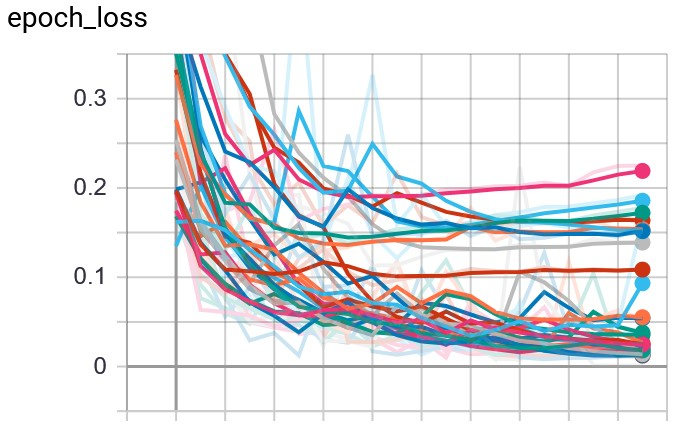

In [40]:
epoch_validation_loss_all = "/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAGxAqgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KK+XfH37aGsP8AFLXfh98HfhVqfxi17w5hdeubfVIdM0/T5DnEBuZVZWlBDApgcqwBJVgoB9RUV4H8Cf2uNL+NfhrxoZvDepeEfG/gwMuu+EtXIE9s+xmQrIBh422MA+0HjO3BUnxf4d/8FFfHvxp+HkHib4c/s3+IPFZtxMNWC63Fb2ts6u22K3meHddOYwjsqRgqXC/N1IB9yUV4x+zT+1N4W/aX+Hd94l02C58PXmkTvZ63o+r4jn0ydF3OrngbMZIfjODkKVZR49b/ALfHjD4jT63qXwZ+AevfE/wRpMzwSeJW1eHTEunQ/ObWGSNnnGOQF+bkAqpOKAPsiivJv2fv2mPB/wC0V8OLjxdocs2lJp8sltq+m6sohudLnjGXScZwAB8wbOCPQhgPDrb9vjxn8Qo9Z1z4Q/s/eIfiR4A0uWSFvEratFpxvDGSHa1tnjaScccBfmPQqp4oA+pfiN8RvD3wl8E6r4u8Wah/ZXh7S41lvLzyJJvKUsqA7I1Zz8zAcA9a0vDPiTTvGPhvSdf0e4+2aTqtpFfWdxsZPNhlQPG+1gGXKsDggEZ5Ar44/aZ+Pvhb9pP/AIJvfEjxp4TkuFspbVLa4s7xAlxZ3CXUG+GVQSAwBU8EghlI61y/w7/bc8c+B/2b/B2t+HP2ffEnir4e+HPDdjb6h4om1KKxJ+z28aTzQWxjeSWFSrHzOFwpJwASAD9AqK5P4UfE7RPjN8OPD/jbw5LJLout2q3Vv5yhZEzkMjgEgOrBlIBIypwT1rrKAOJsfjR4N1H4uah8MLfWPM8c2GmDWLnSvssw2WhZEEnmlPLPzSoNoYt83Tg121fE/gn/AJS5eP8A/smkX/pVZV2Xj39tjVJPivrfw6+Dvws1P4x+IfDvy69PbanDpmn6dIcjyTcyqytKCrArxyrAElWCgH1NRXgv7N/7WmmfHjXPEPhHVvDWpfD74leHMNq3hPWGDyxxnGJoZAAJYjuT5to++pxhlLcR4j/bd8S+IPiN4s8KfBn4M6r8Wl8JXDWWt6t/bMGk2kVyuQ0MLyo3nMpDKQMHKnAK4YgH1jRXhv7O/wC1t4X+PvgbxJrb2N94N1XwnNJbeJtD1pdk+lSxqxfeccoNknJCn92wKqRivHIf+CgnjjxZ4b1Dx14C/Z18R+LfhXZySY8TPrEFpcXEUbFZZYbIxtJIqlW+6x+6QdpBAAPtWiuG+Cfxk8N/H74ZaJ468Jzyy6NqsbMiXCBJoXVikkUignDqysDgkHGQSCCe5oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/K/9hL4b/F7xfD8W7Hwh8eR8MNa07xnef254em8H2Wq3JmbAFw80zBwGKSIF6AxORyxr9UK+dvi1+wz4B+KPxCfx5Y6v4r+HPjW4TyrzXfAurnTbi8TAGJfkdT90cgAnAyTgYAOA+Gf7L2vfDH4ofFv4ieLPjNbfEzxdq/hVtP1Szh0G30yWIeWv2eaRIZmA+S3ZFyg3DJycGov+CSFxFN+xfoSRyI7xarqCSKrAlG84tg+hwynHoR616n4D/Zf8Efs7fD3xzN4dj1DU9f1iwuJNU8Sa9dm81O/YRuR5sxA4HooUZ5IJ5r4z/wCCfv7Gfhf4z/sraV4i/wCEv8deBtV1G6vbTVJPBuvNYx6lEkzKi3EbK6NtUkcAcHnNAGh4Dt7nxZ4m/wCChl14LV57C9spLW2ezOVuLxba9EwjI+8xcvyP749RX1N/wTq1fRNW/Yy+GX9hSQtBa6e1tcxw4zHdLK/nhh2YuWbnqGB6EV6f8DfgR4N/Z08A23hDwRpn9naVG5nleRzJPdTMAGmlc/ec7R6AAAAAAAeKeJv+CcPw51TxBruo+G/FHjz4bWWvMX1XQ/BevfYdOvWbO7fCY3GDuI2ghQDgAUAfOvgGGfxdqn/BQvUfBQa40O/tJra0ks+Y7q9W1vPtHlEZDMWZjkdfMU9xX1Z/wTz1PSdT/Yz+Fx0eWGSCDTPs86wkfJcLI4mVh2bfuJz65716r8H/AINeD/gP4Fs/CHgjRotG0S3ZpPKQl3mkbG6WV2JZ3OBlmPQADAAA8F8Qf8E2/htqGs65c+HvE/jz4e6Rrshl1Tw34Q182el3jN97fAY2+U5I2ghQOFAFAHBftIa98JPEn7Cf7QF78IUsTp39oNHrM+nWUtvDNqQubczNl0USHBT50ypBGCa9m0P/AJR86eO3/Cr4/wD00iul1v8AZT+H+o/s833wW0yxuPDHgm7gFu0ejyKtwv71ZS4klWTc7MoyzhicmuvtfhXpNn8HYfhslxeHQotBXw6twzp9p+zi3+z7i23b5mznO3Ge2OKAPEv+CZn/ACY78L/+uF7/AOl9zX0/XzHH8G/jJ+z/AOAfB/gD9n268C3nhPRradJp/iVJeSXzSyXDy/K1miIV/eEcqDwPrVH/AIze/wCrf/8AyuUAcj4J/wCUuXj/AP7JpF/6VWVVP+CV09vp/hL4yeH9RZU8caf4+v31mCX/AI+RuWNUZz1Kl45wPdX9efpLS/2d/Dmk/tF6x8Z4b3VG8Uapoa6BNaPLGbJbcSROGVBHvD5hXkuRgnjpjivi5+w/4E+KvxCbx5Z6z4r+HXjSaLyLzXfAurnTbm9jAACzHYytwAMgAkAAkgDAB5FrVxb67/wV08Ojw8yzS6P4BkTxG1r0j3PMY1mx1b99annsyenGd4L+EGoeJ/FfxC+If7Jnxzi0e31XXJm8Q+F9e0ZrjT21QHfKAZUEsAPmDlEbOcBsKFX6Z/Z//Ze8C/s26dqcfhW1vLrVtWl8/VNf1i5N1qOoSZJ3SykDPJJwoUZJOMkk8H49/YD8BeLPH+r+M/D3ibxv8Lte1ol9Wl8Ba4dNTUHJJLyoUcZJJJ27QSSSCSSQDjv2c/2gLDxt4f8Aj9onxa8IeHvC2veB2eDxvqXhuB2stUtnjud0+FBmJCRTZBLNg5GCSq8Z8Lfgr8Wvhr8LbDW/2ZvjRo/jn4VzJNfaR4V8caViLyWZmeNbpQsgJcONpEShic4OTX1R8D/2Z/AP7P8A4L1Dw14X0ppbbVJGm1a81WT7Vc6nIy7Wa4dvv5BPygBfmbCjcc+M3n/BM34cRtqdnoHjP4j+DfCupSNJd+EfD/iVoNJm3DDq0LRsxVhwQW6cDAoA7/8AYh+NGj/Hr9nrRPFej+FbLwWjzz21zo+mxqltHcI+HaPaq/K2Q3IyNxBJxk+9VzPw1+Gvhr4Q+CdL8I+EdKi0Xw/pkZjtrOEswXJLMxZiWZmYlizEkkkk101ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBHcW8V3bywTxJNBKpSSORQyupGCCD1BHasrwj4L8PeANFj0fwvoOmeG9IjZnTT9Is47W3VmOWIjjUKCTyTjmtmigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigClq2p/2VbrL9kurzc23ZaR72HBOSM9OP1Fc9q3xIs9D0+a+v9K1e1tIQC8r2hwMkAdD6kD8a66uE+OH/JMNZ+sH/o+OgDa/4TD/AKgmsf8AgJ/9ej/hMP8AqCax/wCAn/166GigDnv+Ew/6gmsf+An/ANej/hMP+oJrH/gJ/wDXroaKAOe/4TD/AKgmsf8AgJ/9es3xF8UtO8J6Ldavq+natZadaqHmuHsyQgJAyQCT1Irs64b45Wi3/wAIfFtu4ysunyL+YpxtdXMazmqcnS+Kztfa/S5xln+2H8NNQvLW1t9SvZJ7pwkKfYZBvYnaByPWk1T9sX4Z6NdXdte6jfW89pcNazxtp8uUlXOVPHsfbivzns7iTTdQtpkBSe3nVw3oQwI/UGvRfjZpMc3xG8cpbjdDeQWus2x9QY1LH8d719hl+T4bFTlCpJrRtWa6W8vM/KsJxfjcRh1VlCHMpqL0eilt9re6Z+hafFfS5PDQ8QJY6o2im1+2i8FoSnk7d+/r0281n+Ffjt4a8bafJfaHHqWo2scpheSO0YYcAEjBIPRh+def/sX+K4PH3wBh0e8xO+lSTaVcRueXiYb0yPTZJt/4Aa80/ZnebwJ8UvGvgK8c7lZ2hLfxvA5XIH+1G5b6IK+crYf6viJUJ9Hb/I/dcrwdHNcnxWOpN+1pKMkujje0+l7x9T6ls/iHa6gXFvpWrylPvYtDx+tGqfES10XT57690nV7e0gXdJK1mSFHqcHpVbw3J9j19o+izocfXr/Q1115Zw6haT2txGs1vOjRyRsMhlYYIPsQa4adua1To9bHjVk+S9F7q6v+u3U4Dwz8dvDXjDUbuw0ZNQv7y1jWaaGO1IZUYkBuSMjIIyOnfrXQr42R2Kro2rlh1H2X/wCvXxJq2qan8D/iFaeJbBJJW0mVluIRx9ssHOJE9CcAMD0DJntX254X1+w8TQ2mraXcLdafqEK3EEy9GRgGH0Pt2rrxtFYXFSoxd4tKUX3i9n6p3T+/qcOW15Y7L4YuStJNwmv5akd16NNSj6tXfK2O/wCEw/6gmsf+An/16P8AhMP+oJrH/gJ/9euhorkO04/Uvidp2kSRR3tjqVq8v3Fltwu76fNV/wD4TD/qCax/4Cf/AF65T46af52h6fegZNvOYz7B1/xUfnXd+HNQ/tbQNOvM5aaBHb/eIGf1zQBkWvj6C8edYdI1h2hfy5B9jPysO3Wp/wDhMP8AqCax/wCAn/16PCv/AB+a9/1/N/IVu3DbLeRvRSf0oE9Ec7B46iut3laPq77euLT/AOvUv/CYf9QTWP8AwE/+vVjw2v8Ao8zerY/T/wCvWzWlSKjJpGdKTnBSZzKeOoZJmiXR9XMi9V+yc/zqX/hMP+oJrH/gJ/8AXqWD934jkH97P8s1uUTiotWFSm5p36M5ePx9BJeS2q6RrBuIlDOn2M8A9D1qf/hMP+oJrH/gJ/8AXo0//kddW/64Q10NZmxz3/CYf9QTWP8AwE/+vR/wmH/UE1j/AMBP/r10NFAHPf8ACYf9QTWP/AT/AOvR/wAJh/1BNY/8BP8A69dDRQBy7ePoI7yO0bSNYFxIpdY/sZ5A6nrU/wDwmH/UE1j/AMBP/r0Xn/I8af8A9ekn866GgDnv+Ew/6gmsf+An/wBej/hMP+oJrH/gJ/8AXroaKAOe/wCEw/6gmsf+An/16P8AhMP+oJrH/gJ/9euhooA5e48fQWkkEc2kawjzNsjH2M/M3p1qf/hMP+oJrH/gJ/8AXo8Tf8hTQP8Ar7/9lroaAOe/4TD/AKgmsf8AgJ/9ej/hMP8AqCax/wCAn/166GigDnv+Ew/6gmsf+An/ANej/hMP+oJrH/gJ/wDXroaKAOXvfH0GnQ+dcaRrEUeQu42ZPJOB0NT/APCYf9QTWP8AwE/+vR46/wCQCf8ArvF/6EK6GgDnv+Ew/wCoJrH/AICf/Xo/4TD/AKgmsf8AgJ/9euhooA57/hMP+oJrH/gJ/wDXo/4TD/qCax/4Cf8A166GigDmrnxzHZ28k82jawkUalmY2nQD8aWHxslxCksei6w0bqGVvsnUEZB61f8AFP8AyLepf9cH/lVjRf8AkDWH/XvH/wCgigDL/wCEw/6gmsf+An/16P8AhMP+oJrH/gJ/9euhooA57/hMP+oJrH/gJ/8AXo/4TD/qCax/4Cf/AF66GigDnT4x2gk6JrGP+vT/AOvUNl49g1G1S4t9I1iWF87XFoRnBx6+1dLL/q3+hrD8B/8AIp2H0f8A9DagBv8AwmH/AFBNY/8AAT/69H/CYf8AUE1j/wABP/r10NFAHPf8Jh/1BNY/8BP/AK9H/CYf9QTWP/AT/wCvXQ0UAc9/wmH/AFBNY/8AAT/69QWnj6C+87yNI1iTyZGifFmeGHUda6iue8G/d1n/ALCc/wD7LQAf8Jh/1BNY/wDAT/69H/CYf9QTWP8AwE/+vXQ0UAc9/wAJh/1BNY/8BP8A69H/AAmH/UE1j/wE/wDr10NFAHPf8Jh/1BNY/wDAT/69XNF8RQa5JdRRw3NtPbMqyw3URjYbhkH3BH8q1a57Rf8AkbvEf0tv/RZoA6GiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK4T44f8kw1n6wf+j467uuE+OH/JMNZ+sH/o+OgDu6KKKACiiigArg/jtq1pofwh8U3t7J5NtHaEM4UtjcwUcAE9SK7yvP8A4+6euqfBvxZaOodJrIo2eylhkj3AyR7gVjWm6dKU47pNnXhKcK2Ip0qnwykk/Rs/L7W7i2uNSlurMsbWY+ahYYJ/vcf7wavVvGEy3uqfDjWNuItS8Otpj+jtbMysT7nArzPxN4fi8P3X2a3ErQqARJI2eGHA/NWP413F1dfbPhJ4PvnbL6N4ieyA/uxXEQkz9NyNX23C+M+t06Fd/aVn9zX5o/AM/wAtWQ5/mWVr4Yy5o+l1JfdFs9G/YU8Vnwj8ZPEHg6eTbBq1sWhUn700BLLj6xtIf+Aiu0/aEj/4VT+0v4X8bIvl2OoeXJcsBjOz9zOP+/TL+LV8932qTfDT4jeDPHkAIhgvgswjHLiIoZAT/tRy7fwNfZH7ZXhWPxX8HotctNs76TcR3aSJzugkwjY9vmRvotHEVDlr08RHaa/GOn5WP3TwtzKMMxlgMR8M24Nf3aquv/Jj0e4/0G+hnBz5Eoyw6Fc/5/Ou6rxH4OeKB43+FPhzUJH33H2T7HcEnJ82H92SfcqEb/gVexaPObjTLdzy2za31HB/UV8nUWvP3/NG9fDzwNapgqvxUpOP4/8ADnzv8aPAS618N7LxDDCJJ7F5IbpcZ3wNIevrtY/k7elcV+x78Qm8K+IJ/hzqcx+zNK9xo8kh7Nlmi/HJYe4f1FfUHhOwg1TwW1ldRia2uPOiljboyszAj8jXwp8ZPBupfD/xFcvaSyQapodyJbe6j4cx5DRyD3Hyt7c12YhPFZdzx1qYe8l5wfxL5aP5I8fLpRwOdfV6rtQxtoN9I1o39nL56xfk3c/RSivO/gN8XLT40fDjT/EEOyO+A+z6hbKf9TcKBuH0OQw9mHfNeiV5dOpGtBVIO6Z7OIw9TC1pUKytKLs16HNfEfT/AO0vBWqxgZZIvOH/AAAhv5A1mfB3UPtvguKInLWszw/hncP/AEL9K7S4gS6t5IZBmORSjD2Iwa8q+Cs72Gqa5pEp/eRkPt91Yq381rQ5zuPCv/H5r3/X838hWxqTbbC4P+wR+dY/hX/j817/AK/m/kK09abbps3vgfqKuGskZ1HaDfkReHl22BP95yf5Vp1R0Vdumw++T+pq9TqfGyaKtTj6GHP+78Rxn+9j+WK3Kw9U/d61aP2O3/0KtyrqbRfkRR0lNeZz2n/8jrq3/XCGuhrntP8A+R11b/rhDXQ1gdIUUUUAFFFFAHPXn/I8af8A9ekn866GuL1HUnX4jWEYI8sQMh49SM12lXKLja/UzhUU7pdAoooqDQKKKKAOe8Tf8hTQP+vv/wBlroa57xN/yFNA/wCvv/2WuhoAKKKKACiiigDnvHX/ACAT/wBd4v8A0IV0Nc946/5AJ/67xf8AoQroaACiiigAooooAyvFP/It6l/1wf8AlVjRf+QNYf8AXvH/AOgiq/in/kW9S/64P/KrGi/8gaw/694//QRQBdooooAKKKKAGS/6t/oaw/Af/Ip2H0f/ANDatyX/AFb/AENYfgP/AJFOw+j/APobUAb9FFFABRRRQAVz3g37us/9hOf/ANlroa57wb93Wf8AsJz/APstAHQ0UUUAFFFFABXPaL/yN3iP6W3/AKLNdDXPaL/yN3iP6W3/AKLNAHQ0UUUAFFFFABRRRQAUUUUAFFFFABRRXzV8WNa8R/Fr9o3TvhDofinU/B+gadoZ1/XdQ0KcQX05aURxW6S4Jj6qxI6hj6CmlcD6Vor5o+GereI/g3+0jJ8KNZ8Vat4x8M67ozazod9r0v2i9tZo3Ky27zYBkUqC2T0woA5Yn6B8W3erWPhbV7jQbFNS1yK0lexs5JFjSacIfLRmJAVS2ATngZptWA1qK+KPiN4N8d/CH4Hv8TfE/wAZ/E2mfE2GFL99JudSibSJLkkMbFLNR5b8EplCRkbh8vFfXXgTWr7xJ4H8PavqlkdM1O/063urqyIINvK8Ss8eDyNrEjn0ocbagbtcJ8cP+SYaz9YP/R8dd3XCfHD/AJJhrP1g/wDR8dSB3dFFFABRRRQAVx3xg/5Jj4k/683rsa4/4wf8kx8Sf9eb0t9BptO6Pzk+I2nl4Ul2szqvAXp67j9FDfnVXQZvtXwp8bWAG6aGGz1OEehhuFjYj/gMx/KvSPib4dEGj6NcsGEOoaeJGK9yrFWUf8BVf++q8x+H7NHeahp0iZN9p19YGM9TI8EgjH18wJ+VdHB1X2Cnh3/y6nf5X0/Jnw/ipQTzvB5rHbE0+V/4rWf3c6+473VPDo8b/Avxg0KeZd6SbTW4AOvlqXjm/DZKGP8AuCvqX9m/WoPjP+zBY6XfSCSRbGbQrs5DFNilEJ/2vLMbeuTn3rxD9jm6ttY1aLSr5Fns9X0afT54W6SLtG4H6hG/M1a/Y71S5+EPx28Z/CrVJTsnkc2pfjfLDkqwH/TSE7/+ALX6Fm9H21KvQ+1Tamv8Pwv7rXPCyDFywmJwuMi7Ka5G+01aUX662Rsfsi61Ppf/AAl3gy+/d3en3IvVh7ghvInH4Hyvyr6u8Ny7reWL+624fQ//AFwfzr5O8aQL8J/2w7O+P7nSfERUydl23AMUhJ9pQX/Kvp3w9ctb3ipJwxzE/wDvA/4j9a/PI+8nH5n9E8ZQjPGUc2pL3cRCMn5O1mvk1r6lvwH/AMi3B/10k/8AQzXlf7T/AIHj1LSbbxBFEHeAfZbsY+9Ex+Un6Ekf8D9q9U8B/wDItwf9dJP/AEM1c8TabBq+i3Nncp5lvMpjkX1Ugg/zrbCYh4WtGp06+a6n5zmGDWOw0qD0b2fZrZ/efnX+zr8UJf2efjFLp+pTMnhbVpBa3TNnZGM/up/qm75v9lm7gV+lCsGUEHIPIIr82vjN8M5U1y70qQKt9BL5EcrYAYk5iJPZWLAckACTcfu19LfsP/GC4+Inw3n0HU3aXVfDZjt/Oc8y27BvKJ912Mh9lU9TXhVMP/Y+Yzy//l1P36b/ALr1t8v0Z9usWuKMipZ7tiKX7quv78dFL56feux9IV5Fa/8AFPfG6ZPuw3pbn13pu/8AQxXrteSfGBW0fxRoOsoOVwDj1jcN/wCzfpXonzJ3XhX/AI/Ne/6/m/kKveIG26eB/ecD+ZrP8JMJLrXGU5Vr1iD68CrfiRv9HhX1bP6f/XrWl8aMK7tTkX9NXbp9uP8AYB/OrNR267LeJfRQP0qSolq2zWKtFIw/EPyXFq/1/QitysXxKv7qBvRiK14W3xI3qoNay/hx+ZhT0qzXoYOn/wDI66t/1whroa57T/8AkddW/wCuENdDWB0hRRRQAUnSlqtqU3k2M7dDtwPx4ppXdiZPlTZ53fTNJ40tZvWKRv1zXpisGUMOhGa85u7fGtWEnrDI34ZxXfabJ5thA3+yB+XFddfVJrpocGFvGTT6q5ZooorjPRCiiigDnvE3/IU0D/r7/wDZa6Gue8Tf8hTQP+vv/wBlroaACiiigAooooA57x1/yAT/ANd4v/QhXQ1z3jr/AJAJ/wCu8X/oQroaACiiigAooooAyvFP/It6l/1wf+VWNF/5A1h/17x/+giq/in/AJFvUv8Arg/8qsaL/wAgaw/694//AEEUAXaKKKACiiigBkv+rf6GsPwH/wAinYfR/wD0Nq3Jf9W/0NYfgP8A5FOw+j/+htQBv0UUUAFFFFABXPeDfu6z/wBhOf8A9lroa57wb93Wf+wnP/7LQB0NFFFABRRRQAVz2i/8jd4j+lt/6LNdDXPaL/yN3iP6W3/os0AdDRRRQAUUUUAFFFFABRRRQAUUUUAFfMMLQeDf+Cg15LqUwt4vFfgxI9Nkk+VJp4Z13wqe7hIy+PQj1FfT1cb8Tfg/4N+Mmkwab4y0G31u1t5PNgMjPHLC3GTHKjK6ZwM7WGcDPSqi7bgeJa9JF40/4KAeFI9MkW6HhDwtdT6nJEwKwPOzRpE3o+HVtvXBz2NfQfjjxbbeA/B+s+I7y1u72z0q1kvJ4bGMPM0aKWbapIBIAJxkdKx/hj8G/Bfwb026sfBugW+iw3cgluXRnlmnYZwZJZGZ3xk4yxxuOOpq34R+GPhnwHqniPUdD0z7FeeIrw6hqkhnlk+0TnOXw7EL1PCgD2obTA8B+Nngf4RfHT4O3Xxped9N1OPRFvdL8TQ38kNxYyRqzwx7VkKCRZTtKAFtxIBzgj1f9mLxV4h8bfAHwPrvinc2u32nLLPK6hWmGSI5SBxl0CPx/e7VjN+xl8Fm8QHWG8A6ebkzfaDAZZvshk9fs2/yfw2Yr2eONYo1RFCIowqqMAAdABTbVrAVNWsbi/t1jt72SxcPuMkahiRg8c/X9K82+Mmh6jb/AA31h5NcnuExEPLaJQMmVAD+B5/CvVq4T44f8kw1n6wf+j46gDa/4R/V/wDoYpv/AAHSj/hH9X/6GKb/AMB0roaKAOe/4R/V/wDoYpv/AAHSj/hH9X/6GKb/AMB0roaKAOe/4R/V/wDoYpv/AAHSuU+Kmi6nb/DvxBJLrktxGtoxaJoVAYema9Mrj/jB/wAkx8Sf9eb0AfMnxD8L3Mvwb8MawZ3nS3wBHsAEUbllJz/vKg/GvmeK5fw14oS8jL7rS7S6ViOSVIfP5g19ztoH/CQfs72VoEaWSXTJDFGvUyRuXQf99AV8QeLrf/So5RyJI9v5f/rFc2Vy9hm0odKsX961/I8XjzDvG8LwxMPiw04v/t2V4/8ApVvuO/8A2aZ5tB8daZYJdG3mtNWk0/z1AO3cxQnnt85rsv2yPCurfCj4oeD/AIoafdyXE7zJFPOIwn76HBQNjrvj3L9IzXjHwo1lrHxVeTpIZJknhvNxPJkI3N/48K+/f2kPh6vxZ+Ceu6bbR+ferANQsNoyxmjG9Qvuw3J/wOv1jMK6w+Ow2Kn8NRcsvR2/zufl+RweYZXisNS+KDU4+urVvkrfM8Y/az8Nv4k+Gnhjx5Z6pJqlujRtHN5QQiCdAyPkH+8EH1evR/Aeoah4w8M6Nrqa7JnU7RLl9sK/LMPllX8HVh+FeYfsu6wPjT+y/wCJvAFw4l1PSY3t4FY5Ox8y2zH6SKy/RBU37JfihrzwLqGizMftGjX3mIjcEQzA5H4PG/8A33X5/jaEsBiZ0pfYf4f8Nqf0zl2IjxLwZCrH46EvujP/AO6Kx714A0XVbjwvbyLr8yBnk+XyE/vmty88P6t9mkz4gmYAZx5CVQ+Fd2G8PLDn+N3X6bjmuzmXdC6+qkfpXJOPLJo+LpS54JnzN+0P8NZrjw/F4ikuDqCp/od4rRhcRtnaxx2ydv8AwIV8/wD7KOq3/hP9oufQn1GSz/tuKaAz7QRIwHnIxHTJ2kfVsV9/SaTbeItB1DS7xN9rdRtFIvfDDGR7jqPcV8LfEb4dan8MfiVpeoqudZ0O6hvbaRPlW8hWTcBz64YfXcD611YrCyzbBU/Y618O7xXWUH8UV3a6fctznyvMqfDuZ14Yp2wmNjyyfSFVfBN9k9m/m9j7m/4R/V/+him/8B0rjfir4bvk8M/a7jVJL5baVTseJVwG+XOR7kV6ZY3sOpWVvd20gmtriNZYpF6MrAEEfUGs7xhp/wDavhfVLUDcz27lR/tAZX9QK4TtOC+F2n6nqmj3NzHrk0IeYfL5KtjCgda29e0PVfMt0bXpnzn/AJYL7VnfAu5EmhahBn547gN+BXj9Qa6/Vv3msWif7v8A6FW9H47nNiP4du5F/wAI/q3/AEMM3/gOlH/CP6v/ANDFN/4DpXQ15p8OfiYPE/jrxhoU0m42l0z2fPWJMRuB7BlDf8DNVTw860J1IrSCu/vsZ18ZSw9WlRqOzqNpfJXNjXvD+qrZqza/M+HHHkJ6GrdjoWrSWcDDxDMAUHH2dPStjXV3abIf7pB/WpNHbdpsB9iP1NS/4S9TRaV36HF6foOq/wDCZaqP+EgmBEEWW8hOa3/+Ef1f/oYpv/AdKNP/AOR11b/rhDXQ1gdJz3/CP6v/ANDFN/4DpR/wj+r/APQxTf8AgOldDRQBz3/CP6v/ANDFN/4DpWZr2j6rDaop1+Z97dPITtXaVhaz/pOpW1v1HGfxP+AraivfTOfEO1NpdTjdQ8N6ouuWMZ1yUkWMjY8heMHOK3dD0XVZrHC+IJlCsRjyE+v9av6gok8aWKno1nIP1qx4bYr9oiPUEH+YNUnzU5ENclWPpYh/4R/V/wDoYpv/AAHSj/hH9X/6GKb/AMB0roaK5zrOe/4R/V/+him/8B0o/wCEf1f/AKGKb/wHSuhooA8/8SaDqq6noQOvzMTdcfuE4+Wt/wD4R/V/+him/wDAdKPE3/IU0D/r7/8AZa6GgDnv+Ef1f/oYpv8AwHSj/hH9X/6GKb/wHSuhooA57/hH9X/6GKb/AMB0o/4R/V/+him/8B0roaKAPP8AxvoOqroZLeIJmHnR8eQn94Vv/wDCP6v/ANDFN/4DpR46/wCQCf8ArvF/6EK6GgDnv+Ef1f8A6GKb/wAB0o/4R/V/+him/wDAdK6GigDnv+Ef1f8A6GKb/wAB0o/4R/V/+him/wDAdK6GigDi/E2gasvh7USfEEzDyH4+zp6VPo+gasdHsSPEMwHkR8fZ0/uitjxT/wAi3qX/AFwf+VWNF/5A1h/17x/+gigDL/4R/V/+him/8B0o/wCEf1f/AKGKb/wHSuhooA57/hH9X/6GKb/wHSj/AIR/V/8AoYpv/AdK6GigDnJPD+reW/8AxUM3Q/8ALulYngfQdVbwtYlfEEyDDfL5Cf32ru5f9W/0NYfgP/kU7D6P/wChtQA3/hH9X/6GKb/wHSj/AIR/V/8AoYpv/AdK6GigDnv+Ef1f/oYpv/AdKP8AhH9X/wChim/8B0roaKAOe/4R/V/+him/8B0rA8I6DqrLrGPEEy41KYH9wnPTmvQK57wb93Wf+wnP/wCy0AH/AAj+r/8AQxTf+A6Uf8I/q/8A0MU3/gOldDRQBz3/AAj+r/8AQxTf+A6Uf8I/q/8A0MU3/gOldDRQBz3/AAj+r/8AQxTf+A6VT8JWlxZ+JvEcdzeNeyZtz5jIFOPL6YFdbXPaL/yN3iP6W3/os0AdDRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcJ8cP+SYaz9YP/R8dd3XCfHD/kmGs/WD/wBHx0Ad3RRRQAUUUUAFcf8AGD/kmPiT/rzeuwrivjRAtx8LfEiN0FqW49VII/UVFSTjByirtdDWjGNSpGE3ZNq77eZh/DhVm+D/AIZYEMREyce7Nn+VfD/xR8P/ANjapq9isexbC8ZUB6iLcQn5qUNfVn7NfiD7f4G1rRnbMthcLcRg/wDPOTggfQqx/wCBV47+0R4fFv4/vNq4TVLFZAx7yLmM/kqxH8a8GnjFUWHzCKtaSb8ltJH0OaZNJQxuRSfM5wnFebspQdvxPnXwHcC18XFOiyQEH3ZXB/lX6l/DPUv7W+Hvh26J3M1jErH1ZVCt+oNflNpUn2TxVYSHgec0R/4EpH88V+lX7M+sJqnwpsYRIHks5pYXHcZYuM/g9fr+cL22V0anWLt+f/AP5q4Grezx0qT+3D8U1/wT5q8H/wDGOP7bV7ojf6N4e8TOY4R0QR3Db4cD/ZmHl59N1bGl2p+Ff7Wmt6JjytO1/wAxYR/CfOxNEFHtKojH41uf8FBfAEl54T0HxzYK0d7olyLe4mj4ZYZCCj5/2ZAAPeWuR+O/iJ/HHgP4W/F/TCseoNGtrdyIP9XdRsXA+gkSf8MV5GZr65hKGO6tckvVbfej998OKkcLnGN4cqO0K8ZOHz1X/gMlZebPo74X3xt9Ftm/55yOD/uljXqoYMoI5BrxzwLdR3XhnSdWtxiy1OMzp/s7jnH4Zr0TR9cVJEs7g7cjEUh6H/ZNfMqXNSV946f5HJWoyo4mULWvrbzW6LulfJPOn+eDXkP7Xnh9rj4Wy+JLWLzb7w/KtyVA5kt2YJMme2AVfP8A0z9zXr1v+71WUf3s/wCNHibQbfxV4b1XRbsZtdRtJbSXjPyyIVP6Gpc6tNc9CXLNbPs+gQhh6klDFwU6b0kn1j1X3dVqt1qfNP7NXx6tltrTRdRu9+j3JxZXUh/493J/1b+ik/8AfJ9jx9U1+QPh3Xb34c+Jb3S79WEMNw9tdwf3HRipYe4IP1H4V+gX7PfxoXWLe28Na1ch7rYv9n3jNkXCYyqE9zjG0/xD3xnvw+LpcQYV46guWtD+JD/25eT69vxfn5llOJ4KzGOVYqTnhqn8Co+q/wCfcn/MundWt2Vzw7qw+HPjy9s5GI0qeYws5/hAY7W/4DnB9ifavU7g+d4iiA5Ax/LNcXqXhuPxpZeJoYQPt9nqDtA3qdoyv0OMfUCoPhH4mfVLw6deMfttmpC7/vMgG3H1Xp+VYUvtPyNcQmnGL7o9K1zVE0XRb/UZP9XaW8k7Z9FUsf5V8TeCvEGo+D/EmmeLSkj232x45ZB0l4Uyp9dsgPPc+1fUH7QWtf2P8LNVCttluylqnvuYFh/3yGriND+GP/CQfs3w2iRZ1KTfqkHHJkydoH+9GAv419Zk9SlhMJKpWXu1JKD9LO7/ABPzriOjXzDMIUcK7ToQdRf4uZWXrpoe3XlxFqGitPA6ywSxCWORejKcEEfhSaC27TlHoxFeVfs7eMv+Ek+H9zo9xJuvNJBiXceTCwJQ/hgr7ACvUPDjZs5F9H/oK+exWGlhJ1KEvsv/AIZ/cfZZfjYZhTpYuG04/c+q+T0Kmn/8jrq3/XCGuhrntP8A+R11b/rhDXQ15p7YUUUUAFYVr/pXiCV+ojz+nFbUsgijdz0UE/lWR4cjLefMeSxAz+p/mK3hpGUjlq+9OEfn9xBef8jxp/8A16SfzqTT/wDR9cuI+zbsfnmo7z/keNP/AOvST+dSXX+j+IIX6b9v6/LRS15l5BX05ZdmbtFFFYHUFFFFAHPeJv8AkKaB/wBff/stdDXPeJv+QpoH/X3/AOy10NABRRRQAUUUUAc946/5AJ/67xf+hCuhrnvHX/IBP/XeL/0IV0NABRRRQAUUUUAZXin/AJFvUv8Arg/8qsaL/wAgaw/694//AEEVX8U/8i3qX/XB/wCVWNF/5A1h/wBe8f8A6CKALtFFFABRRRQAyX/Vv9DWH4D/AORTsPo//obVuS/6t/oaw/Af/Ip2H0f/ANDagDfooooAKKKKACue8G/d1n/sJz/+y10Nc94N+7rP/YTn/wDZaAOhooooAKKKKACue0X/AJG7xH9Lb/0Wa6Gue0X/AJG7xH9Lb/0WaAOhooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuE+OH/JMNZ+sH/o+Ouw1LVrTR4FmvJlgiZtgZgTzgnHH0NecfGbxdpF78NtYigvkkkIibaFboJUJ7egNAHqVFYX/CcaH/ANBBP++G/wAKP+E40P8A6CCf98N/hQBu0Vhf8Jxof/QQT/vhv8KP+E40P/oIJ/3w3+FAG7XH/GD/AJJj4k/683rT/wCE40P/AKCCf98N/hXMfEzxRpOreA9asre+V5riDylG1v4iBnkdqAPn34I6k/hf4iWltISlvrNm1uCehLruQj/tooX8TWz+01pYNnoGrqM/Z7s2zn0jmTr/AN9xxj8a5rxht0jS/Cuo2UmL/S2+zs2CDlW8yJvzLflXefFvWtK8Y/CrVBa3KmZ7MXdvGVbPmRESovTruQCvjsLT5XicD2u189V9zR+k5pW5oZfm668sZeq91t+qf4Hwr41tWsdY1BY/kZJBMhHbowr7D/Yy8fLJqP8AZ7viHVrfei54E0eTj/vkv/3yK+WviFbpcXVpeJzFd2/B9cc/yYVtfALxNd+FdUt2UkTWkqX9tngOobDAe25WB+pr9vyCSzbJp0Hu1+O35xP5LzzDS4a4hnKKtGnUl/4BJ8yX/gMj9KPiB4PtfiB4J1vw5e4FvqVpJblyM7GI+Vx7q2GHuK+DvgSl5r/wx+KXwi1KJhrWll9X0+36uJ4HCzxr7kqoAH99q+7rP4haBfWcFzHqC+XMiyLlGzgjI7V8V/GzV7T4K/taaB8QdLm3aNqrrNe+WpA5HlXS4xydhWT/AHm9q8nKU8RSr5dLeSvH/FHp80fo2OxUspx2Dz6g/wCFJX/wt/kn+Z65+yP4ysvGHwtl8IyTqNa0eSSSKFjhmhZtysPUBmZT6fL6ivWkt21KFI87Jgdo3cfN6GvlD4jaFJ8N9c0v4m+Bb5cfaGa7t41O2JyxGccZikBwR2J9xj6F8I/F/wAO+O9Htdds7gWj3QxdWbAlra4A+ZSQOQeoPcc8dK+ajFOVntLR/ofsHE2EhXprP8u1pVHzNdYT+1F+T3X/AA1/RNDuJmki+0lhMjeW27r6c/pXT1wt94w0e/tlZb1BJJHtf5W+909Kf4X+JGl3lq8dzfoZIcAOVbLA+vHXisfgagz4n+LF1Y7f5nw1+0J8L7eH9q7UNClK2lr4sKTWkzDASedSEYnsPtKnd/slqT4JLc6/pur+DbsPp/jXw20ktlFIdr3ESPiW3z/z0jf5l7kFh0UY9F/b6SzvI/Bvi/RrsG+0+4e0kkjUhhnEkR5H8LJJ/wB9VyX7RklrZ+I/Bvxp8HTpFc6nBBc39vGpAiuNikFvZ1JRh6qc8tXyWFrVsmzOeKw2jg7td4S3Xyf9aH67icJheLsiw+V49XjVjyxfWNWn8Lv0co/5dT6H/Zr+IR1681LTdSlxrLnzn38GbHBbHqOcj3/K7420+58L+L/+Em0xdq+cTKB0Dk9/ZhkH3z614deeIba8m0v4k+EbryWmlE01vg7oZCBvDdiMllYd/cGvozwb498O+OvDdy19MsIuo/LuLdgSY37gHHY4IP0r9NxFKlVofXsL/Dn+D7enY/Avb16ONWW47SrC+r+0lpf1Wz/4c4b9o/xbF4o0PwnZaefMF7I9yYs8qwwiqffLOPwr6C0TTE0XRbDTov8AV2lvHAuPRVCj+VfMlvoOn/8ACwtIa4vY3tdOv1ZpgCVdFYMMjtkhfzNfRf8AwnGh/wDQQT/vhv8ACscTiISwdDDw3jzN+rf+Rz4HB1YZji8ZV2nyqPolr+O54HqS/wDCl/j0Jx+50LWMluyrHKcN9Nkgz/ugete/eGW+S4X0Kn+deWftCR6N4y8F/aLO6SXUtNfzogFbLRnAkXkemG/4BVr4I/Eqw1DwrCuo3YivbdBBLuBJbbwrcDupH45r0sW/rmAhi18Ufdl8tn9x4uXxeWZtUy9/BO9SHz+JfJ7Lseh6f/yOurf9cIa6GuD0/wAaaKPGWqsb9NpgiAO1v8K3/wDhOND/AOggn/fDf4V8sfem7VT+1LX7Z9k85ftHTy8H0z/Ks3/hOND/AOggn/fLf4V54vj7SRrn237auPP3/db7uenT0relT9pc561X2dvM9S1qXytOl9Wwo/H/AOtSaLD5WnR+rZY/5+lc34g8baNNHDHHfK2TuPyt+Hb3rTh8aaFDCiDUEwqhfuN2/Ch6U0u5MferN9kJef8AI8af/wBekn86l8RAxzW0w6jP6EGuP1H4n+HYfiVplm1+oLWb/vdp2hiflQ8dSAf09a3de8YaLNZqVv0LK+fut/hVxpzpSi5q3NqvNGU61OvCapyTcXZ+TWtjrlYMoI6Hmlrm7Hx1ojWcJa/QNsAPyt/hU/8AwnGh/wDQQT/vhv8ACuZqzsdsXzJM3aKwv+E40P8A6CCf98N/hR/wnGh/9BBP++G/wpFEfib/AJCmgf8AX3/7LXQ1wfiTxporanoRF+hC3WT8rf3fpW//AMJxof8A0EE/74b/AAoA3aKwv+E40P8A6CCf98N/hR/wnGh/9BBP++G/woA3aKwv+E40P/oIJ/3w3+FH/CcaH/0EE/74b/CgCPx1/wAgE/8AXeL/ANCFdDXB+OPGmiyaGQt+hPnR/wALf3h7Vv8A/CcaH/0EE/74b/CgDdorC/4TjQ/+ggn/AHw3+FH/AAnGh/8AQQT/AL4b/CgDdorC/wCE40P/AKCCf98N/hR/wnGh/wDQQT/vhv8ACgCx4p/5FvUv+uD/AMqsaL/yBrD/AK94/wD0EVznifxtoj+HdRUX6EmBwPlb0+lT6N420RdHsQb9ARBGPut/dHtQB1NFYX/CcaH/ANBBP++G/wAKP+E40P8A6CCf98N/hQBu0Vhf8Jxof/QQT/vhv8KP+E40P/oIJ/3w3+FAG1L/AKt/oaw/Af8AyKdh9H/9DaiTxxoflv8A8TBOh/gb/CsTwP400WPwrYq1+gYBuNrf329qAO6orC/4TjQ/+ggn/fDf4Uf8Jxof/QQT/vhv8KAN2isL/hOND/6CCf8AfDf4Uf8ACcaH/wBBBP8Avhv8KAN2ue8G/d1n/sJz/wDstSf8Jxof/QQT/vhv8KwPCPjTRY11jdfoM6lMR8rdOPagDvKKwv8AhOND/wCggn/fDf4Uf8Jxof8A0EE/74b/AAoA3aKwv+E40P8A6CCf98N/hR/wnGh/9BBP++G/woA3a57Rf+Ru8R/S2/8ARZqT/hOND/6CCf8AfDf4VR8K6pa6t4n8RzWkwmiBt13AEc+X70AdXRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUANeNZBh1Vh1wwzXBfG63iX4Y6yViQH9zyFH/PZK7+uE+OH/JMNZ+sH/o+OgDtvs0P/ADyT/vkUfZof+eSf98ipaKAIvs0P/PJP++RR9mh/55J/3yKlooAi+zQ/88k/75Fcl8Wo0h+G3iGRI1V1tGYEKMgjFdlXF/GaH7R8LfEiZYH7KWG04PBBx+lROTjFySu0a0oRqVIwk7JtK/bzPnvyB4g8JaxZ7QZJbNb2D1DxfMQPcqWFdP8ABTVIta8Ai0mRJJLC4e3YMASUYb1z7fMR/wABrhvh7qzae1i8ylTazASIy4PlsOc59QWrT+FxPg/4oeIvDUhxFOMwgn7xQkofxjYmvk1WX17D4xKyqLlfr0X33R+h1sHJ5Ljssk7yovni+6W7/wDAbP5nzf470M6XYahppBL6JqMtpuPeNXKqfxUoa6fwN4dj8SfCGDWbNR/a3hW/nSdV+9LYy4kfPsrMzD/rm/rW38dtFFr8V9fs5MJDrNhBfR47FR5TH65jzVT9lDXP7H8fanoFzgLqlqyeWRndNCSwH02NMfwFfdcM4p4OdegnrCV0vJ2/+2+8/H+PMDDFVMFmE17mKgoSfaolp8/gt3sz6u/Zn8SxeIPAr6bMFe70mXyjuGSYnyyE/jvX6KKwf21fhmnjj4Jahe2tup1HQHGpRFF5MSgiZfpsJb6xivNdC8R/8KH+KZmlZl0IuIbnOTi0kIw//bM7WJ64Rh3r671h4ZNFu/MSO4gkhZSjgMjqwxgg8EHP419BmCeX5hDHUfhk1Jfqv67nzmRv+1sqnlmI/iQvTf5Rf9dUfOn7I/xU8KePvhDpnhHWb7T5NegiksbjTLxlElzFkhSqt98FCAcZOQc15p4k0PU/2S/in9ot45b/AME6ucBW+bMYOdhzx5sZOQf4geo3MBsy/sVeF/iRos2oaFfTeFtZV2KiMebav8xxlCQy9Oqtgf3TXnnxD0X44/CnwpeeH/F9k3jfwVjK3ZLXa2xX7sqTY82Er23jbyRggkU6mCwmZVJVMDVSlJ35JaPXs9n5I+14f4kxnCcngM8w7qYWSUZuHvK3SVtGnHe/X8T7P8Naxp/iDSbW+sJIrmyukE0MqAYII/n7dsVe8LwxQ69fQeUm0hiPlHZuP0NfDv7L37RFv4T1L/hH9ZuPs+i3Um6OSY/Layn+LPZCeueh59c/adnr1hZ6tHqkt5bw6a0XmPdPKoiC7OWLk4xkda+fzHCV8JUj7eDi2ejRlgqlSrSy2uq1LeMlu10TW6l0aaT+VjH/AGovA8fjT4E+LLOKBTdW1r9vgKqN26EiQge5VWX/AIFXzT8GfiD4O1b9nGfQPHN6sdram408QRgPcyIf3sZjXuVaTgngbBkivRvi1+18l9NL4b+Hdg2tXtxmA6hJAXQ5GCIosZc+7DHHRhzXhP7Ovw30TxP8bpvBfi+0uLZrO2llFkkgQSzIVPlsRzt2Fm+Ugnb1r56vRpwxUa9SVlJclu99j9jyXKamDyao82vTjGSqxSt7TRWbt06b/Oxzfwo+MV/8H7O50qeyi8QeFryUvc2sq7JEJG0shyQMqBlTkHA5HWvaPhX8WNH8J+Kk1TQrttR8NXm1bm0lGJ4VJ6Oh6Ohzg9GGcHk46H47/s42uvaPq2u+FNPhtb3SZ2ik063jCpPbgD7qjjevp/EMjkgCvAvC/wAPbbWPDt74r8KajHZ6zoyKdT8PXb4W5hZgvmQP6EkZVujHr90H2Mtq1MrqKjCDnh52jKG7XnHq7b237HzHGWU5VxflP9uZdP2GKoPmu9k+1Toozt8ey+11R9B+D9PvviJr/jbV7Ni0EUhu1hA+9vdtqj32KfrtFe9/C/xRD4n0XyLhUOoWgCSZUZdf4X/ofce9fOvwF+NWkfDmO9XWoJoNLvtkj3ixFntmXI/eIOdoyc4yRjoQSR6zr+kLprQeNfBl9De6XN++L2biSMA9SCOGQ9x2/l7eeRjDGtRVk1FrzVkrn4bws51MqjKbbkpSUvKV27fc7nscllbzRsjwRujAqysgIIPUV81/D0r8J/jlf+Hbj/kGag5ggaTkfMd0J9z/AAfUmvefBfjS08Y6b5sWIruMAT25PKH1HqD2NePftLeF3mji1+0DLdae6iR04by2wQ2f9lv/AEI1eTTjOpPCVH7tRW+fR/eYcS0506VLMKK9+hLm9Y/aXzR69p9vF/wmmrfuk/1EP8IroPs0P/PJP++RXnvwm8XL4436vx501nCs6jtKuVfjsMgkexFej14dWnKjOVOa1TsfV0K0MTSjWpu8ZJNejM3WvJtNJupfLQEIQDtHU8D9TXHf2NF/wi4uvKXd5+c7R937v866Hxtc+XpsUIPMkn6D/wCvirg03/im/smPm8jp/tYz/OtqcvZwT7sxqR9pNrsjHsfK1S5sP3aHaihvlHJHJrZ8Qapp/hnQ73Vb1US1tIjK52jJx0A9ycAe5FYvglfMklJ/5Zjj8f8A9Rry39ovxNc+Itb0rwFo5825nlSS5VT1dv8AVofYA7z/AMBPau/D4X65io0dorVvsup4+OzD+zcDPE2vN6RXeT0S/roeVx+H/EPxMuta8UwK32sSNcRxR53NswSsf+4pXHrjHWvfPhP8R7b4keD57e7WJddsYx9oXaB5qjpKB745x0PsRXQeHPDNt4N1Pw/o9pzFa2DoXxgu2csx9yST+NeS/F7wbffCrxdD428Nr5djNIftMKj5I3b7ykf3H5+h9Plr2/rVLN5ywrSi0/3b9Psv1t9/yPlf7PxHDlOGPi3NSX75b7686/wt29Pmz33QY4pNPUeUh2sR90fX+taP2aH/AJ5J/wB8iuT+GPiq08XaCL+zb93JgtGT80b/AMSn3H+B712NfJYinKnVlCSs0fomEqwr0IVKbumtGRfZof8Ankn/AHyKPs0P/PJP++RUtFc51nNeJreL+1NA/dJ/x9/3R/droPs0P/PJP++RWH4m/wCQpoH/AF9/+y10NAEX2aH/AJ5J/wB8ij7ND/zyT/vkVLRQBF9mh/55J/3yKPs0P/PJP++RUtFAHNeOreIaCcRJ/r4v4R/eFdB9mh/55J/3yKw/HX/IBP8A13i/9CFdDQBF9mh/55J/3yKPs0P/ADyT/vkVLRQBF9mh/wCeSf8AfIo+zQ/88k/75FS0UAY3ii3i/wCEc1L90n+of+EelWNFt4v7HsP3Sf8AHvH/AAj+6Kj8U/8AIt6l/wBcH/lVjRf+QNYf9e8f/oIoAsfZof8Ankn/AHyKPs0P/PJP++RUtFAEX2aH/nkn/fIo+zQ/88k/75FS0UAQS20Plv8Auk6H+EVh+BbeI+E7D90nR/4R/faugl/1b/Q1h+A/+RTsPo//AKG1AG19mh/55J/3yKPs0P8AzyT/AL5FS0UARfZof+eSf98ij7ND/wA8k/75FS0UARfZof8Ankn/AHyK5/wdbxbdZ/dJ/wAhKb+Ee1dLXPeDfu6z/wBhOf8A9loA3Ps0P/PJP++RR9mh/wCeSf8AfIqWigCL7ND/AM8k/wC+RR9mh/55J/3yKlooAi+zQ/8APJP++RWDoaLH4t8RhVCj/R+AMf8ALM10dc9ov/I3eI/pbf8Aos0AdDRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcJ8cP8AkmGs/WD/ANHx13dcJ8cP+SYaz9YP/R8dAHd0UUUAFFFFABXKfFWQQ/DzXZWG4R2/mY+jA/0rq64/4wf8kx8Sf9eb0AfMt1hL6KdDmO5j2E9sj5lP5bqb44vDovibwb4tTOJofIuCOrSQMFfP1jZPzq7daTInhXSLkDcZ7VZ4/wDeUkEf+O/+PVS8RxrrXw7u41+Z9PuY7+LHUo48uT8MFD+FfMZpRfs5uO699eq1f6/efoPDuIjKtSjU+Gd6cvSSsvzS/wC3TG/ay8nR9c8G+IjzAyz2k0i8/J8pX6/fY/hXiGrXF14V8Rad4l0yQFopo7hGU5UsMEZx1Vh19efWvYPjgx8Xfs1aRej57rTbuOGXuQFV0/MgRn8a4Dw/ZWHij4F2F+Gxd6ddNpN/nnhiXt5T6AA+X/wFR6mtPrNSjmVPF0dYyhdruuvzS1+RGLyShm3B88txcuWpGo4wlso1I39m32TbUb/3k/M9t+J32H4geBdE8W2KCS1uovKmXqQjg/K3+6wZT7tXQ/s6/GiHUvhfqHhbxBfxwap4VkW2e4uZAolsufJlJPoAEP0Unlq+c/hv8Yk8D+DfEPg/WLKa+huXzaBHCiByfmJJ7BlRwAOSD0zmue8fQWelaxaajcxSrbXDJFdSQKN4UHnr32g4H+zX7Fy/XssdCMeaUWnG3Z/puvuP5/4ZpRp57Qx+Y1fq9Gqpqo2m/fpJc8bLVS+Fq/fqfefwF8Wab4k0vzdMuluofMlgZlBGHDbsYPsQfoa9fr4N+BHij/hT/wAYINHnuvO8Oa4Y2tbwnCSIxPkTD2IJQ+5/2a+8q+CknF2Z+38SZdTwOJhPDy5qNSKlCXdP9TwT48fsp+FPiJot7qWjaVbaL4qjUyxXVmohS4bukqj5Tu/vY3A45xkH4VvtD8S+D5rLTtf/ALW0zwxPdnfHJG/l7lYLI8cbEKzqO2R9e9fq/dsq2szOQqBCST24ryP4i+FdG+JvhO40zVrbzIHfblTiSM4OyRD2YYP5kHIOK9vD5nKNJ0cYnUo9VfVea9D4OOFeGxEMXlTVHFxd4zS37xktpJ+auvNXRR+GfgXwL4X8H2Nz4JRNQW+QPJrEnzzzr6FsfKM9UAABXkZrwX48Qp8F/wBrbwR4yhZUsNQFvJdTKfl4/wBHuP8AyEVP/Aq5vwv4q8R/shePk0fxF9o1bwNqEu8SRD7y9PNjzwsijG5O+P8AdavU/wBszQdM8XfBTRfHGhXceradaXKOtxFgqbeYbCc+u8RAg4wcg8jFeLxHlkaOFWIpSvBNSjL079mkfXcK8R4zG5p9WzH3qs04VFfX31Zb9L2tbT8D6M09tsPiP3viP5V8e/tLfDVPAfiCLxTojC2h1CQ/aLReAH+8WA/uN3HY/Xj3f9n7xnL4y+GNpqMkhme6VDKzHJ81FCv/AOPKa5P9oqNde8ceD9AUb1aBPMXt+9kxz/wFfyNepl1H6y4ShKy+K66K10/vseRQzypw5iqqqU1NS/dTpy2neVpRfyvb/K6IdI8J6N8YPgXpGp+GQH1/RYWhu7XA8x2yXeMjvyxZD3BI6njwLwN8Stb/AGbPGY1CxWW/8G6hJtv9ILfIM9SoPCuP4T3HynivVfFmh6x+yN8TrfxN4fSW88Eas217YsSu08mBj2ZeWRjzjI5+bPY/Fj4V6P8AEnwt/wAJx4ORNR0vUYjNd2KL94H7zqvZgc7l6ggkc06ijnNH6riJ8tRNypz7Se6f92XX/hjozTLI8F4qGe5LS9tl1eKjUp94rp5VKfR7tLf4mdQslpLp1h8QPAN6t3od0vmFY/8Aljk/MjL2GeCp5Uj6V2una5pvxGgkhlTC3MX2e7tieV3KVOD6eh/rXw78K/ihrH7MnixiVl1fwJqkm28sTyVyMb1zwJAPwcDB6Ar9R6ktrYSaV438E3qX2g3irPG0RJVRu5Vh1254IPKkYOCK8XCVK1OvPDYmPJWhuvya7p9GY5phMNUwtPH4CftcLV+GX5xkukls0/8AhuW+HPjhPgR4s8Q6Nr1vdXEAbYv2VFLblPDgMwG1lOevpXr+j/tHeCNW2iS+n0126LeW7D9V3AfnVvwnqOl/EHVtQuLmxhnRreISW11GsgVhkHqOR71LrHwJ8Ea1uZ9DitZD/HZu0OP+Aqdv6V9PUxmX42ftMVTlGbtdxa++zPz2jlucZXTVHAVoTpq9lNNNJu9rpu9ht54o0fxfr1hbaZqlnfx/LkW86uRk5PAPoBXdXsvk2kz91U4+tfN3/DMOmaxr13/Zes3VkkRYobiNZhwcAcbaztes/G/wLv7SabVpda0STCvF5rtDjP3SrfcbjII9O/Irb+zsLiZRp4WveX8rVn9+xk86x+BjKrj8LaHWcZJpdNt7HrreLLXwLa6tqN4f3EMDMEzgu4PyKPck4/GuK/Z18M3XiTXdV8e6wPNuJpXS2ZhwXb/WOPQAHYPqw7VwPxT8ZRfE7xB4Y0Pw87G3uRHJcF1I2ynIIYeiLknHHPtX1d4d0G18MaHZaVZJstbSIRJ6nHUn3JyT7mqxSeXYNxatUq7+UV/n+Rng2s6zJVE70cPt2c31/wC3V+PqZ95/yPGn/wDXpJ/OtbVdLtdc025sL6Fbi0uEMcsbdGU/569qybz/AJHjT/8Ar0k/nXQ18mm4u63Pv5RU04yV0z5Z0PUbv9nf4mT6feNJP4bvW2mQjOY8/LIMfxr0Ydx9RX1Fb3EV1bxzwyLLDIodJEOVZSMgg9wRXnvxQ8B2vjyGTTpiIp3Ae2uMf6uTGAfoSMEenvivJ/hN8WrvwDrbeC/FEosobGRkSS4YAR+qFjxt/iU++O4r6fGcuY4dYuP8WKXMu6/mXp1/4Y+Gyz2mTY15fL+BNtwf8r6xfk+n/D2+nqKitbuC+t0ntpo7iBxlZImDKw9QR1qWvl9j7pO6ujnvE3/IU0D/AK+//Za6Gue8Tf8AIU0D/r7/APZa6GgYUUUUAFFFFAHPeOv+QCf+u8X/AKEK6Gue8df8gE/9d4v/AEIV0NABRRRQAUUUUAZPitgvhvUiTgeQw/SrGhsH0WwKnI8iP/0EVn+N2x4avR6xt/I1P4VfdoNoP7saj/x0UAa9FFFABRRRQAyX/Vv9DWH4D/5FOw+j/wDobVuS/wCrf6GsPwH/AMinYfR//Q2oA36KQkKCScCsXUPE8NuTHbD7RL0yPuj/AB/Cg0p051HaKNuoprqG2XMsqRj/AGmArnRb65qQy8ht0b1Oz9Bz+dV77S9M0K3N1resQWUHeW4lWFP++mNM6o4eN+Vyu+y1Ne48U2UOQhaY/wCwvH61ynhTxYY11fbabt2ozN9/6e1cvr37Rnwm8I7lGsR6tcL/AMs7CJrnP0fGz/x6vL7X9trTdHa/h0jwneagbm8kniFxcLAQGxgFVV+eOgNFj6fC8NZlilejg5td5e7+dj6V/wCEumPSy/8AHj/hXnPxj/aSg+E+nwB9OW91a6BNvaFyo2jq7nHC549SfxI8zP7Snxk8UceHvhyYYm6TNp9zNj/geVX8xXhnx2j+IN54istX+IVg9nfXdv5dtlI0Xy0YnaAhOMFyeefmqrH12ScHwqY2FPMuRLX3FUvJ26WXTvrseseG/wBvDX49XQ6/4f02fS2bDjTfMjnRfUF3ZWI9OM+or7B8OeIbDxZoNjrGmTi5sL2JZoZBxlT6jsR0I7EGvybr9Fv2TdJvtH+Bugpfh0M7TXMMbjBSJ5GK/gfvf8CoaOvjvh3LctwlPF4OCpycuWy2as3e3dW/HXoewVz2i/8AI3eI/pbf+izXQ1z2i/8AI3eI/pbf+izUH4idDRRRQAUUUUAFFFFABRRRQAUUUUAFfP3xe+IvjfxJ8a9G+Efw71a18Mag2lPr2s+IrizS8a0tRJ5UaRRP8jOz9d3ZgR0NfQNfMehwjRf+ChviT7W6xHWPA0M1mGOPNCXCIwHqR5bHHoM1UQNj4V/EXxx4Q+OV/wDCX4ja1aeKbi50oa3oXiKCyWzkuYg5SWCaJPkDggsNuOFJJO4Ae0+NtfuvCvg/W9YsdKuddvbCzluYNMs1LTXcioSsSAAnLEAcA9ehr5+8aKdZ/wCCgHw6gs2Mj6P4Uvry+VORHHIzxJux0y7L19R619MzTR28LyyusUUalnkcgKqgZJJPQU5dAPlK4t/2jbf4Vz/Em8+IWl6VqkNg2tSeB7jw9ElrFEqGU20k7ETLIEGDkjDcZ43V778GviIvxZ+FnhjxetqbE6vYx3L22dwjc8OoPcBgcHuMV8/+LPFniH9tG8vfBvgSa40H4SwzNb694yKYfVgpw1rZA9UOCGk6Y68fLJ9Q+G/DuneEfD+m6HpFstlpenW8dpa26EkRxooVVyeTwByeTTltruBpVwnxw/5JhrP1g/8AR8dddq39o/Z1/s02wn3fN9q3bduD02984rzb4yDxH/wrfWPtTaWYcRZ8kSbs+am3r2zjPtWYHq1Fc9/xVf8A1B//ACLR/wAVX/1B/wDyLQB0NFc9/wAVX/1B/wDyLR/xVf8A1B//ACLQB0Ncf8YP+SY+JP8Arzer/wDxVf8A1B//ACLXD/G7Vtb0P4T+J77VH0uOxitD5jQrMz8kKAB9SKa1dgOVi0b7Z8F/Dd4q5ktod/8AwEuyt/7KfwrzzTZbeymuLa9kWGwcSW08jkBVidSMknoFDDn/AGa89+FfjT42/GDw+lj4e+y23hrT2Fo7oIoowfvFHZiZDkNztr0LxBpslnfXNtcIok2tFKvUblzwPUdaeY4NUFTk6kZp/wArvo/89DfJcfOtUq0/ZTpuP88XF80X2eump5Zq3jiw034ZeJfDt0ZLgapNDJYTW4DxiQMGZic/dZUGCM15T8NodW1TWrvwdp16LaHXXjjeKSTZHKyktEGOPXp7kV634g8I2nhWXS7ZIIrjTrizV4VnHmhQd0Z5YfeUhuR04xXmXjTTLjwv4ks9WslazubeUL8q7THIh3I2Ox4/QVyYPB/8JssRRd5YSe3Vxvv5aP8AA+oxGfUVjo5Liqfu5hFyUvsxk4Jctur5ortujMttZvNK1ex1yFFN/ps8bt5i5DMrfKWHfptP4dzXuXjax0b4ua0JrKRLbT/E0KzRSP8A8ul04+YMccBZwd2OqHjqK4Ca3j1b4mKriKHTvGUQdTgrEhuT29orkY9Mw1U8EyXfh7WdR8N6iGhurOZ18tj911OHA/LPvX2mFxtLAQjXvamt32i9n6Rf3K/ofznRw+KxmNq4Wqr16nNFJ6Xr09HH1qx2f2p2vvcXRNQuPEHgifwfqkTW/inwjJNLZhhiSS03E3EBPcxMDIvX5TJjoK++f2cfimPip8NbO6uJd+s2OLO/BPzNIo4k/wCBrg/XcO1fIPxk+H+sHwvofxk0QW4uLWVbfU/s4JcMrlUmkUjBB+VG7EMnGM1S+Bfxcn+GPjSLUrBreLRdeQQTQzFjFAxbjdg5zGxIyedjZ/iFTm+HjWaxlBaTdpJdJ9fk90funCOIlm2QVcgxTvWwt6lFveVJ6uPqu3dW6H3p4r1F7iaPS7b5pHI8zH6L/X8qwNW0ttJuBGTuQjBb371J4X03xS7NqUn9ktLITsMnm556t+NR+LV8SvLFE39kmRhu+XzfoK8LmjF+z6dT5+lSqVn7SPxbr5GF4y8D6L8QNBk0PxHafaNKvV4lXAkgccLLG38LKfzBIIIJB+PPFNv4r/ZjXxL8NvEgbVvAviO2lFncqD5e/gx3MXXa6MELx98f7rH7R0uHxHrGly2I/snz4SZYs+bk+oH+e9ZniTwPdfGXwVdeFPEVvpM8KjdFL+8E0DDIWSNuzLnHoQcEEEiurCYyOHc8DjFz0Km67ea8znzHCzxkqebZfL2eJpNNP01tLujxT9hHxVFfeB9f0B3BudPvVuYwTyYpVxgD0DRsf+B+9dhYq/jf4+6hd43xaUjNt7ARIsP/AKEc18q/2N4p/Zd+LUi+cnn2ku2O5UH7PewZwwI9D3HUEAjoDX1R+z6up3E+ua5a/Y5EvD5Dy3G4g7vnbbt+qmvXwOWzyfBVoqXPBRtCX80ZP8Glo1/mfOZ1nlPiDOcJiFH2c5VOarD+WdNK/rGTd4vza3R73qHh/SvHngS50fW4VuNOmjMMyscbccqwPZhwQexFfJGk3PxI/Zd1TUl0aAeI/BrTNK2Yy8bKOPMYD5oW24yfu8D72BX0RZ2vizVMWUEmmLEx8xwTIB2GTVrVdG8T+H2try3OlkIQGP708+p9j0r4yU5Rei0P23Lc0/s32mFqxVWlU1cJbeqfR+a/yPlrxl4o8DfFeGa+0qH+xdRuv+P7QLzGyRj1eCQcNz/D8rZ5UVyvwn+Impfs++IHtLsy6p4G1CXMsDfMYWPBdR03YAyOjgeo4+lPHn7MOn/FKEanb2uk6BqMw3G500SIrt33x42k5zkjBPrXivjD4G+Lvh/aS2niGyj1jRmG1dUsiZI8ekgIDIR/eIx7mvooqlm8YUq0uWtD+HP/ANtl3i/w/P5PMKOCyWFbH5Bd4aprXwsnqrf8vKL2co9V8TXlt722nldQbxD4Eu/tmmNDHdxPatvzG4zwP4lyOVPI7jiu+8K/FSz1+wkjudtnqkcZPlE/JKQP4Cf5dfrXw38NPiR4+/Z/vby18NWtr4g0O7O5bW/DHyeSTtKsu0nPPUHrjNd5qnxvbxopuNT8KSeGb+QgvLayrJC5znJ+bcDx2X6149HD411fYVsPNTTs/dk4/KSTVvmc2Nq5bSw6xuFxtKdGSvG9SEZW7ODakpLZq259f+B7fbaXM56yOF/If/XrlPilr1hY+G9Xu9RiS6tTGY1t5OkrHhV/PByOnJ7V5d4Z/aOl0Xw9FYSKt0VQ4naIlzn1O4Z+teDfEr9pyTxj4otrKdFh8NxSKi+Unz7+jSkZOQMkAZ6c96+vy7J8TVxPPVg4xXy0XY/NM34gwdPBulhqinNq1lqrvv0sjsNG/tr4fw6V4x/swy6VcSPbrI4BV1zhgD/CeOD32nqM19neCPFdh408MWOrafOJ4JowG/vI4GGVh2IPavPNBVviH8KlsdLfQNU8PNaiGPyzKcqo+X3DAjvggj1rx/QbvxN+z7qxni23miXbbGXlom7gHpiQc4PcZ98a4pxzvnjbkrQbsv5l29f69OXAxnwvGnNy9phqiXM19iXV6bxf9a7/AE/ef8jxp/8A16Sfzroa8u0nxBrPinXdH1PTbjRrm2ns5GR183jnkEdQQeCK7D/iq/8AqD/+Ra+JlGUG4yVmj9OhONSKnB3T2ZJ4gzDcW0wHI/oc15r4i+B+lfFCG51XUPPt9TIKxXFuwUvgk/MCCCM8etdHr2peJJNQW0Y6SfLXc23zepxx+X86tw69qmmf2bYT6j4btLq6XFtazzuks2OuxSct749a0VWVNRqwlZq6M/YRqOdCpDmUrO3oeI6L8EfFmhyTN4V8SGOeL5vJMj2zsPTglWx74rW/4Wl8VPh78viPQzqVqn3p5IOMf9dYvl/MGvRdct/FOh6tFqUY0kLI3zBfNxnuD9RXT29x4ouoEmjOjMjjcD+9r1aWczqL2eMpRqW6tWf3o8DE8M06Mvb5bXnR5uid436+6/8AM8qs/wBo7QPE2o6KL62uNGkhuQ0jyESRAEY+8OfzWvdre4iu4I54JUmhkUMkkbBlYHoQR1FeMfEz4Zz+KJtNhubHQ7S5upzGbyzR45enc4+b8c1wv2rx1+zjcCOUxan4fmb5clngyfToY29uh98V0rC4PMF/sT5Kn8sno/R/5nn/AF/MsoklmS9rSf24LWP+KK6ea/E+paK8p8L/ABfm8Yab9q0660mR1GZbVllWWL/eGcfiCR703UPi1eaeSJ9R8M22Ov2i6ZP5tXz9SnOlJwmrNH3uFoVMdBVMMuZPZo9Yorwy6/aKt7XO/wASeDzj/nnds/8A6CxrIuv2rtNtc79f8PH/AK5wXcn/AKCDUWZ7EMhzOp8FCT/7df8Ake0+Ov8AkAn/AK7xf+hCuhr5L8WftdWOoaabeG80+4bzFb9zZ3K9Dn+LFU739t50JENq8vutsFH6vn9KLM9CnwlnVXbDyXqrfmfYFFfEt3+25q7Z8rSQ/wDvTmP+Waij/ai+IOt/8g7wibrPTbFcTf8AoJFPlZ6ceBc4tzVIKK85R/zPt+ivihfi98bb4f6P8PZwD0YaNeH9S2Kevij9oC//ANV4Rlgz66ds/wDQ2osP/UzER/iYmlH1mv8AM+sfHLf8SO5X/pi5/Sk8MX0FtpsCyzxoPJjPzMB/DXybeJ+0Bc6fdC70/wCzxmNtyNFar8uPdqlsvhr8etas7dH1c2DOilFa8hjAXHH+qB7UWMv9V6FN/vswor0lf9D6/k8RafH/AMvAY/7Kk/0qpP4wsYVLbZCB1YgAfqa+VT+yv8YdUXOoePLfa3VG1S7kx+GzFM/4YY8SXzB9Q8Y2kjf9cpZD+bEUaG39iZDS/jZkvlCUvyPqWP4g6Q3351Q/76kfzq1H400OXpqdup/2nAr5W/4YLvP+hpg/78NR/wAMF3n/AENMH/fhqNCJZbwy9sxkv+4Uj6wPiPSZY22anZtwelwn+NeeWfxq8F+CfCtnFqXiGwS6VXzbLOrSD526quSPyrxB/wBg28VSR4pg4Gf9Q1WfA37F9nd6bbahqN+uoGTJ8gytFHwxHO1d3bs1GhCy/hii+eeOnNdo02n970NzxV+2N4U3MludQ1NP4VtYPLj/ABMhU/pXM2X7VHi/xA5i8DfDxrqb7vnypNesPfEaoF/P617R4b+AukeFNp0/wn4V8xekt1FNcyD3DSFiD9K7yKLxRBGscaaLHGowqqJQAPQCi6NZ5zkOGjyYXBSn51J2++MdH9580/8ACP8A7SfxI/4+9SHhazk6Dz47TaP+2QaX86u6T+w7Jql0Lzxd40u9RuG/1i2kZL/9/ZCxP/fNfRf/ABVf/UH/APItH/FV/wDUH/8AItK5yS4wzCmnHBQhQX9yCX4u7OC8M/spfDXw3sb+wf7VnX/lrqczTZ+qZCf+O12Hw70XTtFt9Xi0+wtbCJdQmRUtoVjUKNuAAoHFXf8Aiq/+oP8A+RawPCP/AAlG3WNn9kf8hKbO7zevFI+YxWZY3HO+KrSn6ts9ArnvHHgHQviNob6T4g0+O/sy29dxKvG+CA6MOVbk8j1IPFH/ABVf/UH/APItH/FV/wDUH/8AItBx0qtShNVaUnGS2a0a+Z5d4d/Y3+HWgaul+8GoaqI2Dpa6hcK0II6ZVVUsPZiQe9e4IixoqIoVFGAqjAA9KwP+Kr/6g/8A5Fo/4qv/AKg//kWg7cbmWMzKSljKrm1td3t6HQ1z2i/8jd4j+lt/6LNH/FV/9Qf/AMi1T8Jfb/8AhJvEf9o/Z/Pzb4+y7tu3y/8Aa5z1oPNOtooooAKKKKACiiigAooooAKKKKACvN/i78BfDnxkk0i91G51TRNe0d2fTte0G7NrfWu4YdUkwRtYDkEH8MmvSKKd7Aea/CP4A+HPg9e6zqdjdatr3iLWGU3+v+ILw3d9cKo+VC+AAo9FUds52rhmtfAm18QeGfHuhX3jDxZc2PjCVnuPN1JZDp8bH5oLTdGRFEQSpUhuDivTaKLvcD5q0X9hvTvDel22maR8Yvi5pem2y7ILOy8TrDDEvXCosACj2Ar3rwX4Z/4Qzwtp2if2tqmu/YovK/tHWrn7ReT8k7pZMDc3PXHYVt0U3JvcArhPjh/yTDWfrB/6Pjru64T44f8AJMNZ+sH/AKPjqQO7ooooAKKKKACvOv2h9FTxD8E/F9g+7ElkWXacHcrKy/qor0WuQ+LkjRfDXxE6nDLaMwPoRjFJpSVmbUasqFWNWO8WmvlqfA/7GfxJb4f/ABUm8OX0vl6b4gC2p3HAS5Ukwt+OWTHrIPSvpv4xaP8AZNcivEXEd0mTj++uAR+WPzNfDnxS0O78K+LLfUot0DXIS/gkj+Uglidw9MOrj8BX3F/wmlp8UPgfpniR5Y0vEMazouBtuNwjkTHYEtuA9CteHgeaMKmClvT284vVfdt9yP0fizDU6eMoZtR0p10n6SsvzX4qTPCvGzXU62QJZ7e0V0UAcIC+SfxLCtz9oLw3F4osNE8VW6KIPEVjH9oKjCx3aDa3T3T/AMdPrW5pemx6xdaho8hWMahA0CSMOEfh0P8A32q0ng+Z/EPhHUfh9qo8m+t2kksDJwUlHLJn/eXP0Z69vA4yGBzaHtl+6rx5Jdm7f5fez83zLL6uaZHX+rS/f4Sp7WHdJPp/299yPlKXUHm0a0tpD5d5pc7IjFjv8tyWCgdgjrIc+s1etfHDTzqVn4U+KWmIoXVYI01ARDCrdKuD+B2un/APevMPiRpkug+JnkKNCl0D5idPmyNyn/gSgn617x+z0tr8TPhL4o8DX7j9y/mQM3PlrJyjKP8AZkQt/wACHrXqYOnKhGpgq+vs5OD84vVP0aenofD8S0aWMrUszwb5HjoRrQt9mtTVpLyacXd92bfw2+ID+FdMFnrFo2p+CPEVs3n2rDKyRuCjOn+0OVYe2DggEfN3jbw1/wAK+8Y3GirdfbdBuiLrTL3PyyxtkK3Tg8FGHHzKM/dr16D9m/4j3Hhuyt7HxXZyaWrO0Onm/uFSJifmIj2bQSc8jr3rgfHnwp8Y+H5INI1/bcpEWlt287fGd2AxRiB1wMjjoM9qeUyhktOpSxVZSw8tFf4o9tXo7dL27dre7UzrNM4xeGx2Ay2cMbSalPls4VGviVlqudX5kr31eju39v8A7KHxUHxE+G0Njdy7tZ0MLaXAJ+Z4sfupPxUFT7oT3ru5GOqa1cTDmOHp9AcD9ea/NDwT8QPE3w41q6m0S9ksb7Z9nuEkVWDKSDhg3BGQCD+tfUXwR/aevdL8UXfhL4mQxaXd3TKtvqWwRxoxHyrJg7djZyJBxzzwcjGeFnG7Tv1+Xc9nN+Isup4x140KtCFdvl9pDlipXtKKkm4u0rry2dj3h5JNJ1gzxj7j7vYg9v5itPVh/Z19baxZ8wTfMfTJ6g/Ufrmp/sKXmoCJ/u3ELR59GHzA/pVXS5sWt7o94MEZMeezZ5x/P865JR9tS84kwqLD10/sz39ep4f+0Rouj+L/AId6/NqCKbmK/DWM+PnjkZlDAexUHI9h3AI+X/gn8bNV+CnjxLPWBMnh6ZVgu7Nst5adUmT1I3Z91OPTH0D8ZDOUGkncfM1OWXYOp2qFGPqXP5V2n7RX7Ktr8R/hvpf9hwRQ+LdAskgtWXCi8jReYWPqTkqT0YnOAxNfVYaUKmX0cPi5OEZtuL/la2fpfddU2fE15SoZxicRgYqpKnGKlF/aUrtxv/Ny7Po0ux6lot9DeS2V7YXKS2t2qtFPE2UdWGQQR2OQa6aOA3Uk9ncsXV0KnJzz6ivhL9kv45TeGdQ/4V94neS2h84x2MlwCrWs+7BhYHoC2fo3Hfj7pjvhJdpcEbQeoH0xXg4zC1MLVdKsrNfd6ryfT7t0z63C46ljqFOvQlddH106PtJbNfNXTTed4bun0jU5tMuDgM3yHtu/+uK2vES7rAH0cH9DWT4qt47qFL63fE8P3scHbng/gauf2iNX8OtN/wAtFwHHowI//XXn0HyVFBndjF7Si6q+fqeXr8CfCniTxNqPmQXFohhilEdpIEVWI+YgYIGSM46c1wfxA/ZRhfUbe10LxXfWrSYIjvYIpgCTgDKBD/Ovc/D+p21r4i1DzplQi3jGM5PU9q534h/EnS/AkeoeKNRJks7FMxQqcNNJtwiLnuWx9OT2r6CjjMdUqezjUk+iV36JHzyweBwFP6z9Xpq+rcqcJebfvRdvkfE3xu8Ba/8ACbXLfw/ea7Bq19eIHSLT3kLqhO1QyFRgscgAZzg1izfC3xt4KjuLPV/Ct8sN8o823uNP82NwvI2SBSVYZ6owPJGcHFe0fs5+G9Q+JnxG1D4seLIReFblpLKOThGnHAYA/wAEQwF9wOcrX034suv+Es0uSxuxHHG3KvGvzI3Zga9DNcZLB04YCnUfNGznK7vzdr9ketw1UjmGNq59j8DSnCpHkpwcFGKh1lyxVuaXe222jR+dvgD4weK/glfz3HhvU1RZPkuLG4G+KUj+/GejDswwe2cEivS/DPxx+JfxZsdS0jS9PsdWimUC4s47VC64PDAFsjBPDDvXqmt/Cnw7qV4+l+MrCG6jk/1OqW5KTRA9GWQclfVWyAc8da8s8bfsq+MvhLrVt4p+G+tT6k1vmeFYSI72LGcqAPllGOoGNwbG05qcNjP7UfLi7QqfZqLS7W3Munk1+HWa8sDw3VlXyvDqtQbvLD1VzKKe/spPVrvGX4vVEN78X/hBcxSm2utGa4UlFljjKN2JxyAePrxXT6j8Y/jrofhdPEd9qFtaaI4+S8mNkFc/3QCcluD8oGeOlcP4i/bQ8R+JPDr6Pr3hfT7rXUiaze6kDou7ON5hHIlBHZgM/wAIHFc03wb8SQ6po178QxeRaXebZlht50d9jYJAIyiHGDt649O3z2Z/Wqdb6pGhOeJb3duRrupO1/RX+/Q/Q8j4jy2WG/tCvRwdLARWijBuqnfVOCbsvNpWvezWr63w5+0Z8TfG2sNY6LfSalqM4JZbPTY5HA7sfkIUD1PAqhrn7NvxO8XatNqd/wCHtS1S7lPz3M94jsSO2S/AHp2r7w+Fvgvwb4W8F28HgqxtLbSrmIHz7dcvOcY3SOfmZuo+Y5HTjGK3vDcn7qeP+6wP5/8A6q8+OGdSg4Y2EXJPa2ifzOyfHFHD45YjKcHTjCUbXtq1un7rX5v1PiCHTf2g/hl4XeIQa4+kJj904j1NogP7qnzHRR7YFcZaftcfEWzYWcfi1rfDFdj6fANpzyDmLjmv0rrx/wCKfwl8E/ES8nutX0K3ubkJta9iXy58jgHzFwT2HJIrKdKukvq3Kku6e3qn+h1UeNcFJv8AtDLqUnLZxgr381K9/W5892OtfGv4g2djc2/iK11SHzf3VxZ3FmfLcjuYxlTgdDzxWpD+zz8ZfGSyi/8AGsMcDcSQz6ncHIPqiIVNZHiz9jfWPDeoadrnw08X3FveTybYre7lME0TAZwJo+v0Kj3PNGmfH74xfAu8jt/iF4Xk1C1Rthu5oxF5g9FnjBjY/gT05rGOaSi+TE0nC20lqvvWx0/Wa8E6+TyoScvih7NRmvRPR22vojptU/ZJ8T6Z4ckeW8sNfuEHz21urI7L/s7uCfyPpzXB/D34L+CNf1eXTvE2t6p4fvA5VFYRpHkdVZ2X5G9mH454r6O+Hv7Ynw38ePHbTaqfDepNx9l1kCFSf9mXJjI9MsCfSuy8efCLw38TIUu5l8i9ZAY9RsyNzjHG7s46e/oRX1eFzbC5hT9li3zJbTXxL17/AD1PyTEriXhnFVMVk9R0HUd5UmrU5ecFtF+cdOmi0PNrH9iH4exqrtfa5eKwBBe7iAP02xjityz/AGPfhhbY8zR7q7/67X8wz/3ywrlZPBfxN+DbGXQLxtd0ZDk28amRce8J5U+6H8a6nwb+05o+putp4itZNEvAdrTKC8OffjcvPqDjua0qZTVcfa4WSqw8t/mtzCHiRmc5qhmOIqUKnaUmov0krL8g8Sfs4fDfQ9H82z8LWySCWNd0k0shwWAP3nNd3Y/B3wJpuPs3g7Q0YdHOnxM35lSaXxlrlhfeFI7u0u4bu2lnj2S27h1b5h0IrrlYMoZTkEZBFeC7puL3R7c81zDERU54ick+8pO/4lKx0LTdLx9j0+1tMdPIgVP5Cr1FFI82UpTd5O7Ciiigk5jxV+8tNS9Fgf8A9Bqe1/c2mlSdvs8efwAqDXP3mm6y3pBJVpUzoOmt6Qxj81H+FAG7RUC3UawI8kiplQfmIFV5dctIv+Whc/7IzVKMpbIiU4x3ZforJ/4SS37Ry/kP8aT/AISSD/nlJ+n+NX7KfYz9vS/mNSX/AFb/AENYfgP/AJFOw+j/APobVNJ4kg8tv3UnQ+n+Nc/4Q8Sra+FbIGMAKG+Z3wPvtTVGo+hLxFJauR3NFcLffFLS7EkT6tplsf7r3C7vy3Vzt98efDltkPr8bH+7BC7/AKqp/nXZDLsTU+GDfyZ51XOMDR+Oql6tL82euU1pFj5Zgo9zivA779o7QI8hG1O79PLjAX/x5h/KsC6/aQgZ9tpoM07NwDLcBD+QVs/nXfDIsbP7D/L82eRV4ryyn/y9T9Lv8kz6UfUrWPrPH+DZrl/Cut21uuscs5OpTEbR9PWvEU+LHjrVv+QV4OeRT/F9knm/VcCodHh+LmuG7/syxFhE1w5mykMeyQ43D94Swxx0rb+xJQ/i1Ix9ZL/gnN/rRCr/ALvRnP8Awwb/ADsfRTeImkO2G3LH3Of0FeN/HT4xa34Zmh0TTJPsN3NF5s06ph0QkgBc9CcHntxiqC/BX4ma4udX8WrbQnrGb2V8f8BUBf1rzL41fDuL4P6fZajd67BqcN05jcooWRZMZAC7iWBAPPbHOOK9HL8Hl1PER9pWjJ9rO33vQ8LO81zeWBnOFCdKPWTaTS9Fr8+hT0f4r+LtD1FbyDX76aTdlo7qdpo39mViQf5+lfYvw/8AF8fjrwjp+tRx+S1whEkWc7JFJVh9Mg49sV+cln8R9KurgRMJrcMcCSVRt/HBOK/Qj4N+FX8H/DvSrGV0kuHU3ErRsGXc53YBHBwCBkdcVtxD9SnQhUo257207W6/gedwLi8ZWxNWlKblTUbu7vZ30t66+vyO1rntF/5G7xH9Lb/0Wa6Gue0X/kbvEf0tv/RZr4E/aDoaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArhPjh/yTDWfrB/6Pjru64T44f8kw1n6wf+j46AO7ooooAKKKKACuH+NzXEfwl8UtaqjTrZOVWTOD044ruK4b442Y1D4R+K7cu8fmWLjfGxUg8YORR6jjJ02pxipNdHs/J+TPzw8Ya2fHXgGzW82jVtElaAsqhS9rIcqSP+mcg2/wDbVevNX/gv4jmkjufDUt00NvfEXEKZO0XEakdPdSf++RVFfAyWNvIraluJQqQYwAR9N30I9wK56+tpPCt7YX1hP5xjlD5XGVdSCOnr/Q1pmGWYzKq8Me1ZR31T916beT1sfpFbinhnjXKY5bgG1UkrqHJJKErczhzWUd7pNPrp0PpqeQ6fqyy28nmGNt0cgGAxVsg4/Ctv4yaC1rZ6X490MmOVGjNztH3W+9HIfYj5D9AO9edweIdRvrG01GGyLWlyGaCYQuVfHysAc4ODwfQ11uk/F6Kz0WTw/wCI9Kkl0+aJoHktzhwpPQo3p2OeMDiurFcO4rFYS0OWUo2a5ZJ2a2Px7B8aYDK809tVUoQleMlKDScZaNfJ3fqkeaftHaLb+JPD+neLdOjxb3yGeRF58qZflmQ/o3vgmuS/Zd8VN4b+I2mM8my31HOmyj13kbP/AB8R/rXqPhcWGsWWq+EXlWe0vmMlg7gqPtCghRg9PMXKH3Ir5wu7G68Pa5PZRFoZbaXKNnawKnKkehxg1zYXFVcTVUq0XCpJcs1JWfNT1i9e8Ob/AMBOvirL8Pg8qUsFJVoYaft6Ti7p06ztUimv5anI3/jP0l+Fukx6npcQmdkQNIV29WO41o/E/wCH+k+IdMhsbmHETAlJV5eNx/GCe/P0NcH+z18WrPxlolpE8S2Oq243yW4ORIpPLL9CSCPx717X4siEmliT/nm4OfY8f4Vze2ji3JPVXat+h7+FU8u9jUUnFSSlfbdXTX4WPgL4xfCm68L+Im069RReouYLyMfJPGeV/D26g/r0Hgvwzpfxv8EjwlrUq6f4w0KPZY3zDLNb5+UN/eRSdpHYbSOpz9V6l8NbH4k6JdRaqCGwRbXIGXhkx98eo6AjuM/Wvi7xdqkvwy8eXehX8lxpOv6c2Y54wQJFI4eNxyVZT7dSCAQQOahh8dgn/sUfaUoq7V/egvK+8fLdde79bEZjlnFGWzyrOly1qsl7NqLanLt7qdpy67Juzi76L1b4P/F7Wfg/r1t4F+JCvaxWcix2+oTNuEKH5VJf+KEqeH/h6Hj7v0z4stVWS31O2ZWD4yynIP8Adb3GP6V8ZavrWu/GLweh1OJtZtrQGK31VbXL2+OqF0A6gjKvnjB9DR8IP2g9Z+Felv4Z8UQPq2iwEras0u17dOOFbB3J6Dt29K78Ji6WMqNQTjUW8ZaP1Vz82x2Bx3CsYUMe/aYZ6Qqr3uV/yTtqnvbTv8vTbqEeMv2gdMslG6GK7V3TthP3rj8lxX1fXyd+znfxa98Yta1qYYhkSSSDkHa0rgJz/ubhX1jXv5xOF6NGm04xgttVd7nDw7SqcuJxNaLjKpUbs007LRXT17nyB+2Z+zYured8RPDEGzU4VLarZRL/AMfKAf65QP41A+b1Az1B3O/Zt/ae0vWtAttB8XanFZ6zbERQXl221LuPtuc8Bx0OT83B5JNfVN5/pt8sHVF4P9a+QvG37I3hrxv4i1t/B+rHRb+CQvLbsoks2JY/cAwyjPXGQMgACijiqOMoLDY2XK4/DK17Ls11Xbt6b+jLA1sJVnisCk1LWUG7XfeL1s++mvrZr6u1K80yOL93J5rMuQsZ3Ag+prmo5HtQ0au0Mc+OCTgjPFfH0Nt8a/2Y3WZ7J9U8NwHO4qb3T9o7nHzwjPrs59a9f8N/tm+DfHmnxW3iG3l8K6vH9yR8zWj9BgSKMrnk/MoAwPmNY4jJcVCHtsOlViusXf8ADf8AA6sDxLl/OsNiE6VR7qorfd0t8z17R9PtIfE+pyXAadRBGTtbAHBr5B+IXiC7/aP+MFv4Q0Scr4b0uU+dcx8qSDiWf3A+4nqT1+au2/aE/aAh8M+E9S0jw3exXuq+III4I7uzkEixW5GGdWXPzN90Y/2jnIFdv+yv8Cz8P/CEH2+LZrepgXF6T1jGPki+ig8/7RPbFejgf+E3ByzBq85aQT/GT9P63R4ma1J51j45XUn+7hrUa/CK85afL0Z6n4P8JrDo1jo+mwiw0SwQRRoo4wB/48x7k+pPeu8XRbNbH7J5CmHvnqT659arx/adLjWPyw0K8AAcCrltqEdywUZV/wC6a+Rs5Sc5u8nuz7RzUYxp0lyxjskec+PPh691Yv5Lb0XLRyYyYz6MO4PfFef+FvGEunTLoGr5hkhfZC0h+5n+HPdTxg19IV5X8Xvhfb+ILH7fYosF/EDjHCv32n0/ofqa0oc1KaUNn0M8T7PEU26ukls/0ZxPxm/Z58E/F3VrfUtRt5NK1S4sDLJqWnEJJI68LvUgq/PGSM4wMjAr511X9nT4v/DHS7mbwrcv4q8N7jus7cb2/wB77M+fm/2oyW9xX0D4H8W32satpeg6gdlzbB7dHkOGfJyFbPcHP14/H6Ms7VLG1igj+5GuPr716+HzfFYWqqbfNCGylqvl1Vuh4eKyPBYvDupbkqVFrKOjt1v0d+vc/PL4H/taXfwt11tP8R2FxBp7ybLy2VT+7boXCNyrDuOc4wexH298PfGWieNFfUNA1O31TT5l3JLbuDjnIDDqpx2IBFM+JXwT8GfFqzeHxJodvdzlNkd9Gvl3UXoVlHzcdcHK8cg18PfED9nTxV8FfEcg8O61fW9uvz22pW0kkDlM5AMkfRh0I4/HrX03+xcQSbh+6rW16p/lr/Wp8Q/r3CkIqf77Dp6dHH87J/dft1/QTWdQK/6LBzK/DY7Z7fWpLPR4orF4ZVDtKuJP8BX546T+0Z8Zvh/dJIzL4gt06jULcXOfUl0Ik/EmvUfCf/BRm03rB4s8HXFq68PPpU4k/wDIUm3H/fZrz8Tw5j6UeWlFTXk/0dj1sFxZlmInz1ZuD6XW3zVz6BmkfRfFOkWE7Yja8+UnpnbwfxFej3tnBqNrLbXMSzQSqVeN1BDA9iDXzfq/7T3wm8eyaPdp4n/s2W3mzKl7bSRui47/AC4bn+6TTrj9rD4deHX223jmK6TskNncuPy8rA/Ovmll2PpNw9hN2/uv/I+1lmmWYhKp9Zgm+8l/mTfET9kP4feLryTzLCTw/dv9280kiNfYmIgoRnrgA+9eYL+zb8cvgbdGb4b+Kxrmm7iRZLMsOfdoJiYvxDE1319+3J8N7i38u4uby4deVktrKQfo2P51m/8ADwDwVZrHBb2Oszorcym1TAX8ZQcVlU4XqY5+2p0JQn3V4v8AyO/D8dSyhfVK+JhVpPaM7TX+f4nNN+018fvAHy+KvhyL62j+/c/2dNHn/trGxj/Ss6//AGwvh58RD5fjH4fahp98flN7pNxHLMp6Zywjzj0bIFfQHg/9sD4V+Lo41/4SeDSrpvvQ6mj24B/32AT9a2fES+CfiIouLu30PWtPHy/apIorkH33YP4V5FTA5tlM1KnXlGX96P66H0FLNuG+IKThicDCcXu4T0/8B1V/yPkRfiN4X0253+G/GDwrI4Is9Rie3k68bzgxMB6lh9K9g8F/tYXtrH5F9a2Ot26NgzWNwFYevILKfwxVb4nfBX4IXdi81rp0GnX29Q0trqDRnbnB/dlyv/jteV698E/hRpZY6R4y1e3lzlRsFwB9CqL/AOhV7NHEZxWali8LCv3cW4yfztb8j5LGYfhLCxcMvzGrhO0ZKM4J+SvfX5n114d/aI8Ga9tSW9k0mduPLv49o/77GVx9SK7JfGWkTQiW1vY72M9GtWEin8RxX5s6xYt4cYi18ZtfQjpHqlksWfbKys1Q6N8UjoFx5gnkjnH/AC20uZxn/voJ/M17v1TB1ml71GT6Ss198W7fM+Ar55jcBFtzpYiC+1ByhK3+GaV35RufpO3jG2/hic/73FRN4wDfdjRf94k18Bn9qbX7dGWC7unB7yiLP5lTisv/AIXV4z8TTKIZNWnjY/MsM8jLj6IorN4CjTfvVov0u/8AI4f9cfaaQpTv2t/lc+8vEGvi30HUiZ4Yw8LAlyB2Pqayx8StAs9JtFu/E+n5WFAYYbgSsDtHBWPOD9a+Ctd1rxQbjc2l3CccyT28uc/VjWfb694kjcFtN88ejQP/AOykV20sFhLXcm/SP+bZ5OI4ux0ZOKwzXrzNfgkfc1/8ePB2n5AfUdQfsLa3Cr+bkfyrAm/aSW4l8nRvCTXEp+61xcNIT/wBV/rXzDp/xI8V6K6G08N6XPt6G4015cf9/GNdnp/7V3xZ0iERW+kaXHEP4I9MKj8lYV2+xoQV4YeU/Vtfkjz3xJWqStWr+yX92mpfjJnt3/Cx/irrH/Hl4MjtEP3WGlyL+shxS/2d8cNa+8i2MR9rSLH5fNXji/tlfFxeui6W310+X/45T/8AhtT4sR/e0DSD9dPn/wDjtZurXh/DwkF6ps2Wa5bV/jY2u/S0fyPYD8GPijqqlr/xUkEeMmM38x/8dVdv61X8Ofsx3PiPTbe+vvEvlrJnEaWxkIwxH3i49PSvJ/8Aht34pbSG8OaIwIx/x4XP9Jqwf+GvPipZabHaWlraafBGCAYdOdjySerlvWsZZhmUFePLBeSS/Q6adThytJR9nWrS7e83+DR9RWP7KfhqABrzVdSuCOuxo41/9BJ/WtSH4H/DfSf9faNduv8Az1u5GP5IQP0r4Y1r9qf4m3zEXXiS5jB/gWziTH0OzP61j/8AC1PiLrZz/wAJDr5B/wCfWWRD+SEV8/iM/lF8tXG69k/8j7bB8PYivFTweQ1Ld5wsv/Jmz9Ebbw54D0v/AI9fC9lIw6NJao/6vk064+JHh7w2pVf7J0lRwfMnjiH5cV+cd9pHj3xMxZ7LxNqrvyfOinm3fjg1HZ/BP4k6i4SDwRrG49PMtXT/ANCArxqmdYWfxVZTfpJn09DhniRK9PBU6K7upTj+F0z751T9pjwnZbt/izR0x/z7SiY/+Olq86tP2sfB2krqW7Xbu6aW8kmVbS2kG4HGDyFHb1r5rtP2U/jFqC/uvBU0fvNdW8R/8flFWNG/Zd+M5aZ7PwlBMYZWifzrnT5AHHUYeQ/4VyvNqMfhw9SX/bp3rhLPaytPH4Wn61G39y0Pb9U/bS8NDJtdH1i+Yf8APwY4gfxDv/Kvn740fFif4ueIbTUDYPpdnb2/kwWjT+cB8xLPu2ryeB0/hFekaL8Jf2k/DO19M8M6fYlec28GjKf05Nea/G5fizqfjKxtfiFbTvrkdgv2eMRwBRb73wcw/J97dyeeg9KuPENDDtSnhqkV3aPLxvhbneb0J0aebYeo9+VOydu7SbSS12a79zgK/Sj9j7Ur/UvgH4fa/wB7eS08FvI5yWhWVgv4DlR7LX5xQ+H9Um00zxRxXE6lt1vHKpkAHfaDz+Ffol+xXcX9x+zx4fN8DhJrpLdmHJiE74/8e3D6AV6lbNKOInHDRi1Jrm1TVl8/XofMcNcC5rkUq+Z4ucPZRfslyzUlN7tq3RcvVJu+1j3Oue0X/kbvEf0tv/RZroa57Rf+Ru8R/S2/9Fmsz7g6GiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAZJMkK7pHVBnGWOK4L43Xlu/wx1kLPGx/cnAcf89krtdR0u11aFYbyBZ41beFb1wRn9TXnXxm8KaTZ/DXWJYbGOOQeUNwz0MqA9/QmgD0f+0rT/n6h/wC/g/xo/tK0/wCfqH/v4P8AGs//AIQ/Rf8AoHQ/kaP+EP0X/oHQ/kaAND+0rT/n6h/7+D/Gj+0rT/n6h/7+D/Gs/wD4Q/Rf+gdD+Ro/4Q/Rf+gdD+RoA0P7StP+fqH/AL+D/GuR+Ll9bSfDPxGqXETMbNwFVwSa3v8AhD9F/wCgdD+Rrk/iv4X0qz+HHiGaGxijlS0Yqyg5BoA+N/jt4T06PwN4O8QWrqNUMBhuIk6yRAkhj7qTj3Df7NeI2aiR3jHO9Tt+o5/x/Ovprwn4dX4jeJtKsJbcSabp9sGulxw0YPzbv95mC/Q14b8UPAs/wt+IF3pLhntAwuLOVv8AlrCScfiMFT7qa9XM8FCjTpwnrJxvJeTPa8OOIalavjMsb5aFebjTf8tVLSXpK1v8UYrqzuPgv4ySTwzrXhe9lCtayDVbHecHHCXEYz2wRJgf3GNek2qwXka/abeK6RCMpKu4Ef59K+YtS83Q76x1S1JHzEZBx8wxkcdirD8z6V9HeFdJ1a18IadrVwkcmnX0YeGSNwxVWAKbwOFz29OhwcA/KZXi6uFqyw007w0uv/JX5Xjt6M9DinKqeMp08eko+10cH0ldqcfPkmnzf4kYHiKxs5fEF2mjaPdWtpbpvdZJDKFHXfnHyj6k1yHiXwnpd+tvqN7ILSWZzDHcLKFLOBnaQeCcEdRyOnTj3jw1fWUN8ov7dJ7KcbJPMGdvo309fY+1eZ/FzwALCTV9AZd9rdIJ7GQnuCTGc+oOUP1J9K+ojnWKwFWCxslVoyf2krxvtZ/hd3Pzr/VfL84o1qOAhLD4iMfsSdppfEnF6ab2VtvIw/BSX3hG8T7JdMLm3b7RbXC8Ej+Jceo645BBPTGD9c+Dvitb/EvQ7SBXjt7+2Xbd27OB84HDDPVcD+Y7V+fGg+ItU8HzJpWtQzi26wSOCHjwex7j27dq9U8I+Kv7F1OLWLIrPs+cqFLJIv8AEpA5wfQc1ecZA8BiJZllSc6clecFv/jit35re/4cXDXFVLMsLT4Xz2Sp1aTtTqt6Nf8APub2t0jK9tv+3vvTwjq1qdPkiNzCDG/H7wdCP8c14x+2B8Fbb4seDV1zRXhPi3Q0aS38thvuoR8zw+56svvkfxE10fwj8SeBvHiJLp0unySzx5ayMw86JweVK5z64OOa9Q/4Q/Rf+gdD+Rrz8DjvZzjicO7/AK90/XqfXZxl3vTwtaLj+DTWzXmnqmfnD+zf8an+HPiyGa5dv7FvGWDUIBn5OwlA9Vzn3GR1xX2V8TPhr4N+K3h2WG7+yxXM8e+11SzKCVWIyrbh99TxkHgj0OCPmX9sL4GQ/DnxcfGHhyJV0HU2xe2sQyLW4PJI9Ffkj0bI4BArqf2VfiNY695HhHV4oZp2/wCQbcycbu5iJPfuufcegr1cfSo05QxeH1py1XeL6xfp+KOymqnFOX1qWJS+tUlaqnoqkOlVLr522a6WR59N8LPij4DuZbnQLaS9i0+VoxdabMkhOPRA3mYI5xjHNekeDf25vE2iNFpfjDwot5dx4RriJmtZhju8bKQT9Nte+aTo+l+G5tbur+0g+yR3bB2bOBwOPr/OvLfFWj2nj7xII9H0eKHSt333T5lB6lm7eyj9cV58a9Os5fulz79r+tvzsfCyyPGYGMI4fH1FSVkrpVFFdknay8rlPXP2vvD+uf6Bby3ehrMoE811FljnquULYX1Pf2qPw78QtC8NeIrXULDxNpuo2s4/eeXcKuOzIVJyOMEZA5HTisr4qfsnLpOn/wBr6PHDrlpIAfLjUwzgkdlU4YcHpz7d68ktfh94ENqV1BfEGmaspYFYJYngVh0yrIHUZzkZY1xU8fg43hilKk3prqn6NfrY9OrlPEtNKrhJUcVBa+65Rmv8UZW19L99j760r4peD/sab/Feix55USahCpweehavKfib8G/gp8T1luI9a0PQtXfkX+k38Ee5uTl492x8k5JwGP8Aer588O/Cr4feLJZIdQ1/UNMmUZieSWNEbPUHdHjPTvXoGl/sP6FrkImsPEV9NCf+WivC6/oK9DC4qjCXPhq9n5P/ACZ89j/7dknSxWWxlH+8/wDNHhem+HNH+Dfx90K01m7s9d0aK4WVNQt2HlZZcRysASAUcgkZONueeK/R3wzLaQwtKbmEHhF/eDoOv+favhf4hfsoyeH4tdfRdVuNTvdJgFx9lliGZgOXCkHggAkDByRjvXI/CDw9478f6XeXnhPxP5ElhIsc2ny3skbAEZRguChU4Yc45U8V2YzGPE1VTxGIvKS91NW0W+2j/MwwjxmAwv1ijlLjTg7TlCop3b2bT1XZa27bH6Yf2laf8/UP/fwf41najcWsbLPFcwhgedrj86+JYLz4++E2xPo0Otwr0Vra3n3f9+iHP481oL+0T8QNPU2up/CSD7YOo/s+7h/8dJJ/WuL6rP7LT+Z0R4swa/j0qlN/3oP9Ln2vb6vaTwq/2mEE9R5g4P50l1dWV1byRNcw4YY/1g/xr4q/4aC8cLbb7b4ZW7Sn/llJp925H5MKhX48fFm4b9z8J7Eg9P8AiSX5/XzaFhqi10+8uXFWXfClN37QZ7bqXhXT9f8AGhtBdQWl6bd2WYsCCyHAB59O/t3rW0j4kan4DvBpniT/AEq1XhLhXDOB6q38Y9jyP0r5c1bxh8XNW1yO6TwNa6LemNtpWwkhG08E/vZCKo3Wh/F3XQRf6vo+lxN/z2vrKHH/AHyS1XVhRvzzqxj31Lo5xiKkVDC4KtU7Wg/1Pu+P4kaDdW6zWl6t0jdNhxj2OcEVi6t45svtCXUstpAiDA8+YbT9eRXwpqPwn8URQCS98f6XOGOGitdSlmYfhtAP4E1L4f8Agf4VvlaTXfHk1rNnlItMd930fcf1Ark+tZZS+LFRR1/V+K8Yv3GU1Ledl/mfVfir4gfDnUQ51e/8JPL3bzYDMPxDbq8W8ZX3wK1IOs2r4fslrBLOv4Fo2H6iqOmfA34Mw4N54x1i6buBCyr+Qiz+tdbpvws/Z+tVBe7kuXHe4W6/kGA/Su2jnmBoaUsbb0f/AATy8VwfxXjdauWRT7yjJv74o+bfFWk/DKO6DaVd6rcxk/NttBGAP+BSc/gBWD5Hg4NthsdQuD28zC/ykr68/wCEY+C8N9pwgt9LW2WbM5ayeQ7Mf7SnNdrb3H7P2nrhLHSnPtpUnP5R1664wo0d8SpfOJ4cfDHP67v7Fx9IVP11PhaFfDluQRoch9mO/wDmxrTj8VaDaQvEnh23wwxte2j/AJkE19tt4x+BkHCaJYOP9nST/Vap6p8R/hDZ2Mr6d4dtprkD5ETTwhz9SABXLV45o6v2sfvR3UvCPiCTSvJX/uS/Vo+EbrSLTxBITp2gTQyH/n1kZv8Ax3B/Ssw+FdZtbrBtb6CRePniZWX8eK+0tPsfF/xcmMXh7R49F0bO0zrlIwP9qUjLH1CD6ivWfBf7MnhrQoVk1sf2/ekciUFIEP8AsoDz9WJ+grzaHGmZ4ya+r0rw/mlovkrXf4H0tbwpwGVUmsyzFup/JCKbv5u7Ufx767Hwj4d+HfxG1TSpL7Tra8ubJGVDNNNGBknAC+YQT+HSrut/AP4pw25mv9MuvLP8Ivrdz+CK5P6V9y+PPhfZaXpXm6bbR+X50a+X0K/MOPQiuis/hLpkjebfxJIx6qmf1Jr6T+3qko81WnTk315X/wDJHzn+qOEi1CnOqorpzR/+RS19D8xL3wN4otF+yz2MkL9B9oIRvyqxpXwv8R3H3rzT7UnnF0d3/shAr9Tk+HfhtIDCNHtjGwwQy5z9c1xWrfBfwd9u23ehxeS/R7d3iI9/lI5FeFVz7MKEubD0qNvODX6s+twvCGQYmHs8VKsmu0ou/wB8YnwjpPjr4j/DWZVjsdJ1S0jOF22Fu6t/wKNVk/OvSNB/bWvYZI4db8G25lPB+yzyW+Porh8/TNfTM/wT+Hy/JBoUs5PGXu5gD+AaqF5+zb4Oki3toSwhjwj3U2D+G/is6OcvET/23BUm+8XKP3+6zuxHDtDB0l/ZmY14pdJxhL7veR5hD+2B4D1jTbu1ubLVNKuGjKBpLZJIySOzK5OP+A12mj/tL/CdrG2iuPEUiyJGqtuspAMgAHkrVXxF+zr8PtL0u8OoeDoy3lMyTR3U6MDjqCsgz+NZv/DK3wh1LT7aSPTdaspXiVmNtftjJAz99mr07YWpquan/htJfe7M8P8A2mi7SUaq7yvGX3K6Ozsvjz8Irq4IfxFZvGem6CTP44StZPiZ8Hr7kXunze7Wcp/mleLal+xv4EkUrYar4ht89GnlgkI/KMVyt9+xOjMTp/jCVPRbjTw5/NZB/KsZYN1PgxfL6wk/ykjphjqFP+LgHL/DUgvzgz6Pn8U/Be4B3/2OT6/YGJ/9ArGvJvgldZ/0qxjz/ctpV/8AQVFeCQ/sOeIbr7nilWB7rprkfn5lXov+CfPiO6+/4zjhH+1Yf4S5p08Piaf/ADMox/7cn/8AJkVq+W1t8onL/uJS/wDlZ6dqGi/BaZWKajbq2Oqm6H8wRXBS2nwvt7CNnvdTe8wd62Srjqcf6xR2x3qBf+Cb95Ipa5+IUYwM/LpLP/OcVW0H/gnX/bek297/AMLB8nzQT5f9i7sYYjr9oHpXdGdSO+aq/wD15m/zmeVLD4KW2Ryt/wBhFNflSX5mDqV1oxnC6Ubphnj7S6bvyWtfQ5vFIdTp13f2hH3XW7MA/AlgK1v+Ha3/AFUb/wAof/3RUEv/AATjhh+98SRn0Gh5/wDbitqVSEZ81bNOb/uD/mmc+Iw8JU/Z4bJfZ+mJf6OKOp0+++Ku3EGryXS+kupW04/8ec1Lda/8V7H5pZC/tFHayf8AoANcX/w7ti6r8RWDdt2h4/lcGoW/YJ8S2f8AyD/iLbkDoGgmi/k5r0JSymsuWpVhL1pNP71Y8WOHzvDS5qFOrDyVZSX3S5js1+MvxN0lcSmZVH/PbTxj/wBBqnp37Q3jHSftAiksz50zTv5lt/E2M9/auRk/Y2+LNj/x5eOLWUDpi8mX+QJqp4f/AGMviR44e7TWPGNvaW0Nw8EjGWefcwxk7W2561w1MryOfvOskvKU/wArnrUc64mpe4qPM/71Ok/xsdveftieItLyLi40UMO0kZX/ANnFeNfGb4x/8LsuLSTW9Tjto7WMxpFpcbKjAnPzEhifzxwOK908O/8ABOfwzYsp1jxXqepEdfslvHbA/wDfXmVw37SH7LGkeAbfSZPBk11c3BR/tVhdyB5HUEbZFbAAPUbe+OOnOmEwvD8K8I0ak+a+km5WT+e33EY7MOKZYacsRTp8ltYqELtdvdWvmrnyprkMGk6hAdMupniCCRJH+V1bcR2+n61+lX7HvxA/4S/4FaPJfzRpd2Msti7MQu/a2VbH+6wH4V+d1j8LvF+v6oLdNBvoCWx5l3A0MaD3ZgB/Wv0x+Bvwk8O+C/hXoGl26R6mY4TJNeMpBllZi0hx2AYlQOwUCu/iaeF+rUqanz1E9HdN263a76erR53CMcb9brVXDkpSWqs1HmvpZPtr6J26npf9pWn/AD9Q/wDfwf41iaDNHP4s8RtG6yL/AKOMqQR/qzVv/hD9F/6B0P5Gs7wvp1tpfijxHDawrBHm3bavTPl9a/OT9UOqooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuE+OH/JMNZ+sH/o+Ou7rhPjh/yTDWfrB/6PjoA7uiiigAooooAK4z4yM6/C/xJsXc32QjBOOMjJ/LNdnXH/GD/kmPiT/rzerjLlkpWvYzqQ9pBwva6tdb/I4L9mjwONP8F3urXUeJtXbZGT1EK5APtlix/Ba4X9pv4Wt428GyXdrDu1vRS00QUfNJH/y1j98gZHuoHevcPgn/AMkr8O/9e5/9Dal8VWvlapIQMCVQ/wDT+ldGLxVTGVZVp7y/qxeR4Gnl1KGFoO3JZp9eZPmUvVPU/OLQtOPirSW0iMBrq6Ci1GcZuEz5a/VgWQdsyAnpXov7Ofxmj8NXB+Hvi1PJ02Z2is5bhdv2eRmO+GTPQFs4J+6Tg8H5cX4seE/+EG+ImsWNovkWszLqFmE+XarkkhcdArqwHsBXO/GjxRp/xMtdJ1OHRTZeJoYxHqF5DKDHfcABzGF4fjrn27A181XVSjWWNoq+lpLul2810+7yf9F5pksOIcDy0Y2VT3019ifKmna6vGVrSS667u6+pvGXguTwitvICZbGcboZvqeUb3BP9fYY2s2J8Z+FTYY36tpoM1i3eVAPnh+uBkfQeleM+Df2qvFE3gWHwDf6Tb6/cZ8mzurgSNc56IuFPzODwD1PQ579h4L8UeIptQ8rV9IudIuVRZYJTayRAEeu/wD/AFcV7UY0MywkoXvF6f15o/EKmU5rlU45suWMoO/xK+js3bez/I5XxHoLeOLGCB9JuMQofMuokYkkHiTp8rAcE9DjnvnmLXSbTwU4f7ecSD7lxIqjOR8wHHOOPx+lfWX7P/xKWPVNU8GeKGVL6QtcadeBNq3MXJaPj+NTzx1GfTnzT9pD4RW+ms99ZxBdIvJMKyjC2s5PA/2Uc9OwPHHyivSyzD5hWcKX12alDSOi18rv9d+p8ZxVHLMr58XLKKU3V99vmnopa80UraPZ6Jp32aZ5dqngK3vnstVuLGaCG+j8+C5jJVJhn7ysOG57ivRvBPxa174WWyWB1GS8067HmQ2uqXLyDA4JiYtkc8EAkA9ga8v+HHxTi+HsU3hzxLbyX3hG5lxLB1lsZjx50J7e4HX8weu8e+BQ2nxQzyJqnhvUVE1hqVt9xsjKsDztfH54xyMisM3yLDYyssTh6vsq8u2kJy7S6Rk/x+Z1cKcb4ylgI4bFYd18FBK6fvVaSX8q0c4Ja90u1tfYrn43+GvGvhvUdD8T+H7lra/gaF/s0qyAZHDAHaQQeQecEA18f2eh6n4T16ePTpJrmzjm32d/D8rgq25GwDlWzj6HOCetep/B7xQ3w1vjofjG0g1zwZMwEV9LCJJLBievQsEPcD1yOcg+hfFPwDo+pyPD8P7WCbUlTzV8mdpYLg4ztX5sAbedwOPwBr5vB1s6wTnga8Y3ejjNWafRprT/ALe1TR+n1a3D0K1HiDK5zfs9Yyg+aM4/bhNS19YaOLStY6f4Q69q3x5hli1CcWk1mwl1FCNo3EYEqp3LbT7Ag9O/rWqf8I/8OPDkkt7d22laQhw1xdyqm5scZJ+83Hb6Y7V8TfDj4rajptxc3WnTS6N4gt43tpF8sN97jBVhgjK52kcFR6Zruvhn+zLrX7Ql4/ifx344kvLSOQo1vayGS4UZ+7842wg9RhSMV7WBhCpWnRzKXsKtN/Du35x6NPv+h8dxHiIxjDH8O0vb4fEK61tGD6xl1VnsrJ9N0anjb9tKyjKaH4L0u48R3hkKwSyxssRc8DZGPnf6fL1rh774nfEX4fatDqnxZ8DrqGga0oEaXVjHHJb4zjymAyjgDmOQ5IHbO6vqLwX8J/C/gO0lk8L6HFYtAcPd43zupJwWkOW7dM49q73XL7RPFnhOfTdesIdVguU8qexnTcj+/t2II5B6dK+teMwC/dxwvNB6S5tZeq6LufmkcuzJv6xPGclRK8eXSHo+r7a/ifM39l+CfGHh6DXvDM6nSnO2ZIZCHgk67XVslT7Y+mQRWlN8GReQQ6j4U8RzQRyJuRriMpIPUb0PGDx07V5d8RP2c/E3wn1C78S/D+e4n0FwWudP5kkijznaV/5axj1+8vXturuf2b/jnpfii7HhyTFvq053QwyHKvJjkR+uRzg8jHfrXzWaZBluuLwkFUXlo4/4kj73I+K88SWCxlZ0356qa/uuV9P61NPw34V+Jmm6/Naadqpu9RCKWla4VwVwSMGUZrz+4tdQ/Zj8ZfapYV8O6rq8Dg4UT288ZcFhgboxhgOOCoI6A8/T7afc6R4uvHmbErwxng5x7E/jXO/Hr4Xx/F74WahHYjf4l0tTe2MO3mRlHzRj13rkY/vbc9K+Ex2X1KkfaU6kueO2v5efzP1TKM6o0qnscRSp+xqu02o79E272aT7ructN4j+KSqsh0eOYMNweG3V1Yeo2NjH0qL/AITv4rzx/ZE0Fol/vfYZgP8Ax5ttan7EvxKtfiL8P5dA1Nt+ueH9sWGYgy2p/wBU3/AcFD6AL619Lw6fb27AxwqreuMmujB4fEYijGrTxMrPu7v8jys2r4DA4uphq+X0+eL6JxT7O19mtT5ft/C/xl1xN7CSzhPOWaCHH4D5qu2fwH8fa9k33iuOOPujXU0hH/AcAfrX03WVMp0+9Eij90/b+YrseT0qn8epOfrL/I8yHElbD/7nh6VL/DBX+93PnuP9l1U162sb3xG8rTxNKzxWuCMHpy5zW5cfsp6JaReZ/ampXAX7wXy1P1+6a9bumDeNtOI5BtJCPzroq3o5TgaLvGl97b/NnNieJM3xStOu9NrKKt9yPFtF/Zv8EXEY3/2jNKv3lkuQPx+VRxWje/sy+CbiILDBeWjj+KO5Zs/UNn9MV32paa9tJ9rtPlK8sq/zH+FWLfXIJLYvIdki9V9fpXW8owNuanRjb0R564kza/LVxM0/8TVzwjXv2YrbTYmmtLqK5jH8MzPG59hyQT+VcivwofSmMl74bmuLVT80gkkIx/vI2B+NfS8UM2u3Hmy5S3U4A/oPf3rejjWJFRFCqowAKp5bgaSt7GN/RGaz3Nq7v9aqKK/vS1/E+WofDnw+up7PzdCvLFFk/wBI23jyhlx25BHNdND4Z+Di8NpN03u81x/R69Q8aaTpl1qmjG5tLdzJc7ZGaMbmXHQnqRRceEfCzZxo0Ln/AGQVH86w/s3BL/lzH/wFHU88zR/8xU//AAKX+Z59B4e+DK/8w1V/66fam/qa0rTR/g/DIjx2FgSpyPNhmYfiGGD+NdE/w50K8/1eiqg9VkkH67qVfg/ocn3rbyv92Zz/AFrRYHCx2pR/8BX+RjLNsxl8WIm/+3pf5mtb/EDwvFEkcOqW0UaDaqKpUKB0AGOKsr488Ov01mz/ABkArnm+C+hN085fo5/xqNvglojdJ7lfowrtPL31Zd8YeKtGvdFKQarZyv50Z2rOpOAwycZroB4u0Numtaef+3qP/GvOvEnwi0vR9N+0w3V0z+YibWK4wSB6Vpf8KL0j/n/vfzT/AOJoEdqPFWinpq9gf+3lP8aiuta0O+i2SapZEZyCLlMj9a47/hRek/8AQQvP/HP8KT/hRel/9BG8/wDHP8KTV9GNNxd0dT/wlnhnS1wuq2Kn/pnMrn9CayNW+JXh2TYF1FWC5ztjc/yFVofgjoMeN899Kf8AakUD9FpzfCvw5BfRRCzklXjO+Z/6EUJJaIG3J3ZneJPipoupaPd2UYaUTRlADESOnHXFVNN+KGgWNjbwnTtzRxqhItl6gAdc10+ufD/w9p+g38sGlwpIkLMrEsxBx15NX9I8F6DJpVk76PZu7QozM0KkklRz0qrtbE8qe6OPn+LehSFStlcRlf7kKD/2ary/HHRF4+xXw/3UT/4qul1DwZoSWrMmj2KlSDxbr/hVO+0PQrHQmn/sbT/NI2Lm2QncePT8fwppOTsJtRTZkf8AC8tD/wCfPUP++I//AIuk/wCF56J/z5X/AP3wn/xdbfhfw/ol9pMbNo+ntJGSjE2qZOOnb0IrXHhXRB00fTx/26p/hRKLi2mEZc0VJHFyfHLRmRgLK+5GPup/8VXPaT8YhoujW9lDprSvEGBdpducsT6H1r1WTwzo6xtjSbEcHpbJ/hWf8P7O3j8L2MkcEauwbLqgBPzt3qSjz1/iV4l1b/jz0V5QegEUkg/8dxQtx8QtQ/1OnNb59YUT/wBDNez0UAePf8I78RZvvTqn/bSIfyFJ/wAIX4+k+9qKp/28Y/kK9iooA8e/4V745k+9rSJ/29yD+S1R0fwB4r1AXn2fWkhEVy8UubqUbpBjLcLzn1617fXPeDfu6z/2E5//AGWgDgf+FW+L2+94gT/wKm/+Jrh/G/h/VPDeqQw6jP8AbWkTi4V2Yf7uWGeM5/GvpeuX/smz8TXV2l9bpc2xydr9jnAIPUHGeRWsIppt9DCpJpxjHqz5xr6J+FdhPp/gmxS4DK8haVUbqqsxI/Mc/jTdP+FXhzTrpbhbNpnU5VZ5C6g/TofxzXX1kbhXPaL/AMjd4j+lt/6LNdDXPaL/AMjd4j+lt/6LNAHQ0UUUAFFFFABRRRQAUUUUAFFFFABRRXiPxi+NHinS/iVoXwz+G+k6XqnjXUbJ9VubrXJJFsdNslbYJJRH87FnyoAIwcetNK4Ht1FeHfCT40eLLr4pav8ADH4l6TpOmeL7awXV7C+0KSQ2OpWZfYzIsp3oytwVJOfm4AXJ9xoasAUV8s63+2/pmtfG7wP4H8A28Ov6Rqmqmw1PxFJFIbTIXJitXBAeQZVi3KgEYDbsj6moaa3AK4T44f8AJMNZ+sH/AKPjru64T44f8kw1n6wf+j46QHd0UUUAFFFFABXH/GD/AJJj4k/683rsK4/4wf8AJMfEn/Xm9AEHwT/5JX4d/wCvc/8AobVp+MYfktpgOhKH+Y/rWZ8E/wDklfh3/r3P/obV0XiWHztJlPUxkOPzx/Img6cNLlqxZ8l/tUeGfO0/SNfiT57WY2s5A/5ZycqT7B1A/wCB1wH7Ofxyi8A6lL4V8QlRoc0zCC6Yc2rMc/Me6HOfY8+tfT3jjwxb+MfDN/o90xjhu49nmKMlGBDKwHqGAP4V8UfFT4d6x4G1b+zdYh/dbfMsb+MZVlPPB7qT1XqpOe5DaYeMJc9Cps9UfS5xh8ZmuWUZZX72Kw0pOMP+flOWsoru+ZJ28tNbHtP7Sn7O3/CWRv4s8KR416ICWaC24+2qORImP+WgHp9764zR+CvxSj+MmnQ+HddmWPxpZqUs7mQ7f7QUDlGP/PQenfr/AHqy/wBnr4/NoXkeFfE1x/xLchLO9kb/AI9T2Rj/AM8z2P8AD/u9Oq/ae+AbXsp+IfguJrTU9outQtbLKM8qn5riLb0cEBmx1+997O7zZYSrhqzrYde91j/N5rz/AK9fHyviDD5pgpZdjfd10k/ipv7UJf3b/cu32afibRnu/JjSVrK/t3E1teJkPBKDwR+IGRXt3gjxlpXxg+H95o2u2EMWuWw+xatp+MB8j/Wr32OBkHqD06An4wX9py/1LSbCC/0CO71K1Qrc6hHOU+0c8MyBCFbGASDg46CrKftJS6Lrmn6/Y6U1nqtuPKcfaA6XEJ+9G/yjI7g9jg1zPiDDxtLnal5pq34H3FHg3F18J9Sr0VKGvLJSi7P778suqto7O26eZ8ePhrf/AA/8WHTb3fcWsil7O9Yf8fUOf4v+micK34HoeY/g18Yj8O7xvDviRG1HwVqDYeJwX+ysT/rE7jnllHP8Q56+kfEL9o/wH8YPAs2jarousWl9H+9tLuOOKQ20wHBB8xSVPQ8dPcCvmee4jmRo5iGHQ7e/uPevtsPnWUY7Dy9vUjappJPT3uklf8f8mfgmL4R4n4dx3tsBhZy9m1JcqbfL1Wl2/wCuqPs3xV8L00+O3vNHvYNT0HU4jNazM4JwQPkOPvDnhhwR6Vh/BHxXZfCrxtLa38JOjzhoCB85smPUoO6buqjp1X+6fI/gD8aLbwJr9jo/i2W5vPCQlyPLyzW2cnhSfuEkbgOepHPX1X4veG/Cpu49d8BeKdN1PTJh5htobtJJrU56Mm7cU9jhh+teHiswo4KnCnXaxFFP44yTnBeXVrvFvt0R9rgMjxeZV6tXCJ4TETj/AA5QlGlUl3krJKXaUV3vZt399sfh/wCHvGGieI7N/J+xalePIl1aKuVkPKzAjqwPOT15B61846f4s8R/BXxrqOkzv9k1q0YwTR8+TeRHkMB3DKQw7jOeO03w6+NF94MvRHKyQqQDcWM0n7qYdN8bf16jjIroP2lfEngr4peEdL8Q6dr+m2niLTYyvkzXUaXE0YOTGVzksvJUjg5YDOa5swwOFxTp4mFZOD1hNPVW6Pt5p/mfUcHZlVwjr5FmGFlCUnyzg1dKT0Uk9nB9/R7K7+k/hT4+0bxN4Hk1K2dfPU/6VZuRvjY8Kp9QccHoefQgX9D0eC4hkv71hDaq3C9A3/1u1fAXh34zWnhuPT9UstV+zalCfKuLXynKygd+Bgow7ZBBBxjg167r37bukf2Hamz0S+vr1UC/ZWZYYI26cNyx5/2cn2r56jnyTnDEySku2qfmrfkfQZjwLWw9WMcFDni384+Wuluz/p/TOq3g1Q7bO18u2hySwHJ9yfw6V8i/tUfDPwFpdrB4l0jXrLw74vWYtcabFL807feWVY0y0bdPmAwTyecmtHT779ob46RhbawbwZ4VcHO1TYxspGASzZmkyOpXKn0Fb3w7/Yh8MafryDxlqV1r8shJ8iBjbwljyNzA72+oK9elevl+Z42DdbL4WkustI29OqPl80yHKopYfOq6cHvGn7079Pe2TPMvhn+2ZqGlWxtvG9tc686oiR6nbsv2jauRiQMQHOD97IPHOSc17bpv7Xnwx1GO2uY9WvtFvVA3x3llJjd6ho94H4nFYPjP9nfwgz33hW+sItGZAfsOrWcQV4XPKO/99COGUn3BBGa8D8L6J4d+E/jZ/C3xf8JrqGj3DZh1izlljlhUnAmjaNh5sZ7qQWHbkFTtHLs1zGUqtGrTlUd24crj/wCA23/AyeccNZZTjRr4etCirJTU1Pf+fm2v81+nQXnxK0X4P/tIWvjnwlqVtqHh3VHMt9a2T/dSQ4uIynBHzfvFBAGdo/hNfo5pmqWmtafb39hcx3dncRrLDPCwZHUjIII7EGvkLxt+wt4M8QeDJtd+HmrX09zLbG4sYmuo57W54yoVtoPPTO7v7Yr51+Afw88TeMtU1aHwl4v/AOEU8U6eBItnNPLamdM7WxImcFWwCrLj5hz1r5OjWxeVV3Qq0r87bST2fW1/yP0HGYPKuJsHHGYbE8ropRk5Ru2vs81v/StfM/VGobq3FzCyd+oPvXxR/wALq/aK+CXy+MfC58TaVF968a3DgKO/n2/yj6yAmvQvAv7fngDxF5cWvW1/4WuW+80qfabcH0Dxjd+aAV7tPNsNKXJUbhLtJW/4B8RX4XzGnB1aCVaH81NqX4b/AIHtMdyY/G2nRSDGLaVQT25zj+ddf50f/PRfzFeKaf8AFDSvGHiq2vdH1Gy1S1eJ8Nazq5X0U4PBwO/NeuQ6XDNEkiyMUcBgeOhr3JRsk+h8epe84tNNdHoXvPj/AOei/wDfQrntQhgbUgI1PlZHmbenvirOqQw6fCCGZpW+6px+dUf3rW7SAD5eT7DpWXtXBvlZv9XVRJzV09jYOpxwqI4IsgcDsKb/AKddf9Ml/wC+f/r1No7RzWUbqqh/usQOcir1NPmVyJR5Hyvoch4g00R6noXmOXLXWDj6V1UdrFD92NQfXqa47x5rS6br3hmM8qbrdJ6hcYH9fyrtVYMoZTkEZBFW4tJN9TNSUm0ugtcx4i8QPDcLb2rYMbBpGHcj+H/Gr/iLWP7Nt/LjP+kSD5f9ketZtnpcFjY7r5czXXy89Y19frnFGkVzSMKnPVl7GludHZXSX1rFOn3XGfp6ip65Pw/qS6TcXFldyLGgJKsx4z/9cVfvPGemWas3mNIF6lRgD8TiolKMd2dNCM60U1HUj8df8gE/9d4v/QhXQ14v8RPjdoEGkmFtX0m1YTRnFxfRhuGHbcKe37UHguH/AFnifw+3/XPUEP8AImuR4yhF2c0evHKsbNXjSb+R7LRXi7ftafDyL/WeIdN/7Z3W7+S0w/tifC2P/WeI4h/1zR3/AJLU/XsL/wA/F95p/YuZPbDz/wDAWe11mL+81gnsv+FeUf8ADY3wl/6Ghf8AwGl/+JqraftcfChLyWV/FkQDZx/o03c/7lH17C/8/Y/ehf2Lmf8A0DT/APAZf5Hr/in/AJFvUv8Arg/8qsaL/wAgaw/694//AEEV4t4k/a6+E9xoN9FD4sjllkiZFjW1nySeP7lYo/bn+F2k6bawx3mo30scKKRDYuoyFAPLYpSzDCRV3Vj96NIZFmtR2jhZ/wDgLX5o+jLhPMt5F9VNcbqiTahcWVivCMxP8sn8BXgWqf8ABQ7wjHkWWh6vKezPFGB/6MH8q47Uv27kiVbq28LXjDojyXaRHn6KxHSsFnWCpPm57/Jnd/qhnFdcjo2v3aX6n1v4Tkaw1S8sHPc4+qn+o/lXW18EWv7fDRXi3T+EJROP4/7TDnpjnMQzxXS2f/BRu1XH2nwbMw/6Z3a5/wDQaU88wM2pc9r+T/yNIcGZ1TTgqSdu0o/jqfZV/N9nsZ5P7qEj64rnfhjN5ng2xXuhdf8Ax8n+tfMl3/wUN8NajZtDJ4V1W3LdSs0Tj+Yqj4V/b08MeGNLS1Ph3Vrkgc4aJRnJP973rB5xgudP2it8/wDI3XCeceyaeHd791/mfadFfHU//BR7RV/1Pgq/k/66XyL/ACQ1nXP/AAUhTn7P4Db/ALaap/hFVvOsAv8Al5+D/wAjOPB+eS/5h/8AyaP/AMkfa1FfEMP/AAUhuM/vfAUeP9jVD/8AGqvQ/wDBSK1/5a+Aph/uaoP/AI1S/tvAf8/Pwf8AkU+Dc83VC/8A29D/AOSPtCue8G/d1n/sJz/+y18txf8ABR7Rm/1ngm+T/dvkb/2QVn6T/wAFB9F0hL7Z4Pv5zcXUlwN14iYDY4+6fSq/tnAf8/fwf+Rn/qjnl7fV398f8z7OvpvIs5n6EKcfXtXMXXivRPAPhi61zxBqVvpWnI2GuLhsA8cKB1ZjzhQCT2FfKWrf8FGIby3MMHgKQZOcvqwGfyhrwH4+ftAan8ctQ0oz2P8AY2madCUg09bgyqZGYlpSdq5JG0dOAvuawxPEGEpYeXsJc0+1mv0O/L+Bc0xONgsbD2dJbu8W/RJN79z718M/tefCrxVrMemWvidbe5lbZE19bS28bn03uoUf8CIr2SvxPr9R/wBj3xTqXiz4A+HrjVHknuLYy2azycmSOOQqhz3wuFz/ALNc2UZvUx1SVGrFJ2urHfxVwpQyXDwxWFm3Fvlala92m000l2Paa57Rf+Ru8R/S2/8ARZroa57Rf+Ru8R/S2/8ARZr6o/MToaKKKACiiigAooooAKKKKACiiigAr5l8NRy2/wDwUM8X/aTj7R4Ft5LUOeTELmNW2+28N+NfTVeSfGL4ByfEbxNoPjDw54ouvA/jrRI3t7XWra1S6SS3floZoXIEiZJIBIwWJqogefePg0/7f3wvS2IMkHhe/luwo5EJMqoT7b+nvX05XkXwg+Ac3w/8Ya5418T+K7vx1451eBLKXV7i1S0igtVIYQQQISI1LAE8nJUHg5J7Xwf4f8S6LqviOfXfFf8AwkdlfXpn0yz/ALOitf7Mg5xBvQkzYyPnbB4olYD57/aQ0XT/AA78cf2ZdO0qwttM0+DXbtYbWzhWKKNdkPCooAA+gr6sry/4qfBP/hZnxC+Gvif+2f7N/wCENv5r77L9l837ZvVBs3718vGzrhuvSvUKG9EBS1a8ubG3V7Wya/kL7TGrhCBg85P4fnXm3xk1rVLj4b6wk2hy26YiPmNOp5EqEDA9TgfjXq1cJ8cP+SYaz9YP/R8dSBtf8JBq/wD0Ls3/AIEJR/wkGr/9C7N/4EJXQ0UAc9/wkGr/APQuzf8AgQlH/CQav/0Ls3/gQldDRQBz3/CQav8A9C7N/wCBCVynxU1rU7j4d+II5dDlt42tGDStMpCj1xXplcf8YP8AkmPiT/rzegDnfhBrWpW/w10GOHRJbmJYCFlWZQG+ZucGusuta1a4tpYj4dm+dCv/AB8J3FZ3wT/5JX4d/wCvc/8AobV29A07O54vNq+pkEf2JLn/AK7LWN4os18c6BJouueHZZbY8xTLMnm279mU/wBO/TpXoGsQfZ9SuExgCQkfQ8j+dXtLsbHWrM2ki+ReoSVkHVv8celTKLvzxPVljI0KyXM4yupRa6af53Pzx+Jnwn1b4f6qEubdhFKC1vMo+SdM9j2I7r1H0Ir1T9n79ombQ7W38La+Tc2oYLYXcsm0w5wPLcn+HgYJ6dOmMfRni7wnZa9p15oOt2wubVj/AAnDxtj5ZI27Nz+IODxxXxL8VvhfqHw38RtbT5n0+4Jezv1XCyeqn+6w7r+WQc1vTr6+90N82yePEieYZdaGO+0lpGt59lPTXu/vXTeOvBmu/BTxbpvxR8L2clhplxI63dtuDRK5cqyMB0ikx+DdMfLXpYi0r4uaVD4t0fSoxpUil7uNtknkOMbwRjI5Izx3B6GvN/h9+0Omi+HZfB/jay/tvwzdRNa78ZlgRuuf76jOR0YdQTgCsXwL4qf9nf4jRwrqB1f4b68creRDerRZxvwP+WsecOmASO3K49mp/wALFPkqK9WC93+9FdPVf13Pz7KsZSyupL2V4Rk/3kXo6c9m7dunr22N7xV4d0/S9aXWtK0XT7m3TH2y1ns0kiZRxv2EcDHXH14Ire1rRPhx4u03T4rbwzpuj3pO6by4/LG48YDLtG3nPPtXs3jj4fWfh+xi1fRpEu/D99Gsi3EbB1AYZByOChByD749M+YeD9F8MW+oXMGs2lw2mSnMN5ayENZHvuTB3IexwdvcY5HwOJy+sqntqMIu+klJafhs+nn1P27A55QxuFWExNWcZw+CUJLmkuzvo7dOttF2fzH4++HN34R12eCa3jW0ldms5rWfzopI88BXyckDGR1FcxpGm21zqiWd9O1qsx2xzjG0N/tZ6D3zxX3z4m/Zhtb/AEsapoOvJeWkigtBcxLKjKejb1PIxj+HvXzB8Yfgrf8AgWWOS7gBsbhtsd1AS8av/dzgYPpkAnnrg172AweXYypyYnBKLa6aptdmrNd7P70fl2eZ1xFw7F4zAZrOtRT95SvzwT62ldSV9Lrbs9zG0/4K28l1Na3uqz2dwrbQHtcKp9HJbK/XFaN18B30VUuNUF1LbS8wXUTq0EvfAcAj8j+VZ2h/E/UNJ0iDw/rKwz2ittg1Jo900acAIW6lAO3b34x7LD8MfEX9hwappzR63ojxmYyabMZ0UdNxA+nUZxjmuXNMjwmBxFJYLBylOXRteykvWTun5OzT6Nb/AEnDvGuY55gK9XMc0hCjFfFBNV4PpeMIpOPommuqe3lieB9E0vxDpl7BpDXensUM+n3d0wVtuN6iRcEBhyO456gZPp5i8OaL4wi1jwDpcugTQsJIYZ5BMwcf3GbJwf7pJz75Aq/a+F/D/ibQ0g069ktNbUESafqbp5N16eTIAArf7L9c8HjB4/TtLudD1C70/UBLLaM52vMW+1Wcg4KkN99PUEhlxkZ+YNOccJYmrRjXyuml1cLWnF+Uk/eXZr5+XrcO+J2Bq1Xl/ENZRlBOMat37OrF/wA8XblnbdSSur66q/1l8Pf2gB43hTS59MVNbKEGNJwizEDkoG799uSfrWvrmo6qIYruLQ5g8LAMwmXjPT9c/nXyU1x++XfNsuY2DRXkRPOOQT39CD1HQ+3vnwv+N0VxEdB8XTLC8yCKLUmI2kn7vmHp9H6HjPqfDyvOKlOp9Xx65Zrq1b710f4Hp5/wxSq0vruTyU6ctbRfN84tbry3R0erQ3fj/UNQDaHLHP5ETxSrMh8tsEEe4PTFeZal4b07xct54B8ZaS1ySxSym8wRT2cpGVKOQR9OxBwcgivYfCuvLofirWYJ0aTEcYGwjg85rH+KGjw+MriLUrKHydRt1AXcR+9AJO0n+VfX1FUw81Xpu3K7po/N8P7LFwlhqquppppnzL4X8YfEH9iLxUmkeILKfV/At/IzRLnCN6yQtyEkH8UZOD+TVF8XtGvtJ8QQ/Hf4aKW0C+l869ELCRIZWIEnmKMEI5+8rAFWPbIx9E2Hi/Tfil4XuvBXi/Rk1IOpj23DHe+3oQcZWRf7w5/Wvnr/AIZB+INjrmoaB4e8VHTfBmoSBpGuLuWMSDkBJYUGHYDjJAU5HToPezDBYTiLD3xMlRrx15ujt1suvfv+Xg5Jm+O4Oxn+yQeIw0/dcHuk/s3fTs+n339Y8LftnaBbeFbXVrueG2V8pLp0tyHmjcYyAgG/bzw2MH6ggeO/Gr9pL4ZfEqJ4bD4WRX2rTNj+05XFrKW9jEN8nPZiPpXMfGL9mu7/AGfNU0PV9REXjfwpJIgumjV7Ub8/NC+1yybhna4PY8cYP1x8D/DPgXxVoa634C0mw0qwkTAZIQZ426GKRyS24d8k+oyCK+ZyuvguSVLG0nUq094t2g10lF769mtD7nP8HjqdWGMynEexw1Ze7ON3Ui/tQmr2uu6evyufnl4g+H/ijw3p8Wr6r4a1LRdNuH/cy3NtJGvPTG/nHoT1r2b4W/Cn4h+MfDTaz4A+IVwlrCQksS6hPaPC2PusqM2D+h7ZFfZfiLSb3UtcTQ9V06PV7G6spIpILmPzY3Qn/PXpx0r5H8efDHxf+yz4mfxh4Mnll8MyPtuLd2LiNSf9VMAfmT+6/UeoOCe15fk+bQlSpUfY127xtKXK321ej9NDzqef8R5HONaviliMNFWlzRg5RXfSOq9XfzOttfBX7SOlLHMmvz36RkKZbi+jmz3x++HNP1Hxp+0zpeLaO0juYnxvlWKxkZuvHynA/Kvafgz8SNB+NXhtNS068aK+i+W90yT/AFts/wBf4lPZgMH2OQNjVvil4A8Ma/BpNzPLfSZ23F1DmSG3b0Yg88/3Qcd6+RxWXf2deniK0qbvbWR95gc+ectVcLhKddWvpT6fev8Ah9Nz5yHjz9p23UrZ27xAnJza2OP1qWHxh+1pef6mGZv9yz04/wDstfXQexWa3vtOaC4s5AJIpISGR19iK3te1AWejyyofmddqH3Pf8ufwp0srlUfKsRP/wACMsRxJTpLneAo/OHb5nwZqEv7T/iDUrWS5WSe68wCH5NNXDY46AD860YNa/auhjMK3UsSxDGxl00Ec4x0r61htVsU0K4kwplvC5Y9lCnH9T+NR6tMt5eXF3DCRDuGTj9T6ZxXf/ZCcnD6xVf/AG//AMA8WpxZKnFSjgMOm/8Ap1/wT5Wt9O/aw1Qi7V2kJPEjDTQePqKWbSP2rNc3W0t+7Ho217FWUZ/vKuR+Br7X/tOEaIk9vhFZdqKP4T0x+H9KPD9r5NqZmHzSHj6Vxyytc/J7ap/4F/wD1KPEko0va/U6CfS1Pr958G33wL+PGpbv7T8VXcIzh4v7UlGP+Ap8pqfT/wBh3xV4khjutV8TTTbuTtg8457jLSj+VfdOu6b9ojM8a5dR8w/vCsvw1dmxvGtWP7mblPZvT8f6ClHJ8I3yVU5Pzb1Jq8W5rTaq4aUYRejShHR/NPRnyFe/sN6Voem+fez69dvvRD5MtvCOTjoVauth/YZ8Fx/e0zxRL/v6pb/0hFfTXjr/AJAJ/wCu8X/oQroa645TgY7UkcM+KM5m7vEy+Vl+SPlGH9inwHH97w1r0v8Av6sn9EFXYf2Ofh5H97wRqsv+/rDf0Ir6horRZbg1/wAuo/cc74hzeW+Kn/4Ez5m/4ZD+HEakn4e3xwM86zL/APF02z/ZR+HFwrF/h1cSgdNurzL/ACkr6VvG22sp/wBk1BpK7bUn1Y1f9n4T/n1H7kZPPc1f/MVU/wDA5f5nyP4+/Zz+G+kzWlna+CZNMumHmNv1S4lLKeFAHmYHIP5Vqp+yX4aewtLjTfCDRu8KM63Vx5ysSoyQS3H0Oa7zcfGnjPXtU+/aWcEjRntgLsT8+W/CvZ9FONFsSeB9nj/9BFUsDhY7Uo/cv8jOWdZnNWliaj/7fl/mfK994V0r4eLDY3/w70FtxyJ30uES47AShTnn6nivTPCPiTQY2t7ax8OWUT7Qvk4ij3HHQfKAea7axgTxN4gnnmjWa0j/AIHXKkdFBB/Osnxd8KNJu3EtiDpsr54j5jz/ALvb8MV6EqVOlFU4xS+R46xNfESdWpNvortsPFlvLcaX5g8IIhhYNuBi6dD2+n5VLo7R6npcDy+CbadlGxmYQnJHHcVzGn+JdZ+Hlw2i6/DJc6ZIpVHB3FVPG6Nj1H+yentXb/DvWre+huEgnWaE/vFZT6cNn0PTirUYzpNW2MvaTp1k03qctrHhjSdS1FYm+HmmnA+ZfIgye552+lYXhPwlo9lpumzf8K901lcEndBAd3zkd1r1vSQbq8u7k9MHH4//AFqydGh3+CdNkA5QuPwLt/8AWryfZQlFz5V9x9CsVWjUjS53a1t2Q2+lWlrjyfh/ZQ/9c44F/ktRa7qD2WnSf8UhHG8nyKcxcZ/D0rubGb7RZxSdSy8/XvXN6wx1rXobJD+7jOGx+bH8uK7oRjukeDia1WMWnJ3em5yvhO8kSWa3PhOOTcN6gmPt17fT8q6Vmdlw3gyJh6Exf4VJqqjR/EVvcqNsT4Jx0/un9K6yrlGO9jLD1JxTpuWxwk2lWlx/rfAFlJ/vxwH/ANlrn/B2j2UP9rFPANkSNQmAIjgyvTj7tet1z3g37us/9hOf/wBlrL2cOyO729W1ud/eznby7uVv4IIPC4t9uPljeNep9h6V4H+2j4NsPHVno95c2j6N4pgVorZ2kWRZ4M5KSAcqAxJDDPLMMHOR9RWP+l67NL1VM4/kK+bf2prO6h+IFrcyhjbTWKCBscfKzbl+oJz/AMCFe7g8rw2a1o4LFL3LXa2+78z5bMOIMfw7QlmuXu1VSSTeqSemq6rp8z480n4QalcahCmoTxWdlvHmyxHzHC552rxk/Uiv0q+GPk+F/AGhaX4a8PzPodvbKttJ9pQmQHkuxwPmZizHgck8CvjSvsv9nuzu7P4U6SLrcPMaWWJWH3Y2clfwPLf8Crox3C2XZDQVbCX5m7O7u2t/wsc+XeImecY4t4bM+XkjHmSirJO6V3q73v1enTdnT/8ACQav/wBC7N/4EJVPwld3F54m8RyXNm1lJm3Hls4Y48vrkV1tc9ov/I3eI/pbf+izXzx9UdDRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcJ8cP+SYaz9YP/AEfHXd1wnxw/5JhrP1g/9Hx0Ad3RRRQAUUUUAFcf8YP+SY+JP+vN67CuP+MH/JMfEn/Xm9AEHwT/AOSV+Hf+vc/+htXb1xHwT/5JX4d/69z/AOhtXb0Acd4ug8vUA4HEiA/iOP8ACnXGnvNp9tqlmSs6qDIF7kcFvrxzV7xhDutoJv7rlfzH/wBaqFpFq+l20c1sfPtnUOEX5gM89Oo/CrQY2KnSp1Gr6NadLbFHW7hNWtor1QFnT93Mg/Rvp1/Sua8YeB7HxToLWOqWy3mm3a5Vu6sO4P8AC455rbvJ1mmd0i8guMPGPu59v8K1vCsyXltdaXP91wWTI6Hv/Q/nW0oRqU9d0cGDxlbD1uelKz/U+INc/ZZ8RahYnVNFkXWLBSwNuMJcpgnoOjdO2D6CvIde0W9022uNJmSW38uTc9rMpUo4GMlT0b9e1fod4P8AtGl6ZFEPlkZ346hvnOKz/iV8P9B+J2m/Z9X05UvVGI7+D5J4uvAbHI5+62R7Zow7q4acZ05WZ9Ri84yvPnbiDC3mtqlO0ai+e0/SWh83fsufHWZbaP4WeIpd2m3DFdPkuD91icm3J/uk8r6Nx3UD27xJ8IZtFlS90G5a6hxh7e4wrg9wG6EHtnFfL3xT+A+r/Dud57iP+0dIDfudVtlI2c8BwOYz09j2Pau98I/taeJ9D8K/2dqNpZ+IrhI/LgvLhikhxwDKV/1hx3+UnqSTzXrY3GUMQ/axjyyfxLo33T8+q/M4KfCOJownLKq6xdKOqUVarBdFKm9WuilG9+yR6f4c8Tav8PL9vsySCzkJafS7kbUOT8xTP3T1/wBlucjJ3BPiF8cvh7aeH7i11fzL+O7Qh9H+zFpcZ6NnCjBHB3dgQT1rxPw3rHxG+OPiTy28U2GmQQPvW1MqRgDvtgXLPx3bj3r2vx5+zzLb+H7We9SDWlRFla7jgx5TYzyhLfIfqR69q8upRjh7ODunroz5mGZYvOnOjVpOnOm7XnHV2+zJXu/mtPPY+NdVuNH1a6u1sYZ7WzeRjBb3UgkdU7DeAOefTt1JrZ+Ffxm8X/ALWDc6DdfatKmYNdaXc5aCYeuP4Wx/EvPrkcV7XfaXputaebLVtC0+4KH5J0h8qROMDYyFSo4+70+tcDq3wXe8l26XfxGNufLvMqy/ioOfyFezl2a05r2ddJ+T2f8AwfPc/Pc44WzjJav1rLHzRbu+TSz9O3pp3R7n4e8T/DX9pBfO0yceF/E8nMtjJtD7zknC8LMvBOVw2OoHSuf+Jnw/8SeErMafrgdrY8WWs2oEhiIHygMR8y/9Mn4xnbtPzD5m1DwLceH9aFteb9Pmz/rApZCM/fGOo9x6dM19A+FPiX8SPAfhlC11a/FDwo67bjSrwmWURf8ATKQgtxjG07sdlr1qdejCXsKVS9OW0JNpxfaM+j7a/O5cObMqf1ydL2eIp/E4pSTX/Tyk78y/m0fmraHkjeNdV8O3xstctY5sH5bm3yokXswz1+nGK76z1CDVvC41G1lW4tF4JU/NEx5CsOq5/I84JwcaF9Y+A/jXYu3g+7e21Hln8MamwjvYW7m3YnEw6/KCWwORzivD72bWvhbqzwRs6xSSHnblJF/iRlPHUDKn0/Gvk8y+t5bUdDFxWIw0utSN5Q8pW1s+kl/wD9m4apZLxFQ9phJSwGYR0vRm1TqW6xi7r1hZSjrdNbfQHw9+KGp+DoZ3eH+1YdoSNJJSrJjkYbByPb8q9Am/aD8UeL9OCaR4SgklhYbmgglm9v4MeorwrQfFnh3WNHaf7a+jXG0brWSJ5YXbvtdckDPZhkdMnrS6H8WLXwTrAn0fV1iu2ba20N5bj0fIxj61wSz7DYeHs6mXctPpL2jkvlpt2Vz2MR4d537V1f7VcqvWPsFD75JtPzklruey6pffEXXZl1WTQX064gjVnltrZom+Xox3End06VX0v4ofEON5NQlB1Czi4kjaGMjH94iMBgP9roCRnrXPeNP2tPGMPh2O20nw7Yeazb57x3eQZxjiIYwByeWb3r58b46eODrTalDrjwTs+RHHFGkQ5/uYwPc16mBz/wCvNvL8D7SnD4rR1+9ta+Suz5HMOA6uXxSzbNXRrz+BSnpvvaKdo36yaR9wR/HDwh440GTRfElkbVrxfJnhujm2kU9xIB8pzg8gYOCDXjD3+ufsZ/EOC4TztS8B67h1mgIZZU64JHHnRg/Rh6Z+Xh4/j9b6/DHH418Hol6wDLqukE20sno5jYFJM+uR7YrSk8UaT4r0G50Ky1K6v9HuMPJp99bPEY2HIf8AiQMOzI+evYkVxY2llOZpSwddUK8dlPRX/lv/AMOz0Mqq8ScOydLNcI8Xg56SdKzdv5+VdV30Xd7M+yrTxja+KtQ0XVdKvY7+xvrBpILiE5DIT+hzkEHkEEHBqT4jzaT4Y8Kpf6xPCtq+5JY5gGEoYfcCfxcAjGO/pXx/8IfEuq/BzVpIrGWLVNIkikMdndsytDIQAHUjg9ORxnHbrXYx31l8RNaa98a69cRW6qQkcMTOfUIoAwi564BP864/q2b0eWawsnP/AMlXndb90dn1zhutKdL+0YqitddKj/uuLtZp6NvTqtDjn8OabpF74i8UeCdF1ey0qOB5pLe1Z5TbwsPnHy9FPJ2sSAB1wM1t/Bvxr8PvG2i/YLnSrh9XYMb7zrjbNGufle2x8pAGCdwPJIOBgn07UPiVoEFvD4a8PTRaRpAUKzMjJ5g6EscZxxz1J7+leRfF/wDZ/wBBT7N4m+Fvie2n8RQnzLjSYZBE879S9sDj5v8Apnzu7c/KfZweRRzCc550pyrSVozknyx8rW0Xn+Wt/n8fxc8rpwo8NyhTw8XeVODSnJ/zcyd21/L8tdLeonR/E3whgOraDeDX/CczbyQCVX1EidY2/wBoccDPpXpHhf4o6b8TIdO0+0kNtfL9+0mI39eo/vADuPxxXzr8Bf2kJbyf+ytSK2mr/cntZflivMdcA/dcc8fXHGQPTvEXwx03xQp1/wAG3H9k6vbnzPsqtsCv14I+4fccHHbk18tictxvDuJ5aceaK+y/wcX2/rc+4wudZbxfg28VJQqb+0S7bqcV181+R694+uDcax4e0m06LcBT/wB88D8BXaQaPb2+ltZsMxsv7xj3Pr/n0r47h+N2v6PdxR63YG81LSbrMk6yBHLAfdfAIJyRyOxrD8ZftLSePdSXTtc8Sw6Bp0nD2lrFK8ajuHEaszH2Y4+lJZp7aXssJSlUqfypO6737JdzGHDc6EfrmZV6dGi9OeUlZp7KPdvtoe4eLPjPovglbiwt5xrV0khAjtnHkg9Ml+R+Az+FeDfFD9pDxDNqEMd5qVxp5jKvHp+mkxCJccE8gk45G455yODWR8QPiZ4N8H6DDaeCZzr2vTgM+tXcLJHaL/0zjcD5+4JB2+pPT0n9mb9n/RNRhuvEXiDU9P8AEXiKdDIluLlLlIWbJJfk73POW5AzxnrWcstxmMj7fMJuN/sR02/mZwvijA4TEPLeG6UajhpKvU1Sb6Qjs3+WzvrbkfDH7WfiDT9iL4keZP8AnjqkQkz9XIz/AOPV6BpP7T0t5iS60u1uBkN5unzlQp9QDu/nXo1r+z98NvGEc9rqfhKxiukJIksw1q/v/qyuSD6+tcnrn7BnhG4kM2ha9q+iT/wiQpcRr9BhW/8AHqFlfuqWFxU4+UrSRm+IszpTdPM8toV4vrTlKjJru07xb+a+R013+0Z4V8UaGlvK11pt35kZZbiHK5DAnDKTx9cV7dZX1vqVrFdWk8dzbSrujmhYMjD1BHWvhjxv+zX448BQz3Gn63a69FAwH2eRGjllBPGA2R/4/Wf8Mfjlrnw/1eSyiaWwuEfFzouoKQjN3wDghvcYP1FZPEY7B3niYqdNbuF7x82u3oepRhk+aONHDSlh68vhhVtyz8oTV1fybu+itqff1FcB8N/jRoPxGjSGGT7Bq2PmsLhhuPqUbo4+nPqBXf17NGvSxEFUpSumeLisJXwNV0cTBxkuj/rX1Kmptts3HqQP1rn/ABlrX/CPeBru4Vts0ieVF67nOMj6Ak/hW5rDfuUX1bP6V5j8WLqXV9X0Tw5bHLnazjtvc7Vz9Bk/8Crc5C34D0P+zfhnqd464mvo3f32KCFH/oR/Gut1DUPsPhGzVTiSaCONfptGT+X86f4mSHRfBN3bxDbHFa+TGv0XA/QVhWbN4guNItyCIY7aPd/3yCx/pXRShd8z2RzVqiS5Fuzp/C2n/YdKRmGJJv3jfj0H5fzrxP8Aag/aOs/hlbJ4b0WVLrxjdpuVFw4skI4dx/fP8K/ieMBr37T/AO0tYfA7Qf7P04xXnjC+iP2S1PK2yHjzpB6D+Ff4iPQGvOf2W/2Y7+a8PxL+InnXfiS+Y3VlaXuS8LNz58wP/LQ/wqfujn72Avu4XCU6dJ5hjvh+zHrJ/wCS6nzmNx1WrWWWZf8AH9uXSC/+SfRf0snwD+14q3T+CPjRpEtlPGwjXVmtmjdMj5TNHjKnB++g7jK4ya9BvdOv/h9rkWueGtQj1fw9fRealxA4kikjII+YrwfZh+nSvQviR8GfCfxg0z+yvFGmq9xGCtrqEGEubcn+4+Omedpyp9OlfKWq+AfiZ+yBqk91pd5/wk/gliZHjKs0SofvGWLJMTcffU4OBk/w1U44LMKcpYb93Vatyv4Zf4X0fkKjLH5bWjDF/vaKd+dfFFL+ZdV5/f2Psr4feLNP8SaPJ5D+XeYLS2zn5l7ZHqPcevarnhGH7R4JtY8ZLI+PrvbFfOvw7+InhX4v2sN94NvDofiq3j8y48PXEgWUkD5mt26OvXgduoXgH2r4T+N7fUdPj0a4xDfw7tmeBMuSTj3Gen4+uPna2Fq4WXsa0eVo+po4yljV9Zw8lKL2aOn03Uls9JuXbkw8gfXoPzqPwjZsyz30nLyEqpP1yT+f8qytZiddSayi/jkGF+vT+ddlaWy2drFCn3UXH196wp3jBJhWaq4lyjsvzZk+LrTz9NEoHzQtn8Dwf6flV3Q7v7ZpcEhOWC7W+o4q3cQrc28kTfddSp/Gud8IzNDNdWUnDKdwHuOD/StN0YP3Kyf8x01cz4Xm8i116T+7qM5/lXTVxmmzeXputL3fVJl/kf6U4Lmkkb1JcsHI2/DcWIZZT1Zsfl/+uvBPjNq9x8VviRpngnRyrQ2cpWabGQJcfvGPsigj65HpXp3xO8dL8N/h6biNgNTugYrRe+9hkvj0Uc/XA71zv7N/w+fRNDl8S6ghOp6qMxGTlkgznP1c/N9AvvX0uCthKc8ynuvdh5vv8kfD5pzZjWpZLSejtKo+0d0vWT/ToWtF/Zi8I6VqCXM8l9qaI25be6kXyz/vBVBP0zj1Br1uONYY1RFVEUbVVRgADoAKdRXhYjF18U0683K3c+rweX4TL4uOFpqF97dQrntF/wCRu8R/S2/9FmuhrntF/wCRu8R/S2/9FmuQ9E6GiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK4T44f8kw1n6wf+j467uuE+OH/ACTDWfrB/wCj46AO7ooooAKKKKACuP8AjB/yTHxJ/wBeb12Fcf8AGD/kmPiT/rzegCD4J/8AJK/Dv/Xuf/Q2rt64j4J/8kr8O/8AXuf/AENq7egDO8QQfaNJnAGSo3D8Dn+VYmmeJlsbOOCSFnKZG4N711lNaNZPvKrfUZoOqnWjGHs5xur33OZuta0rUB/pFpIW/vADP55rn7lUtbwS2Esm0cqzfKy+1egPp1rJ962hb6oKoal4ftp7OUQQrHPtyjLxzWsJuL0MqlPCVNXFp+R5p4dvpr7w3arKoeSOSTbIBg4LHg11Ok2Ud5YyPK4lk3ncjfeX39eawfAPh++vPCsVwoXBkk2oxwx+Y81buFms5vLniaNv9oYrf3mvZo5I08HfmlOSv/Mr/kTarpMaq0bKs1vKpVkkAIIPBUjuMV4943/Zf8J65pskOnWj+GdRLF0vLMsyknJw0bHay57DBHQECvYbdZLvMaye+1iealuLi5SFrSVsKSGI78dOazp1JU5XX9eq6m31ODUa2Bq2qLZpuL+T0afo0fnr8RvhD4t+FsxudSsmvNMjbKaxpoLRrjoXH3oz068Z6E12vwp/bA8Z+CI4bS5uo/FOkJwLfUGPnKPRZh8w/wCBhvpX21JZabeWqpHI8cxXa6TAFW45/Ovn/wCK37HugeKfO1HREbwvqp5821TNrI3+1GPu59Vx64NezSrYPER9nWXI+61j926+X3BVzbH0ZL+1sOsVFfab5KyXlUWkku0lq95M5m++Inww8e6TfTS6vrfgTV5rhpI47W3e4iAODhkQFSoJONuw153ofjrVPA2vOLbUdO8WaZuzuvLV8OPbzUWRGx/wHPrXKyWN18KfEQ0rxvoNze2fmmD7ZpkoQvj+KJ2Uqx5yVYA9OVr6A8N/ADwV4+8PDVvDXjG4mjYfNHNHG7xN/cdfkIP8+o4rlxeWzwsVUklKL2kndf8AA+Z9vkfFXD9bmwkK75PtQr0oua9JQa+/VeSNux+I3wu+KWj/ANleIbK00K7dePtCrFsb+9HOAAMcdcZ6YIrzW0+A/iOPULz/AIQTxnpesWit5gjtb7a+D03BdyZ7ZJGcdKu6p+yDrLXDS2XiW0uW/h+0W7xfyLVjzfszePdNaSS1GnzSquN9tdlS/HQblX9cVztxnFKUjycbwrkWZYv22WYlQj1b5k0vKWl15Sv6o8w+JHgXxHY64x8SWiWmpqQWniMQkb0OYzhj7nJ461JD4ou9Wh+wa9t11NoQTXTf6QoHAzIPvY/2sngAECjWPDOr+GLqa11myuNPvFyFinjwGx3VujD3BIq14F8VeGP7QSx1HSPtM8x2C4iV5GyeACmf1UZ9q9WOOxkqPs6VPnil1V1brv0/PY8OHBfB+U1Xiq2dSq1VJPkp1IRlfo9by0fVWa3OJ1DRzHcSwwXDRwBuAy5bH54oGm2kCr5KfvepkuCJOfYYC/mDXpvjL4KtJqT3ujzymJhk2VxKev8Asse3sfzrzjV9Ju9Fl8m8sLizft5ikBvoeh/CvBp5Vg+dVaEed77XS8rSdtPuP0Stx9hsJgZTxVGnRjG8fexFZVJW0u1SovfdXl9xb0HXp9DkMTzm4t/+ebEAL/u+n06V0Nx/wjOrWKtNDaje+84TZKG75K8nP5VyulXXh8zIur2OprEuB52n3EbkD3jdBuP/AAMV0uqaJ8PYdJF5pPjZjdZyNP1DSp4pRj1dN6/0966KmR1alX6xSlOFR9adtvPlPzuPi7gK8I4SWX0qlCO6lUbe/T2sLv8AAmh8UWWhwR2tpHcS2StxAh+UZ64DGvRvBt14V1a4VdWvbqCNxjdalFZPTIYHP5V4Va30YkLLKksY5GeKhfV7qO6V0RZoOmM4OK86XDyxVXlqay6ubev321+a+Z97DjrhOeH5sHWqYZ6NRUIrk7/CneL8ua1unX27xd8FNXvtSL+HPiDp15bNG06+eRbmMD+EtHuyceoH0rktD8D/ABUikuXtra81eCEZLWe247/3fvfpXK2fiuezuFktr2azfuG5H5c16D4Y+NXiHw/HNPZ6nIIz8z+VIArEDunK5/CrxOU4zCUlye0ppbckmlbyu7fK48H9TzWq5YSthsZzq8ueEfaJ+aSuvV/cYun/ABJl/wCEkgg1LRbV33iCQNcPbbDnB37icYPJ6V3njrXvDPhN4kuHlgurhPMitbQeb8vqdzDCk9yfXHSuc8aePvDnxS0/z9etzDr6xlBfQwrE8noHKjDAepwfTFcF4R8SXnw51QzTeHNE8Z2IGEGpWa3ITsCGHzKQP4Wyvt3rypcTZnldqcqspXtZyu7LzW1/mx1vC/K82cq1XAqk1e8Yqyk+jjPt6JX8je1i18OeOLj7ZFOy6qCGM8LGObjkFgR82OPm68AZ4rprTWPiSy+RoviRJWZDG0iBYLgoRg7ifw5U579aXx9+0nqXizwZFoPh7w3D4MinUi7azYEuvTam1F2Ke/Ge3TOex8G6B4ET4cwyv8RoJvEcaeZcm8gkhjVu0ahkDnGPvYYn06V9licThuIcDB4vEcs/s8l183F7f1sfk+BybOuEc2nHKculVpfbVRKfklGcUk99NPv68PpvwL8VtY3L299b+ZMpaWBJnZpc8ncccnrk89eTzXB3l5HY6be6Zqfh/RVvYZAE1S3j8uZVB5H7thG3YZ2+vXqPZNF+IzeSI1db6BgUbkrIFPBHryCetY3iR/Cfh7R7ya38OSajNdfKbcL5m0DnqxO1fpz+VeDLLK+Vp4yjOUrrdSbT/wAVtdD2cZm9XiCUMmxFOnRTkk1KCjUgr7U+a0U33bNr4Pfs6+AvjHoVsq+Lbm+1qQebdQ6dIsX2Uf3THJGWIHTdgAnp6nlPjJ8Avh98K9cSxtfidjURIuLc2v2h7c56ytCcx46/d3dMA15n4a8D+I/FWtS3Xh3TpdHjUsUk89o1jGMEB2O5vTj1rV8IaboXw58SzQ/FHwXqOq6dcIY0e1u2haE95IypCykccFgPX0rw8HxhmuDSlFcqbtzNPl+61z7ev4W8N1IvDUpuTgrqCcfaNvdt8yTfy9Ol/UvDviT45/Ci0tte0fUoPiF4aDfLd2s39pwNgcq2MTpgdQ23H4V674B/4KFeGtSdLTxjod54dugdr3Nr/pMAPcsuA6/QBq8Z0v4TTrJN4j+Anj1tYVV8ybQ5pRb6jEo52vE2FmUepAHpnrV63+OPhjxNFJ4c+M/w+hi1iJgo1uC1aG5iH+2oxIB3yrEHP3a+kpcQ4CtO2ZYdJT2nB2V/y+8+UrcEZrGFskxTm6ejp1F7yXo7SsvLc+mdU+J/h74iWUl3oOs2eqRmWMCKCUGRV3DG5PvKfqB1rQ8afCXwj8Ubb7P4hsV8xlxDqVuRHc27dir45H+y2V74r5L8Yfs9+Cl0KPxN4M+JFnYwNKq28V/OGJcnorph128E5Qkd60dJ8TfHv4U2Yu3/AOK38Ng5F/BIuq25HdjLEfMUf75H0r1/7NoYhKvl+ITf8stG/R7P5Hg5jisRh4/VM5wEvYvRzS5oX8+1vvRs+Pvgf43+DcjX0Xm+KvDUJ8xNTsVIurZRzmRAc4H94EjjJI6V6J8I/wBqmWO3gtfEEh1fTzhV1CPmeL/fH8X6N9awfAv7d2lW8kcHiLSLrSgTtZ4D9ohB7nHDr9AGrpNc+Hvwq+PSy634F8S2fh/xIwLyfYduJj1/fWpwfX5gAeSTmvl8ZkFehL6zh4ulN76XhL1Sul6r7j2Mv4g9nRWExEvrmGWybtWp/wCCUrNr+7N/9v20PeZfGWg61cRRWGt6desOStvdxyEfgDXDeBZk8S/EHU/ENy223tyWi3erfKgx7ID+VfJnjTw/4u+Fc0ltrlraahACSL6wkyrL/eI+8v8AwJRT/Cfxzm0C2aXT9elszvAa0miaQHj733WXHbqDSjHMKdvrGHbT6wfN+G5y/wBpcPYqTpYXG+zqfy14+z/8m+F/Jv1Ptjxxqi3mkXpzsiWFgu44ycda8v8Aiv8AtAaf8C/Bcc8UUd/4mvLNVsbNjwvA/eSY5CA/ixGB3I8zh/aTvfEmmXdq1rp+oExMiS28xjG4jgsvzZGeuMfhXnXgnTbWXx83if4hSy+I5I2DxWsKAxsw+6HDEfIoAAQcHAzwCD7mCzHKoyaxs3FR+y1JNve21vXU8/MMhz+UFLLqSm5a88ZRajHbmte/poep/sv/ALOup+NNe/4Wx8TfM1DUb2QXen2d4Ml2PK3Ei9AAMbExgAA4wFr6q1jxA282tjl5TwXQZx7D3rx7UP2rtAvYxbQ6fqtvkYdvKjP4D950rQ0P9onwPp0W5l1L7QR8zNbL+Qw1eXj+IcNja3PVqpW0S6JdkfUZVwZjcpwy5cPKTerdruTfVnpGl3BvoTbyZF3CPl3dWUdvqKfNZvrFw0cvzK0TIc/Qj+Zry7Uv2hPCD3kV9Zy3scp5dGtiMH8Dj61JZ/tFeFI1DtcXayA5/wCPc15sszwLa/ex+9Hq1cgzPWpDDy1Wq5X8zyz4jfsf6V4r+2674OvU8JeJLI/afL3GO1kI5JBXmFgRncvHsOteTeCfjJ4m8J6pYaf46hkt0kOLPXQuNzKerSL8rgHA3DkH72eo9m+LHxlg8QRzWPhx5orS9B+2SuuwspwTGB6E8n2AHc15nNdLY2LWsFzBqdldKputPvLctCzDsyNwcdnGGGTjFevV4thOSw9eCrUbfFdc8X/dfVLqj5yh4f1oUpYvDzdDEXfu8rdOSX86XwuXR9N7NvT6b+HnxA/4Sq6Et46jUYyG7ATAd198dR+P09g1DU7TSdOnv725jtbK3jMstxMwVEQDJYk9BivibR9Y8N6T4ehhsH1DT542B+xSMZUi/wCuM2d4UcYVskdmOABxfxI8efEDx5o6+GbnWnu/DUM+9DIqpcTIMbVlK48wIQcZwTwWyQCPPhmGX1Ksv9oilpa+j+7o/IjGZRneAwKnSwE6lTXSC5lf1X2fP8Ln3B8OPjR4P+K0c/8Awjmrx3U8JPmWsgMU6qDjfsbBKnjkcc84PFXdQ/4lPiiG46RzYJ9OeD/jXwJrXgPw5oN1pl/4G13xDZ6nbBWkuL5Y4z5mOXjaJsoOvynd1+96+r2H7S3ibSdFih1x7HWLyEbUvJl8liP9oA4J9xisK2c5dCXLRqczfRJ/5WFlvDnE2IpN5thFR5defmjy/c5cy/H5H2Fcata22Q0oZv7qcmuF0fUEul1PJ8qJdSnZmY8AHbyfpXyprn7XWqRRkR6jpdnKf+feHzNv4MWrL0v4ya9r2gX0dtrjzW10WNyWgVAxYZYZKAjj0r18rhi8fWgoYeajLTmcWorzbfT8+hnnzy7KsHOpPGUpSir8qqJyfkorq/w6ntB3/tBfGFUXcfC+lcdwDCp/nIw+u3/dr6G8Q+JdI8F6Qb3VLuHT7KPCLu78cKqjknA6Adq+AvBP7SR8DxzQ6XqdpAJX3SOYsliBgZJGce3ufWr3jP46P8TprSXVNbsZfsqFI443WNRk5LEE9Tx+QqOIM0xVO9GjhaijT92N4vlfeV/PfzNuD+GcHWticVj6TlWfPO048600jby26pa7n1xov7RfgrWtRWz+3TWTM21JbyHZGx/3snH/AALFem9eRX5w2t5FeKzwuskYbaHRgwPAPUfWvtL9nXxBc698MLIXRZ5LKV7RZH6ui4K/kGC/8Br5TJ82r4ytPD4iNpJX007aP7z7/ibhzCZXhqeNwU24SfLZu/Ru6enZ/oem1z2i/wDI3eI/pbf+izXQ1z2i/wDI3eI/pbf+izX1h+bnQ0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFLVtLGrW6xNc3FqFbdvtZNjHgjBPpzXm3xk8KpZ/DfWJRqepSkCIbZbncvMqDOMdRnI9xXq1cJ8cP+SYaz9YP/R8dAG1/wh//AFG9Y/8AAv8A+tR/wh//AFG9Y/8AAv8A+tXQ0UAc9/wh/wD1G9Y/8C//AK1H/CH/APUb1j/wL/8ArV0NFAHPf8If/wBRvWP/AAL/APrVyvxU8L/ZPh34gm/tbVJtlox8ua53I3sRjkV6XXH/ABg/5Jj4k/683oA574QeGftnw10Gf+1tUg3wE+XDc7UX5m6DHFdh/wAIf/1G9Y/8C/8A61ZPwT/5JX4d/wCvc/8AobV29AHPf8If/wBRvWP/AAL/APrUf8If/wBRvWP/AAL/APrV0NFAHPf8If8A9RvWP/Av/wCtR/wh/wD1G9Y/8C//AK1dDRQB5/4G8JeZ4dhP9s6uv7yThbrA++far2vfD7+0LFwusas80fzR7rrPPp071o+A/wDkW4P+ukn/AKGa6GqjJxd0TKKknFnlOh+BV1SJvK1zVIbyE52tccEevTituPwLeyRt5t/f5Bxt+2dfcfLVzWYX8P65FqEI/cyn5lHr/EPx611kMyTxJJGdyOAwPqDW1XpJbM5sOlC8eq/q551dfD88lr3WIT6pPuH6A1UTw/e2OUi1zVZI/wC59qz+mOK9KutStbH/AF88cZ/uk8/l1rB1DxfYsCkdsbv/AK6ABf1/wrOMJS2R6f12NNctTVdt/wDgnjk3w90nxhba5p+rG6vLSS7bzIZZgyHgYOCOCOxHIrwjx9+zf4v+EOoN4p+G+pX15aqv7y0jl3XMadSpA4lT2xnpwetfV3g6+sbzVdaiv7ZbffeNsdCVC8Dg8/rXaTeD7d+Yp5E/3sMP6V6eGxtfAvlWsXunqmediMFluYQ5oR5Ki2lbVHyF8Hf2gNJ8fPFpOu6nfaB4hJ2BXu8W9w3TCMR8rZ/gb8Ca9o1y303wnps2o+Ide1LS9PiTe1091hQOxAI+bPYDkngVj/Gj9jvRvigs1/ZSw6R4hIyL2JMLOfSVB97/AHhhvqBivn7Tf2dfip461q28M+OtYu4PDegt5cUj3Pnqy9cQDuSONzD5Rx2216saWW4r97Cfs0vii9/+3X1/r0Pmq+Izyl/slSm68n8Mou0X/jWnLbvs/wATN8WfEDxL8fvEknhXwJDe3GhK/wC9udRbO4A8SyHGIl9Byx987a7S+/Ys1Pw7pNlqugeJpB4jiXfI8mYkZzz+7dPmjGOOc59R0r37wP8AD7S/BejrpPhrTPs9pF8zCNS7yN/fdsZZj6n6Djiuy0m5Lq9pMCki9AwwfpWWKxzjD2OEjy01uur85Hl0cgWKvPMZOVSWzTaUbdI+nf8AA+Job74qaJfTaVN4aub+7g+9L9kabg9CHjO0/Wuj8P6X491SZm1bwHcXcMnBKhUx9Ukbn8xX0YVkXxnqMRAMnlRAYGM+lbkkSiZY7dmkfGCR3Pt7V8x+7lL93GzR9P8AUsbgOX22LlOL0tpe3zTufJ3j/wCAsc9ilzLpl3okjHeZEVXQE9nwSPwDCvJtV+CfiCzhW5tooNWgzx5bAPx6q38hmv0ZFnexrzGs6/7LDP5df0rl7nwX4Z1CQtLZtZljhza5Qr6kL93PvitKOLxGHqJrVv8ArpZhjeHcozanz1YuDi7tr3X/AJO/fc/PfU/GviLQYU0u20q18PzKu154dPWC4ce7kZ/FcV6D8EPg74P8fTKdf8fs+p3H/MNg/czeYe3mTA+Yf91T9a+ktU+Aj+Io7uXT2hu7SM5+y3yBs+gzghjj2FeL+MP2dreJmlGm3OmN3ktD5kWfUjnA9uK+nnmHNReHhFRvu0ru/q9T4etlmNo4yGK0r047QleOm2jWl/XTrYo/EL9knWdFvjD4bvk1lGjaZLW5Ahm4ONob7rHvkla88vPBep+H/Dh1e4e30Zo1wUmYrMvUYAVT8x9PfnFetfDm08V+Fr9reXxHd6lYeV5FtaLlyd38IDZKD2Q8k/nz3j/SPiN4ma7s0+HF9c6Izjy86RJM+Vz84kQblJyfukccHNcOHxFbmVKpL3Vu127W2NsfhslpUfrf1epTqyv7sXezX2tL6fNeh41CbyeNrn/j6h6ma3AYqfdQMj8RUkPiq0YxrPGplU8tjb+PNLd+AfFfhWT7V/ZWp6fMnO2a0kjP0+Yc/Q1Rv/GEWsQxxXul2ttex8SXUUbK8n+8u7aD9AK+ilgMJilKth4ua6pOzXytf7j1Mo4mzbAUo0sPm9Wi0tFUtNNdl7RqMfm12VzYtNe09rhri+s7y4G3CRWtykWfTLMjfyqva6hZXV9GNQe6sLU/eaCBZZPYYZlB+uazLOazdQYplaT+4AFx+uamjaSObJcle6tXjxjhcNKVLFwfK+7aa9D7mNTxGx+Eo5lleJ9rNN3UHDma7ySSg0+ijJvyuXZtWso9UiWx1K4ls1kAaea0WNkHrtWRs4HvXfQwyzTR3eg67ZeLbJeTDCGS6QD+9A+JMDnldy+prhpLw29rIjadaXUMg5LQgMPcFcdvxrEvI9PmjjW3tpNPlQ8Msm9D+YyPzNc+DwlClXnGj7Smuj5ueP3PX5WMcdx/iJUqVLiSnCs9pU61GVOcX5SSai/NSXex6u3jz+y7iO7jM1nk/M0fzpn1I9/pXYWvjiy8XaW8F4ltq1lIMSIpBH4r6/lXh9hfXt5C8dzdG8Y/eNwxZz77jz+fSoILBra8EvlNHL0WaJ2Uj3ypB/OuzEPDtuOPgqkH9qGj+adv8jHAUcrzVr/VjMFgsRH/AJdYiT5Lf3Kmu3S6cuuh7XD4E+Hunj+1IorjR7i2Pmia2u50kQ+q4YkH/drk/iJ8Sl8VWX9nSmTVbcNtivtckV5091c4K59WJJ71BpuvXUdgDcahZvIeFinJR8f72P6Gug03WtMgsZ7OdbUG4GZYZlR429Mnp+eDXzkcsy6op08FOMZ/yzXLf8k/lc/Qcv4gzDJ6n1jM6Dx6j8NShUdWEV1drcyt1baXSxx9l8M9W1Syj/se80m5uG5+zpdKxC+xXgn1rpPCXw98caNcTSWet2/h+62bWe21CWB3/wBnKr/M45rCXwti+kawFpZwyMWVNrkL7DluD7Vu6dca3pSp5morEqn/AFCMZRt/4EAAPwp08rx/MpVINPa0fh+9q34o9vFeI2EjQcsPmlKblryTpyvZ/Z0u9Ntn62ON8aaLrE2rPF4jvLq6v8YE1xdfadw9n3H+dZ2n+DbCG1aeTXBb3IOEja2ck/QqTXq2peOLOO3ka+ntUix/qmUSnHuMHn8Ku6J4bt9Z0+G6hMNlFcjdE3lFGceoBAyK65ZBQpL22Lq8l+ik3Zd+VP8AI+Qj4nYPNouhg8u9pUh8ThywjJ9k5KTS9U/U8v8ABs3i/wAG6xPLpptZYrkDzZLqM7HUHI+8A/ftW5caX4Y0vToGu43t7liXnmlvC3msf7q7RgewrqfE3gjxNLAqWs9rconA8k+VKw9PmyP1rzLWtJk0WTbq2n3UU27lrmEsv1DHg/hRQr0st5/qUpV2+tR3Sttpvb1PCrYLK+K3BcSzo4CCbtCFOXM796jShzd3G9+xut4w0bSIo4tAt4LsyDc/lgxbT6NuUFj+f1ra0n4gESKWDaeM52ORKh+vGD+VcTpvhP8A4SC3aawFi4U4MZvYopfwiZgx/AGrF94P8V+DNtzcWeqaZE3KSXNqTEwx/CWXB/A0v7fzarJUsVTg49opP/yWVv8A0o+ywPhVwfGjUxeSYx1atrRbxEEov1hTbXzUvRHeaxJdeJmjmttQgghyM/ZoUQD1+ZACfoa9R8D/AA9+GEMMUniX4kTSzHBaORWsoVJ/hLSLyR6hq8R8JfFhNLmjh1fwxouswfdMkMBsZyPeSLqfdga6TxP4z8DalbtNZw65pE7Lk2TRx3MGf7quZFbHu35V6FTL8lzBqVWn7KT8ly/NdPk7HyNTEeJvDuD+o0+WtShezjaU7eUo2b9X7zPZfGvwN8D6lp/27wb8RrWF8/6ubUIbmA8f3lIZfqd30rxKFPEXhXWp7C4XSdcgUYFxvEkXPRldcNn2I/CoPCfiDwjcWvkT6vfaRdSH5EbSfNjB9yso/Piqoik1a4lgk8baJovyFo3vWeJXOegKK5B+px71yLJskoV/ZVvfvsowWvfWzMv9feOqOWP/AGJNLSUqm8LvR6uEr+vMddpd1Z2trctd20ctyy4jaSXEcfqcY5/MVf0mz1aa2W9HhRrvTY0MjXS2kpjKjOWLjjHXn0FeY33gHXrxkktfEfhnWSgwHtdatVbHuXZD+dZfhq38Q6tZXejaA+oXUlwrfatP06VnSaNSM7lQ4YA45OR09q6lhstw6UKWCjyr+bV/e9T5mjmFfNp8mPzyrhsTK+kqfJTb6JOEpJrzaT/u3PRdeki8XSR/2ME07y13SLZEylvc88D/AB61d8PzWuj2TWt9af2g+cmaVsP7j2/Cq/wz+KHjv9nnR7uC28DRW1tdSiSe81PTLhZHIHC+YGUYHOByBk+prorv9sefWoZhrPgrS9UglB32/wBoZAfcblbB75rOu8rk0pYCOj/mt+n5npU+GeL8DSljaeaSqqS1dL99Gy6RjdTWnVQXYLeH4ai3Q3fhbWby5x8/ma5KYs+ynOB/nJqrrFn8PNV0uaxsvABsnk6XMN8vmqfUEQg/mSPUGue1D4/+G/sO3TvCF/YXJ7S6ks8S+wzEGP4muWX4xRW9x9qs7O8sLnOd0F3tA+gAGDXbPE0sPR5sPg3L+77Vr/gffY/Oalahi8Q8Nm+aqmn1lhm3801zL5X1+86TwT4e1n4f6s+p6Df6hbeXmRkMe5No7vgDoP4hg+mK6zwj8SvCEPxAXVPGmt3FupLXEc1mrTlZdwKlioYgDkjAJyBXEaR+1D4q0O++02up6hu5z58yz9f98Gmw/GbwZrUtyfFnw8stZa4kaV7uyf7Dchm6ndFgMM84IrGOcVJxdNYKVNyVuZNOy7b3/A8qpl2W4KEZYHOaVVU5cyhONWKbWzty2+Vz7a8L+KvBXjgImjfEKTUJH6W66mol/wC/bAN+leUftW/D/RvC+j23ix9aVL5SLVrPUm3teLkkCIqpIdcnqNpB5K4Br5V8TS/DDUNz6HD4p0dzz5d19nu4x7DBRsfUmuQ1XWLvUVht5dRvL+0tsi3W6ckRg4ztUswXOB0PYV50sup1ouFTWL3T/wA0dq8QsZgP3lGEfar4ZRldX84tXtbo9Hsz0PSvG2l6nqFpYxzx6WLiQRtd36lYIMnG59gY4HsPqR1r7/8AA/wus/C3hXTtOsNf1Sa3jj3+fDchUmZyXaRQAQAzMSACQAQK/K2v0h/Y11671z4D6Qt27SNYzzWcbt1MatlR9AG2j2UV5scnwuWU28NHVvVvVv5/15n1WUeIOb8W4t4XNZJqMbx5VypbJ6dW+/TZbnp3/CH/APUb1j/wL/8ArVT8Jad/ZnibxHD9qubvm3bzLqTe3+r6Zx0rra57Rf8AkbvEf0tv/RZqT7U6GiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK4T44f8kw1n6wf+j467uuE+OH/JMNZ+sH/o+OgDu6KKKACiiigArj/jB/yTHxJ/15vXYVx/xg/wCSY+JP+vN6AIPgn/ySvw7/ANe5/wDQ2rt64j4J/wDJK/Dv/Xuf/Q2rt6ACiiigAooooA57wH/yLcH/AF0k/wDQzXQ1z3gP/kW4P+ukn/oZroaAKmq6emqWMlu3BYZVvRuxrlrPR9dkt1txI1tAuQAz47+3NdpRWsajgrIxnSU3dnNWvgmBfmuZ3mbqQvyitm00mzsceRboh/vYy35nmrlFKVSUt2ONKENkcXp+hw6xNroPyTrfPsk/AcH2qbSdan0O4+waiCI14WQ87R/Vau+Ff+PzXv8Ar+b+QrT1bSINXt/LlGHH3JB1U/4VcJq3LPYipTd+eG/5l1WDqGUhlIyCOhrM8R3n2HSJ2HDyfu1+p/8ArZrCsNSufDF19jvQWtiflYc49x7e1O8SXI1jUrKyt3DocHcpyMt3/Afzq40rTXYiVa8Hbfaxp+EbH7LpIkIw8x3/AIdB/j+NT65pK30YnjAS5i5VwOT7H1rTjjWGNI0GFUBQPYU6sZTbk5G8aaUFBnmdtaRan4tvlbcs6wRgqn3vpXTWOltp+7bbtJu6mRMn8wKZpdmsfjrVmA4EERH4/wCTXU1F+gcibUpatHMXE0cLfvNsPsxx/OuXvFX7ZME/eITkbDnrzXp3XrUa2sMcnmLDGsmMbgoB/Opkr2admjeEuW8ZK6fQ82hupbOQPB5kLDvnn+VF9fG+be8SpKfvMvAb3I9a9JktYpfvRqffHNVpNJhb7pZP1FT+9vfn19Bezwtrey/FnkEf2O08Z2U5sonm+zud+0A5zjOcdcV1EXiC+hdmhkZAxzt+8B+BqHWLqC08dW9nc74h9mceaq5yD3robeHw9JD5a3HzH/lpIxVh+YxVOlWfvN/gbU8Vh4y5OSy2eupzl1fXd626d3kPbd0/AVzPib4V+HviIuNc0Ow1F1Xas1wFWVV9FfIYD2Brv5LGSxy1rNDfW/UqCH/Nf6imeZpVxEzvHNbTD+CI5VvpnpTh7SlLmjNp+TsdrwuErQ/hqSfkn96Z81+Iv2FfCOsCR9G1W90K5/hiLCeH6YbDfm1eReI/2O/Hvh8yNpF7Z61GhwIhIYJf++ZPlH/fVfc9vYvduTHiKL/npMwAH4/4Uy6t47WQr9phl/2o23D9K+go5piYx5H767S97/g/ifM4jIcHTre2jiJUai2dNuDX3Ox+b+qeHfGnhWQQa14W1CIgbVkEDbWx6OAVb8K5+TxQI5DHc2TRt6M3I/DFfox4gmVdS0faSP8ASe30rVmhhvF2S26zr/dkUMPyrvWPozS58Mvk+UxWNzyhCVCOYOSe7qL2qf8A4HzfofmrH4ySOQbFkKr91ZArr/3y3Fbdj8QUuBm60bT7+JD914PI/MwMjfrX3vffDzw9qDYvPC+kzlucXFhE2f8Avpa5HxN+yv4A1a9jnk0P+y5CVkddOl8uOVeu0qMrt/3QD71p9fwCfv02vR3PBfDeNzROUqkYy/we40+0XeMbf3Yo+HtR1W11KZ5kTyc9IoclF9huYn8zWNNqbwScRyKueoNfota/BfwNpcCLbeDtHKoNoaWxjlP4swJJ+pqjqnwJ8A61u+0eGbe0c/8ALTT90GP+AqQv6VccZl0lzKi36yOPGcMV5ShhZ1VTjDaVOD5n6++r/f8A5HwNY+JtShzPBdXCljtzktz9DnmrNzHqV2fOvbyYjG7bISfz9K+rvFn7JOhWtv8AbNE12+s/nUeVcIso5OOo2kVhax+yp4ts2xYa7Y3UIOSszyw7/bgMP1rjWMoUp81mo9FdNfc0kelLgXCYmhy0M1/edXOlJaeb5pHy6swuHeKcB0bgMx/n6UL4T1FpQLK3kuQ33Vj+Zxntgda911X9m/xlEzP/AGBbXR6s1vcRHP5lW/Suem+E3i7TW2v4Z1RIh3jtnkVfxUHH516L4hjBe6kr/wB3/LQww3h3nVKSeFr0cTGOyhWUZW7Wmkkec2/ifxb4NkVJLzUbQDpFeKxXjsFcfyrsdH/aCu5cQ6tpsN+mMFoWKNj/AHWyD9OKg1LTLjT5jHfpcWrdD5qMh/pWBdeHdNnkLCeNCerHn9OTWH9pYPGJxxVKLfdXX4Wv+J21eGeLMrSqYXATUez5Kn3NSt/5Kd9Hrnw28WKDIi6RdvnIZTblfcsP3f5mnL8M/CGtMRY6557dPlnim/lXl1x4ct4eIriGf6B1/mMVT/sSPnMf5EH+tc0qWDT5sPXlD7n+qZ4bnnUm45hkM6j7xpTj99k1c9Yk+A8S82mrqO4VoSn6hq1P+FY6i9iIEs9InZP+Wy3FyJW/76Yr+leLw2f2E74hcRN/ehkIP6Ves/Gmq6TMrRa3qMe3+B7mQj6YNFOniK0rRqe0X+H/AILM62cRyenzRwmJwU+lnOH52O7n+G3ie1kVE0xH3cKRPGR+JJGPxxVyP4H+J5k869u9CsCedtxq0IP/AI6zD9a5H/ha3iHUMJ/bhAHADIgb89uTUVz4q1udfn1u+bPVUlZR+hFRLK8W/dhTSS7qX+aPSwXiTjKcnUlXxNRve7pael4T/I6G++F9/ZZWS60uf3iu43/9BJqnp9vrXg+SWbTNYfS5ZBtdrG/a3ZwOxIK5H1rnbW/sbqbbqer3tjz/AK2a3aVT+TE/pXUaX4f8D3RBl8ZJLn/pn9n/APQ6x/s7EUW3iKWn92MvzvJH20vELFZrGmqcISlHROtKi39yhB/cWrf42eOdLfYnim/Zh/z0mE4/M7hWLrXjbUPEz79Ua0uJDyZEsYIZG+rxorH8TXoOj/C/wdqp22mtJcv1X/SkfP8A3yRVy8+Cti6vCrQgj1Lox9wQea8OvOnTnyqnNLy5f1aPsspzTHOXtKkMJGXpVT/8CimvxPE3VpGJSXZ7YBq3FrfiG3jEUGs3IiHSPJKflnH6V6LL8C1tVLLLcN7Cdcf+PVlXXwruIwfKtb5j/e3xMPyBBrGdPDYj4ak15+8v/SW0fSPiXG0It4jAUK0f5fbwT+SqRv8AK5g2njzxrpTLLb6lbKV4zJZQNn6goc/jWz4e+OXjHQZJvtOm+G/EEMrmSSHU9IgZCT1+4qED8aybv4f6zbsfLtLqQf8AXFgf/Hc1Rg0HXbF/NXTLwj/prbM4P/fQNY/2RCSusTNP/E/1ueU+KcmlJPEZBaL35IU5/wDk0bHX3/xS0PXCXuPh9Y6Vdt96XSLrbDn18mRW/IOorHvtY8P62V+0afdWsiDasiqo4z32sc/lVb+0LiEYuvDFsw7s0M0Z/RwP0rL1bVIJgTBpbWEgHRJi8f1IYFv/AB6uaOQuM/ae2nF907fekjetxjwW6ap1cHKKTT9+ip2a2a5m7WHXlnZb9ttIJ48Z3bChB9P5V+hP7Ht9ZXXwH0WCzTy2s5ri3uBnJMvmFyT9Q6n2zivzut2P2ZZZGX58txxgA4/pX3r+wy6SfBm7dE251ifJ/vHy4hn8sflXpunUjGzldLr3/LU9Hi2tw7ictwWLw0YLE1I+41FRm6S3ultG9rdL7dT6HrntF/5G7xH9Lb/0Wa6Gue0X/kbvEf0tv/RZrM/JzoaKKKACiiigAooooAKKKKACiiigAooooAKZNNHbwvLK6xRRqWeRyAqqBkkk9BT68i/a61S50f8AZn+I9zaNsmOjzQ7hnIWQCNun+yxprV2A5KT9ujwGivqQ0PxhJ4NS5+yt40TRGOj7t2zd5u7eV3cZ2deK+hbW6hvraK4t5Y7i3mQSRzRMGR1IyGBHBBHORXimg+GdOk/YtsdGNsn9ny+BVR4go53WOWb/AHixLZ9eal/Yt1a61r9lv4dXF4zPMunfZwXJJ8uKR4ox9NiL+FU0rXQHtdcJ8cP+SYaz9YP/AEfHXXatq0Oj26zTrIyM+weUhc5wT0H0rzb4x+LrK++G+sQxx3QciI/PAVHEqE8n6VAHq1FeM/8ADVXhP/oHa1/34h/+O0f8NVeE/wDoHa1/34h/+O0AezUV4z/w1V4T/wCgdrX/AH4h/wDjtH/DVXhP/oHa1/34h/8AjtAHs1cf8YP+SY+JP+vN64n/AIaq8J/9A7Wv+/EP/wAdrB8eftGeGvFHg7V9JtbHVY7i7gaKNpooggJ9SJCcfhQB6b8E/wDklfh3/r3P/obV29fO3w7/AGiPDnhLwXpWkXllqklzaRFHaCKMoTuJ4JkB7+ldH/w1V4T/AOgdrX/fiH/47QB7NRXjP/DVXhP/AKB2tf8AfiH/AOO0f8NVeE/+gdrX/fiH/wCO0AezUV4z/wANVeE/+gdrX/fiH/47R/w1V4T/AOgdrX/fiH/47QB6L4D/AORbg/66Sf8AoZroa8E8M/tLeGNF0iO1nsNWaRWdiY4YiOWJHWQetav/AA1V4T/6B2tf9+If/jtAHs1FeM/8NVeE/wDoHa1/34h/+O0f8NVeE/8AoHa1/wB+If8A47QB7NRXjP8Aw1V4T/6B2tf9+If/AI7R/wANVeE/+gdrX/fiH/47QB6L4V/4/Ne/6/m/kK6GvBNF/aW8MabcanJLYaswublpk2QxcKQOv7zrWr/w1V4T/wCgdrX/AH4h/wDjtAHrmoabBqluYZ1yOoYdVPqKwtA8OS6bq0sk3zJGv7tx0bPf8s/nXAf8NVeE/wDoHa1/34h/+O0f8NVeE/8AoHa1/wB+If8A47WkakoxcVszKVOMpKT3R7NRXjP/AA1V4T/6B2tf9+If/jtH/DVXhP8A6B2tf9+If/jtZmp6Lp//ACOurf8AXCGuhrwS1/aW8MQeIb6/aw1YwzxIiqIYtwK9c/vK1f8Ahqrwn/0Dta/78Q//AB2gD2aivGf+GqvCf/QO1r/vxD/8do/4aq8J/wDQO1r/AL8Q/wDx2gD2aivGf+GqvCf/AEDta/78Q/8Ax2j/AIaq8J/9A7Wv+/EP/wAdoA7zVtOtr3xxp/nwJIfskgyRz19a0JvCOmyfdiaL/cc/1zXj1x+0t4Yl8R2uoCw1byYoGjZTDFuyT2/edK1f+GqvCf8A0Dta/wC/EP8A8dq1OUdmQ6cJbo9Am8DW7f6q5kT/AHgG/wAKqt4HuN3y3aFfUqQa4n/hqrwn/wBA7Wv+/EP/AMdo/wCGqvCf/QO1r/vxD/8AHa09tPuZewp9FY72LwLH1lu3b/dQD+pq7D4P06P7yyS/77/4YrzX/hqrwn/0Dta/78Q//HaP+GqvCf8A0Dta/wC/EP8A8dpOtN9RqjTXQ6rxT4Wtl1bQ/JCor3WCrDdjjtXW2ejW1mBhN7D+Jv6CvE9Y/aW8MaheaZNHYasq2s/mvuhiyRjHH7zrWr/w1V4T/wCgdrX/AH4h/wDjtJ1ZtWbGqNOL5kj1vUNNg1KLZMvI+646rXIanpN1p7LG2ZYc/IyjjJ7exrk/+GqvCf8A0Dta/wC/EP8A8dpD+1V4Sbrp2sn/ALYQ/wDx2sz0aOJnR03R61pdgthYRwkAtjL+5PX/AD7Ulxoljc5326A+qfKf0ryf/hqrwn/0Dta/78Q//HaP+GqvCf8A0Dta/wC/EP8A8dpGHtJ8zknqzqvHXheKHRS8E8kf76MYYBv4h9K2T4Rc9b5v+/f/ANlXk/iT9pbwxrGmfZ4bDVlfzEfMkMQGAwJ6SGtX/hqrwn/0Dta/78Q//HaVkbLFVl9r8j0H/hC4/wDn5JP+5j+tZt54bmtZPkfHoW/xFch/w1V4T/6B2tf9+If/AI7TZP2pvCEqlX03WWU9vIh/+O1V2jjqxjWd5rX7vyOlm0OedSsnlSq3UOSQf0rntS+E+h6pn7X4c0e6J/ie0jLfmVzUC/tQeDVUD+ytXOBjm3h/+O0n/DUHgz/oE6t/4Dw//HaTu+ppRth3emrP1f8Amch4s/Z18Hf2VeXP/CMxQyxxsytbSyJg464VsfpRoXwH8EWdjbSjw1C8jRKzNO0kgJIGThmIrotY/aT8Iahpd3bRaXqyyyxsis0EQAJHfEtWtN/ag8J2On21udO1jdHEqNtgixkAA/8ALWtFJcqjNXt5ne80zGLfssRKKfS7a/FjdN8F+HdGx9h8P6TakfxR2EQb89ua1ru3gv7VrW5tbe4tmGDBLAjIR6bSMVRf9qTwfJ9/S9Xb/et4T/7VqB/2lvA0n3tD1M/W0g/+OU/3d72a+bOGpiMVVu6slL1Rian8GPAergi48H6KM9Wgso4T+aAGuZvP2XPh5cZ+z6XcaeT/AM+17KR+TswH5V36/tJ+BF6aFqX/AICQf/HKkX9pzwSv3dG1Rfpawf8Axyu2GOrU/hqT/wDAmeTUwFCt8dGn/wCAR/yPHr/9kPwtIjG31bVoDj/lo0Ug/LYP51yth+xzZavpsN5B4l8syAny5NLVsYJH3hL7elfR5/ak8H7GC6Xq6kjHFvD/APHaoeGv2mPDGjaHa2c1hq7SxBgTHDEV5YnjMg9a7455i4K0Zv8AD/I8ufD2BqO8oL5XX5M+drr9i/Ux/wAe2u6fKR0862eP+W6qDfsm+OtNObPU9NbHT7PdzRn9UFfVf/DVXhP/AKB2tf8AfiH/AOO1XvP2oPCV1Hj+z9ZDjoxgi/8Ajtbf6wYq1pWa8zD/AFZwafNFtPyb/wAz5jh+APxeiOI7qSTHTdqDP/OtG3+CPxtj+5Gso/2njb+a19Gw/tQ+HY41T7FqT44yY4v/AI5Un/DUnhz/AJ8NR/79x/8AxysZZzOW9GH3HRDI40/hr1F6SZ89/wDCnvjgsfyaRZSOP+ejpz+oqtpfw/8AjfqRmCeFNKkEMrQuftG3DL1H+sr6N/4aj8O/8+Gpf9+4/wD45WZoX7R2g6Ut+JLLUG+0Xclwu1I+A2MA/P14rmlmXN/y5h9z/wAzZZOovmWIqL0kv8meQQ/Cf4z4Bl8J6V+GoY/xrF1qx8deGdW/svVfDFqt8YBcrDHqAy8ZYrkZTnlSD6cZ6ivoz/hqPw7/ANA/Uv8Av3H/APHK5H4jfFPwH8TdPgg1PTtZtru1YvZ6lY+XFc2rEYYo28jBAGVYFTgZBwMc0sUpPWnFel//AJI6o5fbetN+rX/yJ8ta38NfEvjbxIJ10YaNbMqozTSrsTHU8cn8BX2z+yt4Zh8L/C0Q2r+bYT3sstvN3kUKkbP+MkchHbBGOK8FsW8IvdbfEXiTxhrWmg82ENraWqzL/dkkjYOQechSufzz7fY/tOeCtLsoLOz0fVbW0t41ihghtoUSNFGFVVEuAABgAVnVrynFQuc2ByXDYHE1MZBNzn3ey7Lol9/yPba57Rf+Ru8R/S2/9FmvOv8Ahqrwn/0Dta/78Q//AB2uk+Fvjax+IGoeINW06K4htmeGMLdKqvlU54ViP1rkPfPQqKKKACiiigAooooAKKKKACiiigAooooAKwPH3g+0+IXgfX/DF+zR2esWE1hLIgBZFkQpuXPcZyPcCt+igD4/j0P9oiz+DZ+DsfgrR5itj/YEfjxtbjFqLEp5QkNtjzvMEXy9Oozg9D9NfDPwJZfDD4f+HvCenuZbTR7KKzWVhhpSqgNIRngs2WI9TXTUVTlcArhPjh/yTDWfrB/6Pjru64T44f8AJMNZ+sH/AKPjqQO7ooooAKKKKACuP+MH/JMfEn/Xm9dhXH/GD/kmPiT/AK83oAg+Cf8AySvw7/17n/0Nq7euI+Cf/JK/Dv8A17n/ANDau3oAKKKKACiiigDnvAf/ACLcH/XST/0M10Nc94D/AORbg/66Sf8AoZroaACiiigAooooA57wr/x+a9/1/N/IV0Nc94V/4/Ne/wCv5v5CuhoAKKKKACiiigDntP8A+R11b/rhDXQ1z2n/API66t/1whroaACiiigAooooA568/wCR40//AK9JP510Nc9ef8jxp/8A16SfzroaACiiigAooooA57xN/wAhTQP+vv8A9lroa57xN/yFNA/6+/8A2WuhoAKKKKACiiigDnvHX/IBP/XeL/0IV0Nc946/5AJ/67xf+hCuhoAKKKKACiiigDK8U/8AIt6l/wBcH/lVjRf+QNYf9e8f/oIqv4p/5FvUv+uD/wAqsaL/AMgaw/694/8A0EUAXaKKKACiiigBkv8Aq3+hrD8B/wDIp2H0f/0Nq3Jf9W/0NYfgP/kU7D6P/wChtQBv0UUUAFFFFABXPeDfu6z/ANhOf/2WuhrnvBv3dZ/7Cc//ALLQB0NFFFABRRRQAVz2i/8AI3eI/pbf+izXQ1z2i/8AI3eI/pbf+izQB0NFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVwnxw/5JhrP1g/9Hx13dcJ8cP8AkmGs/WD/ANHx0Ad3RRRQAUUUUAFcf8YP+SY+JP8Arzeuwrj/AIwf8kx8Sf8AXm9AEHwT/wCSV+Hf+vc/+htXb1xHwT/5JX4d/wCvc/8AobV29ABRRRQAUUUUAc94D/5FuD/rpJ/6Ga6Gue8B/wDItwf9dJP/AEM10NABRRRQAUUUUAc94V/4/Ne/6/m/kK6Gue8K/wDH5r3/AF/N/IV0NABRRRQAUUUUAc9p/wDyOurf9cIa6Gue0/8A5HXVv+uENdDQAUUUUAFFFFAHPXn/ACPGn/8AXpJ/Ouhrnrz/AJHjT/8Ar0k/nXQ0AFFFFABRRRQBz3ib/kKaB/19/wDstdDXPeJv+QpoH/X3/wCy10NABRRRQAUUUUAc946/5AJ/67xf+hCuhrnvHX/IBP8A13i/9CFdDQAUUUUAFFFFAGV4p/5FvUv+uD/yqxov/IGsP+veP/0EVX8U/wDIt6l/1wf+VWNF/wCQNYf9e8f/AKCKALtFFFABRRRQAyX/AFb/AENYfgP/AJFOw+j/APobVuS/6t/oaw/Af/Ip2H0f/wBDagDfooooAKKKKACue8G/d1n/ALCc/wD7LXQ1z3g37us/9hOf/wBloA6GiiigAooooAK57Rf+Ru8R/S2/9FmuhrntF/5G7xH9Lb/0WaAOhooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuE+OH/JMNZ+sH/o+Ouu1a3vbq3VbG7WylDZMjRCTK4PGD74/KuJ8f6Dql14TvY9R1ZbuzJjMkKW6xlsSKQNw6c4oA9DormP7F8S/9DEn/gGn+FH9i+Jf+hiT/wAA0/woA6eiuY/sXxL/ANDEn/gGn+FH9i+Jf+hiT/wDT/CgDp64/wCMH/JMfEn/AF5vVn+xfEv/AEMSf+Aaf4VmeJ/DOs6h4d1G31DWkurJ4H82H7Mqb1AyRkcjp2oAf8E/+SV+Hf8Ar3P/AKG1dvXBeEvC+sab4a02303WUs7FYVaKD7Or7AfmxuOSevetb+xfEv8A0MSf+Aaf4UAdPRXMf2L4l/6GJP8AwDT/AAo/sXxL/wBDEn/gGn+FAHT0VzH9i+Jf+hiT/wAA0/wo/sXxL/0MSf8AgGn+FAE3gP8A5FuD/rpJ/wChmuhrgPCem65caHFJaaytrAXfERtlfB3HJyfU1sf2L4l/6GJP/ANP8KAOnormP7F8S/8AQxJ/4Bp/hR/YviX/AKGJP/ANP8KAOnormP7F8S/9DEn/AIBp/hR/YviX/oYk/wDANP8ACgCbwr/x+a9/1/N/IV0NcBoGm65Nc6sLfWVgZLtllY2yt5jYHzc9PpWx/YviX/oYk/8AANP8KAOnormP7F8S/wDQxJ/4Bp/hR/YviX/oYk/8A0/woA6eiuY/sXxL/wBDEn/gGn+FH9i+Jf8AoYk/8A0/woAm0/8A5HXVv+uENdDXAWem643ibUIk1lUulijMk32ZTvB6DHbFbH9i+Jf+hiT/AMA0/wAKAOnormP7F8S/9DEn/gGn+FH9i+Jf+hiT/wAA0/woA6eiuY/sXxL/ANDEn/gGn+FH9i+Jf+hiT/wDT/CgCa8/5HjT/wDr0k/nXQ1wFzpuuL4ps4m1lWumt3KT/ZlAVc8jHQ1sf2L4l/6GJP8AwDT/AAoA6eiuY/sXxL/0MSf+Aaf4Uf2L4l/6GJP/AADT/CgDp6K5j+xfEv8A0MSf+Aaf4Uf2L4l/6GJP/ANP8KAJvE3/ACFNA/6+/wD2WuhrgNc03XIb7SFn1lZpHuNsTC2VfLbHXHetj+xfEv8A0MSf+Aaf4UAdPRXMf2L4l/6GJP8AwDT/AAo/sXxL/wBDEn/gGn+FAHT0VzH9i+Jf+hiT/wAA0/wo/sXxL/0MSf8AgGn+FAE3jr/kAn/rvF/6EK6GuA8V6brlvpO+71lbqHzYx5YtlXksMHI9DWx/YviX/oYk/wDANP8ACgDp6K5j+xfEv/QxJ/4Bp/hR/YviX/oYk/8AANP8KAOnormP7F8S/wDQxJ/4Bp/hR/YviX/oYk/8A0/woA0vFP8AyLepf9cH/lVjRf8AkDWH/XvH/wCgiuW17SvEEOi3rz64k8KxMXjFqi7hjkZ7VNpmkeIpNNtGi15I4mhQqn2RDtG0YGcc0AdhRXMf2L4l/wChiT/wDT/Cj+xfEv8A0MSf+Aaf4UAdPRXMf2L4l/6GJP8AwDT/AAo/sXxL/wBDEn/gGn+FAHSS/wCrf6GsPwH/AMinYfR//Q2qtJo3iTy2z4hQjH/Pmn+FZXhPTNduPD9pJaa0trbsG2Qm2RtvzHPJ685oA72iuY/sXxL/ANDEn/gGn+FH9i+Jf+hiT/wDT/CgDp6K5j+xfEv/AEMSf+Aaf4Uf2L4l/wChiT/wDT/CgDp657wb93Wf+wnP/wCy1D/YviX/AKGJP/ANP8Kx/Dem65Mup/ZtZW32X0qSZtlbe4xluemfSgDv6K5j+xfEv/QxJ/4Bp/hR/YviX/oYk/8AANP8KAOnormP7F8S/wDQxJ/4Bp/hR/YviX/oYk/8A0/woA6eue0X/kbvEf0tv/RZqH+xfEv/AEMSf+Aaf4VF4ThurfxFr8d5ci7uFFvumCBN3yHHA9sD8KAOsooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsnxTpM2uaDdWUDIksu3DSEheGB5wD6VrUUAFFFFABRRRQAVV1S1e+0y7t0Kh5oXjUt0yVIGatUUAU9Hs30/SbO1kKtJDCkbFehIAHFXKKKACiiigAooooAyfDGkzaLo8VpOyPIrOxMZJHLEjqB61rUUUAFFFFABRRRQBk6HpM2m3GpySsjC6uWmTYScKQODx1rWoooAKKKKACiiigDJtdJmg8RX1+zIYZ4o0VQTuBXrnitaiigAooooAKKKKAMm40mabxJaagGQQwwPEykndknjHHT8a1qKKACiiigAooooAydZ0mbUbzS5o2RVtZ/NfcTkjGOOOta1FFABRRRQAUUUUAZPibSZta0v7NAyK/mI+ZCQMBgT0BrWoooAKKKKACiiigClrVk+paReWsRVZJomRS/TJHepdOt2s9PtYHILxRKhK9MgAcVYooAKKKKACiiigBrruRgO4xWb4Z0uXRdDtbKdkaWIMGaMkryxPGQPWtSigAooooAKKKKACsnw/pM2lDURMyN9ovJLhNhJwrYwDkdeK1qKACiiigAooooAKydP0ma017Vr12QxXfk7FUncNikHPFa1FABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf//ZP/2ekB3dFFFABRRRQB55+0D/AMkh1/6Qf+j463/ht/yTvwv/ANgu2/8ARS1gftA/8kh1/wCkH/o+Ot/4bf8AJO/C/wD2C7b/ANFLQB0lFFFABRRRQBz3gH/kVbP6yf8AobV0Nc94B/5FWz+sn/obV0NABRRRQAVz3h3/AJDniH/run/oNdDXPeHf+Q54h/67p/6DQB0NFFFABRRRQBz0n/I+w/8AYPb/ANGV0Nc9J/yPsP8A2D2/9GV0NABRRRQAVz3ir/j+0H/r+X+Rroa57xV/x/aD/wBfy/yNAHQ0UUUAFFFFAGF44/5FXUP91f8A0IVsW3/HvF/uD+VY/jj/AJFXUP8AdX/0IVsW3/HvF/uD+VAEtFFFABUc/wDqZP8AdP8AKpKjn/1Mn+6f5UAYvgX/AJFTT/8Adb/0Nq3qwfAv/Iqaf/ut/wChtW9QAUUUUAFc94W/4/8AXv8Ar9b+Qroa57wt/wAf+vf9frfyFAHQ0UUUAFFFFAHPR/8AI/S/9g4f+jK6Guej/wCR+l/7Bw/9GV0NABRRRQAVz3iP/kN+H/8Ar4b/ANBroa57xH/yG/D/AP18N/6DQB0NFFFABRRRQBz3j7/kU736x/8Aoxa6Gue8ff8AIp3v1j/9GLXQ0AFFFFABVbUv+Qfdf9cm/kas1W1L/kH3X/XJv5GgDP8AB/8AyLGnf9cv6mtmsbwf/wAixp3/AFy/qa2aACiiigArnvB/3tc/7Cc39K6Gue8H/e1z/sJzf0oA6GiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK4T4q/e8Hf8AYxWf/s9d3XCfFX73g7/sYrP/ANnoA7uiiigAooooA88/aB/5JDr/ANIP/R8db/w2/wCSd+F/+wXbf+ilrA/aB/5JDr/0g/8AR8db/wANv+Sd+F/+wXbf+iloA6SiiigAooooA57wD/yKtn9ZP/Q2roa57wD/AMirZ/WT/wBDauhoAKKKKACue8O/8hzxD/13T/0GuhrnvDv/ACHPEP8A13T/ANBoA6GiiigAooooA56T/kfYf+we3/oyuhrnpP8AkfYf+we3/oyuhoAKKKKACue8Vf8AH9oP/X8v8jXQ1z3ir/j+0H/r+X+RoA6GiiigAooooAwvHH/Iq6h/ur/6EK2Lb/j3i/3B/Ksfxx/yKuof7q/+hCti2/494v8AcH8qAJaKKKACo5/9TJ/un+VSVHP/AKmT/dP8qAMXwL/yKmn/AO63/obVvVg+Bf8AkVNP/wB1v/Q2reoAKKKKACue8Lf8f+vf9frfyFdDXPeFv+P/AF7/AK/W/kKAOhooooAKKKKAOej/AOR+l/7Bw/8ARldDXPR/8j9L/wBg4f8AoyuhoAKKKKACue8R/wDIb8P/APXw3/oNdDXPeI/+Q34f/wCvhv8A0GgDoaKKKACiiigDnvH3/Ip3v1j/APRi10Nc94+/5FO9+sf/AKMWuhoAKKKKACq2pf8AIPuv+uTfyNWaral/yD7r/rk38jQBn+D/APkWNO/65f1NbNY3g/8A5FjTv+uX9TWzQAUUUUAFc94P+9rn/YTm/pXQ1z3g/wC9rn/YTm/pQB0NFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVwnxV+94O/7GKz/wDZ66rV9IfVfK2391Y+XnP2V9u7OOvHbH61x/i3wmF/sYzanf3ROpQhPOlz5bEMA68feHOD2oA9BormP+ELm/6GDVv/AAINH/CFzf8AQwat/wCBBoA6eiuY/wCELm/6GDVv/Ag0f8IXN/0MGrf+BBoAw/2gf+SQ6/8ASD/0fHW/8Nv+Sd+F/wDsF23/AKKWsXxb4JVvDl99q1S+v4FTc1vdSeZG+CCNyng8gH8Ku6X4IMel2iQ61qVvCsKBIYZtqIu0YVQOgHTFAHY0VzH/AAhc3/Qwat/4EGj/AIQub/oYNW/8CDQB09Fcx/whc3/Qwat/4EGj/hC5v+hg1b/wINAE3gH/AJFWz+sn/obV0NcB4R8MyahoFtOusajahi/7qCYqgw5HA/Ctj/hC5v8AoYNW/wDAg0AdPRXMf8IXN/0MGrf+BBo/4Qub/oYNW/8AAg0AdPXPeHf+Q54h/wCu6f8AoNQ/8IXN/wBDBq3/AIEGsfRfDMlzqusRDWNRiMMqqXjmIaTK5yx7mgDv6K5j/hC5v+hg1b/wINH/AAhc3/Qwat/4EGgDp6K5j/hC5v8AoYNW/wDAg0f8IXN/0MGrf+BBoAmk/wCR9h/7B7f+jK6GuAfwzKPF0dp/bGokmzMvn+cfMHz4259O9bH/AAhc3/Qwat/4EGgDp6K5j/hC5v8AoYNW/wDAg0f8IXN/0MGrf+BBoA6eue8Vf8f2g/8AX8v8jUP/AAhc3/Qwat/4EGsfX/DMlpdaSp1jUZ/OuljDSzElOD8y+hoA7+iuY/4Qub/oYNW/8CDR/wAIXN/0MGrf+BBoA6eiuY/4Qub/AKGDVv8AwINH/CFzf9DBq3/gQaALXjj/AJFXUP8AdX/0IVsW3/HvF/uD+VcR4p8Ly2GgXlwdZ1K5CKD5U05ZG+YDkVpQ+DZWhQ/2/qwyoOBcHHSgDqqK5j/hC5v+hg1b/wACDR/whc3/AEMGrf8AgQaAOnqOf/Uyf7p/lXOf8IXN/wBDBq3/AIEGmy+DZljc/wBv6scAnBuDQBb8C/8AIqaf/ut/6G1b1cF4V8Ly6h4fs7gazqNsHDHyoZiqL8xHArW/4Qub/oYNW/8AAg0AdPRXMf8ACFzf9DBq3/gQaP8AhC5v+hg1b/wINAHT1z3hb/j/ANe/6/W/kKh/4Qub/oYNW/8AAg1j6D4Zlu7vVkGsajD5N0Yy0cxBfgfM3qaAO/ormP8AhC5v+hg1b/wINH/CFzf9DBq3/gQaAOnormP+ELm/6GDVv/Ag0f8ACFzf9DBq3/gQaAJo/wDkfpf+wcP/AEZXQ1wC+GZP+Eue0/tjUQwshL5/nHzPv4259O+K2P8AhC5v+hg1b/wINAHT0VzH/CFzf9DBq3/gQaP+ELm/6GDVv/Ag0AdPXPeI/wDkN+H/APr4b/0Gof8AhC5v+hg1b/wINY+teGZbXVNHiOsajMZpmUPJMS0fy5yvoaAO/ormP+ELm/6GDVv/AAINH/CFzf8AQwat/wCBBoA6eiuY/wCELm/6GDVv/Ag0f8IXN/0MGrf+BBoAm8ff8ine/WP/ANGLXQ1wHi7wzLp3h+6uG1jUboIU/dTzFkOXA5H45rY/4Qub/oYNW/8AAg0AdPRXMf8ACFzf9DBq3/gQaP8AhC5v+hg1b/wINAHT1W1L/kH3X/XJv5GsH/hC5v8AoYNW/wDAg1DeeD5Y7Od/7e1V9sbHa1wSDx0NAGp4P/5FjTv+uX9TWzXDeG/Cst7odlONa1K3EkefLhnIVfYCtL/hC5v+hg1b/wACDQB09Fcx/wAIXN/0MGrf+BBo/wCELm/6GDVv/Ag0AdPXPeD/AL2uf9hOb+lQ/wDCFzf9DBq3/gQaPAkJtrfV4TI8xj1GVPMkOWbAUZJ9aAOnooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACs7WdI/tb7D+98r7LdR3P3d27bn5evGc9a0aKACiiigAooooApaxp/9raXc2fmeV5ybN+3OPwzVi1h+zW0UOd3loE3YxnAxUtFABRRRQAUUUUAZ3h/SP7C0mGy83z/ACyx8zbtzliemT61o0UUAFFFFABWdpukf2ff6jc+b5n2yRX27cbMDGM55rRooAKKKKACiiigDObSN3iBNT837tsbfytv+1uznP6YrRoooAKKKKACs7VtI/tSewk83yvss4nxtzuwOnXitGigAooooAKKKKAKGu6X/bWk3Fl5vk+cAPM27sYIPTI9Kuxr5carnO0AZp1FABRRRQAU2Rd8bL0yMU6igDP0HSv7E0m3svN87yQR5m3bnJJ6ZPrWhRRQAUUUUAFZ2laR/ZlxqEvm+b9qnM2NuNuRjHXmtGigAooooAKKKKAM5dI2+IG1PzfvW32fytv+1uznP6YrRoooAKKKKACs7UtI/tC+06483y/skhk27c78jGM54rRooAKKKKACiiigDO8QaR/b2kz2Pm+R5m395t3YwwPTI9K0aKKACiiigAqO4h+0W8sWdu9SucZxkYqSigClo2nf2TpdtZ+Z5vkpt37dufwzV2iigAooooAKztH0j+yTfHzfN+1XT3P3cbd2Pl689OtaNFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/2Q=="
display.Image(b64decode(epoch_validation_loss_all))

# Final Model

In [41]:
# the parameters below were found to be the best from the tensorboard plots from above
dense_layers = [1]
layer_sizes = [128]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = f'{conv_layer}-conv-{layer_size}-nodes-{dense_layer}-dense-{int(time.time())}'
            print(NAME)
            
            tensorboard = TensorBoard(log_dir=f'logs/{NAME}')
            
            model = Sequential()
            model.add(Conv2D(layer_size, (3,3), input_shape = X.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3,3)))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))
                
            model.add(Flatten())

            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

            model.fit(X_train, y_train, batch_size=6, epochs=20, validation_split=0.2, callbacks = [tensorboard])

            score = model.evaluate(X_test, y_test, verbose=0)
            print('Test score:', score[0])
            print('Test accuracy:', score[1])

3-conv-128-nodes-1-dense-1651865546
Epoch 1/20
259/259 [==============================] - 42s 162ms/step - loss: 0.4768 - accuracy: 0.7273 - val_loss: 0.2035 - val_accuracy: 0.9407
Epoch 2/20
259/259 [==============================] - 43s 167ms/step - loss: 0.1586 - accuracy: 0.9407 - val_loss: 0.0904 - val_accuracy: 0.9665
Epoch 3/20
259/259 [==============================] - 42s 161ms/step - loss: 0.1275 - accuracy: 0.9491 - val_loss: 0.0746 - val_accuracy: 0.9691
Epoch 4/20
259/259 [==============================] - 52s 201ms/step - loss: 0.0991 - accuracy: 0.9645 - val_loss: 0.0498 - val_accuracy: 0.9794
Epoch 5/20
259/259 [==============================] - 69s 266ms/step - loss: 0.0651 - accuracy: 0.9742 - val_loss: 0.0485 - val_accuracy: 0.9820
Epoch 6/20
259/259 [==============================] - 85s 328ms/step - loss: 0.0642 - accuracy: 0.9749 - val_loss: 0.0345 - val_accuracy: 0.9845
Epoch 7/20
259/259 [==============================] - 71s 273ms/step - loss: 0.0505 - accuracy

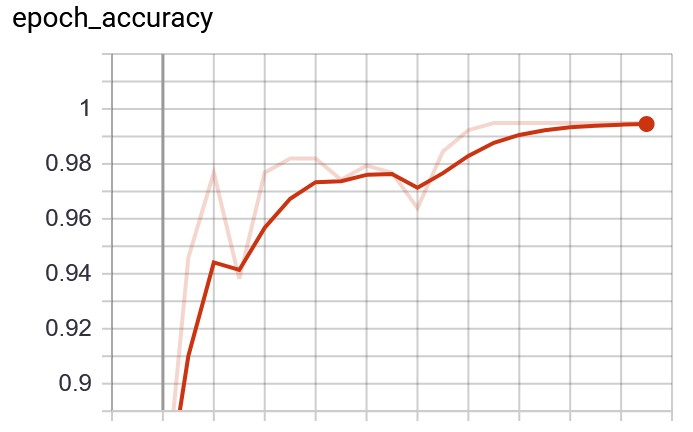

In [42]:
epoch_validation_accuracy_selectedmodel = "/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAGwArUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KK5v4j/ETQPhN4F1rxf4ov00zQdItzc3Vy4zhQQAqgcszMQqqOSzADk0AdJRXxXcf8FBfG+m+FYfiFqX7OHiqx+EEm2YeJjqtu18tq33bhtP27lQghtxfbgghiCDXoH7Rn7b3h/wCA3gP4aeNrLRpPGXhfxpqFvbx3VjcGKSG1lj8zz44zGxlbZ0iJQk8FhQB9KUV8XeKP+Cgvi74W3Wl6z8TP2e/FHgf4bahcLCnieXUYrqe2V/8AVtc2caZhJyMoz7hyFDkYr3b4/ftOeDf2evhra+MdZmm1aLUpIrfR9P0hRNc6rNIN0aQDOCCvzFs4A9SVBAPW6K+N7j9vfxh8ObjRNR+M3wD174YeCNWmSCPxMurw6mlq7kbDdQxxq0A7kN83BwrEV7b+0N+0x4T/AGdPh9aeJ9XFzrUuqTx2ei6To6ia61W4kGUSEZwRjkt0xjGSVUgHrdcRrHxp8G6B8VtB+G1/rPkeNddtJb7TtM+yzN58MYcu3mhDGuBE/DMCdvA5FfOqft4+Kfh/rnh0fGv4Haz8J/CviCdbSz8StrMGp28Mz/cW6WNENvkZPzHcNp+XCsR5p+158SIvhN/wUc+CviSTRtU8RSweF72C30nRbfzru8nlF3FFHGuRyXdck8AZPagD9DKK+S/Bv7cXiO1+NPhf4dfFv4Nap8J7rxXvj0HUpdXh1K3u5lx+6Zo41CMcqMAsQzoCAGDV9aUAFFU9Y1az0DSb3VNRuY7PT7KB7m5uJThIokUs7sewABJ+lfH1t+3v488beH9Q8Z/Db9nXxF4z+GVm0m3xJca1b6fPdRxEiSSCzZHklUFWxtJJIIIUggAH2bRXk/w//ad8B/EL4BJ8YbbUn03watnNd3U2oJsltPKLLLHIilvnVlIwud3G3O4Z8Bj/AOCgnjzUPCU3xE0r9m3xTffCOL9+fEjatbx3zWgPzXK6fsLsgXLbg+zAJLgAkAH2tRXjHiT9rn4b+Gf2dbf41T6tJP4LurZJrQwRg3NzIzFBbpGSP3u8MpUkBSjEkBSR4vfft+eOPAuk6d4u+JP7OviXwT8Mr2VEPiVdVhvZ7RJCBHJcWSxrJCpJXO4ggnA3MQCAfZ9FeEeNv2qLPwv8evhD8O9P0WPXLD4iWlzeW+vw6hsS3jihMqssflt5ocYwd64znmrf7UH7Sf8AwzdY+BLn/hHf+Ei/4SjxLa+Hdv277L9m84OfOz5b78bfu/LnPUUAe2UV8uftMftxL+zn8ZPDPgAfD/VfGd54g0qS9s/7Fn3XUlxvkSK3W38s7gzIMvu+UEna2MGXxF+2rcfDf4N+HvE3xA+GmteHPHfiPUX0rRvh/Zzi9v72fcBHtcIg2kMhJ25XeBhmIBAPp6ivkjTv24fFng7x94T8P/Gj4Jap8KdP8VXSafpOuJrlvq9qbpyAkc5iRfJznuSR1IwGYej/ALSn7VWkfs8t4e0a30HUvG/jzxLM0GieFNGA+0XRUfNI7EHy4xwC2CeuAQrFQD3CivlfwR+2trdr8VvD/wAPvjH8JdU+D+s+Jj5egXkuqw6rYX0vTyTPEqqkhJUBfmOXUHbuXPZfs5/tPt8c/GnxQ8Iap4Y/4RLxJ4D1f+zrmz+3/a1uYmLiO4RvKjIVjG3GDgFTn5qAPdqK8M+EP7TR+MXx6+KngHS/DXlaF4Clhs5/Ehv932q8fIeAQeWNuxkmUt5jf6scDdx7nQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8Wf8FdbPULr9jq/ezWY2kOtWEmoNCuQtvvZQWHp5jRfjivtOszxN4Z0rxn4e1HQtd0+31XR9Qga2u7K6QPHNGwwysD2xQB8fXH7Ovxx+I3wvljf9ruz1HwPrmjsjtH8OdMjtptPmhIOGWUbUMTHkEYB7V4p+1Z8M7T4E/s9/soeEk8VW/ivTtI8a2zx+IEjWCG5geR5kkAEjqECOADvIIXOea+go/wDgmP8ADa3t5dHt/GnxKtvA0kxlfwND4oddFZS24xmLZvKk9/M3f7Wea80/4KbfD/w5pPgX9nvwZY6RbWXhdPGlnpq6Xbr5cS25QoYxjBAKk85zyTnNAHvf/BRDVNI0v9jL4oHWXiWC400W8CykfPctKghCjuRJtbj+6T2r5T8bRy+Fb7/gnlqfjENbaBY2cNvcy3nEdteNa2f2fzCeFIZVIJ+75bHjBr6Hh/4Jq/DK48QaNd6/4k8eeMdA0WbztN8I+JPELXmkWmPuokRQPsXgbS5BAw24ZB99+L3wa8H/AB18B3ng/wAa6NFrGhXBV/JYlHhkX7kkTqQyOuTgg9CQcgkEA8k/4KLavomk/sZfE3+3ZIVgutPW2to5sZkumlTyAo7sHCtx0CE9Aa+X/G9reeFfEX/BPS78ZbrbTbKyS1upLzhbe9a1sxCJCej7guM9Cjehr6E8N/8ABOH4cabr2hX/AIm8T+PPiVY6CwfStC8a699u02yYY27IBGgwAANpJUgYINe5/Gb4K+D/AI/eBbvwh430hNX0a4ZZVXcUlglXO2WJ1IZHGTyOoJByCQQDC/aa8QfCjw58Kbu4+M4sH8ESXUEUkWoWkl0kk5fMSrFGrOzZGflBwASeAa+dfissa/8ABU79n9YUKRL4R1EIrKVIXyb3AweRx6813/gn/gnn8PfDPizQ9f1/xN45+JUmgEPo1h431039nprqQVaGIRoBjAwGyvAOMgEen+JP2dfDfij9oHwj8YLu91SPxL4Z0+fTbO1hljFnJHKsqsZEMZcsBM2CHA4HB5yAfO37f/8AyX/9kX/se0/9G2tfbdeW/GD9nXw38avGHw58R65e6pa33gXVhrOmx6fLGkU0waNtsweNiyZiXhSp5PNeY6p/w2j/AGpef2b/AMKH/s7zn+zfav7a87ytx2b9vG7bjOOM5xQB7l8XvG9n8NPhT4x8W6hYnU7LQ9Iu9RmsRj/SFihZzFyCBu27ckEDPNfInwZsv2hfjl8IdM+Jw+PPh/4ReGtTtpL618P6F4Psryz0+1Uty89w2QQFYsCcKc89h7p8KdL+P+u6tq2m/G61+FV74LvNMmt/svhFNRe4mmdkXZKt18hhMRmDDqSV7ZrzfTf+CX3wl0u9lt4tb8cv4MkuzeP4FfxC/wDYjNnIDRBRIwBx96QnjkmgD478B2Ooah/wRZ8cJp6SSNHrfnTrHnJhS/tWc/QAbj7A1+nvwx17wxcfs/8AhjVobmz/AOEQXw3bzGYkfZ0tFtl3buwVUBBHbBBrD+Af7Lvg/wDZ5+Fep/DzR5tR1/wvqF1cXM1r4iaG4+WdFSSDCRIpiIU/KwJ+dskg4Hkbf8Exfheqz6XbeKfiHYeBZ7n7TL4DtvEzrokh3birRFDIQSOvmbvQigDxP9rnU/hle/s8fs9+I/htBb2/wUtfiNa3Fx5FlNa2qxiScSyGKVFYLuW4BYgDLH+9X3Z8bNd8A6N8I/EWpfEmSxbwAtqDqbXkTTwPCzKFBRAzPlioAUEkkYqbW/gr4H8RfCt/htf+GrGbwO1mlgNFVCkKQpjYF2kFSpUMGBDBgGBzzXgGi/8ABNH4Z2d1pMOteJ/H3jPwtpEwn0/wd4k8QG50a2Zc7AsCxqdqg4CliCOG3AkEA82+Ll54bt/2zv2L7/w2iWXgy40i9i0X9y8EYt3swtvGqOAyfLJEAjAEbgCBXQf8FQ7yCPTfgLatNGt1L8R9OlSEsN7IquGYDqQC6AntuHqK+gv2hv2XfA37THhbTNG8VwXlnJpM4utK1XRpxbXmnycAmF9pABCrlSpHyqcZVSPIH/4Jk/DO/wBS0bWNa8V/EDxP4m0nU7bUbfxBr2vLeXm2AlltSXi2eSWIYgIHyow4GQQDn/jF/wApWPgL/wBipqf/AKKva7L9tD43eJPA/jL4TfDzwLZaHF448dajPbWPiDxBAJoNISMR75UU/elJkXaOR8mCp3CvV/En7OvhvxR+0D4R+MF3e6pH4l8M6fPptnawyxizkjlWVWMiGMuWAmbBDgcDg85i/aI/Zj8DftPeF7PRvGdpdCXT5vtOnarps/kXthKcZaKTBHIAyrBlOFOMqpAB8Ift6fDv4q+BfDXwrb4h/HdPiRa3XjrT/s2gnwvZaSySKk2blXhYuyoG2FT8v75SecV7R48lh0j/AIK0fD261tlitb/wFNaaNLOcIboTXJdEJ437C/HXDgdxWzq3/BLf4X+IbOGTWvFvxC13xHb3cNzb+KNW11LrUoFi3bIEaSExiPLBiPL3ZVfmxxXufx//AGa/A37Snhyy0rxjY3Bn06b7TpuradObe+0+bjLwyjpnAypBUlVJBKqQAVvjzr3wk0vVPh9ZfE9LGfUb/X4Y/C0FxZS3Mx1LIEbRCJGKEFl+c4UFlyRkV8sftIeMLb9jL9uPTvi/cps8I+PfCt7p+rKvRr+yhEkJ/wB5xHaxr3+aSve/hR+w74G+GPxAt/HOo674u+JHjCzj8nT9Y8d6wdSmsEwQRD8iKvBPJBI7EZOfCv8AgoL4k8F/tOav8P8A9n/wtqNr4k8b3fi6GTURprec2h2sKypdyTMvCOqs2Y25+UkjIXIB6l/wTX+G974N/ZosPEutgv4n8e3s/izUp5F+dzcnMRz1IMQR8djI3rk/VVVdK0u00PS7PTrCBLWxs4Ut7eCMYWONFCqo9gAB+FWqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArC8U+A/DPjj+z/wDhJPDuk+IP7OuFu7L+1LGK5+zTr92WPep2OOzLg1u0UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXN6F8NfCPhfxDqmv6N4W0XSNd1Vi+oapY6dDBc3jFtxM0qqGkJbn5ieea6SigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooArahef2fZyXHkTXOzH7q3Te5yQOB+NYN148hsbWa5uNH1iKCFGkkka04VQMknnsK6esHx7/wAiN4i/7B1x/wCimoArWXjyHUbOC7ttH1iW3njWWOQWhG5WGQeT6Gpv+Ew/6gmsf+An/wBepPAf/Ij+Hf8AsHW//opa3aAOe/4TD/qCax/4Cf8A16P+Ew/6gmsf+An/ANeuhooA57/hMP8AqCax/wCAn/16P+Ew/wCoJrH/AICf/XroaKAOK0/4raXquqXunWljqk99ZHFxAtqd0fOOea1P+Ew/6gmsf+An/wBevOfhV/yWn4i/9dF/9DNez0Ac9/wmH/UE1j/wE/8Ar0f8Jh/1BNY/8BP/AK9dDRQBz3/CYf8AUE1j/wABP/r0f8Jh/wBQTWP/AAE/+vXQ0UAcvdePoLNoVm0jWIzNIIo82Z+Zj0HWp/8AhMP+oJrH/gJ/9ejxZ/x8aF/2EI/5GuhoA57/AITD/qCax/4Cf/Xo/wCEw/6gmsf+An/166GigDnv+Ew/6gmsf+An/wBej/hMP+oJrH/gJ/8AXroaKAOdbxkFUsdE1gADJ/0T/wCvUVn48h1C2S4t9H1iSGQZVhaEZ7etdFc/8e8v+4f5Vj+CP+RV0/8A3D/6EaAI/wDhMP8AqCax/wCAn/16P+Ew/wCoJrH/AICf/XroaKAOe/4TD/qCax/4Cf8A16P+Ew/6gmsf+An/ANeuhooA57/hMP8AqCax/wCAn/16gXx9A149oNI1g3CIJGj+xnhScZ611Fc9bf8AI9Xn/Xkn/oVAB/wmH/UE1j/wE/8Ar0f8Jh/1BNY/8BP/AK9dDRQBz3/CYf8AUE1j/wABP/r0f8Jh/wBQTWP/AAE/+vXQ0UAc9/wmH/UE1j/wE/8Ar1BeePoNPhEtxpGsRRlgu42ZPJ4A611Fc945/wCQLH/18xf+hUAH/CYf9QTWP/AT/wCvR/wmH/UE1j/wE/8Ar10NFAHPf8Jh/wBQTWP/AAE/+vR/wmH/AFBNY/8AAT/69dDRQBz3/CYf9QTWP/AT/wCvR/wmH/UE1j/wE/8Ar10NFAHL2fj6DUITLb6RrEsYYoWFmRyOo61P/wAJh/1BNY/8BP8A69Hgf/kDy/8AXzL/AOhV0NAHPf8ACYf9QTWP/AT/AOvR/wAJh/1BNY/8BP8A69dDRQBz3/CYf9QTWP8AwE/+vR/wmH/UE1j/AMBP/r10NFAHLt4+gS8S0OkawLh0LrH9jPKjqetT/wDCYf8AUE1j/wABP/r0XX/I82P/AF5yf+hV0NAHPf8ACYf9QTWP/AT/AOvR/wAJh/1BNY/8BP8A69dDRQBz3/CYf9QTWP8AwE/+vR/wmH/UE1j/AMBP/r10NFAHMXnjyHT7aS4uNH1iOGMZZjaE47etSr4yDqGGiawQRkf6J/8AXqbxt/yKuof7g/8AQhWva/8AHrD/ALi/yoAw/wDhMP8AqCax/wCAn/16P+Ew/wCoJrH/AICf/XroaKAOe/4TD/qCax/4Cf8A16P+Ew/6gmsf+An/ANeuhooA57/hMP8AqCax/wCAn/16gtfH0F40yw6RrEhhcxyYsz8rDqOtdRXPeE/+PnXf+whJ/IUAH/CYf9QTWP8AwE/+vR/wmH/UE1j/AMBP/r10NFAHPf8ACYf9QTWP/AT/AOvR/wAJh/1BNY/8BP8A69dDRQBz3/CYf9QTWP8AwE/+vUE3j6C3uLe3k0jWFmnLCNfsZ+bAye/pXUVz2uf8jR4d/wB6f/0AUAH/AAmH/UE1j/wE/wDr0f8ACYf9QTWP/AT/AOvXQ0UAc9/wmH/UE1j/AMBP/r0f8Jh/1BNY/wDAT/69dDRQBz3/AAmH/UE1j/wE/wDr1HceN0tYJJpdG1hIo1Ls32ToAMk9a6Ws/wARf8i/qf8A16y/+gGgC3bXEd5bxTxNuilUOjYIyCMg1LWd4c/5F/TP+vaP/wBBFaNABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVg+Pf+RG8Rf9g64/8ARTVvVg+Pf+RG8Rf9g64/9FNQAvgP/kR/Dv8A2Drf/wBFLW7WF4D/AORH8O/9g63/APRS1u0AFFFFABRRRQB4x8Kv+S0/EX/rov8A6Ga9nrxj4Vf8lp+Iv/XRf/QzXs9ABRRRQAUUUUAc94s/4+NC/wCwhH/I10Nc94s/4+NC/wCwhH/I10NABRRRQAUUUUARXP8Ax7y/7h/lWP4I/wCRV0//AHD/AOhGti5/495f9w/yrH8Ef8irp/8AuH/0I0AbtFFFABRRRQAVz1t/yPV5/wBeSf8AoVdDXPW3/I9Xn/Xkn/oVAHQ0UUUAFFFFABXPeOf+QLH/ANfMX/oVdDXPeOf+QLH/ANfMX/oVAHQ0UUUAFFFFABRRRQBz3gf/AJA8v/XzL/6FXQ1z3gf/AJA8v/XzL/6FXQ0AFFFFABRRRQBz11/yPNj/ANecn/oVdDXPXX/I82P/AF5yf+hV0NABRRRQAUUUUAYfjb/kVdQ/3B/6EK17X/j1h/3F/lWR42/5FXUP9wf+hCte1/49Yf8AcX+VAEtFFFABRRRQAVz3hP8A4+dd/wCwhJ/IV0Nc94T/AOPnXf8AsISfyFAHQ0UUUAFFFFABXPa5/wAjR4d/3p//AEAV0Nc9rn/I0eHf96f/ANAFAHQ0UUUAFFFFABWf4i/5F/U/+vWX/wBANaFZ/iL/AJF/U/8Ar1l/9ANACeHP+Rf0z/r2j/8AQRWjWd4c/wCRf0z/AK9o/wD0EVo0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFbULGPUrOS2lLrG+MmNircEHqPpXG+NPBtja+D9dmSW6Lx2E7gNOxGRGx5Fd3WD49/5EbxF/2Drj/0U1AGD4H8FWMngrw+5mvMtp9uTi4b/nmtbf8Awg9h/wA9rz/wIapPAf8AyI/h3/sHW/8A6KWt2gDnv+EHsP8Antef+BDUf8IPYf8APa8/8CGroaKAOe/4Qew/57Xn/gQ1H/CD2H/Pa8/8CGroaKAPA/hr4ctrz4uePLV5LgRwSAKVlIY/Mep7163/AMIPYf8APa8/8CGrzn4Vf8lp+Iv/AF0X/wBDNez0Ac9/wg9h/wA9rz/wIaj/AIQew/57Xn/gQ1dDRQBz3/CD2H/Pa8/8CGo/4Qew/wCe15/4ENXQ0UAef+KvBdjHcaJia8+a/jHNw3oa3/8AhB7D/ntef+BDUeLP+PjQv+whH/I10NAHPf8ACD2H/Pa8/wDAhqP+EHsP+e15/wCBDV0NFAHPf8IPYf8APa8/8CGo/wCEHsP+e15/4ENXQ0UAc1ceB7D7PL++vPun/l4b0rI8F+CrGTwxYMZrzJU9Lhv7xrt7n/j3l/3D/KsfwR/yKun/AO4f/QjQBH/wg9h/z2vP/AhqP+EHsP8Antef+BDV0NFAHPf8IPYf89rz/wACGo/4Qew/57Xn/gQ1dDRQBz3/AAg9h/z2vP8AwIasC38FWP8Awm14nnXmPsaH/j4b+9XoFc9bf8j1ef8AXkn/AKFQAf8ACD2H/Pa8/wDAhqP+EHsP+e15/wCBDV0NFAHPf8IPYf8APa8/8CGo/wCEHsP+e15/4ENXQ0UAc9/wg9h/z2vP/AhqwPG3gqxj0eMia8/4+IhzcN/er0Cue8c/8gWP/r5i/wDQqAD/AIQew/57Xn/gQ1H/AAg9h/z2vP8AwIauhooA57/hB7D/AJ7Xn/gQ1H/CD2H/AD2vP/Ahq6GigDnv+EHsP+e15/4ENR/wg9h/z2vP/Ahq6GigDz/wV4LsZNHkJmvP+PiUcXDf3q3/APhB7D/ntef+BDUeB/8AkDy/9fMv/oVdDQBz3/CD2H/Pa8/8CGo/4Qew/wCe15/4ENXQ0UAc9/wg9h/z2vP/AAIaj/hB7D/ntef+BDV0NFAHn914Lsf+E2sk868wbRz/AMfDf3q3/wDhB7D/AJ7Xn/gQ1F1/yPNj/wBecn/oVdDQBz3/AAg9h/z2vP8AwIaj/hB7D/ntef8AgQ1dDRQBz3/CD2H/AD2vP/AhqP8AhB7D/ntef+BDV0NFAHB+M/BVjH4Yv2E15kIOtw394VrWvgewNtEfOvPuD/l4b0q142/5FXUP9wf+hCte1/49Yf8AcX+VAGH/AMIPYf8APa8/8CGo/wCEHsP+e15/4ENXQ0UAc9/wg9h/z2vP/AhqP+EHsP8Antef+BDV0NFAHPf8IPYf89rz/wACGrA8K+C7F7jW8zXny38g4uG9BXoFc94T/wCPnXf+whJ/IUAH/CD2H/Pa8/8AAhqP+EHsP+e15/4ENXQ0UAc9/wAIPYf89rz/AMCGo/4Qew/57Xn/AIENXQ0UAc9/wg9h/wA9rz/wIasDW/Bdivibw+omvMM0+f8ASG/uCvQK57XP+Ro8O/70/wD6AKAD/hB7D/ntef8AgQ1H/CD2H/Pa8/8AAhq6GigDnv8AhB7D/ntef+BDUf8ACD2H/Pa8/wDAhq6GigDnv+EHsP8Antef+BDVQ8QeCbBdB1Iia8yLaQ/8fDf3TXYVn+Iv+Rf1P/r1l/8AQDQAnhz/AJF/TP8Ar2j/APQRWjWd4c/5F/TP+vaP/wBBFaNABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHyz+0F+2/pnw78QWvhbwTbw+JvEKatBp2q3LxSPY6Zuk2tHI6lczHa4CBuCrbuV2n6mr5T/by0XT9F+FPhZdPsLawFx460+5mFtCsfmzOZmeRtoG5mJJLHkk5NfVlW7WVgCsHx7/AMiN4i/7B1x/6KatXUJri3s5JLW2+1zrjbD5gTdyM8npxk/hXG+NNW1yTwfrqTaAIYmsJw8n2xG2L5bZOMc49KgDe8B/8iP4d/7B1v8A+ilrdrg/A+sa6vgrw+F8O71Gn24DfbYxkeWvPStv+2te/wChc/8AJ6P/AAoA6Giue/trXv8AoXP/ACej/wAKP7a17/oXP/J6P/CgDoaK57+2te/6Fz/yej/wo/trXv8AoXP/ACej/wAKAPOfhV/yWn4i/wDXRf8A0M17PXgnw11DU4fi548kh0nz7h5B5sH2lV8v5j/EeD+Fetf21r3/AELn/k9H/hQB0NFc9/bWvf8AQuf+T0f+FH9ta9/0Ln/k9H/hQB0NFc9/bWvf9C5/5PR/4Uf21r3/AELn/k9H/hQAeLP+PjQv+whH/I10Nef+KtY1xrjRN3h7bi/jI/02M5ODx0rf/trXv+hc/wDJ6P8AwoA6Giue/trXv+hc/wDJ6P8Awo/trXv+hc/8no/8KAOhornv7a17/oXP/J6P/Cj+2te/6Fz/AMno/wDCgDcuf+PeX/cP8qx/BH/Iq6f/ALh/9CNV7jWte+zy/wDFOfwn/l+j9PpWR4L1jXV8MWAXw7uXacN9tjH8R9qAO8ornv7a17/oXP8Ayej/AMKP7a17/oXP/J6P/CgDoaK57+2te/6Fz/yej/wo/trXv+hc/wDJ6P8AwoA6Guetv+R6vP8AryT/ANCo/trXv+hc/wDJ6P8AwrAt9Y13/hNrw/8ACPfN9jT5ftsf976UAegUVz39ta9/0Ln/AJPR/wCFH9ta9/0Ln/k9H/hQB0NFc9/bWvf9C5/5PR/4Uf21r3/Quf8Ak9H/AIUAdDXPeOf+QLH/ANfMX/oVH9ta9/0Ln/k9H/hWB421jXG0eMN4e2D7RFz9tjP8X0oA9Aornv7a17/oXP8Ayej/AMKP7a17/oXP/J6P/CgDoaK57+2te/6Fz/yej/wo/trXv+hc/wDJ6P8AwoA6Giue/trXv+hc/wDJ6P8Awo/trXv+hc/8no/8KADwP/yB5f8Ar5l/9Croa8/8E6xri6RIF8Pbh9ol5+2xj+L6Vv8A9ta9/wBC5/5PR/4UAdDRXPf21r3/AELn/k9H/hR/bWvf9C5/5PR/4UAdDRXPf21r3/Quf+T0f+FH9ta9/wBC5/5PR/4UAF1/yPNj/wBecn/oVdDXn91rGuf8JtZH/hHvm+yP8v22P+99K3/7a17/AKFz/wAno/8ACgDoaK57+2te/wChc/8AJ6P/AAo/trXv+hc/8no/8KAOhornv7a17/oXP/J6P/Cj+2te/wChc/8AJ6P/AAoAl8bf8irqH+4P/QhWva/8esP+4v8AKuJ8aaxrreGL8N4d2rsGT9ujP8Q9q1bXWte+zRf8U5n5B/y/R+n0oA6aiue/trXv+hc/8no/8KP7a17/AKFz/wAno/8ACgDoaK57+2te/wChc/8AJ6P/AAo/trXv+hc/8no/8KAOhrnvCf8Ax867/wBhCT+Qo/trXv8AoXP/ACej/wAKwPCusa4txre3w9uzfyE/6bGMHA46UAegUVz39ta9/wBC5/5PR/4Uf21r3/Quf+T0f+FAHQ0Vz39ta9/0Ln/k9H/hR/bWvf8AQuf+T0f+FAHQ1z2uf8jR4d/3p/8A0AUf21r3/Quf+T0f+FYGt6xrh8TeHyfD2CGmwPtsfPyD2oA9Aornv7a17/oXP/J6P/Cj+2te/wChc/8AJ6P/AAoA6Giue/trXv8AoXP/ACej/wAKP7a17/oXP/J6P/CgDoaz/EX/ACL+p/8AXrL/AOgGs7+2te/6Fz/yej/wqh4g1nXToOpA+HcD7NJk/bo+PlPtQBv+HP8AkX9M/wCvaP8A9BFaNZ3hv/kX9M/69o//AEEVo0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeX/tBfBP/AIXt4V0bRf7Z/sP+ztZttX8/7L9o8zyd/wC7270xnf8AeycY6GvUKKKd+gBWD49/5EbxF/2Drj/0U1b1YPj3/kRvEX/YOuP/AEU1IBfAf/Ij+Hf+wdb/APopa3awvAf/ACI/h3/sHW//AKKWt2gAooooAKKKKAPGPhV/yWn4i/8AXRf/AEM17PXjHwq/5LT8Rf8Arov/AKGa9noAKKKKACiiigDnvFn/AB8aF/2EI/5GuhrnvFn/AB8aF/2EI/5GuhoAKKKKACiiigCK5/495f8AcP8AKsfwR/yKun/7h/8AQjWxc/8AHvL/ALh/lWP4I/5FXT/9w/8AoRoA3aKKKACiiigArnrb/kerz/ryT/0Kuhrnrb/kerz/AK8k/wDQqAOhooooAKKKKACue8c/8gWP/r5i/wDQq6Gue8c/8gWP/r5i/wDQqAOhooooAKKKKACiiigDnvA//IHl/wCvmX/0KuhrnvA//IHl/wCvmX/0KuhoAKKKKACiiigDnrr/AJHmx/685P8A0KuhrnL2RY/G1kzsFUWcmSxwPvVdu/FGnWmR5/mt/diG79en60nJR3LjCU/hVzWorlJPGFxdMUsbIs3q2WP5CmfY/EWpfM85th2+fZ+i8/nWXtE/hVzo+ryXxtI66iuT/wCEf13/AKCX/keT/Cj/AIR/Xf8AoJf+R5P8KPaS/lD2MP50aHjb/kVdQ/3B/wChCte1/wCPWH/cX+Vef+MdB1tfDN8W1Hcu0ZHnv/eHtWpa+H9c+zRf8TL+Af8ALeT0+lHtJfyh7GH86Oxork/+Ef13/oJf+R5P8KP+Ef13/oJf+R5P8KPaS/lD2MP50dZRXD6jb3ujx+Zf+ILayTruuL1ox+Zrj9W+LPhXRc/a/iXoCMvVI9XEjj/gKkn9KyniI0/j09WjopYCpX/he96Jv8j2iue8J/8AHzrv/YQk/kK8F1b9rD4f6XuA8dNeyD+C0gu3/wDHjGF/WuBs/wBtTwro82okP4guhPctKjQRqAQcdd0grjlmuFhvNfej2KfDOZ1dY0ZfOLX52PtmiviK4/b10hc/Z9M16X/rpOifyc1l3H7fsi/6jw5fSf8AXTVdn8ozXO88wS3n+f8AkdseDc4ltS/FL82feNFfA6/txeLb7mx8H3Tg9MXs0n8oxUi/tbfFe8/49PAt4/piK7k/lip/tzCPa7+T/wAjT/UvNI/Gor1lH/M+9K57XP8AkaPDv+9P/wCgCvjBf2jvj/ef8enw8v2+mkag/wDJxVS6+K37Ruralp5/4Q2+tLtS/wBnDaZcR5JX5v8AWP6U/wC2aL2hJ/8AbrJ/1RxcfjrU16zR990hOBk8CvhgeKf2rLj7miXkf/bCIfzes3xRqH7U03hnVzqdnew6V9jmN2yfZgwh2HfjDbs7c/d59OaHnCSbVCf/AICOPCcpSUXjKKv/AHz1L4jft/8Ahbwnr0+m+H9Fn8Upbv5cl6t0tvAzA4PlttcuPfAB7ZHNel/Av9pjwt8dknttOWfTNbtk8ybTLvBbZnG+Nhw65IB6EZ5HIJ/KuvYv2Rf7Q/4aI8H/ANnb/M8+TzdvTyfJfzM+23P6d8V83hM9xdTFRjOzjJpWttft1P0LNOCsroZbUnRuqkIt8zb1sr6rbXySP1PrP8Rf8i/qf/XrL/6Aa0Kz/EX/ACL+p/8AXrL/AOgGv0Q/AhPDn/Iv6Z/17R/+gitGs7w5/wAi/pn/AF7R/wDoIrRoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGSSpDGXkdY0HVmOAK5zx1qVpJ4J8Qqt1CzNp9wAokBJPlt710F5ZwahbvBcRLNC+NyMODg5H6iuS8beFdIt/BmvSxafCkkdhcMrBeQRGxBoAveBNQtR4H8PA3MIP8AZ1v/AMtB/wA8lrc/tK0/5+of+/g/xrlPA3hHR5PBPh9m0+Es2n25Jwf+ea1t/wDCH6L/ANA6H8jQBof2laf8/UP/AH8H+NH9pWn/AD9Q/wDfwf41n/8ACH6L/wBA6H8jR/wh+i/9A6H8jQBof2laf8/UP/fwf40f2laf8/UP/fwf41n/APCH6L/0DofyNH/CH6L/ANA6H8jQB5Z8LbuCP4zfEJ2mjVGkXaxYAH5z0r2P+0rT/n6h/wC/g/xrxL4ZaDp918YPH1vLaRvBDIPLQ9F+Y9K9d/4Q/Rf+gdD+RoA0P7StP+fqH/v4P8aP7StP+fqH/v4P8az/APhD9F/6B0P5Gj/hD9F/6B0P5GgDQ/tK0/5+of8Av4P8aP7StP8An6h/7+D/ABrP/wCEP0X/AKB0P5Gj/hD9F/6B0P5GgDP8Waham40PFzCf+JhH/wAtB6Gug/tK0/5+of8Av4P8a5DxV4R0dLjRMafCM38YPB9DW/8A8Ifov/QOh/I0AaH9pWn/AD9Q/wDfwf40f2laf8/UP/fwf41n/wDCH6L/ANA6H8jR/wAIfov/AEDofyNAGh/aVp/z9Q/9/B/jR/aVp/z9Q/8Afwf41n/8Ifov/QOh/I0f8Ifov/QOh/I0AXLnUrT7PL/pUP3D/wAtB6fWsfwTqFqPC2ng3MIOw/8ALQf3jVi48H6L9nl/4l0P3T2PpWR4L8I6PJ4XsGbT4SSp5wf7xoA6v+0rT/n6h/7+D/Gj+0rT/n6h/wC/g/xrP/4Q/Rf+gdD+Ro/4Q/Rf+gdD+RoA0P7StP8An6h/7+D/ABo/tK0/5+of+/g/xrP/AOEP0X/oHQ/kaP8AhD9F/wCgdD+RoA0P7StP+fqH/v4P8a5+21C1/wCE4vD9phx9iT/loP71aH/CH6L/ANA6H8jWBb+EdH/4Te8X+z4dv2NDjB/vUAdf/aVp/wA/UP8A38H+NH9pWn/P1D/38H+NZ/8Awh+i/wDQOh/I0f8ACH6L/wBA6H8jQBof2laf8/UP/fwf40f2laf8/UP/AH8H+NZ//CH6L/0DofyNH/CH6L/0DofyNAGh/aVp/wA/UP8A38H+Nc/441C1OjR4uYT/AKRF/wAtB/erQ/4Q/Rf+gdD+Rrn/ABt4R0ePR4yunwg/aIux/vUAdh/aVp/z9Q/9/B/jR/aVp/z9Q/8Afwf41n/8Ifov/QOh/I0f8Ifov/QOh/I0AaH9pWn/AD9Q/wDfwf40f2laf8/UP/fwf41n/wDCH6L/ANA6H8jR/wAIfov/AEDofyNAGh/aVp/z9Q/9/B/jR/aVp/z9Q/8Afwf41n/8Ifov/QOh/I0f8Ifov/QOh/I0AZ/gfULUaPJm5hH+ky/8tB/eroP7StP+fqH/AL+D/GuP8E+EdHk0eQtp8JP2mUdD/eroP+EP0X/oHQ/kaAND+0rT/n6h/wC/g/xo/tK0/wCfqH/v4P8AGs//AIQ/Rf8AoHQ/kaP+EP0X/oHQ/kaAND+0rT/n6h/7+D/Gs/WPFmnaTDlrmGSZh8sayDJ9z6CsLXbPQtPzBbadBLdHjoSE+vPJ9qh0X4Y6ZK/2vUrGN5G5ETZ/Nv8ACsZTbfLDc6oUlFc9Xbt3MYRnxJ42tLi+vY4YmtXKAOOm7sM8Cu2tdH0O1wfMhmb+9LKD+nT9Kxrrwjo48bWSjT4dv2RzjB/vVv8A/CH6L/0DofyNONOK31Yp4ictE7Lsi9He2MKhY57dFH8KuoFO/tK0/wCfqH/v4P8AGs5vCGiKpZtPgAAySc8frXgXxU/aj+E3w5uJLGxtF8V6qmQ0OlkGGM+jzE7f++dxHcCs6+Io4aPPWkoo3weAxWY1PZYWm5y8v1ey+Z9Hf2laf8/UP/fwf41BfeINL021e5vNSs7S3jGXmnnREUe5JwK+F/8Ahb3xf+NTeX8P/h9DounyHCXkdt5mB6G4nxF+Sg1s6H+wv418b3KX3xD8aiLJ3G2tma7lH+zubaif8BDCvK/tOVbTCUZT837q+9n0/wDq3TweuaYuFL+6vfn9y2+89b+LX7Xnwy0HR73T7bWzr9+wCiLSI/OXqOfNOIyOOzGvLtU/4KIST7LTw34FluZsBUkvLsknj/nkiH/0KvT4f2Pvhj4D8MXc8eivrN9Ggxd6tMZm6j+AYj/8dr17Rfhz4X0mxiSy0Kxs0KDK28IjHT0FP2OZVtZ1Yw8kr/mL61w7hNKWGnWfecuVfdHp6nx//wAL2/aU+IRxofhpNBjf7kiacsAx/v3bFT9aP+FD/tAfEHnxL8RItLt35kt5NZcj/v3APLP519n/APCH6L/0DofyNH/CH6L/ANA6H8jS/slVP49acvnZfch/60So/wC5YSlT8+W8vvf+R8f6b/wT1sZX83WPiP58jcuttZKDn/faU5/Kux0n9gj4YWe1rzXtZ1B+6teQxofwWPP619H/APCH6L/0DofyNH/CH6L/ANA6H8jW0MnwMNqS+d3+bOWrxZnVb4sQ16JL8kjyPSf2Q/gvpW0/2BDeSD+O71GZ8/8AAfMC/pWl4N+DPwvgm1dT4Q8NyrDeukf2izhlKqAMAFwa9K/4Q/Rf+gdD+RrA8K+EdHa41zOnwnF/IBwfQV2xweGp/DTivkjx6mbZhW/iYib9ZP8AzLVr4D8CWGPs3h3w7b46eVYwL/Ja2rSHRdPx9ljsLbHTyVRf5VF/wh+i/wDQOh/I0f8ACH6L/wBA6H8jXRGEY7KxwTrVanxyb9WaH9pWn/P1D/38H+NH9pWn/P1D/wB/B/jWf/wh+i/9A6H8jR/wh+i/9A6H8jVmJof2laf8/UP/AH8H+Nc/rmoWv/CT+HT9phxun/5aD+4K0P8AhD9F/wCgdD+RrA1zwjo6+JvDyjT4QGafPB/uCgDr/wC0rT/n6h/7+D/GhtQs2Uq1zAQeCC61n/8ACH6L/wBA6H8jR/wh+i/9A6H8jQB8y/Ej9g/wd4r12fUvDvif/hFUuHMkll5CXMCk9fLG9Cgz2yQO2BgD0v4E/s7eDfgStxdWN9/a2uXKeVNqd0yBgmQSkajhFJAJ5JOBk8AD0/8A4Q/Rf+gdD+Ro/wCEP0X/AKB0P5GvNp5dhKVX20KaUv66bI+gxHEGaYrDfVK1dun2019Xa7+bND+0rT/n6h/7+D/GqHiHUbT+wNT/ANJh/wCPaX/loP7h96T/AIQ/Rf8AoHQ/kaoeIPCGjLoOpEafCCLaQjg/3DXpHz5r+HP+Rf0z/r2j/wDQRWjWd4c/5F/TP+vaP/0EVo0AFFFFABRRRQAUUUUAFFFcv8UfH1p8Lfh34i8W30bTW2j2Ut2YVODKyr8qA9izYXPbNAHUUV8f3WvftDaR8Gx8YpvGukXeyxGvT+BP7EiS1SxKCRoxcg+d5ixZbk9QRzjJ+o/Avi+y+IHgvQvE2nbhY6vYw30Kt95VkQMFPuM4PuKpxsBu0V83/ET4kfEH4hftAT/Cj4da3aeDYNE02PU9d8R3Fkl7ODJjy4IIZPkOQyks3qem3D6nwr+I3jTwv8aL/wCEvxE1Wz8S376Sut6L4jtbNbR7yASGOSOaFSUWRWyRs4KgnuKOUD3yivkHwP4z+NH7Q3hnxL8QPC3xA0vwPpFnfXVtpXhuTSLe6WVYD/y93Eh3Rs/fbgAHd0r3T9nD4rXHxu+Cfhbxrd2SafeanDIJ7eIkoJIpnhcrnkKzRlgCSQCBk9aHGwHpVYPj3/kRvEX/AGDrj/0U1b1YPj3/AJEbxF/2Drj/ANFNUgL4D/5Efw7/ANg63/8ARS1u1heA/wDkR/Dv/YOt/wD0UtbtABRRRQAUUUUAeMfCr/ktPxF/66L/AOhmvZ68Y+FX/JafiL/10X/0M17PQAUUUUAFFFFAHPeLP+PjQv8AsIR/yNdDXPeLP+PjQv8AsIR/yNdDQAUUUUAFFFFAEVz/AMe8v+4f5Vj+CP8AkVdP/wBw/wDoRrYuf+PeX/cP8qx/BH/Iq6f/ALh/9CNAG7RRVa91C30+LzLiVYx2B6n6DvS23Gk27Is0VzLeObcMQttIV7HIFJ/wnUH/AD6yf99Cs/aw7nR9Wq/ynT1z1t/yPV5/15J/6FUP/CdQf8+sn/fQrJ0nxZa3Xjy6EitbhrNFDMRjO7v6Ue0g+onh6qV3E72iiitTnCiiigArnvHP/IFj/wCvmL/0KuhrnvHP/IFj/wCvmL/0KgDoaKKKACiiigAooooA57wP/wAgeX/r5l/9Croa57wP/wAgeX/r5l/9CroaACuY1rxFLNcGw05WaUnY0i9c9wP8a2Nb1AabpsswOHxtT/ePT/H8KzPBun+RZvduP3kx4J67R/if6VjNtvkR10oxjF1ZK/b1JtB8Nx6biefEt0ec9Qn09/etyiuC+LXxu8KfBfRvtviK/C3Eik22nW+Hubkj+4men+0cKPWiUqdCDlN2SCnTr42sqdKLlN7JG5df8jxY/wDXnJ/6FXlPxf8A2xvAvwt8+ytLj/hKNdTK/YdOkBjjb0km5VfcDcw7ivne78S/Fn9sbxM0Oip/winhRkaEN5rRwmIH5g8gG6ZvVVG3pkDrX0L8H/2NvA3wv8i9voP+Ep11MN9s1GMeVG3rHDyq/VtxHYivF+uYnG6YKPLH+eX6LqfYf2Tl2T+9m9Tnqf8APqD2/wAUtl5pa9rnha6f8dP2vWD3Un/CH+B5jkKQ0FvInsv+suOPX5Mj+GvoP4S/sj+AvhXHFcGwXxFrSj5tR1SNZNp/6Zx/dT68t/tGva6K6aGW0qcva1Xzz7y/RbI87G8RYrEU/q2GSo0f5Yafe9359+wiqFUADAHAApaKK9c+VMPxt/yKuof7g/8AQhWva/8AHrD/ALi/yrI8bf8AIq6h/uD/ANCFa9r/AMesP+4v8qAJaKKKACiiigArnvCf/Hzrv/YQk/kK6Gue8J/8fOu/9hCT+QoA6GiiigAooooAK57XP+Ro8O/70/8A6AK6Gue1z/kaPDv+9P8A+gCgDoaKKKACiiigArP8Rf8AIv6n/wBesv8A6Aa0Kz/EX/Iv6n/16y/+gGgBPDn/ACL+mf8AXtH/AOgitGs7w5/yL+mf9e0f/oIrRoAKKKKACiiigAooooAK8R/bW0m41r9lj4i29qm+RNPW5IH9yKWOVz+Cox/CvbqhvLODULOe1uoY7i2nRopYZVDI6MMMpB6ggkYpp2dwPFvE3iXTU/Yv1DWPtUZ0+TwMzJMCMNvscKB7liFA9TitX9kvSbrQ/wBmv4cWt4rLcf2NBKVcYKrIN6gjthWFchF+wz4ERYtOk1zxhc+DYrn7UngufWmbR1bduA8rbv2hucF+teweL/AKeLJPDjR67rfh6PRdQhv1h0O8+zR3gj6W9wu0+ZA3Rk4yO9U2rWQHjfxG+G+vW/7QT+M/hT4r8L2nju40hLbXPC/iGVjHeWiuBHcssWZUIIVQ23B2gZ+8G8v0q28W6b+2wmu+LdTsfEXiPRfBF3qOoWWhRPHZWMO5lhtYt+XLMWLln5PmdABX0X8VP2d/D/xU8Q6d4jfVde8K+KLCA2sOu+Gb/wCx3ZgLbjCzFWVkyScFe59a0PhH8DfDfwbi1STSH1DUtY1aRZtT1zWrprq+vnXIUyyHHQE4AAHJ4yTT5lYD5V+CH7NKftIfCPV/H2q+Ntb8M33jya5uZ9H8JzLZ6VDiV4gstuAROSUyxcgnOCc5Y+5/sVeOrrxt8DraG7stPtJtAv7jQvM0mJYrW5WAgLNGi8KGDDOOCQSMZwK19+xT4Q+1aqug+KPGvgzRdVkeW98P+HdaNtp0zOMPmIoxUMOCFIGOOnFex+A/AmhfDPwnp/hrw1p8el6NYIUgtoyTjJLEkkksSSSSTkk0SldAa2ofazZyfYTCLrjYbjOzqM5xz0zXG+NF8Tf8Ifrv2h9LMH2CfzPLEm7b5bZxnviu7rB8e/8AIjeIv+wdcf8AopqzAwfA/wDwlH/CFeH9n9kbP7Pt9u7zc48tetbf/FV/9Qf/AMi1J4D/AORH8O/9g63/APRS1u0Ac9/xVf8A1B//ACLR/wAVX/1B/wDyLXQ0UAc9/wAVX/1B/wDyLR/xVf8A1B//ACLXQ0UAeCfDX+2/+FuePPs32D7X5g87zd/l/eP3cc/nXrX/ABVf/UH/APItec/Cr/ktPxF/66L/AOhmvZ6AOe/4qv8A6g//AJFo/wCKr/6g/wD5FroaKAOe/wCKr/6g/wD5Fo/4qv8A6g//AJFroaKAPPfF0niaO40LzDpA3ajGq48372Diuh/4qv8A6g//AJFrnfinqRt9Q8NRqeY7+OYj6Zx/WvQVYSKGU5VhkGoUrtrsaypuMIy7mB/xVf8A1B//ACLR/wAVX/1B/wDyLXQ0VZkc9/xVf/UH/wDItH/FV/8AUH/8i10NFAHNXH/CVfZ5f+QP90/89fSsXwlceJLXwnYyM+jRwhD80hlH8RrsNcvPsGj3c4wSkZxnpk8D9a4LwHo954i8O2FxdXBW2wwXufvHOB0FZynZ2Suzop0lJc8nZE154u8UzSGCwi0uR24DhZT+Q/xptt4U8W3sn2jUJdLZzyULSk/Qnt+Fd7p+l22mR7beIKe7Hlj9TVup9m5azdy3WUFy0Vbz6nLQ6d4hgjVEt9CVV6DbLTvsfiP/AJ4aF/3xJXT0VrZHNzPucx9j8R/88NC/74krlLzQdf1Pxfdpt0eGZbNCGQSgfer1Kuetv+R6vP8AryT/ANCpOKasxxnKLumcpZ6x4v8ADswsr1dLaIfddvNOB6g9xXURS+KJ41kjbRXRhkMplINbWoabBqluYp0yOzDqp9RXLK994PutrAz2Tn8D9PQ1jd099UdVo4jWOkvzNL/iq/8AqD/+RaP+Kr/6g/8A5FrZsb6HULdZoH3oevqD6Gs3VfFVrp+5Iz9onH8KHgfU1s5JK7ZzRpzlLlS1K7N4pjUsx0VVHJJMoArhPH3i7Xo9NSKMaTPi4jJZPNA+979av+JPGGn2MYn8T+ItN8PWeNyrfXKQlh/soxBY15N48/a4+FHh/TxaaReXmv3ayozSWVq2PlOT88mwf985FcFbGUqfxzUfV6/ce5hcoxOI/g0ZVH5J2+b2PZ7bxprsxAlXS4D6sJSP0/wrXtdQ8RXgzBPocvsrS5/KvmXUP+CgHga8znwZq0x/vM8KH8wxrmr79ufw4W3WXhHU4z28y9jx+i1wvOMJH/l4n9/+R7K4SzSpth5R+cf8z7H/AOKr/wCoP/5Fo/4qv/qD/wDkWvjOL/goRc2XEHhaeVeyzakMf+ijivePgr+154M+LEdvY3dyvhzxE/y/2ffOAkrekUn3W7cHDHsK3oZtg8RPkhPXz0/M4cbwvm2BpOtVovlXazt6pNv5nqn/ABVf/UH/APItH/FV/wDUH/8AItdDRXsHyh5/4J/4Sj+yJNn9kY+0S/e83+9W/wD8VX/1B/8AyLR4H/5A8v8A18y/+hVs6heLp9nNcP0jXOPU9h+dG2o0m3ZHnniCTxRrGsQacp0n5D823zcZPJP4Cul/4qWytuW0WGCFOWYyhVUDqT6AV5z4p+OHhD4PWdzqviXUg+pTA/Z9MtcSXU3ckJn5QTxuYgcHmvnrUPE3xX/bV1N9P0S1bwp8P1fbNIzMIWAPPmSYBnf/AKZqNo4zj71eJVzCnRlywXPUe0Vv8+x9hhcir4yCq1WqVCO85aLzst5Ptb0udf8AFb9tPVLPVn8LeAILDxJrkzeQt9YQSTRLIeMQqT+9b3wV6ferP+HX7G/ijxVrS+Mfijew6tqlwwmbS725dyT2EzJ2HZEOAABnGVr6A+Cv7OvhP4IaeP7KtvtusyJtuNYulBnk9QvaNM/wr7ZJIzXqVRTwFTESVbHu76RXwr/Nm1fO6GX03hMki4J6SqP45en8q8lr6M84h0/X9L8UaXZ2dvodpbwWLRwwQJIkcaA4ChRwAPQV03/FV/8AUH/8i0XX/I82P/XnJ/6FXQ1722iPiW23dnPf8VX/ANQf/wAi0f8AFV/9Qf8A8i10NFAjnv8Aiq/+oP8A+RaP+Kr/AOoP/wCRa6GigDhPGn/CU/8ACMX+/wDsjbsGdvm5+8K1bX/hKvs0WP7HxsH/AD19KteNv+RV1D/cH/oQrXtf+PWH/cX+VAGH/wAVX/1B/wDyLR/xVf8A1B//ACLXQ0UAc9/xVf8A1B//ACLR/wAVX/1B/wDyLXQ0UAc9/wAVX/1B/wDyLWB4V/4Sj7Rre3+yP+P+TOfN64FegVz3hP8A4+dd/wCwhJ/IUAH/ABVf/UH/APItH/FV/wDUH/8AItdDRQBz3/FV/wDUH/8AItH/ABVf/UH/APItdDRQBz3/ABVf/UH/APItYGt/8JR/wk3h/P8AZG7dNtx5uPuDrXoFc9rn/I0eHf8Aen/9AFAB/wAVX/1B/wDyLR/xVf8A1B//ACLXQ0UAc9/xVf8A1B//ACLR/wAVX/1B/wDyLXQ0UAc9/wAVX/1B/wDyLVDxB/wlX9g6lu/sfb9mkzjzc/dNdhWf4i/5F/U/+vWX/wBANACeG/8AkX9M/wCvaP8A9BFaNZ3hz/kX9M/69o//AEEVo0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWD49/5EbxF/2Drj/wBFNWvfX0Gm2r3FzIIYUxudugycD9TXIeNvF+j3Xg3XoYr+N5ZLCdFUA8kxsAOlAGz4D/5Efw7/ANg63/8ARS1u1xfgbxdo8fgnw+rahCGXT7cEZP8AzzWtv/hMNF/6CMP5mgDZorG/4TDRf+gjD+Zo/wCEw0X/AKCMP5mgDZorG/4TDRf+gjD+Zo/4TDRf+gjD+ZoA8x+FX/JafiL/ANdF/wDQzXs9eE/DLXtPtfjB4+uJbuNIJpB5bno3zHpXrv8AwmGi/wDQRh/M0AbNFY3/AAmGi/8AQRh/M0f8Jhov/QRh/M0AbNFY3/CYaL/0EYfzNV9R8c6NaWM8w1GEsqEryevb9aT01Gk5OyOC+IEralrdrKvKRXqD8B8v8+a9M8O3P2rRbViclV2H8OP6V5fJrGkTWFiWvot89+ick9Ap5/M/pXS+CvGmkJbXFvJfxKVcMMk9xg/y/WuWndSTfU9OvaVNxX2bHe0Vjf8ACYaL/wBBGH8zR/wmGi/9BGH8zXWeWbNFY3/CYaL/ANBGH8zR/wAJhov/AEEYfzNAFLx7c+Xo4hB5lJP4Af44pfhvD9n8D6TH0IiOfqWJNc54q8WaRqOsQWwv4jGq4bk9+T+mK1PBfi7Ro/C9grahCCEPGT/eNYx1nJnXU92lCPfU7Sisb/hMNF/6CMP5mj/hMNF/6CMP5mtjkNmisb/hMNF/6CMP5mvJPjR+154M+E9rLbWs48ReIcYTTbR8LGfWWTGEHty3TjHNYVq9LDwdSrKyO3B4LEZhWVDCwcpPov17LzZ7H4g8RaZ4V0i51TWL+303Trdd0tzcyBEUfU9z2HUngV8ieJv2/vD+keNr+40Lw3da7YeSsEdzNci18zByWClGIX0zg+oFcVo/gzx3+1lrkGu/ETX/APhHPCkbb7ezQFPlPaCE5xkf8tXySCPvDgfTvw38M/D/AOGOsS6ToENnaWcdmhMjDfLK+7l3cjLMf06DA4rxlWxuO97D/u4d2rt/Loj66WFyfJFyY7/aK3WMZOMY+slq36fM8Jb/AIKNXl0cWnw6BPvqzP8AygFRzft1eM9WiaKD4YrNG3BUtPJn8kFfYo8YaKoAGoQgfU0f8Jhov/QRh/M1f1LHP4sV/wCSoy/tjJo/Blq+dWb/AEPiJv2ivjFrataeHvhzeWs1wdu5bC6m+X6YA/E5FWLP4K/tIfE7D6xrX/CMWknO2a8W3+X08u3Bb8GxX2r/AMJhov8A0EYfzNH/AAmGi/8AQRh/M1H9kuf8etKS7bL8DV8Uxor/AGLB04Pu05P5Nny34W/4J36KkoufFfi3UNXnY73jsIlgBPcF33s31wDXpdx+zL8MvA2ixNp3hKymn8+JTPqAN05+YZ/1hYD8AK9Z/wCEw0X/AKCMP5muf8beLtHk0eMLqEJP2iLuf71d1HLcJQ+Cmr+er/E8XF8Q5rjdK2Ilbsnyr7lZGtD8OPCVv/qvC+ixf7mnwj/2Wr0PhTRLf/VaPp8X+5aoP6VH/wAJhov/AEEYfzNH/CYaL/0EYfzNdypwWyR4rr1Zbzf3st/2Hpv/AED7X/vyv+FfNvx6/Y98KeLp5dV0iIeG9QnJJls4x5Bf/bi4HPquDnrmvof/AITDRf8AoIw/maiuvFGg3lu8Mt/C0bjBGT/hXPiMLRxUOSpFM78vzTFZbWVbD1Gn+fy2fzPijSfiV8Z/2VPs8PiO0bxb4KyEiuJJGliVegWOfG6I9gkgxxwvevqP4Q/tJeCPjLCkWkaj9j1jbl9IvsR3A9doziQe6k++Kns/FWjaTeXGl393b3Wm3IKssq7kZTxkgjBBHBFeIfF79kfwH4omfV/A+tQeEdaU+YtupY2buOQQB80Rz3XIGOFrx4UcZg1fDvnivsy3Xo/8z6yrispzZ2x8PY1HtUgvdf8Aij+bX4HvUfj3w/8ADrwbcar4j1a30mxW5mAedvmc7vuoo+Z29lBNfLvxE/aw8X/G7WB4S+Euh3cUUj7Wv5EBuHzwG5+SFevzMSen3TWD8Ov2Z7vx9eNrfxU8aSNZWbNElnFdtcXEyoef3jZCKevGWOTnaea+ofhVp3gzwfC0WjRWWk6fDxHDCDkse7MeWIHdiTzRJ43HtRa9lB/+BP8AyHTjk+Rp1ItYmtH/AMFp9P8AE/w9GeX/AAh/YZ07Trpde+JN8fFGtSN5rWIkZrdW65kc/NMfrheoIYV9UWVjb6baQ2tpbxWtrCoSOGFAiIo6BVHAHsKzf+Ew0X/oIw/maP8AhMNF/wCgjD+Zr2MNhKOEjy0Y2/N+rPksxzXGZpU9pip3tstkvRbI2aKxv+Ew0X/oIw/maP8AhMNF/wCgjD+ZrsPJK91/yPNj/wBecn/oVdDXD3Xi7R/+E2sm/tCHb9kcZyf71b//AAmGi/8AQRh/M0AbNFY3/CYaL/0EYfzNH/CYaL/0EYfzNAGzRWN/wmGi/wDQRh/M0f8ACYaL/wBBGH8zQAzxt/yKuof7g/8AQhWva/8AHrD/ALi/yrkPGni7RpPC9+q6hCSUHGT/AHhWta+MNF+yw/8AExh+4O59KAN6isb/AITDRf8AoIw/maP+Ew0X/oIw/maANmisb/hMNF/6CMP5mj/hMNF/6CMP5mgDZrnvCf8Ax867/wBhCT+Qqx/wmGi/9BGH8zWB4V8XaOtxrmdQhGb+Qjk+goA7iisb/hMNF/6CMP5mj/hMNF/6CMP5mgDZorG/4TDRf+gjD+Zo/wCEw0X/AKCMP5mgDZrntc/5Gjw7/vT/APoAqx/wmGi/9BGH8zWBrni7R28TeHmGoQkK0+eT/cFAHcUVjf8ACYaL/wBBGH8zR/wmGi/9BGH8zQBs0Vjf8Jhov/QRh/M0f8Jhov8A0EYfzNAGzWf4i/5F/U/+vWX/ANANVv8AhMNF/wCgjD+Zqh4g8X6M2g6kBqEJJtpAOT/cNAGv4c/5F/TP+vaP/wBBFaNZ3hz/AJF/TP8Ar2j/APQRWjQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUANdFkUq6hlPUMMiue8eWcC+B/EJEEYI064IIQf8APNq6OsHx7/yI3iL/ALB1x/6KagCDwJp9qfA/h4m2hJ/s63/5Zj/nkvtW5/Ztp/z6w/8Afsf4Vl+A/wDkR/Dv/YOt/wD0UtbtAFb+zbT/AJ9Yf+/Y/wAKP7NtP+fWH/v2P8Ks0UAVv7NtP+fWH/v2P8KP7NtP+fWH/v2P8Ks0UAeJ/C21gk+M3xCRoY2RZF2qVBA+c9K9j/s20/59Yf8Av2P8K8h+FX/JafiL/wBdF/8AQzXs9AFb+zbT/n1h/wC/Y/wo/s20/wCfWH/v2P8ACrNFAFb+zbT/AJ9Yf+/Y/wAK5zxrDaw2UNuttCGlfJxGOg/+uR+VdZXI33/E28XRQ9Y4SAfTj5j+vFZVfhsup1YdLn5nstSLWNFtbG38Nw/ZoQy3sQb92OuCT+tN03T7XT/F1xbm2hCS7sDYMc/MK1PFn/HxoX/YQj/kap+KP9A1uxvRwOM++08/oamouVJ9iqD55Si/tJnSf2baf8+sP/fsf4Uf2baf8+sP/fsf4VY68jpS1ucZW/s20/59Yf8Av2P8KP7NtP8An1h/79j/AAqzVXUrn7Hp9xNnBRCR9ccfrSemo0uZ2RyGm6fa6j4g1C5+zRFI1cr8g/3R+langnT7U+FtPJtoSdh/5Zj+8fao/CNt5ek3k5HMhKj6Af4k1c8Ef8irp/8AuH/0I1nS+G/c6cS/3ll00NT+zbT/AJ9Yf+/Y/wAKram2k6Lp1zf34tbSyto2mmuJlVUjRRksSegArQd1jVmZgqqMlmOAB618NfHL4q65+1F8QoPhf8O3Mnh6OXN7fISIrjYRuldh/wAsEOMf3mwRklK5MbjI4SF7Xk9Eu7PTyjKp5pWcb8tOOs5PaMf8+y/S4nj79pHxf8ePEEvg34P6FNa2bkpLqaRBbmRM43lzxbx+5O7pyCdteqfAr9ivw/8AD1odZ8WmHxT4lz5m2Rd1pbt1yqt/rGz/ABMPTCgjNevfCL4TaJ8G/BttoGixA7RvurxlAlupcfNI/wDQdhgV21ceHy9yksRjXzz7dI+i/U9fHZ9GnTlgcoj7Kj1f25+cnvr2/wCGK39m2n/PrD/37H+Fc/bafa/8JxeD7NDj7En/ACzH976V1Nc9bf8AI9Xn/Xkn/oVe4fFmx/Ztp/z6w/8Afsf4Uf2baf8APrD/AN+x/hVmigCt/Ztp/wA+sP8A37H+FH9m2n/PrD/37H+FWaKAK39m2n/PrD/37H+Fc/440+1GjR4toR/pEX/LMf3vpXU1z3jn/kCx/wDXzF/6FQBsf2baf8+sP/fsf4Uf2baf8+sP/fsf4VZooArf2baf8+sP/fsf4Uf2baf8+sP/AH7H+FWaKAMTXvC9nq1mVW2hWdOY28sdfT6GqHhWa2mRrG5toRcQ8LujGSB26dRXVVzHijS3t5V1S0+WWMgybf8A0L/GsZpxfOjrpSU4+yl8vU5qH7NH4e+xx28RlmupScRjO0NwPxP8q7fSPD9pp2nwwG1hLgZc+WOWPWuG+Gcb65cS3cq/JDPI2OwO7gfzP4V6dSp+83Mdb93FUvm/Urf2baf8+sP/AH7H+FH9m2n/AD6w/wDfsf4VZorc4yt/Ztp/z6w/9+x/hR/Ztp/z6w/9+x/hVmigDlrrT7X/AITixH2aHH2N/wDlmP730roP7NtP+fWH/v2P8Kx7r/kebH/rzk/9CroaAK39m2n/AD6w/wDfsf4Uf2baf8+sP/fsf4VZooArf2baf8+sP/fsf4Uf2baf8+sP/fsf4VZooA5vxtp9qPC2oEW0IOwf8sx/eHtWta6dafZYf9Fh+4v/ACzHp9Ko+Nv+RV1D/cH/AKEK17X/AI9Yf9xf5UAR/wBm2n/PrD/37H+FH9m2n/PrD/37H+FWaKAK39m2n/PrD/37H+FH9m2n/PrD/wB+x/hVmigCt/Ztp/z6w/8Afsf4Vz/hPT7U3OuZtoT/AMTCT/lmPQe1dTXPeE/+PnXf+whJ/IUAbH9m2n/PrD/37H+FH9m2n/PrD/37H+FWaKAK39m2n/PrD/37H+FH9m2n/PrD/wB+x/hVmigCt/Ztp/z6w/8Afsf4Vz+uafa/8JP4dH2aHG6f/lmP7g9q6mue1z/kaPDv+9P/AOgCgDY/s20/59Yf+/Y/wo/s20/59Yf+/Y/wqzRQBW/s20/59Yf+/Y/wo/s20/59Yf8Av2P8Ks0UAVv7NtP+fWH/AL9j/CqHiHT7T+wNT/0WH/j2l/5Zj+4fatis/wARf8i/qf8A16y/+gGgBPDn/Iv6Z/17R/8AoIrRrO8Of8i/pn/XtH/6CK0aACiiigAooooAKKKKACuH+N3xGHwj+Evivxf5STy6TYSTwxSHCyTH5Ylb2LsoOOcGu4rxv9sTw1d+Lf2ZPiHp1jG0tz/ZpuVjQZZhC6zMAO5IjPFOO6uB4xffDH4m6L8BT8WYvi34sn+IMGlDxHPps90G0dlEfnPaiz27QAmVBH8QzgA4H1F8LfHEXxM+G/hnxXDF5Caxp0F6Yc58tnQFkz32tkfhXj/ib4peHV/Yau/Eq6jbtp1z4ONpC3mD5rl7XyVg/wB/zDsI6gg+ldz+y/4Xu/Bv7PPw/wBIv42hvYdIgeaGQYaN3XzChHqC2D9KuWwHlfjrUvFPxy/ag1P4YWHi/VvA/hHwtpUOo6jL4en+z3+oTzbSiCbqiBXHTuG65BS54A8Xax8Efj5qPwt8R+LtQ8WeGbrw6fEek6lrsqy39mI3ZJoJZQAZVIR3DNyAuPU1a+KfgPRvFn7Q1lL4N+I1x8PPjDDom+ZU037VDqGm+YQA8cm2OUhx2csNoJHygjyXQ/hnqHiD9rjxFaJ4ruvHWv6X4Lu7fXNeuI0hhjvLkNFBaJFH8kIVCX2jJz5hJJ6Vo0Bc8IalJ8bvDKePvH/x21T4YXXiKWaTw14d0vxBDpcVpapK0cRkjYg3LEpkknkHHGePqf4OWPjLS/h1pFp491LTda8TQoyT6lpbMYbpQx8uTlEwxTbuwMZyR1r5g/Yr+Enwq8Tfs1tP4p0PSNW1uN7q18Rza5GrXFg0UjqsRd/mgVIVQjaVx14OceifsA32pXn7PNul1NPdaTbare22iXFxkvLYJJiM5PJAbzFHAwFAwAKUuoj6QrB8e/8AIjeIv+wdcf8Aopq1dQt57qzkitrk2czY2zBA+3kE8H24/GuN8aaLrEPg/XXl195o1sJy0ZtUG8CNsjPbNZDN7wH/AMiP4d/7B1v/AOilrdrg/A+g6q3grw+V8QTKp0+3IXyE4/drxW3/AMI/q/8A0MU3/gOlAHQ0Vz3/AAj+r/8AQxTf+A6Uf8I/q/8A0MU3/gOlAHQ0Vz3/AAj+r/8AQxTf+A6Uf8I/q/8A0MU3/gOlAHnPwq/5LT8Rf+ui/wDoZr2evA/hrpd9N8XPHkUWqyQTRyDfMIlJk+Y9R2r1v/hH9X/6GKb/AMB0oA6Giue/4R/V/wDoYpv/AAHSj/hH9X/6GKb/AMB0oA3biZbeCSV/uopY/QCuY8GwtcXF5fScsx259ycn+lUPFemaraaUynxDMxmYJjyE6dT/AC/Wp/D/AIV1a10mADX5kLjzCPs6d/8A62KxfvVEux1x9yg3/NoaXiz/AI+NC/7CEf8AI07xpbedpSygcxOD+B4/niue8VaDqq3GiZ1+Zs38YH7hOODzWtqXhfVrqwuIv+EgmbchwPs6de361c1zRaMaUuSakbeh3P2vSbWTOTsCn6jg/wAqv1574N0rVZrGaIeIJk8t848hDwf/ANRrof8AhH9X/wChim/8B0og+aKY60eSpKJ0NYHjO58nSRGDzK4H4Dn+gpv/AAj+r/8AQxTf+A6Vy3ibQ9VvNYsrL+3pn6Z/cLxuP+Aqar9xl4eN6iv01O20u2+yeH4o8YPklj9SM/1qt4I/5FXT/wDcP/oRqtceH9WW2kA8QzYCHj7OnpXyb8dPj3q/g/Q9N8B+ENbutR8U6gnk3H2SIb7UOxCxoV5818jGOVBB6kYwxOJp4Oi6lTZfj5I7cvy+vm+KWHoLV6t9Eurfki9+1L8etU8feIl+EPw48y/vbyX7LqVzaNzI38VurdAoAPmN0wCCcBs+6/s9fAbTPgV4PWyi8u7127CyalqAXmV+yLnkRrkgDvyTya4X9mv9luf4R6IurX2oLD4t1CIfaWjiWT7Mh58lWJ+m4jqR3ABr27/hH9X/AOhim/8AAdK4MFhak5/XMV8b2X8q7evc9zOMxoUqKynLX+5j8UutSXd+XZf8A6Giue/4R/V/+him/wDAdKP+Ef1f/oYpv/AdK9s+NOhrnrb/AJHq8/68k/8AQqP+Ef1f/oYpv/AdKwLfQdV/4Ta8X/hIJt32NDu8hP71AHoFFc9/wj+r/wDQxTf+A6Uf8I/q/wD0MU3/AIDpQB0NFc9/wj+r/wDQxTf+A6Uf8I/q/wD0MU3/AIDpQB0Nc945/wCQLH/18xf+hUf8I/q//QxTf+A6VgeNtB1VdHQtr8zD7RFx5Cf3qAPQKK57/hH9X/6GKb/wHSj/AIR/V/8AoYpv/AdKAOhornv+Ef1f/oYpv/AdKP8AhH9X/wChim/8B0oA6GkZQylWGVIwQe9c/wD8I/q//QxTf+A6Uf8ACP6v/wBDFN/4DpQBV+HGnxafoc6RDhruZjn/AHuBXV15/wCCtB1VtIkK+IJlH2iXjyE/vVv/APCP6v8A9DFN/wCA6UkrKyHKTk7s6Giue/4R/V/+him/8B0o/wCEf1f/AKGKb/wHSmI6Giue/wCEf1f/AKGKb/wHSj/hH9X/AOhim/8AAdKAC6/5Hmx/685P/Qq6GvP7rQdV/wCE1sl/4SCbd9kf5vIT+9W//wAI/q//AEMU3/gOlAHQ0Vz3/CP6v/0MU3/gOlH/AAj+r/8AQxTf+A6UAdDRXPf8I/q//QxTf+A6Uf8ACP6v/wBDFN/4DpQBL42/5FXUP9wf+hCte1/49Yf9xf5VxHjPQdVXwxfk+IJmGwceQn94VrWvh/Vvs0X/ABUM33B/y7p6UAdNRXPf8I/q/wD0MU3/AIDpR/wj+r/9DFN/4DpQB0NFc9/wj+r/APQxTf8AgOlH/CP6v/0MU3/gOlAHQ1z3hP8A4+dd/wCwhJ/IUf8ACP6v/wBDFN/4DpWB4V0HVWuNbxr8y4v5Af3Cc8DmgD0Ciue/4R/V/wDoYpv/AAHSj/hH9X/6GKb/AMB0oA6Giue/4R/V/wDoYpv/AAHSj/hH9X/6GKb/AMB0oA6Gue1z/kaPDv8AvT/+gCj/AIR/V/8AoYpv/AdKwNb0HVR4m8Pg+IJiS02D5CcfIKAPQKK57/hH9X/6GKb/AMB0o/4R/V/+him/8B0oA6Giue/4R/V/+him/wDAdKP+Ef1f/oYpv/AdKAOhrP8AEX/Iv6n/ANesv/oBrO/4R/V/+him/wDAdKoeINA1ZdB1InxDMR9mk4+zp/dNAG/4c/5F/TP+vaP/ANBFaNZ3hz/kX9M/69o//QRWjQAUUUUAFFFFABRRRQAUjAMCCMg8EGlooA8btf2O/g3Z+KF8QReA9PXUFn+0rGZZjarL/eFsX8kH6JXe+NPhr4b+IV14fuPEGnf2hNoGpRatprefLH5F1GcpJhGG7B/hbKnuK6eindgcF8UPgT4D+NCWQ8Y+HYNYlsiTbXAlkgnizyQssTK4BPbOK0fhx8KfCXwj0NtI8IaFa6HYs/mSLACzyv8A3pJGJd27ZYk44rrKKLvYDyLxt+yX8JPiJ4ln1/XvBdpdatcHdcTwzz2wuGzndKkTqshz3YE16lpOkWOgaXaabptpDYafaRLDb2ttGI44kUYVVUcAAdhVuii7AKwfHv8AyI3iL/sHXH/opq3qwfHv/IjeIv8AsHXH/opqQC+A/wDkR/Dv/YOt/wD0UtbtYXgP/kR/Dv8A2Drf/wBFLW7QAUUUUAFFFFAHjHwq/wCS0/EX/rov/oZr2evGPhV/yWn4i/8AXRf/AEM17PQAUUUhIUEngUAcl4mY6lrtnYKflXG72yef0ArrVUKoAGAOBXJeGwdU8QXd8eVXJX2zwP0Brrqxp63l3OvEe7y0+y/E57xZ/wAfGhf9hCP+Rroa57xZ/wAfGhf9hCP+Rroa2OQ5LQf+Jf4ovLXor7go/wDHh+ma62uS8Qf8S/xLZ3fRX27j9Dg/piutrGnpePY68R73LPugrktO/wCJl4wuJuqw7senHyiunvLgWtnNMf8Almhb8hXMeE5IdP03UNSu5Ugt4wWkmlbaqIoLMxJ6DByT7Up6yivmOimoTkvT7zif2pPjWnwX+GtxcWsif8JBqe6002NsEqxHzykHqEBz6bioPWvMf2Lv2fYtK0mD4leJFa98RaoGmsVuPmNtGxIMpz1kk5Oeyn1Y15vo1vc/tm/tHXerXSSf8IL4fXKxOCFMCsfLjI/vTMCzdwoYZ+UV9ueBlC+E9OVRgBCAB/vGvEw0f7RxLxc/ghpD16y/y/4B9nmE3kGXxyuk7Vqq5qr6pP4Yfdq/8mbtFFFfRHwAUUUUAFc9bf8AI9Xn/Xkn/oVdDXPW3/I9Xn/Xkn/oVAHQ0UUUAFFFFABXPeOf+QLH/wBfMX/oVdDXPeOf+QLH/wBfMX/oVAHQ0UUUAFFFFABRRRQBz3gf/kDy/wDXzL/6FXQ1z3gf/kDy/wDXzL/6FXQ0AFFFFABRRRQBz11/yPNj/wBecn/oVdDXPXX/ACPNj/15yf8AoVdDQAUUUUAFFFFAGH42/wCRV1D/AHB/6EK17X/j1h/3F/lWR42/5FXUP9wf+hCte1/49Yf9xf5UAS0UUUAFFFFABXPeE/8Aj513/sISfyFdDXPeE/8Aj513/sISfyFAHQ0UUUAFFFFABXPa5/yNHh3/AHp//QBXQ1z2uf8AI0eHf96f/wBAFAHQ0UUUAFFFFABWf4i/5F/U/wDr1l/9ANaFZ/iL/kX9T/69Zf8A0A0AJ4c/5F/TP+vaP/0EVo1neHP+Rf0z/r2j/wDQRWjQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAVtQvk02zkuHSSRUxlYV3MckDgfjXG+NPGFtdeD9dhWzv1aSwnQM9uQozGwyT2Fd3WD49/5EbxF/wBg64/9FNQBg+B/GUEfgrw+p0/UTt0+3GVtiR/q1962/wDhNLf/AKB2pf8AgMf8ak8B/wDIj+Hf+wdb/wDopa3aAOe/4TS3/wCgdqX/AIDH/Gj/AITS3/6B2pf+Ax/xroaKAOe/4TS3/wCgdqX/AIDH/Gj/AITS3/6B2pf+Ax/xroaKAPA/hr4gitPi548uWtbx1mkBCRwkuvzH7w7V63/wmlv/ANA7Uv8AwGP+Nec/Cr/ktPxF/wCui/8AoZr2egDnv+E0t/8AoHal/wCAx/xrP17x5Bb6TcEWGoq7LsUm2I5PHr6Zrsa5XxpO001nYx8sx3Ee5OF/rWdSXLFs3oR56iRm+E/E1vZ6XuOn6iWmYtkWx6dB3/zmtv8A4TS3/wCgdqX/AIDH/Gt23hW2t4oV+7GoUfgKkqorlikRUlzzcu55/wCKvGMD3GiY0/URtv4zzbH0PvW//wAJpb/9A7Uv/AY/40eLP+PjQv8AsIR/yNdDVGZ594y8UQXFjFKNP1ENG/VrY9CPr6gVr6b47guNPt5DYakxZBki2PXv39a3datvtek3UWMkoSPqOR+orM8F3PnaW0RPMTkD6Hn+eax2qep1/FQ9H+ZjeKvHUCaQ8YsNRVpWC82xHue/tXzP+1d8bJo/B2mfDXw5Bd/21rhRr1BGRJ5Lt8kKgc5kbA/3Rj+KvoP46ePLDwD4bn1bUW/0ayhMpjU4aVydqIPcnj8c187/ALHnw81H4peP9Y+MXixPOb7Q66crg7WmxhnUH+CJcIvv7pXh5hUnWqLB0X70932j1f6H2eQ4elhcPLN8UrwpapfzT+yvlu/kezfATwlp3wV+F9roa6dfyapKpudSuUtj+8uGXkA/3VACj2XPUmu08F+MoI/DFgp0/UThTyLY4+8feu3uf+PeX/cP8qx/BH/Iq6f/ALh/9CNe7SpRowVOCskfFYnEVcZWniKzvKTuyP8A4TS3/wCgdqX/AIDH/Gj/AITS3/6B2pf+Ax/xroaK1OY57/hNLf8A6B2pf+Ax/wAaP+E0t/8AoHal/wCAx/xroaKAOe/4TS3/AOgdqX/gMf8AGsC38Ywf8JteP/Z+o4+xoMfZjn731r0Cuetv+R6vP+vJP/QqAD/hNLf/AKB2pf8AgMf8aP8AhNLf/oHal/4DH/GuhooA57/hNLf/AKB2pf8AgMf8aP8AhNLf/oHal/4DH/GuhooA57/hNLf/AKB2pf8AgMf8awPG3jGCTR0A0/UR/pER5tj/AHvrXoFc945/5Asf/XzF/wChUAH/AAmlv/0DtS/8Bj/jR/wmlv8A9A7Uv/AY/wCNdDRQBz3/AAmlv/0DtS/8Bj/jR/wmlv8A9A7Uv/AY/wCNdDRQBz3/AAmlv/0DtS/8Bj/jR/wmlv8A9A7Uv/AY/wCNdDRQB5/4K8YwR6RIDp+on/SJTxbH+99a3/8AhNLf/oHal/4DH/GjwP8A8geX/r5l/wDQq6GgDnv+E0t/+gdqX/gMf8aP+E0t/wDoHal/4DH/ABroaKAOe/4TS3/6B2pf+Ax/xo/4TS3/AOgdqX/gMf8AGuhooA8/uvGMH/Ca2T/2fqOBaOMfZjn731rf/wCE0t/+gdqX/gMf8aLr/kebH/rzk/8AQq6GgDnv+E0t/wDoHal/4DH/ABo/4TS3/wCgdqX/AIDH/GuhooA57/hNLf8A6B2pf+Ax/wAaP+E0t/8AoHal/wCAx/xroaKAOD8Z+MoJPDF+o0/URlBybY4+8Peta18aW4tov+JfqX3B/wAux9PrVrxt/wAirqH+4P8A0IVr2v8Ax6w/7i/yoAw/+E0t/wDoHal/4DH/ABo/4TS3/wCgdqX/AIDH/GuhooA57/hNLf8A6B2pf+Ax/wAaP+E0t/8AoHal/wCAx/xroaKAOe/4TS3/AOgdqX/gMf8AGsDwr4xgS41v/iX6id1/IeLY+g969ArnvCf/AB867/2EJP5CgA/4TS3/AOgdqX/gMf8AGj/hNLf/AKB2pf8AgMf8a6GigDnv+E0t/wDoHal/4DH/ABo/4TS3/wCgdqX/AIDH/GuhooA57/hNLf8A6B2pf+Ax/wAawNb8YwN4m8Pt/Z+oja03H2Y5+4PevQK57XP+Ro8O/wC9P/6AKAD/AITS3/6B2pf+Ax/xo/4TS3/6B2pf+Ax/xroaKAOe/wCE0t/+gdqX/gMf8aP+E0t/+gdqX/gMf8a6GigDnv8AhNLf/oHal/4DH/GqHiDxnbtoOpD+z9SGbaQc2x/un3rsKz/EX/Iv6n/16y/+gGgBPDn/ACL+mf8AXtH/AOgitGs7w5/yL+mf9e0f/oIrRoAKKKKACiiigAooooAKKK84/aM+Ilz8J/gd4z8V2JUX+n6e5tWZdwWdyI4mI7gO6nHfFPfQD0eivijUv2UNG0f9m+T4hWWo6xD8XbXQ/wDhI28W/wBpzm6kulh894zl9pjOCmMdME85z9Q/BPx5J8T/AIR+EPFUyqlzqumQXNwsf3VmKDzAPYOGxTa6oDtqK+R/GvhmD9or9sLWfAPjS6u5PBPhTQoNRtvD0Nw8EOozylN08u0hnVN+3g4BA5GWDX/hnHafAX9rKX4T+Hb+6fwXrnhwazbaLcXT3C6TdJKylYi5LLG6IzFSepHbFPlA+qaK+G/28PiFrPxI8F+OfDHhS4MHhXwdFDP4n1JMlLq8eaNYdPQ9CU3+bJ1wVVTg8H6++GP/ACTbwn/2CbT/ANEpScbK4HTVg+Pf+RG8Rf8AYOuP/RTVvVg+Pf8AkRvEX/YOuP8A0U1SAvgP/kR/Dv8A2Drf/wBFLW7WF4D/AORH8O/9g63/APRS1u0AFFFFABRRRQB4x8Kv+S0/EX/rov8A6Ga9nrxj4Vf8lp+Iv/XRf/QzXs9ABXJTf6T44RTyI8fomf511tcnpX7/AMZXj9dm/wDQhaxqfZXmdeH0U35HWUUUVsch4V+0l+0FpPwX1fwhb6hYXGoC6ne7lFq6iSKOMqM7WwG3FjjkfdNangn9rb4XeOPLjg8TQ6VdN/y7awptWB9N7fIT9GNfOXxMeD4yfty6TolxFHfaPo01vaSwyqHidIh5sqsp4IMjshB696908bfsT/C/xh5kltpc/hy7bJ87SJii57fu2DIB7KBXzcMRjq9WrPD8rhGVrPy3s1+p+h1svyTB4bDUsfzxqzgpuUbNLmbtdPy7Hutvcw3tuk9vLHPBINySRsGVh6gjrXL+Gf8AiX69fWR4U5x/wE8foTXyndfsa/E74Y3D3fw18fs8YO/7K00lk7+xUFo3/wCBYFcr4n+N3x8+F0d5H4s0IrdSQPGmsSWY/dsVKB1khPlEjr06gU6mZzo2eJoyjbqtV96IocOUsXeOXYuFRS6O8Jf+As0v2htc1H9o74/2Hwz8OTE6bY3Xl3dwo3IsiDE0jeojXcB0yxYdxX214T8L6d4J8M6boOkwC307T4Fghj77QOpPdicknuSTXzt+w38IG8G+ErzxXqkR/tzW1Xa0n34rf7wU+7Ha5/4DnkV9QVvllGTUsXVXv1NfRdEcXEeLpxlTyrCv91QVv8UvtS/RfO25Fc/8e8v+4f5Vj+CP+RV0/wD3D/6Ea2Ln/j3l/wBw/wAqx/BH/Iq6f/uH/wBCNe4fGG7RRRQAUUUUAFc9bf8AI9Xn/Xkn/oVdDXPW3/I9Xn/Xkn/oVAHQ0UUUAFFFFABXPeOf+QLH/wBfMX/oVdDXPeOf+QLH/wBfMX/oVAHQ0UUUAFFFFABRRRQBz3gf/kDy/wDXzL/6FXQ1z3gf/kDy/wDXzL/6FXQ0AFFFFABRRRQBz11/yPNj/wBecn/oVdDXPXX/ACPNj/15yf8AoVdDQAUUUUAFFFFAGH42/wCRV1D/AHB/6EK17X/j1h/3F/lWR42/5FXUP9wf+hCte1/49Yf9xf5UAS0UUUAFFFFABXPeE/8Aj513/sISfyFdDXPeE/8Aj513/sISfyFAHQ0UUUAFFFFABXPa5/yNHh3/AHp//QBXQ1z2uf8AI0eHf96f/wBAFAHQ0UUUAFFFFABWf4i/5F/U/wDr1l/9ANaFZ/iL/kX9T/69Zf8A0A0AJ4c/5F/TP+vaP/0EVo1neHP+Rf0z/r2j/wDQRWjQAUUUUAFFFFABRRRQAV5V+1R4HvfiN+zz470DTYnuNQuNOaS3gjGWlkiZZVRR6sYwo+teq0U07O4HyLrv7UXgG8/Yzma11+xm8QXnhr+xYtAjmVr4Xz2/keUYAd/Dnk4xtGe4r2P4J2Nh8Ffgn8N/C/ibVLHRtUaztrBIL66SJpr2RdzQR7iN772YBVyTjgV18Pwt8F2/iY+I4vCGgx+IS5kOrJpkIuyx6t5u3fn3zWprXhfRvEkmnyavpFjqkmnXK3lk97bJMbadfuyxlgdjjsy4I9aptbAfO37QFt8K/EPxu0HSvFmt678NvGkGlNdaZ4007UI9Mjng8wq1oLhiQzAlm2MnRuD82D5Z8Pfh/B4u/aG8Wal8I9em1f8A4R7wvcae/jnWrxr77Zrdz8qFp8HzFjiA+4NqlB8uG5+1vFPgrw945sUsvEmg6Z4gs0betvqlnHcxq3qFdSAfereh+H9L8L6XDpujabaaTp0IxFZ2MCwwxjOflRQAPwFPmsgPgf4yfCv4w/B39kPxR4c1Cf4fzeEoY0m1G4sI79tUu5XuY2aZpJG2NIz7SSRjAwAMAD6//Z6Xxavwl0D/AITB9Fe++yw/ZToaTLELXyY/LD+aSfM67iPl6YruNe8P6X4p0m40vWtNs9X0y4AE1lfwJPDKAQwDIwKnBAPI6gVbtbWGxtore3hjt7eFBHHDEoVEUDAUAcAAcYFJyurAR6hYrqNnJbtLLCHx+8hfa4wQeD+Fcb408IxWvg/XZhqOpSGOwncLJckqcRscEY5Fd3WD49/5EbxF/wBg64/9FNUAYPgfwbBJ4K8PsdQ1EbtPtzhbkgf6tfatv/hC7f8A6COpf+BJ/wAKk8B/8iP4d/7B1v8A+ilrdoA57/hC7f8A6COpf+BJ/wAKP+ELt/8AoI6l/wCBJ/wroaKAOe/4Qu3/AOgjqX/gSf8ACj/hC7f/AKCOpf8AgSf8K6GigDwP4a+H4rv4uePLZrq8RYJAA8cxDt8x+8e9et/8IXb/APQR1L/wJP8AhXnPwq/5LT8Rf+ui/wDoZr2egDnv+ELt/wDoI6l/4En/AArlvC3hCC51a/k+36gBzyLk55b6e1ejyv5cbv8A3QTXMeBU/d3kh7lR/P8AxrGXxxR109KVR+hZ/wCELt/+gjqX/gSf8Kpa3oOn+H9Fv9Uu9T1JLSxt5LmZvtR4RFLMenoDXXV4Z+2h4y/4RD4Ba2iPsudXePTIueu87pB+MaSD8anEVlh6M6r6Js1y/CvHYulho/bkl97PnH9kHwrN448X+IPHGoy3Ec0+qRW6zRSEM8krNLNlvUYj/wC+q+4P+ELt/wDoI6l/4En/AArxH9mLwb/wh3wJ8BmSPy7nVtRGqS8dfMz5Z/79LHX0fXFldF0cHBPd6v56nr8S4pYvNa0ofDF8q9I6fpc57/hC7f8A6COpf+BJ/wAK5/xh4BjltYJIrvUpmVipXzyxwR9Pb9a9Bor05R5lZnzlOo6clJHF+HPAUNtpMIe91KN2yzL9oIxzxxj0xWn/AMIXb/8AQR1L/wACT/hXQ0U4rlVhTk5ycn1OauPBdv8AZ5f+JhqX3T/y8n0+lZHgvwbBJ4YsGOoaiMqeBcnH3j7V29z/AMe8v+4f5Vj+CP8AkVdP/wBw/wDoRpkEf/CF2/8A0EdS/wDAk/4Uf8IXb/8AQR1L/wACT/hXQ0UAc9/whdv/ANBHUv8AwJP+FH/CF2//AEEdS/8AAk/4V0NFAHPf8IXb/wDQR1L/AMCT/hWBb+DoP+E2vE/tDUcfY0OftJz976V6BXPW3/I9Xn/Xkn/oVAB/whdv/wBBHUv/AAJP+FH/AAhdv/0EdS/8CT/hXQ0UAc9/whdv/wBBHUv/AAJP+FH/AAhdv/0EdS/8CT/hXQ0UAc9/whdv/wBBHUv/AAJP+FYHjbwdBHo6EahqJ/0iIc3J/vfSvQK57xz/AMgWP/r5i/8AQqAD/hC7f/oI6l/4En/Cj/hC7f8A6COpf+BJ/wAK6GigDnv+ELt/+gjqX/gSf8KP+ELt/wDoI6l/4En/AAroaKAOe/4Qu3/6COpf+BJ/wo/4Qu3/AOgjqX/gSf8ACuhooA8/8FeDoJNIkJ1DUR/pEo4uT/e+lb//AAhdv/0EdS/8CT/hR4H/AOQPL/18y/8AoVdDQBz3/CF2/wD0EdS/8CT/AIUf8IXb/wDQR1L/AMCT/hXQ0UAc9/whdv8A9BHUv/Ak/wCFH/CF2/8A0EdS/wDAk/4V0NFAHn914Og/4TWyT+0NRwbRzn7Sc/e+lb//AAhdv/0EdS/8CT/hRdf8jzY/9ecn/oVdDQBz3/CF2/8A0EdS/wDAk/4Uf8IXb/8AQR1L/wACT/hXQ0UAc9/whdv/ANBHUv8AwJP+FH/CF2//AEEdS/8AAk/4V0NFAHB+M/BsEfhi/YahqJwg4NycfeHtWta+C7c20X/Ew1L7g/5eT6fSrXjb/kVdQ/3B/wChCte1/wCPWH/cX+VAGH/whdv/ANBHUv8AwJP+FH/CF2//AEEdS/8AAk/4V0NFAHPf8IXb/wDQR1L/AMCT/hR/whdv/wBBHUv/AAJP+FdDRQBz3/CF2/8A0EdS/wDAk/4VgeFfB0D3Gt/8TDURtv5Bxcn0HtXoFc94T/4+dd/7CEn8hQAf8IXb/wDQR1L/AMCT/hR/whdv/wBBHUv/AAJP+FdDRQBz3/CF2/8A0EdS/wDAk/4Uf8IXb/8AQR1L/wACT/hXQ0UAc9/whdv/ANBHUv8AwJP+FYGt+DoF8TeH1/tDUTuabn7Sc/cHtXoFc9rn/I0eHf8Aen/9AFAB/wAIXb/9BHUv/Ak/4Uf8IXb/APQR1L/wJP8AhXQ0UAc9/wAIXb/9BHUv/Ak/4Uf8IXb/APQR1L/wJP8AhXQ0UAc9/wAIXb/9BHUv/Ak/4VQ8QeDLddB1I/2hqRxbSHm5P90+1dhWf4i/5F/U/wDr1l/9ANACeHP+Rf0z/r2j/wDQRWjWd4c/5F/TP+vaP/0EVo0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWD49/5EbxF/wBg64/9FNWrqFxNa2cksFs13KuNsKsFLcgdT+f4VxvjTXdUm8H67HJoM0MbWE6tIZ0IUGNsnHtQBveA/wDkR/Dv/YOt/wD0UtbtcH4H17VV8FeHwvh+ZlGn24DeenP7tea2/wDhINX/AOhdm/8AAhKAOhornv8AhINX/wChdm/8CEo/4SDV/wDoXZv/AAISgDoaK57/AISDV/8AoXZv/AhKP+Eg1f8A6F2b/wACEoA85+FX/JafiL/10X/0M17PXgfw11S+h+LnjyWLSpJ5pJBvhEqgx/Mep7163/wkGr/9C7N/4EJQBratJ5el3bekTfyNZHgmPbpcrf3pT+gFZ3iLxFqy6LdZ8PzKCoXP2hO5AqLwrrWqw6LFjw/MwZmbPnp6kf0rF/xF6HXHTDt92dxXxT+3hqlx4y+IXw/+Hmnv/pFw4mZByDJPIIYs+42v+DV9a/8ACQav/wBC7N/4EJXxh4H1C7+L37bmr+Il057220FpXW2WQbVEKi3Qhun+sO/3Oa8jN26lKGGW9SSXy3Z9VwqlRxNbMJbUISl/281ZL53PsTVtLt9DsvCunWieXa2d1Bbwp/dRF2qPyArrK8/8Va9qrXGiZ0CZcX8ZH79OeDxW/wD8JBq//Quzf+BCV7iVlZHxbbk23udDRXPf8JBq/wD0Ls3/AIEJR/wkGr/9C7N/4EJTEdDRXPf8JBq//Quzf+BCUf8ACQav/wBC7N/4EJQBuXP/AB7y/wC4f5Vj+CP+RV0//cP/AKEar3HiDVvs8v8AxT033T/y8J6VkeC9e1VfDFgF8PzMNp589P7xoA7yiue/4SDV/wDoXZv/AAISj/hINX/6F2b/AMCEoA6Giue/4SDV/wDoXZv/AAISj/hINX/6F2b/AMCEoA6Guetv+R6vP+vJP/QqP+Eg1f8A6F2b/wACErAt9e1X/hNrxv8AhH5t32NBt89P71AHoFFc9/wkGr/9C7N/4EJR/wAJBq//AELs3/gQlAHQ0Vz3/CQav/0Ls3/gQlH/AAkGr/8AQuzf+BCUAdDXPeOf+QLH/wBfMX/oVH/CQav/ANC7N/4EJWB4217VW0dA2gTKPtEXPnp/eoA9Aornv+Eg1f8A6F2b/wACEo/4SDV/+hdm/wDAhKAOhornv+Eg1f8A6F2b/wACEo/4SDV/+hdm/wDAhKAOhornv+Eg1f8A6F2b/wACEo/4SDV/+hdm/wDAhKADwP8A8geX/r5l/wDQq6GvP/BWvaqukSBfD8zD7RLz56f3q3/+Eg1f/oXZv/AhKAOhornv+Eg1f/oXZv8AwISj/hINX/6F2b/wISgDoaK57/hINX/6F2b/AMCEo/4SDV/+hdm/8CEoALr/AJHmx/685P8A0Kuhrz+617Vf+E1sm/4R+bd9kf5fPT+9W/8A8JBq/wD0Ls3/AIEJQB0NFc9/wkGr/wDQuzf+BCUf8JBq/wD0Ls3/AIEJQB0NFc9/wkGr/wDQuzf+BCUf8JBq/wD0Ls3/AIEJQBL42/5FXUP9wf8AoQrXtf8Aj1h/3F/lXEeM9e1VvDF+D4fmUbBz56f3hWta+INW+zRf8U9N9wf8vCelAHTUVz3/AAkGr/8AQuzf+BCUf8JBq/8A0Ls3/gQlAHQ0Vz3/AAkGr/8AQuzf+BCUf8JBq/8A0Ls3/gQlAHQ1z3hP/j513/sISfyFH/CQav8A9C7N/wCBCVgeFde1VbjW8aBM2b+Qn9+nHA4oA9Aornv+Eg1f/oXZv/AhKP8AhINX/wChdm/8CEoA6Giue/4SDV/+hdm/8CEo/wCEg1f/AKF2b/wISgDoa57XP+Ro8O/70/8A6AKP+Eg1f/oXZv8AwISsDW9e1U+JvD5Ph+YENNgeenPyCgD0Ciue/wCEg1f/AKF2b/wISj/hINX/AOhdm/8AAhKAOhornv8AhINX/wChdm/8CEo/4SDV/wDoXZv/AAISgDoaz/EX/Iv6n/16y/8AoBrO/wCEg1f/AKF2b/wISqHiDX9WbQdSB8PTAfZpOftCf3TQBv8Ahz/kX9M/69o//QRWjWd4c/5F/TP+vaP/ANBFaNABRRRQAUUUUAFFFFABRRRQAUVy8PxS8F3HiY+HIvF+gyeIQ5jOkpqcJuww6r5W7fn2xXUUAFFZHibxhoPgnTxf+Itb07QbEtsFzqd3HbRFuuNzkDPHSpvD/iTSfFmlxalomqWWs6dL/q7zT7hJ4Xx6OhIP50AaNFcpr3xa8D+FtYGk614z8P6RqjYxY3+qQQTnPT5GcNz9K6lWWRQykMrDIYHIIoAdWD49/wCRG8Rf9g64/wDRTVvVg+Pf+RG8Rf8AYOuP/RTUAL4D/wCRH8O/9g63/wDRS1u1heA/+RH8O/8AYOt//RS1u0AFFFFABRRRQB4x8Kv+S0/EX/rov/oZr2evGPhV/wAlp+Iv/XRf/QzXs9AGH4xk2aKw/vSKP6/0q54fj8vRbMf7Gfz5rK8cSYsLdP70ufyB/wAa3dPj8qwtk/uxKP0FYr+IzrlpQiu7Zg/EzxcngP4e+I/ELEA6dYTXEYbo0gU7F/Fto/Gvmr/gnj4Re38J+KfFlyC0+p3q2kbvyxWJdzMD/tNLg+6V0P7fnjL+wfg3baJG+2fXL5ImXPWGL94x/wC+xEPxr1P9nTwb/wAIH8E/COktH5dwLJbmdSORLKTK4PuC5H4V48v3+ZxXSnG/zl/wD6yn/sXDk5faxE0v+3Ya/wDpWh03iz/j40L/ALCEf8jXQ1z3iz/j40L/ALCEf8jXQ17x8QFFFFABRRRQBFc/8e8v+4f5Vj+CP+RV0/8A3D/6Ea2Ln/j3l/3D/KsfwR/yKun/AO4f/QjQBu0UUUAFFFFABXPW3/I9Xn/Xkn/oVdDXPW3/ACPV5/15J/6FQB0NFFFABRRRQAVz3jn/AJAsf/XzF/6FXQ1z3jn/AJAsf/XzF/6FQB0NFFFABRRRQAUUUUAc94H/AOQPL/18y/8AoVdDXPeB/wDkDy/9fMv/AKFXQ0AFFFFABRRRQBz11/yPNj/15yf+hV0Nc9df8jzY/wDXnJ/6FXQ0AFFFFABRRRQBh+Nv+RV1D/cH/oQrXtf+PWH/AHF/lWR42/5FXUP9wf8AoQrXtf8Aj1h/3F/lQBLRRRQAUUUUAFc94T/4+dd/7CEn8hXQ1z3hP/j513/sISfyFAHQ0UUUAFFFFABXPa5/yNHh3/en/wDQBXQ1z2uf8jR4d/3p/wD0AUAdDRRRQAUUUUAFZ/iL/kX9T/69Zf8A0A1oVn+Iv+Rf1P8A69Zf/QDQAnhz/kX9M/69o/8A0EVo1neHP+Rf0z/r2j/9BFaNABRRRQAUUUUAFFFFABXlP7VXji++HP7PHjvX9Mle31G305oreeP70UkrLEsi+hUybh7ivVq85/aK+Hlz8Vvgf4z8K2QVr/UNPdbVWbaGnQiSJSewLooz2zTjurgeF65+y74CtP2M5VtvD9hB4hs/DP8AbUevxwhb77elv5/mmcDfy4xjONpxjgV7v+zz42uviN8DvA/iO/fzdQv9Kge6kxjfMF2yN+LKx/GvmzVP2sNF1n9m+T4e2Wm6vL8XbrQ/+EcbwiNMnFzFdND5DyHKbRGMl8k9MA85x7z4HvvD/wCzb8K/hh4N8Tamtlf3Is9AtfLgklW51B1GUBRTtDOWwzYHqa0le2oHkereH9G+I37fGp6R8Qbe31Ow0nw1Dc+F9J1TDWsrOy+fMsTfLI4bzByCcJnH7sFTwncaB8M/26tS8E+Bfsul6Tr/AIY+1arpVgqi1tdRjdikojGFRvKAyowDvyeTW1+1F4g+GS+O9G0f4zeB2PhH7EbnT/GyPcFYbrfhrRjbqJIsgBgd5B444yOO+Avh/wAJXnxk1T4l+ENAbwv8H/B/h6az0/UJ7aWL+07h2MlzeL5g8yRVjUoXfJOF9CA+gjv9J/Zu+FnwT+D+u3XxJi0rxbK/2i+13xXrlkv2q7Z3YghmZ3RsMqqEbJbkfM1X/wBhC11y1/Zp8N/2yLpIZJLiXS4745mSwaQmAMcdNvK9tpXHGBXzFY/tOfC/4/8Ajl/Enxl8Zf2V4S0q7LaF8Pl067nhcrwtzevFEySsQTiPJAyR0yG+8vhf8UPCvxc8KR6/4N1EaponmtbJOttLAAyYBUJIisMZHbFKV0tQOsZgq5YhR6muf8eXETeB/EIEik/2dcfxD/nk1bN9YwanavbXMYlgfG5CSM4II6e4rj/GvgzRrXwbr00ViqSx2E7o25uCI2IPWshmv4EuIv8AhB/D371P+Qdb/wAQ/wCeS1ufaYf+eqf99CuM8D+CtEk8FeH3awQs2n25J3N18tfetv8A4QfQ/wDoHp/323+NAGx9ph/56p/30KPtMP8Az1T/AL6FY/8Awg+h/wDQPT/vtv8AGj/hB9D/AOgen/fbf40AbH2mH/nqn/fQo+0w/wDPVP8AvoVj/wDCD6H/ANA9P++2/wAaP+EH0P8A6B6f99t/jQB5l8K5kX40fENi6gGRcEnr85r2X7TD/wA9U/76FeF/DPw7p158XvHtrNaq8EEgEabj8vzH3r1z/hB9D/6B6f8Afbf40AZnje6jkksYhKnO7+Id8CurW4hVQBKmBx94V594h8G6M3iLT4FsUCnZn5m7ufeuobwToSKWawjVQMkl2wP1rGHxyZ11dKdNep8d/tSTL8XP2p/A/gONxLY2Pkx3Kg5C+awlnP8A35VD+FfbouIVAAkjAHQbhXwv+yroVn8Xf2j/ABx4xmthLpFl5z2qkn5DLIUgGfaFHFfaH/CD6H/0D0/77b/GvHyr977XFfzydvRaI+s4m/2b6rlq/wCXNNX/AMUvel+hX8WXEX2jQv3qf8hCP+IehroPtMP/AD1T/voVxHirwXoqXGibbBBuv4wfmb0PvW//AMIPof8A0D0/77b/ABr3j4g2PtMP/PVP++hR9ph/56p/30Kx/wDhB9D/AOgen/fbf40f8IPof/QPT/vtv8aANj7TD/z1T/voUfaYf+eqf99Csf8A4QfQ/wDoHp/323+NH/CD6H/0D0/77b/GgDUubmH7PL+9T7h/iHpWP4JuIv8AhFdP/ep9w/xD+8aLjwPof2eX/iXp90/xt6fWsjwX4K0STwvYM1ghJU87m/vH3oA7P7TD/wA9U/76FH2mH/nqn/fQrH/4QfQ/+gen/fbf40f8IPof/QPT/vtv8aANj7TD/wA9U/76FH2mH/nqn/fQrH/4QfQ/+gen/fbf40f8IPof/QPT/vtv8aANj7TD/wA9U/76Fc/bXEX/AAnN4fNT/jyT+If3qsf8IPof/QPT/vtv8awLfwXov/CbXifYE2/Y0ONzf3vrQB2/2mH/AJ6p/wB9Cj7TD/z1T/voVj/8IPof/QPT/vtv8aP+EH0P/oHp/wB9t/jQBsfaYf8Anqn/AH0KPtMP/PVP++hWP/wg+h/9A9P++2/xo/4QfQ/+gen/AH23+NAGx9ph/wCeqf8AfQrn/HFxF/Ysf71P+PmL+If3qsf8IPof/QPT/vtv8awPG3gvRY9HjK2CA/aIh95v731oA7f7TD/z1T/voUfaYf8Anqn/AH0Kx/8AhB9D/wCgen/fbf40f8IPof8A0D0/77b/ABoA2PtMP/PVP++hR9ph/wCeqf8AfQrH/wCEH0P/AKB6f99t/jR/wg+h/wDQPT/vtv8AGgDY+0w/89U/76FH2mH/AJ6p/wB9Csf/AIQfQ/8AoHp/323+NH/CD6H/ANA9P++2/wAaAK/ge4i/seX96n/HzL/EP71dB9ph/wCeqf8AfQriPBPgvRZNHkLWCE/aZR95v731rf8A+EH0P/oHp/323+NAGx9ph/56p/30KPtMP/PVP++hWP8A8IPof/QPT/vtv8aP+EH0P/oHp/323+NAGx9ph/56p/30KPtMP/PVP++hWP8A8IPof/QPT/vtv8aP+EH0P/oHp/323+NAFe6uIv8AhOLE+an/AB5yfxD+9XQfaYf+eqf99CuIuvBei/8ACbWSfYE2m0c43N/e+tb/APwg+h/9A9P++2/xoA2PtMP/AD1T/voUfaYf+eqf99Csf/hB9D/6B6f99t/jR/wg+h/9A9P++2/xoA2PtMP/AD1T/voUfaYf+eqf99Csf/hB9D/6B6f99t/jR/wg+h/9A9P++2/xoAZ42uIv+EW1D96n3B/EP7wrWtbmH7LD+9T7i/xD0rkfGngrRI/C9+y2CAhBj5m/vD3rWtfBGhm2h/4l6fcH8ben1oA3ftMP/PVP++hR9ph/56p/30Kx/wDhB9D/AOgen/fbf40f8IPof/QPT/vtv8aANj7TD/z1T/voUfaYf+eqf99Csf8A4QfQ/wDoHp/323+NH/CD6H/0D0/77b/GgDY+0w/89U/76Fc/4TuIvtOu/vU/5CEn8Q9BVj/hB9D/AOgen/fbf41geFfBeivca3usEO2/kA+ZvQe9AHb/AGmH/nqn/fQo+0w/89U/76FY/wDwg+h/9A9P++2/xo/4QfQ/+gen/fbf40AbH2mH/nqn/fQo+0w/89U/76FY/wDwg+h/9A9P++2/xo/4QfQ/+gen/fbf40AbH2mH/nqn/fQrn9cuIv8AhKPDv71PvT/xD+4Ksf8ACD6H/wBA9P8Avtv8awNb8F6Kvibw8osEAZp8/M39we9AHb/aYf8Anqn/AH0KPtMP/PVP++hWP/wg+h/9A9P++2/xo/4QfQ/+gen/AH23+NAGx9ph/wCeqf8AfQo+0w/89U/76FY//CD6H/0D0/77b/Gj/hB9D/6B6f8Afbf40AbH2mH/AJ6p/wB9Cs/xDcxf2Bqf71P+PWX+If3DVf8A4QfQ/wDoHp/323+NUPEHgnRF0HUiLBARbSEfM39w+9AG34c/5F/TP+vaP/0EVo1neHP+Rf0z/r2j/wDQRWjQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFYPj3/AJEbxF/2Drj/ANFNW9WD49/5EbxF/wBg64/9FNQAvgP/AJEfw7/2Drf/ANFLW7WF4D/5Efw7/wBg63/9FLW7QAUUUUAFFFFAHjHwq/5LT8Rf+ui/+hmvZ68Y+FX/ACWn4i/9dF/9DNez0Acnefv/ABtAn9zb+i7qwP2kfGX/AAgfwQ8Xaoknl3BsmtYGB5EsxESke4L7v+A1v2P7/wAbXD9dm79F2182/wDBQ/xY8fhnwp4Stiz3Go3jXkkcfLFY12IuO+5pTj3SvIxtb6vhKtRb629Xoj6vJ8H9ezTC4d7aN+i1f4I6j9gXwb/wj/wYl1mRNs+uX0kytjkwx/ukH/fSyH/gVfS1c38N/CaeBPAPh7w8gX/iW2MNs5XozqgDt+LZP410ldeDo/V8PCl2S+/r+J5eb4z+0MfWxPSUnb06fhY57xZ/x8aF/wBhCP8Aka6Gue8Wf8fGhf8AYQj/AJGuhrsPICiiigAooooAiuf+PeX/AHD/ACrH8Ef8irp/+4f/AEI1sXP/AB7y/wC4f5Vj+CP+RV0//cP/AKEaAN2iiigAooooAK562/5Hq8/68k/9Croa562/5Hq8/wCvJP8A0KgDoaKKKACiiigArnvHP/IFj/6+Yv8A0KuhrnvHP/IFj/6+Yv8A0KgDoaKKKACiiigAooooA57wP/yB5f8Ar5l/9Croa57wP/yB5f8Ar5l/9CroaACiiigAooooA566/wCR5sf+vOT/ANCroa566/5Hmx/685P/AEKuhoAKKKKACiiigDD8bf8AIq6h/uD/ANCFa9r/AMesP+4v8qyPG3/Iq6h/uD/0IVr2v/HrD/uL/KgCWiiigAooooAK57wn/wAfOu/9hCT+Qroa57wn/wAfOu/9hCT+QoA6GiiigAooooAK57XP+Ro8O/70/wD6AK6Gue1z/kaPDv8AvT/+gCgDoaKKKACiiigArP8AEX/Iv6n/ANesv/oBrQrP8Rf8i/qf/XrL/wCgGgBPDn/Iv6Z/17R/+gitGs7w5/yL+mf9e0f/AKCK0aACiiigAooooAKKKKACiiigAooooAKKKKACiiigCtqDXa2chslie642CYkJ1Gc49s1xvjSXxIfB+uieDTRB9gn8wxu+4L5bZx74ru6wfHv/ACI3iL/sHXH/AKKagDB8DzeJv+EK8P7LbTin9n2+NzvnHlrW353ij/n203/v49SeA/8AkR/Dv/YOt/8A0UtbtAHPed4o/wCfbTf+/j0ed4o/59tN/wC/j10NFAHPed4o/wCfbTf+/j0ed4o/59tN/wC/j10NFAHgfw1k1lfi548NvDaNdGQecsjMEHzH7tet+d4o/wCfbTf+/j15z8Kv+S0/EX/rov8A6Ga9mZgqknoBmgDzbw7N4km8QX8y2+nlvmzl3xy3/wBavlv4kf2n8Tf25PD+iXUdtLLoxtwsKk+TiKM3ZDfUnB/KvsLwOpeS+lPU7R/MmvlD9nP/AIrb9tD4ha+fnhsvtzQydf8AlusMf5x7vyr5zHfvFQo/zTV/Ras/QMk/cPG4v/n3SaXk5WS/U+uvO8Uf8+2m/wDfx6PO8Uf8+2m/9/HroaK+jPz88/8AFU3iX7Rom6304f6fHjDv1wa3/O8Uf8+2m/8Afx6PFn/HxoX/AGEI/wCRroaAOe87xR/z7ab/AN/Ho87xR/z7ab/38euhooA57zvFH/Ptpv8A38ejzvFH/Ptpv/fx66GigDmribxP9nl/0bTfun/lo/pWR4Lm8Tf8IxYbLbTiu04y75+8a7e5/wCPeX/cP8qx/BH/ACKun/7h/wDQjQBH53ij/n203/v49HneKP8An203/v49dDRQBz3neKP+fbTf+/j0ed4o/wCfbTf+/j10NFAHPed4o/59tN/7+PWBbzeJf+E2vP8ARtO3/Y0z874xur0Cuetv+R6vP+vJP/QqADzvFH/Ptpv/AH8ejzvFH/Ptpv8A38euhooA57zvFH/Ptpv/AH8ejzvFH/Ptpv8A38euhooA57zvFH/Ptpv/AH8esDxtN4l/sdN9tpwH2iLo7/3q9ArnvHP/ACBY/wDr5i/9CoAPO8Uf8+2m/wDfx6PO8Uf8+2m/9/HroaKAOe87xR/z7ab/AN/Ho87xR/z7ab/38euhooA57zvFH/Ptpv8A38ejzvFH/Ptpv/fx66GigDz/AMFTeJf7Ik2W2nEfaJerv/erf87xR/z7ab/38ejwP/yB5f8Ar5l/9CroaAOe87xR/wA+2m/9/Ho87xR/z7ab/wB/HroaKAOe87xR/wA+2m/9/Ho87xR/z7ab/wB/HroaKAPP7qbxL/wmtlm207f9kfHzvj71b/neKP8An203/v49F1/yPNj/ANecn/oVdDQBz3neKP8An203/v49HneKP+fbTf8Av49dDRQBz3neKP8An203/v49HneKP+fbTf8Av49dDRQBwfjObxN/wjF/vttOC7BnDvn7wrWtZvE/2aLFtpuNg/5aP6Va8bf8irqH+4P/AEIVr2v/AB6w/wC4v8qAMPzvFH/Ptpv/AH8ejzvFH/Ptpv8A38euhooA57zvFH/Ptpv/AH8ejzvFH/Ptpv8A38euhooA57zvFH/Ptpv/AH8esDwrN4l+0a3tttOP+nyZy79cCvQK57wn/wAfOu/9hCT+QoAPO8Uf8+2m/wDfx6PO8Uf8+2m/9/HroaKAOe87xR/z7ab/AN/Ho87xR/z7ab/38euhooA57zvFH/Ptpv8A38esDW5vEv8Awk3h/Ntp27dNt+d8fcFegVz2uf8AI0eHf96f/wBAFAB53ij/AJ9tN/7+PR53ij/n203/AL+PXQ0UAc953ij/AJ9tN/7+PR53ij/n203/AL+PXQ0UAc953ij/AJ9tN/7+PVDxBN4n/sHUt1tpu37NJnDv/dNdhWf4i/5F/U/+vWX/ANANACeHP+Rf0z/r2j/9BFaNZ3hz/kX9M/69o/8A0EVo0AFFFFABRRRQAUUUUAFFFFABXO+PfiF4b+F/hufX/FWsW2iaRCQrXNyxwWPRVUAszHBwqgk4PFdFXzB8cli8XftjfAzwrqcS3Oi2tvqOtG1k+aOW4SJvKZl7lGjDA+5qoq7A9c+F/wC0F8PfjNdXlr4P8Swate2aCWezeGW2uEQkDf5UyI5XJA3AY+Yc8ivQ6+YP2lY4vCP7R/wB8WafGtvqt7rE2g3csagNc20yKoRz/EFLMRnoWJFfR3iSG+uPDuqRaXIItTktZVtZGOAspQhCT2w2KGtrAeX+KP2vPhB4N8U3Hh3V/G9nb6rbS+TcRxwTzR275xtkljjaOMg8HcwweuK9ZsNQtdVsbe9srmG8s7iNZYbi3cPHIjDKsrDggg5BFfHP7IHxF+FPgL9mifQfFmp6LoWt2ct7D4q0rWmSO6nmMsgIkif5psx7VAAbONvUEV2P/BPHXbnVvgDcWc0dxBb6Rr19p9pb3WfNggDLIsTZ5BUysMHpjFVKNgPp2sHx7/yI3iL/ALB1x/6Kati6u4bG3ae4lWGFcbnc4AycD9a5Txv4m0m48F6/FHqFu8j6fcKqq4ySY2AFZgangP8A5Efw7/2Drf8A9FLW7XHeBfFGkp4J8Pq2o24YadbggyD/AJ5LW5/wlWj/APQStv8Av4KANWisr/hKtH/6CVt/38FH/CVaP/0Erb/v4KANWisr/hKtH/6CVt/38FH/AAlWj/8AQStv+/goA8t+FX/JafiL/wBdF/8AQzXr2oyeVp9y/wDdiY/oa8U+GOtWFv8AGHx/PLdwxwyyL5cjOAG+Y9K9P1/xXpC6Nd41G3JKY/1g78VMtEy4K8kinoWoR6F4V1fVJv8AVWqSTv8A7qJuNfMX/BOnS5LpfHviC4+eW4mt7cSHu37x5PzLJXrHxf8AG2naH+zn4zlhvoWnnsJrZVVxuzNiHj/vuuW/YRbTvDvwPM1zdwQT6jqdxckO4DbQEiH4fuz+deBP95mFCH8sZS+/Q+6ov2ORY2r/AM/Jwh/4D7x9P0Vlf8JVo/8A0Erb/v4KP+Eq0f8A6CVt/wB/BX0J8EU/Fn/HxoX/AGEI/wCRroa4rxX4n0lrjQ8ajbnGoRk/vB6Gug/4SrR/+glbf9/BQBq0Vlf8JVo//QStv+/go/4SrR/+glbf9/BQBq0Vlf8ACVaP/wBBK2/7+Cj/AISrR/8AoJW3/fwUAaFz/wAe8v8AuH+VY/gj/kVdP/3D/wChGpLjxTpH2eX/AImVt90/8tB6VkeCvFGkp4XsA2o24Ow8eYP7xoA7Cisr/hKtH/6CVt/38FH/AAlWj/8AQStv+/goA1aKyv8AhKtH/wCglbf9/BR/wlWj/wDQStv+/goA1a562/5Hq8/68k/9Cq5/wlWj/wDQStv+/grAt/E+k/8ACcXjf2jb7fsaDPmD+9QB2lFZX/CVaP8A9BK2/wC/go/4SrR/+glbf9/BQBq0Vlf8JVo//QStv+/go/4SrR/+glbf9/BQBq1z3jn/AJAsf/XzF/6FVz/hKtH/AOglbf8AfwVz/jbxPpL6PGF1G3J+0Rf8tB/eoA7Wisr/AISrR/8AoJW3/fwUf8JVo/8A0Erb/v4KANWisr/hKtH/AOglbf8AfwUf8JVo/wD0Erb/AL+CgDVorK/4SrR/+glbf9/BR/wlWj/9BK2/7+CgCn4H/wCQPL/18y/+hV0NcV4J8T6SmjyBtRtwftMv/LQf3q6D/hKtH/6CVt/38FAGrRWV/wAJVo//AEErb/v4KP8AhKtH/wCglbf9/BQBq0Vlf8JVo/8A0Erb/v4KP+Eq0f8A6CVt/wB/BQBTuv8AkebH/rzk/wDQq6GuLuvE+k/8JtZN/aNvt+xuM+YP71b/APwlWj/9BK2/7+CgDVorK/4SrR/+glbf9/BR/wAJVo//AEErb/v4KANWisr/AISrR/8AoJW3/fwUf8JVo/8A0Erb/v4KAIPG3/Iq6h/uD/0IVr2v/HrD/uL/ACrlPGnijSX8L34XUbcnYOPMH94VrWvinSPssP8AxMrb7g/5aD0oA2qKyv8AhKtH/wCglbf9/BR/wlWj/wDQStv+/goA1aKyv+Eq0f8A6CVt/wB/BR/wlWj/APQStv8Av4KANWue8J/8fOu/9hCT+Qq5/wAJVo//AEErb/v4K5/wr4n0lbjXM6jbjN/IR+8HoKAO1orK/wCEq0f/AKCVt/38FH/CVaP/ANBK2/7+CgDVorK/4SrR/wDoJW3/AH8FH/CVaP8A9BK2/wC/goA1a57XP+Ro8O/70/8A6AKuf8JVo/8A0Erb/v4KwNc8T6S3ibw8RqNuQGnyfMH9wUAdpRWV/wAJVo//AEErb/v4KP8AhKtH/wCglbf9/BQBq0Vlf8JVo/8A0Erb/v4KP+Eq0f8A6CVt/wB/BQBq1n+Iv+Rf1P8A69Zf/QDUX/CVaP8A9BK2/wC/gqh4g8UaQ2g6kBqVsSbaT/loP7hoA0/Dn/Iv6Z/17R/+gitGs7w5/wAi/pn/AF7R/wDoIrRoAKKKKACiiigAooooAKKKKACvnz9pPwh4k0r4g/Dj4seFNCm8TXfhKa6t9T0ayAN1dWNxHsZogT8zx/MQo5Jf0Br6Dopp2A+WI28R/tMfHnwDrkngnxF4M8C+B2n1J5vFFp9iub++kQLEkcJJO1Cu7d0+8OMrn37TfHR1Px9rPhYeHtetDptvFONaurHZpt1vAOyCbd87rn5lwMYNdTRTbuB8hyfELW7LULx/GX7N0/iD4u2k8kdjruh+HY5dMuiCRbyi+kZmhXaF3bmJXHbO1fYf2W/hPqPwd+D+naPrkyXHiS8nm1TVpIyCv2qdy7KCODtG1cjglSRwRXrdFDldWAZNDHcRmOWNZY26q4BB/Cua8daTYx+CfEDpZ26Oun3BDLEoIPltz0rqKwfHv/IjeIv+wdcf+imqQKngXR7BvBHh4mxtiTp1uSTCv/PJfatz+xdP/wCfC2/78r/hWf4D/wCRH8O/9g63/wDRS1u0AUv7F0//AJ8Lb/vyv+FH9i6f/wA+Ft/35X/CrtFAFL+xdP8A+fC2/wC/K/4Uf2Lp/wDz4W3/AH5X/CrtFAHiHwu0+1m+MnxBje2heNJF2o0YIX5j0HavSvFul2EeiS4sbYFmUf6lfXPp7V578Kv+S0/EX/rov/oZr0XxvJt0yFP70oP5A1nU+Bm9BXqxPnf9s64tPD/7ONpbRW8MU2p6jBb5SMBto3zH8P3Y/OvVP2bfB9novwJ8EQS2UDSyabHdMXiUtmbMvOR/t18+f8FANQkk0n4ceHLf55pjNcNGO7YiRPzLPX2Xoelx6Houn6dF/qrO3jt0/wB1FCj+VeJhvfzGrL+WMY/fqfZZi/Y5Bhaf/PydSf3e6L/Yun/8+Ft/35X/AAo/sXT/APnwtv8Avyv+FXaK98+GOS8WaPYLcaHixthnUIwf3S+h9q6D+xdP/wCfC2/78r/hWX4s/wCPjQv+whH/ACNdDQBS/sXT/wDnwtv+/K/4Uf2Lp/8Az4W3/flf8Ku0UAUv7F0//nwtv+/K/wCFH9i6f/z4W3/flf8ACrtFAGdc6Lp/2eX/AEG2+4f+WK+n0rI8E6PYN4W08mxtidh6wr/ePtXR3P8Ax7y/7h/lWP4I/wCRV0//AHD/AOhGgDQ/sXT/APnwtv8Avyv+FH9i6f8A8+Ft/wB+V/wq7RQBS/sXT/8Anwtv+/K/4Uf2Lp//AD4W3/flf8Ku0UAUv7F0/wD58Lb/AL8r/hXP22j2H/CcXg+w22PsaceUv976V1tc9bf8j1ef9eSf+hUAan9i6f8A8+Ft/wB+V/wo/sXT/wDnwtv+/K/4VdooApf2Lp//AD4W3/flf8KP7F0//nwtv+/K/wCFXaKAKX9i6f8A8+Ft/wB+V/wrn/HGj2C6NGRY2wP2iLpEv976V1tc945/5Asf/XzF/wChUAan9i6f/wA+Ft/35X/Cj+xdP/58Lb/vyv8AhV2igCl/Yun/APPhbf8Aflf8KP7F0/8A58Lb/vyv+FXaKAKX9i6f/wA+Ft/35X/Cj+xdP/58Lb/vyv8AhV2igDkvBGj2DaPITY2x/wBJl6xL/e+ldB/Yun/8+Ft/35X/AArL8D/8geX/AK+Zf/Qq6GgCl/Yun/8APhbf9+V/wo/sXT/+fC2/78r/AIVdooApf2Lp/wDz4W3/AH5X/Cj+xdP/AOfC2/78r/hV2igDkrrR7D/hOLIfYbbH2N+PKX+99K6D+xdP/wCfC2/78r/hWXdf8jzY/wDXnJ/6FXQ0AUv7F0//AJ8Lb/vyv+FH9i6f/wA+Ft/35X/CrtFAFL+xdP8A+fC2/wC/K/4Uf2Lp/wDz4W3/AH5X/CrtFAHL+NtHsF8L6gRY2wOwf8sV/vD2rWtdF0/7LD/oNt9wf8sV9PpVXxt/yKuof7g/9CFa9r/x6w/7i/yoAr/2Lp//AD4W3/flf8KP7F0//nwtv+/K/wCFXaKAKX9i6f8A8+Ft/wB+V/wo/sXT/wDnwtv+/K/4VdooApf2Lp//AD4W3/flf8K5/wAKaPYNc65mxtji/kA/dL6D2rra57wn/wAfOu/9hCT+QoA1P7F0/wD58Lb/AL8r/hR/Yun/APPhbf8Aflf8Ku0UAUv7F0//AJ8Lb/vyv+FH9i6f/wA+Ft/35X/CrtFAFL+xdP8A+fC2/wC/K/4Vz+uaPYDxP4dAsbYAtPn90v8AcHtXW1z2uf8AI0eHf96f/wBAFAGp/Yun/wDPhbf9+V/wo/sXT/8Anwtv+/K/4VdooApf2Lp//Phbf9+V/wAKP7F0/wD58Lb/AL8r/hV2igCl/Yun/wDPhbf9+V/wqh4g0bTxoOpEWNsD9ml/5Yr/AHD7VuVn+Iv+Rf1P/r1l/wDQDQAnhz/kX9M/69o//QRWjWd4c/5F/TP+vaP/ANBFaNABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVg+Pf8AkRvEX/YOuP8A0U1auoQ3M9nIlpcC1uDjbKyBwvIzwevGR+Ncp4k0TW5/DuqR3OtpJbvayrIi2qqWUocgHscd6ANfwH/yI/h3/sHW/wD6KWt2uJ8P6Hr0eg6atrriW9qttGIofsqtsTYNq5PJwMDJq/8A2L4l/wChiT/wDT/CgDp6K5j+xfEv/QxJ/wCAaf4Uf2L4l/6GJP8AwDT/AAoA6eiuY/sXxL/0MSf+Aaf4Uf2L4l/6GJP/AADT/CgDz/4Vf8lp+Iv/AF0X/wBDNd746c7bKMdSWP8AL/GuZ8O+C7yx8XeIrqx1FbbUZGjN1c+Tu84sCw+UnC49q3rzwjreoSRvca6kjR/dP2VRj8qzqRco2RvRmqc1Jnyn+0Qn/CZftmfDvw6vzwWIsElj6/8ALZppPzj2/lX29XkUn7PtjN8SF8fPco/ixcEagyucYi8ofu9/l/c4+779ea7b+xfEv/QxJ/4Bp/hXDhMNOhUrVJtXnK6t26Ht5rmNLGUMLQoppUoWd7fE3eVrN6fc/I6eiuY/sXxL/wBDEn/gGn+FH9i+Jf8AoYk/8A0/wr0j50m8Wf8AHxoX/YQj/ka6GuA8QabrkM2lC41lZy94ixEWyr5b4OG46/Stj+xfEv8A0MSf+Aaf4UAdPRXMf2L4l/6GJP8AwDT/AAo/sXxL/wBDEn/gGn+FAHT0VzH9i+Jf+hiT/wAA0/wo/sXxL/0MSf8AgGn+FAHRXP8Ax7y/7h/lWP4I/wCRV0//AHD/AOhGqU2j+JBDIW8QIy7TkfZE54+lZvhbTNduNAs5LXWltrdlOyI2yNt+Y9z1oA7yiuY/sXxL/wBDEn/gGn+FH9i+Jf8AoYk/8A0/woA6eiuY/sXxL/0MSf8AgGn+FH9i+Jf+hiT/AMA0/wAKAOnrnrb/AJHq8/68k/8AQqh/sXxL/wBDEn/gGn+FY8Om643iq5iXWVW6W2Vmn+zLgru4Xb0/GgDv6K5j+xfEv/QxJ/4Bp/hR/YviX/oYk/8AANP8KAOnormP7F8S/wDQxJ/4Bp/hR/YviX/oYk/8A0/woA6eue8c/wDIFj/6+Yv/AEKof7F8S/8AQxJ/4Bp/hWP4q03XLfTEa61lbqLzowEFsq/MW4OR6UAd/RXMf2L4l/6GJP8AwDT/AAo/sXxL/wBDEn/gGn+FAHT0VzH9i+Jf+hiT/wAA0/wo/sXxL/0MSf8AgGn+FAHT0VzH9i+Jf+hiT/wDT/Cj+xfEv/QxJ/4Bp/hQBN4H/wCQPL/18y/+hV0NcB4V03XLjTZGtdZW2iE8gKG2VssG5OT61sf2L4l/6GJP/ANP8KAOnormP7F8S/8AQxJ/4Bp/hR/YviX/AKGJP/ANP8KAOnormP7F8S/9DEn/AIBp/hR/YviX/oYk/wDANP8ACgCa6/5Hmx/685P/AEKuhrgJ9N1xfFVrE2sq10bZmWf7MuFXPK7en41sf2L4l/6GJP8AwDT/AAoA6eiuY/sXxL/0MSf+Aaf4Uf2L4l/6GJP/AADT/CgDp6K5j+xfEv8A0MSf+Aaf4Uf2L4l/6GJP/ANP8KALfjb/AJFXUP8AcH/oQrXtf+PWH/cX+VcT4o0vXbfQbyS61tbm3VRviFsi7uR3HStG30fxI0EZXxAirtGB9kTjj6UAdVRXMf2L4l/6GJP/AADT/Cj+xfEv/QxJ/wCAaf4UAdPRXMf2L4l/6GJP/ANP8KP7F8S/9DEn/gGn+FAHT1z3hP8A4+dd/wCwhJ/IVD/YviX/AKGJP/ANP8Kx/D+m65NNqot9ZWBkvHWUm2VvMfAy3PT6UAd/RXMf2L4l/wChiT/wDT/Cj+xfEv8A0MSf+Aaf4UAdPRXMf2L4l/6GJP8AwDT/AAo/sXxL/wBDEn/gGn+FAHT1z2uf8jR4d/3p/wD0AVD/AGL4l/6GJP8AwDT/AArH1XTdcj17Ro5dZWWeRpfJl+zKPLwvPHfIoA7+iuY/sXxL/wBDEn/gGn+FH9i+Jf8AoYk/8A0/woA6eiuY/sXxL/0MSf8AgGn+FH9i+Jf+hiT/AMA0/wAKAOnrP8Rf8i/qf/XrL/6AayP7F8S/9DEn/gGn+FVNY0nxDHpF882vJNCsEheP7Kg3LtORntkUAdD4c/5F/TP+vaP/ANBFaNZ3hv8A5F7S/wDr1i/9AFaNABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVU1a1e/0q8toyokmheNS3QEqQM/nVuigCppNq9hpVnbSFTJDCkbFehIUA4/KrdFFABRRRQAUUUUAZOm6TNZ63q947IYrwxGMKTuG1cHPFa1FFABRRRQAUUUUAZOuaTNqkumNEyKLa7Sd95IyozwOOvNa1FFABRRRQAUUUUAMmUyQuo6spFZ/hvTZdH0O1s5mRpYlIYxklepPGQPWtOigAooooAKKKKACsmHSZo/E1xqJZPIkt1hC5O7IOfTp+Na1FABRRRQAUUUUAFZPiTSZtY09YIWRXEySZkJAwpyegNa1FABRRRQAUUUUAFFFFAGT4b0mbR9PeCZkZ2meQGMkjDHI6gVrUUUAFFFFABRRRQBkzaTNJ4lttRDJ5Mdu0RUk7sk59On41rUUUAFFFFABRRRQBm+JNNl1jRLqzhZFllUBTISF6g84HtV+FDHDGh6qoBx9KfRQAUUUUAFFFFABWToekzaZNqbysjC6umnTYScKQODx14rWooAKKKKACiiigArJ1LSZrzWtJvEZBFaNKZAxOTuXAxxWtRQAUUUUAFFFFABVTVrV77S7y2jKiSaF41LdASpAz+dW6KAKmk2j2GlWdtIVMkMKRsV6EhQDj8qt0UUAFFFFAH//Z"
display.Image(b64decode(epoch_validation_accuracy_selectedmodel))

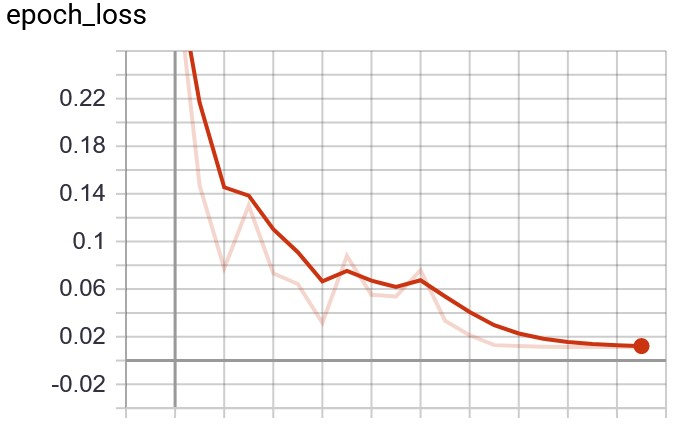

In [43]:
epoch_validation_accuracy_selectedmodel = "/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAGtAqcDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KzvEWvWnhXw/qmtag5jsNNtZby4dRkrHGhdiB9Aa/NL4b/ABJi/ax0bU/iJ8Rv2sZPgvLf3U8fh/wT4b8XWmknTLdHKI14jOHmZipOGCkjDBgrhVAP0+or86PAf7UXjHxx+xp+0ZpWoeM013xl8OFurG08b+H7gRf2hbkP9mu45YW+8fKk+dTyNpJLbidD4N/s3/Fz9oL9nHwh451D9pPx5o/i2/0aCTS4NLvWg06FFUCIXaKQ91I23MkrNuJc5DY5AP0Hor4S+Ff7dniPTP2FfHPxF8a2cOofEDwHqE3hy8RkEcd7fB4o4JGVMADM6bwuM+W5G3IAm8G/sl/Gn4i/DOx8da9+0d470X4oatax6pBp+n3gh0Kyd0DpbyWaja4GQrEYGc/K2PmAPueivhvwL+3prsP7Cvjb4m+J9Mt3+IXgm8k8Oaha7dkNxqQeKKKUouMKTPGzqpAykm3aMYr6B+yj8bvFvwntvH91+0X48tfi3f2Saxb6ZbXix6BFMyCRLV7ILsI6IW4XJJ2MBggHsf7dX7RXiT9mP4MWXi7wtZaXf6lNrdrprRavFLJCI5RIWIEciHd8gwc468GvomvzY/bw8UeO/GH/AATv8Fal8Q/D/wDwjXj1vEdlFqWnygBfOQ3CCQBSQFkCq+AeN5Hatz9p/wCC/wAYvgf8F9X+M8f7RXjO/wDHugmDUL3S1mEXh+bdMiPDFZAbFVd/G8MG2cqN2VAP0LorlvhV4wl+IXwv8H+KZ4Ftptc0ez1OSGPO2NpoEkKjPYFsfhXU0AfPH7PH7RHiP4tfHz49+CNYstLttJ8A6jY2mmTWMUiTzJMLguZy0jKxHkrjaq9T14x9D18Lfsl69aeFf2pf22db1B2jsNN1HTby4ZRkiOOO/diB34U1j/AnwF8U/wBujwjdfF3xZ8YvGnw20TWLm4j8M+GfAmo/YIrW2ilaIPcMBmZi6OPmAJ25DAMFUA/QGivkb9j/AOMnj60+JHxP+BXxM1NfFni/wGIbrTvECxiGTVtPlUNGZQOBIA8OTkn94QSShZvnT4B6trH7YVl4h1nxr+1H4o+GXxRk1S4s7LwNomrrpMGmbGxGjWTFXuQDwcENxtZi2TQB+olFfKUXj749/CT9iPxn4g8e6bY6n8VvDdpcm1uLMpOl3Cu3ZdukY25RWdmXAyIckDca+evhj4N8XfGb4Q6b46+Gv7W/iXxF8b5bNNWm8LT67B/Zq3BG6SzfTWwIgp3IGcbDtyECkYAP0yornPhzeeJb7wD4euPGVjbaZ4sksYTqtpZyCSCO62DzRGwJ+Xdkjk4BAyetdHQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBieN/DMfjbwXr/h2aZreLV9PuLB5lGSiyxtGWA7kBs1+Yn7P/AIl+Bv7MPhGb4X/tO/CfQdE8baDc3CWviLU/BqalHr1s0rPHJHcLA7SEbigJ42qgzncq/qtRQB8I+LNY8I+LP2Evjt4i8F/BtfhHol9pdxHaOdIttNk1q2SP93dNFEoYLl5AocHg5Uncccv+zh/wUO+GvwU/ZU8D6B4ssfEWm+L9M0WKGx0NtJnLawuP3UtrMF8oxvxyzLg7hg45+v8A9q3wPrfxK/Zv+Ivhbw3Zf2jruraPPa2Vp5qRebKwwq73ZVX6sQKP2UvA+t/DX9m/4deFvEll/Z2u6To8Fre2nmpL5UqjDLvRmVvqpIoA+OPhh+x7488ff8E9vidoOuWJ0bx98QtZm8XW2lXX7loJBJBJFBIGxsaTyG4bG3zV3YKnHa+Bf+CmPgfwb8KtN0DxrofiTSvjBpFnFps/gX+xrgXd5eIioPJbZsVJGGRuIYAnhsDd900UAfnR4H/Yz8feKP8Agnr8TPDeuWa6b8SPH2rS+L10mUiMwTebBLHbPk4R3EB4YjYZgGwVOOu8H/8ABS/wX4b+FGneH9a8P+JrX40adYxaa3gD+xLk3lxfJGEUIQm0Rs4B5YOFP3ScA/dNFAH5y/t+ax4+8RfsAeCdU+J2mabovja98SWE9/pukxukNru+0GOPDySNvEezd8xw24DpX0T/AMFGv+TJ/in/ANeEP/pVDX0jRQB5r+zL/wAm3/Cj/sU9J/8ASOKvSq8J+L37DvwS+PHjOXxZ458Ff25r8sMdu95/at9b5RBhBsimReB3xmsDwn/wTh/Z28D+KtG8SaJ8PPsWtaPew6hY3P8AbeoyeTPFIskb7XuCrYZQcMCDjkEUAeR/steGYfGn7S37cXh65laG31a9sLCSRBlkWWG/Qke4DVzv7MP7VWhfsS/DX/hSvx5tdS8Ga94VuLpNL1CPTbi6s9btZJnmSS3kiRsndIy8gDG3J3blX9E6KAPiD9kfw343+Jnxi+NX7Rdx4em8JjxdZxaZ4Q0vXomjeW3hiVY7i4jB3KrmGA8HndJtO3ax8o8SfHz9n34iaHqWm/tZfCy38H/GS0kkhvrez8P3Uc9/tYiFrW6hLOylNgBkl2k8glSDX6bUUAfCH7J8vx5+G/7Bevajpmg3WseL7PUZ7rwj4f8AGIle5bR1MISF0Do4fatyY0yM/uwBtKivCPjh8Uf2XPjR8Mb42Hw61Lw7+0ZJbMtloPh3w/dWOqW+tHoXMSiOVRLyS5ZyucAPgD9ZqKAPNv2bbHxlpvwF8B2vxBlmn8ZxaRAuqPcSeZN5u3pI38UgGAxycsCcnrXpNFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZ2r2OoXnlfYdT/s7bnf8AuFl39MdemOfzrjfGF34l8Nf2IIteSY6hqkFg2+xQbFfOWGD14/WvQ64T4q/e8Hf9jFZ/+z0AbX9i69/0Mn/kjH/jR/Yuvf8AQyf+SMf+NdDRQBz39i69/wBDJ/5Ix/40f2Lr3/Qyf+SMf+NdDRQBz39i69/0Mn/kjH/jXI/FPXPEvw/8ITaxb63HdyxyxxiOWyQKdxxng16fXlv7Sf8AySy7/wCviH/0KgDetIfEV14bg1EeIFEslqtx5f2FMZKBsda8b/aA+MXjz4S/D+w8SaXf2N+ZdSFhPHdWIwgaNnVhtYd0I59RXv8A4bj87wfpcf8AesIl/OMV4H+0hof/AAkP7OXjGNV3TWDW9/H7bZF3n/vjfXmZhKpGhN03Z2b+7U+jyKnQqYylHERUoucU0+0nY9X8B3uueNPBGga+viFY/wC1LCC8MaWMZCF4wxXr2JI/Ct3+xde/6GT/AMkY/wDGvMP2MPEP9v8A7PPhxWbfNYNPZSe22Vio/wC+GSvcK6sLV9tQhU7pP8Dzcyw/1PG1sP8Ayykvuehz39i69/0Mn/kjH/jVfUNN8QWen3M6+IgzRRM4BsY8EgE+tdTVHXP+QLqH/XvJ/wCgmuk84wNHsfEOo6XaXT+IlV5olcqtimASM+tXP7F17/oZP/JGP/Grvhf/AJF3Tf8Ar3T+QrUoA57+xde/6GT/AMkY/wDGj+xde/6GT/yRj/xroaKAOe/sXXv+hk/8kY/8aP7F17/oZP8AyRj/AMa6GigDivDcXiLWtLW5l8Qqjl3XalimOGI9a1P7F17/AKGT/wAkY/8AGjwH/wAi8n/XWT/0M10NAHPf2Lr3/Qyf+SMf+NH9i69/0Mn/AJIx/wCNdDRQBz39i69/0Mn/AJIx/wCNH9i69/0Mn/kjH/jXQ0UAcVo8XiLUbrUon8QqotZ/KUrYpyMZyea1P7F17/oZP/JGP/Gjwv8A8hLXv+vw/wAhXQ0Ac9/Yuvf9DJ/5Ix/40f2Lr3/Qyf8AkjH/AI10NFAHPf2Lr3/Qyf8AkjH/AI0f2Lr3/Qyf+SMf+NdDRQBxVvF4im8QXdgfEKiKGJJAwsUySfXmtT+xde/6GT/yRj/xosf+R21P/r2iroaAOe/sXXv+hk/8kY/8aP7F17/oZP8AyRj/AMa6GigDnv7F17/oZP8AyRj/AMaP7F17/oZP/JGP/GuhooA4q4i8RQ+ILOwHiFTHNE8hY2KZBHpzWp/Yuvf9DJ/5Ix/40X3/ACO2l/8AXtLXQ0Ac9/Yuvf8AQyf+SMf+NH9i69/0Mn/kjH/jXQ0UAc9/Yuvf9DJ/5Ix/40f2Lr3/AEMn/kjH/jXQ0UAcVrEXiLTbnTY08QqwurgQsWsU4GOo5rU/sXXv+hk/8kY/8aPFP/IQ0H/r9X+RroaAOe/sXXv+hk/8kY/8aP7F17/oZP8AyRj/AMa6GigDnv7F17/oZP8AyRj/AMaP7F17/oZP/JGP/GuhooA4rxJF4i0XS3uovEKu6ui7XsUxywHr71qf2Lr3/Qyf+SMf+NHjz/kXJf8ArrH/AOhiuhoA57+xde/6GT/yRj/xo/sXXv8AoZP/ACRj/wAa6GigDnv7F17/AKGT/wAkY/8AGj+xde/6GT/yRj/xroaKAOT1ax8Q6fpd3dJ4iDPDE0gVrGPBIGfWn6bp3iC80+1uG8RBWmiWQhbGPAJAPrWt4m/5F3U/+veT/wBBNSaD/wAgPTv+vaP/ANBFAGb/AGLr3/Qyf+SMf+NH9i69/wBDJ/5Ix/410NFAHPf2Lr3/AEMn/kjH/jR/Yuvf9DJ/5Ix/410NFAHOnRdeAJ/4SP8A8kY/8azfDcPiLWtFtr2XxCqSS7sqlimBhiPX2rs2+6fpWB4B/wCRTsP+B/8AoxqAE/sXXv8AoZP/ACRj/wAaP7F17/oZP/JGP/GuhooA57+xde/6GT/yRj/xo/sXXv8AoZP/ACRj/wAa6GigDnv7F17/AKGT/wAkY/8AGpPCV9e3lrfR306XM1reS24mWPy96qRgkA4zz29K3a57wf8Ae1z/ALCc39KAOhooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuE+Kv3vB3/YxWf/ALPXVavp97feV9j1JtP253bYlffnGOvTHP51518TNF1SL/hFRLrkkxfX7RUP2dF2Nlju468Aj8aAPVqK57/hH9X/AOhim/8AAdKP+Ef1f/oYpv8AwHSgDoaK57/hH9X/AOhim/8AAdKP+Ef1f/oYpv8AwHSgDoa8t/aT/wCSWXf/AF8Q/wDoVdj/AMI/q/8A0MU3/gOleb/tBaTqFn8NrqS41eS8iE8IMTRKoPzdcigD1Twn/wAito3/AF5Q/wDoAriNV8P/APCS+G/Gfh3buOoadc2oX3ZWQfjlhWx4Z0HVZPDeksuvzIrWkJCiBDgbBxWTp+h6pB4wuYhr0ys+75vITnOGrnrRUrJ7PT7zvwtSVPmlHdWf3O54b/wTn8QfaPBXi7Q2bmy1CK7CnsJo9v8AOD9a+vK+E/2X9Pu/B/7UHxB8HRai9grfalR1jB83ypwY/lPTKOxr7L/4R/V/+him/wDAdK8zJpP6nGEt4tr7mfR8Wwis2nWh8NRRkvnFfrc6GqOuf8gXUP8Ar3k/9BNZn/CP6v8A9DFN/wCA6VS1rQNWGj35PiGYjyJOPs6f3TXtnxpteF/+Rd03/r3T+QrUri/DOgas3h/TiPEEyjyE4+zp6Vp/8I/q/wD0MU3/AIDpQB0NFc9/wj+r/wDQxTf+A6Uf8I/q/wD0MU3/AIDpQB0NFc9/wj+r/wDQxTf+A6Uf8I/q/wD0MU3/AIDpQAeA/wDkXk/66yf+hmuhrz/wPoOqtoCFfEEyjzZOPIT++a3/APhH9X/6GKb/AMB0oA6Giue/4R/V/wDoYpv/AAHSj/hH9X/6GKb/AMB0oA6Giue/4R/V/wDoYpv/AAHSj/hH9X/6GKb/AMB0oAPC/wDyEte/6/D/ACFdDXn/AIZ0HVW1DXceIJlxdnP7hOeBW/8A8I/q/wD0MU3/AIDpQB0NFc9/wj+r/wDQxTf+A6Uf8I/q/wD0MU3/AIDpQB0NFc9/wj+r/wDQxTf+A6Uf8I/q/wD0MU3/AIDpQAWP/I7an/17RV0Nef2Og6r/AMJnqQ/4SCYN9nj+byE5rf8A+Ef1f/oYpv8AwHSgDoaK57/hH9X/AOhim/8AAdKP+Ef1f/oYpv8AwHSgDoaK57/hH9X/AOhim/8AAdKP+Ef1f/oYpv8AwHSgAvv+R20v/r2lroa8/vtB1X/hMtMH9vzE/Z5cN5CcVv8A/CP6v/0MU3/gOlAHQ0Vz3/CP6v8A9DFN/wCA6Uf8I/q//QxTf+A6UAdDRXPf8I/q/wD0MU3/AIDpR/wj+r/9DFN/4DpQAeKf+QhoP/X6v8jXQ15/4m0HVVvtDz4gmbN4AP3CccGt/wD4R/V/+him/wDAdKAOhornv+Ef1f8A6GKb/wAB0o/4R/V/+him/wDAdKAOhornv+Ef1f8A6GKb/wAB0o/4R/V/+him/wDAdKADx5/yLkv/AF1j/wDQxXQ15/440HVV8PylvEEzDzI+PIT++K3/APhH9X/6GKb/AMB0oA6Giue/4R/V/wDoYpv/AAHSj/hH9X/6GKb/AMB0oA6Giue/4R/V/wDoYpv/AAHSj/hH9X/6GKb/AMB0oAveJv8AkXdT/wCveT/0E1JoP/ID07/r2j/9BFc34k0DVl8P6iT4gmYfZ34+zpz8pqTQ9A1ZtF08jxDMB9nj4+zp/dFAHX0Vz3/CP6v/ANDFN/4DpR/wj+r/APQxTf8AgOlAHQ0Vz3/CP6v/ANDFN/4DpR/wj+r/APQxTf8AgOlAHQN90/SsDwD/AMinYf8AA/8A0Y1Nbw/q+0/8VDN0/wCfdKwvAug6q3hWxK+IJkHz/L5Cf32oA7+iue/4R/V/+him/wDAdKP+Ef1f/oYpv/AdKAOhornv+Ef1f/oYpv8AwHSj/hH9X/6GKb/wHSgDoa57wf8Ae1z/ALCc39KP+Ef1f/oYpv8AwHSq/gGCW1ttYimuGupV1KfdMyhS3I7CgDqaKKKACiiigAooooAKKKKACiivB/2rviJ4h8OWHgrwb4Q1H+xvEvjfW4tJi1QIHeyt+DPMinqwBUD03E5BwaaV3YD3iivkzxjpfiX9k/xj8PtctviD4q8Y+ENe1qDw/ren+K777c0bzhvLuYXKgxhSpJUcHgd6+s6bVgCivmrS/gn8Sfi1rXibXfiD478W+BB/aE1voWg+EdYS2ggs1x5U0rR7vNd+SQ3TByMEKvPfC/4nfFvxX8A/iTpfhue38aePPC/iC48N6Vr0vlQpexo8Y+0NvIjLojs3Ug4TO7JLPl8wPraivjj42fDnxd+zj8Jbr4kab8Z/F+qeJtFMEt1a6/f/AGjS9RZ5UR4hbEYjB3nbtJIxjOfmH1v4e1OTWtA0zUJbdrOW7torh7d87oi6BihyByM46dqTVlcDQrhPir97wd/2MVn/AOz13dcJ8VfveDv+xis//Z6kDu6KKKACiiigAry39pP/AJJZd/8AXxD/AOhV6lXlv7Sf/JLLv/r4h/8AQqAO98J/8ito3/XlD/6AKyLz/R/G0L9PM2/qu2tfwn/yK2jf9eUP/oArI8TfuPEGnT9Pu/o3/wBesauyfmdeG1k490z5P8X/APFvv+Cg+jX3+qt9aaDC9A3nwG2/WRc/Wvtyvif9ve3k8LfET4ceM4FJmh3JuXqDbzJKg/ORvyNfalvcR3VvFPEweKRQ6MOhBGQa8jL/AN3iMTR7S5v/AAJXPq8+/f4DL8Z3puH/AIA7fqSVR1z/AJAuof8AXvJ/6CavVR1z/kC6h/17yf8AoJr3T4kh8L/8i7pv/Xun8hWpWX4X/wCRd03/AK90/kK1KACiiigAooooA57wH/yLyf8AXWT/ANDNdDXPeA/+ReT/AK6yf+hmuhoAKKKKACiiigDnvC//ACEte/6/D/IV0Nc94X/5CWvf9fh/kK6GgAooooAKKKKAOesf+R21P/r2iroa56x/5HbU/wDr2iroaACiiigAooooA56+/wCR20v/AK9pa6Guevv+R20v/r2lroaACiiigAooooA57xT/AMhDQf8Ar9X+Rroa57xT/wAhDQf+v1f5GuhoAKKKKACiiigDnvHn/IuS/wDXWP8A9DFdDXPePP8AkXJf+usf/oYroaACiiigAooooAzPE3/Iu6n/ANe8n/oJqTQf+QHp3/XtH/6CKj8Tf8i7qf8A17yf+gmpNB/5Aenf9e0f/oIoAv0UUUAFFFFACN90/SsDwD/yKdh/wP8A9GNW+33T9KwPAP8AyKdh/wAD/wDRjUAdBRRRQAUUUUAFc94P+9rn/YTm/pXQ1z3g/wC9rn/YTm/pQB0NFFFABRRRQAUUUUAFFFFABXzF+2F5fh74gfAfxnfyfZ9E0bxT9mvbluEgFwqhZHP8KgxnJPHNfTtZPirwno/jjw/eaHr+m2+raReJsns7pA8bjORx6ggEEcggEc1UXZ3A+df23prfxVb/AAo8DWUyz65rnjGxuIbeNgXFrEJDNPj+4oZcn6+lfUFeYfDX9mX4ZfCHWX1fwp4Ut9O1Ro/JW8luJrqWNMYKxtM7mMY4wuOK6iH4a+G4PiNP48TTtviubTf7Jk1Dz5ebXzBJ5fl7tn3lB3bd3HXFDatYDwrx98TPFv7Qfi7Wfhr8KLhtH0HTpTZeJvHhzi2bP7y1swPvzYyC38OeCPlY+naTpfgX9k34KsiuNI8KaBbmWe4l+eaeRiMuxA+eWRyAAOpIAAAAHDSf8E/fgJLIzv4ELuxyzNrOoEknuf8ASK6K3/Y9+EVp4Bu/BUPhNo/DF3fJqU9iNUvP3lwqbFcv52/hf4d23vjPNVeOwHnfhb4f+KP2sPEWj+OviXYyeHvh7p8q3vh7wM7Ze8bql3f9jkH5Y/Q4IwW8z6pr53/4d8/AH/oQv/KxqH/x+vftL0220bTbTT7OPybS1hSCGPcW2oqhVGSSTgAdeaUmnsBBq+m3WoeV9m1GWw2Z3eWgbfnGM59MfrXnXxM0PUYP+EVD63PMz6/aKhaJfkOWO4evQj8a9WrhPir97wd/2MVn/wCz1AG1/wAI/q//AEMU3/gOlH/CP6v/ANDFN/4DpXQ0UAc9/wAI/q//AEMU3/gOlH/CP6v/ANDFN/4DpXQ0UAc9/wAI/q//AEMU3/gOleb/ALQWk6hZ/Da6kuNXkvIhPCDE0SqD83XIr2mvLf2k/wDkll3/ANfEP/oVAG94Z0HVZPDeksuvzIrWkJCiBDgbBxWX418P6rGtnKdemcgsM+Qgx0Ndn4T/AORW0b/ryh/9AFU/G0e7S4n7rKP1BrKr8DOnDO1WJ82/t1eDb66+DdjrE2pSX40/UYnKtEq7UkVkJyP9opXqvwFuNS8ZfBvwfqsXiGYCXToomHkKcPGPLcZP+0jV0HxO8Hj4k/BfXNA2eZNfaYywj/puqhoj+EirXh//AAT18aHVPh3rnhmZyZ9HvRNGrdoZgTgD2dJCf94V41/Y5mn0qR/GP/APr7fW+HJRXxYepf8A7dnp/wClH0b/AMI/q/8A0MU3/gOlUta0DVho9+T4hmI8iTj7On90111Udc/5Auof9e8n/oJr3j4c5nwzoGrN4f04jxBMo8hOPs6elaf/AAj+r/8AQxTf+A6Vd8L/APIu6b/17p/IVqUAc9/wj+r/APQxTf8AgOlH/CP6v/0MU3/gOldDRQBz3/CP6v8A9DFN/wCA6Uf8I/q//QxTf+A6V0NFAHn/AIH0HVW0BCviCZR5snHkJ/fNb/8Awj+r/wDQxTf+A6UeA/8AkXk/66yf+hmuhoA57/hH9X/6GKb/AMB0o/4R/V/+him/8B0roaKAOe/4R/V/+him/wDAdKP+Ef1f/oYpv/AdK6GigDz/AMM6DqrahruPEEy4uzn9wnPArf8A+Ef1f/oYpv8AwHSjwv8A8hLXv+vw/wAhXQ0Ac9/wj+r/APQxTf8AgOlH/CP6v/0MU3/gOldDRQBz3/CP6v8A9DFN/wCA6Uf8I/q//QxTf+A6V0NFAHn9joOq/wDCZ6kP+EgmDfZ4/m8hOa3/APhH9X/6GKb/AMB0osf+R21P/r2iroaAOe/4R/V/+him/wDAdKP+Ef1f/oYpv/AdK6GigDnv+Ef1f/oYpv8AwHSj/hH9X/6GKb/wHSuhooA8/vtB1X/hMtMH9vzE/Z5cN5CcVv8A/CP6v/0MU3/gOlF9/wAjtpf/AF7S10NAHPf8I/q//QxTf+A6Uf8ACP6v/wBDFN/4DpXQ0UAc9/wj+r/9DFN/4DpR/wAI/q//AEMU3/gOldDRQB5/4m0HVVvtDz4gmbN4AP3CccGt/wD4R/V/+him/wDAdKPFP/IQ0H/r9X+RroaAOe/4R/V/+him/wDAdKP+Ef1f/oYpv/AdK6GigDnv+Ef1f/oYpv8AwHSj/hH9X/6GKb/wHSuhooA8/wDHGg6qvh+Ut4gmYeZHx5Cf3xW//wAI/q//AEMU3/gOlHjz/kXJf+usf/oYroaAOe/4R/V/+him/wDAdKP+Ef1f/oYpv/AdK6GigDnv+Ef1f/oYpv8AwHSj/hH9X/6GKb/wHSuhooA4zxJoGrL4f1EnxBMw+zvx9nTn5TUmh6BqzaLp5HiGYD7PHx9nT+6K3PE3/Iu6n/17yf8AoJqTQf8AkB6d/wBe0f8A6CKAM3/hH9X/AOhim/8AAdKP+Ef1f/oYpv8AwHSuhooA57/hH9X/AOhim/8AAdKP+Ef1f/oYpv8AwHSuhooA51vD+r7T/wAVDN0/590rC8C6DqreFbEr4gmQfP8AL5Cf32rvm+6fpWB4B/5FOw/4H/6MagBP+Ef1f/oYpv8AwHSj/hH9X/6GKb/wHSuhooA57/hH9X/6GKb/AMB0o/4R/V/+him/8B0roaKAOe/4R/V/+him/wDAdKr+AYJbW21iKa4a6lXUp90zKFLcjsK6mue8H/e1z/sJzf0oA6GiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK4T4q/e8Hf9jFZ/+z11Wr6XPqXleTqE9hsznycfNnHXPpj9a86+Jnh+7t/+EVDa1eSmTX7RFL4+Q5Y7h78frQB6tRXPf8Izf/8AQwXn/fK0f8Izf/8AQwXn/fK0AdDRXPf8Izf/APQwXn/fK0f8Izf/APQwXn/fK0AdDXlv7Sf/ACSy7/6+If8A0Kux/wCEZv8A/oYLz/vla83/AGgtFu7H4bXUsurXF2gnhHlSAYPzdaAPVPCf/IraN/15Q/8AoApviuPzNDnPdSrf+PCsLwz4dvpPDeksuu3aBrSEhQq4HyDiptY8L38mlXY/t68b92xwVXnAzUy1i0aU3acX5mz4Xk8zQ7Y9wCv5Ma+M/hX/AMWV/bi8Q+G2/caZrzTRwr0QCUC5hx9CPLH1NfUfg/QL6bSmA168XbKRgBfQH+tfLP7b/hfUPAPjTwN8QbS8murqOQQNOwClJIXEsXI9d0n/AHzXg5neFCnilvTafy2Z9xw5arjMRlstq8JRX+Je9F/LU+5Ko65/yBdQ/wCveT/0E1z+i2M3iDRrDVLPxHeSWd9bx3ML7V+ZHUMp/IijWvDd+uj35Ov3h/cScbV/umvfTTV0fCyi4txe6Nrwv/yLum/9e6fyFalcX4Z8N37eH9OI168UGBONq+laf/CM3/8A0MF5/wB8rTJOhornv+EZv/8AoYLz/vlaP+EZv/8AoYLz/vlaAOhornv+EZv/APoYLz/vlaP+EZv/APoYLz/vlaADwH/yLyf9dZP/AEM10Nef+B/Dl8+gIRr14o82TgKv981v/wDCM3//AEMF5/3ytAHQ0Vz3/CM3/wD0MF5/3ytH/CM3/wD0MF5/3ytAHQ0Vz3/CM3//AEMF5/3ytH/CM3//AEMF5/3ytAB4X/5CWvf9fh/kK6GvP/DPhy+bUNdxr14uLsg/KvPArf8A+EZv/wDoYLz/AL5WgDoaK57/AIRm/wD+hgvP++Vo/wCEZv8A/oYLz/vlaAOhornv+EZv/wDoYLz/AL5Wj/hGb/8A6GC8/wC+VoALH/kdtT/69oq6GvP7Hw5ff8JnqS/29eAi3j+batb/APwjN/8A9DBef98rQB0NFc9/wjN//wBDBef98rR/wjN//wBDBef98rQB0NFc9/wjN/8A9DBef98rR/wjN/8A9DBef98rQAX3/I7aX/17S10Nef33hy+/4TPTF/t68JNvL821eK3/APhGb/8A6GC8/wC+VoA6Giue/wCEZv8A/oYLz/vlaP8AhGb/AP6GC8/75WgDoaK57/hGb/8A6GC8/wC+Vo/4Rm//AOhgvP8AvlaADxT/AMhDQf8Ar9X+Rroa8/8AE3hy+W+0POvXhzeKPurxwa3/APhGb/8A6GC8/wC+VoA6Giue/wCEZv8A/oYLz/vlaP8AhGb/AP6GC8/75WgDoaK57/hGb/8A6GC8/wC+Vo/4Rm//AOhgvP8AvlaADx5/yLkv/XWP/wBDFdDXn/jjw5fJ4flJ168YeZHwVX++K3/+EZv/APoYLz/vlaAOhornv+EZv/8AoYLz/vlaP+EZv/8AoYLz/vlaAOhornv+EZv/APoYLz/vlaP+EZv/APoYLz/vlaAL3ib/AJF3U/8Ar3k/9BNSaD/yA9O/69o//QRXN+JPDd+vh/USdevCBbvxtX+6ak0Pw3ftounka/eAG3j42r/dFAHX0Vz3/CM3/wD0MF5/3ytH/CM3/wD0MF5/3ytAHQ0Vz3/CM3//AEMF5/3ytH/CM3//AEMF5/3ytAHQN90/SsDwD/yKdh/wP/0Y1Nbwzf7T/wAT+86f3VrC8C+HL5/CtiRr14o+fgKv99qAO/ornv8AhGb/AP6GC8/75Wj/AIRm/wD+hgvP++VoA6Giue/4Rm//AOhgvP8AvlaP+EZv/wDoYLz/AL5WgDoa57wf97XP+wnN/Sj/AIRm/wD+hgvP++Vqv4Bt3tLbWIpJ3uXXUp8yydW5HWgDqaKKKACiiigAooooAKKKKACiivnP9sTxFql0fhx8ONK1O50Y+OtfSwv76ykMc62MeGnVGH3Wbcgz6ZGCCaaV3YD6Mor44+KXwt8P/sgeJvhv42+HaXWgaZeeILbQdf0sX00tvfW06sPOdZHbMibCQR3IPavsem11QBRXxN+343xZ1X4YeOLjzdP8L/DbRzaqI4JjNfa6ZJ4Y8ORxDErSE7epKc5DfL738bL7xZpv7Mmu3PgdLh/FEeixmz+yLumHCCRox13iMuVxzkDGTiny7AevUV+b3iLS/hb4d+GXgzxF8FfEN1ffHS4uLNreOx1Ga61LUJ2Km5jvrcuQiY3ltyhflx0Jr9IaJRsAVwnxV+94O/7GKz/9nru64T4q/e8Hf9jFZ/8As9QB3dFFFABRRRQAV5b+0n/ySy7/AOviH/0KvUq8t/aT/wCSWXf/AF8Q/wDoVAHe+E/+RW0b/ryh/wDQBWjcR+dbyR/3lK/mKzvCf/IraN/15Q/+gCtWgZy3gWTMF3H/AHWVvzB/wrz79sLwT/wm3wD8QhI991pQXVYeOnlZMh/79GT8677wn+41jUIOmM/o2P610t/YwanY3FncxiW2uI2hljboysCCD9QTXFKkq+HlSfVNHr08VLBY+niofZal91jw79inxt/wmHwF0mCSTfdaLLJpkuTztUho/wABG6D/AICa9q1z/kC6h/17yf8AoJr4z/Ylvp/h18ZPH/w2vpDlWdot/G6S3kKEj/eR930SvszXP+QLqH/XvJ/6Ca5sqqurhIc28dH8tD0eJsLHC5rV9n8M/fXpLX87oh8L/wDIu6b/ANe6fyFalZfhf/kXdN/690/kK1K9Y+WCiiigAooooA57wH/yLyf9dZP/AEM10Nc94D/5F5P+usn/AKGa6GgAooooAKKKKAOe8L/8hLXv+vw/yFdDXPeF/wDkJa9/1+H+QroaACiiigAooooA56x/5HbU/wDr2iroa56x/wCR21P/AK9oq6GgAooooAKKKKAOevv+R20v/r2lroa56+/5HbS/+vaWuhoAKKKKACiiigDnvFP/ACENB/6/V/ka6Gue8U/8hDQf+v1f5GuhoAKKKKACiiigDnvHn/IuS/8AXWP/ANDFdDXPePP+Rcl/66x/+hiuhoAKKKKACiiigDM8Tf8AIu6n/wBe8n/oJqTQf+QHp3/XtH/6CKj8Tf8AIu6n/wBe8n/oJqTQf+QHp3/XtH/6CKAL9FFFABRRRQAjfdP0rA8A/wDIp2H/AAP/ANGNW+33T9KwPAP/ACKdh/wP/wBGNQB0FFFFABRRRQAVz3g/72uf9hOb+ldDXPeD/va5/wBhOb+lAHQ0UUUAFFFFABRRRQAUUUUAFfM37ZkP/CMa18IfiRcxSyaL4S8So2qyRKW+z2s4VGnYAZwpRR9WA719M1Dd2kF/ay21zDHcW8ylJIZkDI6kYIIPBBHY007O4Hyb+07468M/HbWPhT8OvBmt6f4n1HUPE9pq922k3K3KWthArtLK7ISFOGGATzg+1fUieKNGk8Rv4eXV7Ftfjtvtj6Utyhulg3BfNMWdwTcQN2MZIGaoeFfhv4S8CSXEnhrwtovh57j/AFzaVp8NqZf94xqM/jV9PC+jR+I38QrpFiuvyW32N9VW2QXTQbg3lGXG4puAO3OMgHFNtbAeF/8ABQb/AJND8e/9uH/pwtqq/thTeI4P2Rb6Tw493GVt7L+0WsCROLHKeftI5xt+9j+HdnjNfQPiDw3pPi7R7jSdc0uy1rSrjb51jqFuk8Em1gy7kcFThlUjI4IB7VejhjihWJI1SJV2rGoAUKBjAHpTUrWA+GPj9N+zxB+zrFL8O5fDsXihFt/+EXbw0yDWRd7l2Z2Hz89d/mc5PPz7a+0PBJ1ZvBugnX8f279gt/7QwBj7R5a+b04+/u6cVm6P8JfA3h7XDrOleDPD2mawSW/tCz0qCK4yep8xUDc59a6yhyurAZ2r6TJqnlbL+6sfLzn7MwXdnHXjtj9a86+Jnhua3/4RUHWNQl8zX7RAZJAdnLHcOOvH616tXCfFX73g7/sYrP8A9nqANr/hFLj/AKDupf8Af0f4Uf8ACKXH/Qd1L/v6P8K6GigDnv8AhFLj/oO6l/39H+FH/CKXH/Qd1L/v6P8ACuhooA57/hFLj/oO6l/39H+Feb/tBaDLp/w2upn1W9u1E8I8uZwVPzfSvaa8t/aT/wCSWXf/AF8Q/wDoVAG94Z8LzyeG9Jca3qKBrSE7VkGB8g4HFaf/AAilx/0HdS/7+j/CrnhP/kVtG/68of8A0AVq0Aea6f4Znh8YXMX9t6gpfd8wkGTnDeldT/wilx/0HdS/7+j/AAqpd/6P42hfp5m39V211lY0+q8zrxGvK+6R8HfHfS5Pgr+1p4V8Ui+uY7HV/Jkub3cA6g/6PPz6iMq3/Aq+w9a8K3C6Pfn+3dSOIJODIP7p9q8M/wCCgXgn+3fhNp/iCKPdcaFfKXbH3YJsI3/j4hr1T4O+Nv8AhYXwC0PXGk824m0oxXLZ5M0amOQn6sjH8a8fB/uMbXw/SVpr56P8T6zNv9tyfBY5bwvSl8tY/gbPhnwrO3h/Tj/bmpDMCcCQen0rT/4RS4/6Dupf9/R/hV3wv/yLum/9e6fyFale8fEHPf8ACKXH/Qd1L/v6P8KP+EUuP+g7qX/f0f4V0NFAHPf8Ipcf9B3Uv+/o/wAKP+EUuP8AoO6l/wB/R/hXQ0UAef8AgfwvO+gIRrmor+9k4Eg/vn2rf/4RS4/6Dupf9/R/hR4D/wCReT/rrJ/6Ga6GgDnv+EUuP+g7qX/f0f4Uf8Ipcf8AQd1L/v6P8K6GigDnv+EUuP8AoO6l/wB/R/hR/wAIpcf9B3Uv+/o/wroaKAPP/DPhedtQ10f25qIxdkcSDnge1b//AAilx/0HdS/7+j/Cjwv/AMhLXv8Ar8P8hXQ0Ac9/wilx/wBB3Uv+/o/wo/4RS4/6Dupf9/R/hXQ0UAc9/wAIpcf9B3Uv+/o/wo/4RS4/6Dupf9/R/hXQ0UAef2Phef8A4TPUl/tzUci3jO7zBn+Vb/8Awilx/wBB3Uv+/o/wosf+R21P/r2iroaAOe/4RS4/6Dupf9/R/hR/wilx/wBB3Uv+/o/wroaKAOe/4RS4/wCg7qX/AH9H+FH/AAilx/0HdS/7+j/CuhooA8/vvC848ZaYv9uaiSbeX5vMGf5Vv/8ACKXH/Qd1L/v6P8KL7/kdtL/69pa6GgDnv+EUuP8AoO6l/wB/R/hR/wAIpcf9B3Uv+/o/wroaKAOe/wCEUuP+g7qX/f0f4Uf8Ipcf9B3Uv+/o/wAK6GigDz/xN4XnW+0Mf25qJzeAcyDjg+1b/wDwilx/0HdS/wC/o/wo8U/8hDQf+v1f5GuhoA57/hFLj/oO6l/39H+FH/CKXH/Qd1L/AL+j/CuhooA57/hFLj/oO6l/39H+FH/CKXH/AEHdS/7+j/CuhooA8/8AHHheePw/KTrmot+8j4Mg/vj2rf8A+EUuP+g7qX/f0f4UePP+Rcl/66x/+hiuhoA57/hFLj/oO6l/39H+FH/CKXH/AEHdS/7+j/CuhooA57/hFLj/AKDupf8Af0f4Uf8ACKXH/Qd1L/v6P8K6GigDjPEnhW4Xw/qJ/tzUji3fgyD+6fapND8Kztounn+3dSGbePgSD+6PatzxN/yLup/9e8n/AKCak0H/AJAenf8AXtH/AOgigDN/4RS4/wCg7qX/AH9H+FH/AAilx/0HdS/7+j/CuhooA57/AIRS4/6Dupf9/R/hR/wilx/0HdS/7+j/AAroaKAOdbwpcbT/AMT3Uun/AD0H+FYXgXwvO/hWxYa5qK/f4Egx99vau+b7p+lYHgH/AJFOw/4H/wCjGoAT/hFLj/oO6l/39H+FH/CKXH/Qd1L/AL+j/CuhooA57/hFLj/oO6l/39H+FH/CKXH/AEHdS/7+j/CuhooA57/hFLj/AKDupf8Af0f4VX8A2rWdtrELTyXLLqU+ZZTlm5HWuprnvB/3tc/7Cc39KAOhooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuE+Kv3vB3/YxWf/s9dVq+jnVvKxf3ll5ef+PSXZuzjrxzjH6mvOviZ4XNv/wioOr6pL5uv2iZkuMlOWO5eODx19zQB6tRXPf8If8A9RvWP/Av/wCtR/wh/wD1G9Y/8C//AK1AHQ0Vz3/CH/8AUb1j/wAC/wD61H/CH/8AUb1j/wAC/wD61AHQ15b+0n/ySy7/AOviH/0Kux/4Q/8A6jesf+Bf/wBavN/2gvDv9m/Da6n/ALT1G6xPCPLubjenLemKAPVPCf8AyK2jf9eUP/oArVri/DPhPzfDekv/AGzq6brSE7VusAZQcDjpWn/wh/8A1G9Y/wDAv/61AFTxN+48QadP0+7+jf8A166yvN/GvhEwrZyDWNWY5YZa6z6H0rpY/CQkjVxresYYA/8AH3/9asYfHJHXV1pU36jPib4PTx98PfEXh1wpOpWMsEZboshU7G/Btp/Cvl39g/xhJN8PPHHhC7LJc6XI13HHJwwSRCrqB/svHk+719T/APCH/wDUb1j/AMC//rV8Rx6T/wAKd/bI1rRDeXdppfiCKZUnjl2u4uI/NQZxz+/XZ+Brx8d+4xVDE9L8r+e34n1mS/7ZluNy978qqR9Yb/NrQ+6fC/8AyLum/wDXun8hWpXGeGfCO7w/px/trWBmBOBdcdPpWl/wh/8A1G9Y/wDAv/61e8fEHQ0Vz3/CH/8AUb1j/wAC/wD61H/CH/8AUb1j/wAC/wD61AHQ0Vz3/CH/APUb1j/wL/8ArUf8If8A9RvWP/Av/wCtQAeA/wDkXk/66yf+hmuhrz/wP4R8zQEP9tauv72ThbrA+8fat/8A4Q//AKjesf8AgX/9agDoaK57/hD/APqN6x/4F/8A1qP+EP8A+o3rH/gX/wDWoA6Giue/4Q//AKjesf8AgX/9aj/hD/8AqN6x/wCBf/1qADwv/wAhLXv+vw/yFdDXn/hnwju1DXR/bWrjF2RxddeB7Vv/APCH/wDUb1j/AMC//rUAdDRXPf8ACH/9RvWP/Av/AOtR/wAIf/1G9Y/8C/8A61AHQ0Vz3/CH/wDUb1j/AMC//rUf8If/ANRvWP8AwL/+tQAWP/I7an/17RV0Nef2PhHPjPUl/trV+LeM5+1c/wAq3/8AhD/+o3rH/gX/APWoA6Giue/4Q/8A6jesf+Bf/wBaj/hD/wDqN6x/4F//AFqAOhornv8AhD/+o3rH/gX/APWo/wCEP/6jesf+Bf8A9agAvv8AkdtL/wCvaWuhrz++8JY8ZaYv9tauc28vP2rn+Vb/APwh/wD1G9Y/8C//AK1AHQ0Vz3/CH/8AUb1j/wAC/wD61H/CH/8AUb1j/wAC/wD61AHQ0Vz3/CH/APUb1j/wL/8ArUf8If8A9RvWP/Av/wCtQAeKf+QhoP8A1+r/ACNdDXn/AIm8I7b7Qx/bWrnN4o5uunB9q3/+EP8A+o3rH/gX/wDWoA6Giue/4Q//AKjesf8AgX/9aj/hD/8AqN6x/wCBf/1qAOhornv+EP8A+o3rH/gX/wDWo/4Q/wD6jesf+Bf/ANagA8ef8i5L/wBdY/8A0MV0Nef+OPCXl+HpT/bWrt+8j4a6yPvj2rf/AOEP/wCo3rH/AIF//WoA6Giue/4Q/wD6jesf+Bf/ANaj/hD/APqN6x/4F/8A1qAOhornv+EP/wCo3rH/AIF//Wo/4Q//AKjesf8AgX/9agC94m/5F3U/+veT/wBBNSaD/wAgPTv+vaP/ANBFc34k8I7fD+on+2tYOLdzg3fH3T7VLofhHdounn+2tYGbeM4F3x90e1AHXUVz3/CH/wDUb1j/AMC//rUf8If/ANRvWP8AwL/+tQB0NFc9/wAIf/1G9Y/8C/8A61H/AAh//Ub1j/wL/wDrUAdA33T9KwPAP/Ip2H/A/wD0Y1Nbwf8AKf8Aid6x0/5+/wD61YXgXwj5nhWxb+2tXXO/hbrA++3tQB39Fc9/wh//AFG9Y/8AAv8A+tR/wh//AFG9Y/8AAv8A+tQB0NFc9/wh/wD1G9Y/8C//AK1H/CH/APUb1j/wL/8ArUAdDXPeD/va5/2E5v6Uf8If/wBRvWP/AAL/APrVX8A2n2G21iDzprjZqc/7ydtznkdTQB1NFFFABRRRQAUUUUAFFFFABRRXzn+2J4i1S6Pw4+HGlanc6MfHWvpYX99ZSGOdbGPDTqjD7rNuQZ9MjBBNNK7sB9GUV8cfFL4W+H/2QPE3w38bfDtLrQNMvPEFtoOv6WL6aW3vradWHnOsjtmRNhII7kHtX2PTa6oAor4m/b8b4s6r8MPHFx5un+F/hto5tVEcExmvtdMk8MeHI4hiVpCdvUlOchvl+v8ARr630vwbY3l5PHa2lvp8c008zBUjRYwWZieAAASSfShxsrgbVFfn74u8aeIfi1+0x8EPHlwZbHwPf+IJ7PwxpsyFHlt4lTffOD085m+UEAhI19cn9AqJR5QCuE+Kv3vB3/YxWf8A7PXd1wnxV+94O/7GKz/9nqQO7ooooAKKKKACvLf2k/8Akll3/wBfEP8A6FXqVeW/tJ/8ksu/+viH/wBCoA73wn/yK2jf9eUP/oArVrK8J/8AIraN/wBeUP8A6AK1aAOe8bR7tLifuso/UGtbSZPO0u0f1iXP5VX8SWpu9GuFH3lG8fhz/LNV/CN39o0dUJ+aFih+nUfz/Ssdqnqjr+LDryZt18Yf8FBvDM+k6l4J8e2I2XNrMbGSbHRlPnQfqJq+z68z/aO+GjfFj4Q63oUDww32EurWackIkkbBuSASMruXp/FXHmWHeJws6cd916rU9bh/HRy/M6Neo/cvaX+GWjv6Xv8AI6r4davD4g8A+HdTtzmC8sIbhOezICB+tdFXwd4U+I3x3/Zu8O2FjqnhRfEHhC1j/cSLD5qxREluJoeUHJ/1oOOmOleveAf28vh74p8uHXEvPCl43B+1J59vn0EiDP4sqiuajmtCVoV3yT6qSt/wD0MZwxjYc1bBpVqV3Zwalp0ulre2+h9J0VmeH/E2keLNPW+0XVLPVrNuk9lOsqfTKk8+1ade0mpK6PkJRlCTjJWaCiiimSc94D/5F5P+usn/AKGa6Gue8B/8i8n/AF1k/wDQzXQ0AFFFFABRRRQBz3hf/kJa9/1+H+Qroa57wv8A8hLXv+vw/wAhXQ0AFFFFABRRRQBz1j/yO2p/9e0VdDXPWP8AyO2p/wDXtFXQ0AFFFFABRRRQBz19/wAjtpf/AF7S10Nc9ff8jtpf/XtLXQ0AFFFFABRRRQBz3in/AJCGg/8AX6v8jXQ1z3in/kIaD/1+r/I10NABRRRQAUUUUAc948/5FyX/AK6x/wDoYroa57x5/wAi5L/11j/9DFdDQAUUUUAFFFFAGZ4m/wCRd1P/AK95P/QTUmg/8gPTv+vaP/0EVH4m/wCRd1P/AK95P/QTUmg/8gPTv+vaP/0EUAX6KKKACiiigBG+6fpWB4B/5FOw/wCB/wDoxq32+6fpWB4B/wCRTsP+B/8AoxqAOgooooAKKKKACue8H/e1z/sJzf0roa57wf8Ae1z/ALCc39KAOhooooAKKKKACiiigAooooAK+Zv2zIf+EY1r4Q/Ei5ilk0Xwl4lRtVkiUt9ntZwqNOwAzhSij6sB3r6ZqG7tIL+1ltrmGO4t5lKSQzIGR1IwQQeCCOxpp2dwPk39p3x14Z+O2sfCn4deDNb0/wAT6jqHie01e7bSblblLWwgV2lldkJCnDDAJ5wfavqRPFGjSeI38PLq9i2vx232x9KW5Q3SwbgvmmLO4JuIG7GMkDNUPCvw38JeBJLiTw14W0Xw89x/rm0rT4bUy/7xjUZ/Gr6eF9Gj8Rv4hXSLFdfktvsb6qtsgumg3BvKMuNxTcAducZAOKba2A8L/wCCg3/Jofj3/tw/9OFtWl8fPhd4x+MXwW0Lwz4S1TS9Njna1k1SPVWmWO8tUTcbcmIbgrNs3YKkgEZGefZfEHhvSfF2j3Gk65pdlrWlXG3zrHULdJ4JNrBl3I4KnDKpGRwQD2q9FEkEaRxoscaAKqKMBQOgA7ChSskB8DfHbTvjTpfxZ+Atnqx+HcF/Bqk8WgRaPbXsdpE6xxArOrPnywoQAR4IwfavvDRv7QGj2I1Y2zap5Ef2s2YYQGbaN/lhvm2bs4zzjGar6r4V0XXdQ02/1LSLDUL7TJDLY3V1bJLLaOcAtEzAlCcDlcdBWpQ5XSAztX0VdY8rdeXdr5ef+PWXZuzjrxz0/U1518TPCsdv/wAIqv8AaWpSiXX7SM+bcE7eWORxweOvua9WrhPir97wd/2MVn/7PUgbX/CF2/8A0EdS/wDAk/4Uf8IXb/8AQR1L/wACT/hXQ0UAc9/whdv/ANBHUv8AwJP+FH/CF2//AEEdS/8AAk/4V0NFAHPf8IXb/wDQR1L/AMCT/hXm/wC0F4bi0z4bXU6Xl7MwnhG2acsvLele015b+0n/AMksu/8Ar4h/9CoA3vDPg+Cbw3pLm/1FS1pC2FuSAMoOnFaf/CF2/wD0EdS/8CT/AIVc8J/8ito3/XlD/wCgCtWgDnT4Jt2BB1DUiD/08n/CuW8O+EYbLXLuwe/1FQc7cXJGcHjt6V6XXI+Iv+JZ4htL4cK+C34cH9MVjU0tLsdeH97mp91+Rd/4Qu3/AOgjqX/gSf8ACqWteDLddHvz/aGpHEEh5uT/AHT7V1uc8jkVS1z/AJAuof8AXvJ/6Ca2OQ5nwz4Ngbw/pzf2hqQzAh4uT6fSuU8Zfsq/Dzx00kuq6VI15JybyCQRTE+pZR8x/wB7Nel+F/8AkXdN/wCvdP5CtSsqlKnWjy1IprzOnD4mvhZ+0w83GXdNr8j4x8SfsGa34VvH1T4aeN7mxulGUgvpGgl9cCeLr9CgHqav/sq/F298Y61qXgLx7qWpW3i+ykcW7yz+W04TIkiYf89EwT7rn+6SfrTVL0afp89weqL8vueg/Wvjv9qD4P31xY2/xX8ImS28R6G6PqX2cfO6R4MdyP8AaQABvVRn+E5+dxGG/s6SxGDTstZRvo15ea3PvsDmL4gg8DmzTctIVLK8ZdE2t09n/TX1d/whdv8A9BHUv/Ak/wCFH/CF2/8A0EdS/wDAk/4Vxv7Ovxwsvjl4Ch1IGODW7TbBqdmp/wBXLjh1H9x8Ej8RklTXqdfQ0asK9NVKbumfBYrC1cFXnh68bSi7Nf1+B5/4H8HQSaAhOoaiP3snS5P98+1b/wDwhdv/ANBHUv8AwJP+FHgP/kXk/wCusn/oZroa2OU57/hC7f8A6COpf+BJ/wAKP+ELt/8AoI6l/wCBJ/wroaKAOe/4Qu3/AOgjqX/gSf8ACj/hC7f/AKCOpf8AgSf8K6GigDz/AMM+DoG1DXR/aGojbdkcXJ9B7Vv/APCF2/8A0EdS/wDAk/4UeF/+Qlr3/X4f5CuhoA57/hC7f/oI6l/4En/Cj/hC7f8A6COpf+BJ/wAK6GigDnv+ELt/+gjqX/gSf8KP+ELt/wDoI6l/4En/AAroaKAPP7HwdAfGepL/AGhqOBbxnP2k5/lW/wD8IXb/APQR1L/wJP8AhRY/8jtqf/XtFXQ0Ac9/whdv/wBBHUv/AAJP+FH/AAhdv/0EdS/8CT/hXQ0UAc9/whdv/wBBHUv/AAJP+FH/AAhdv/0EdS/8CT/hXQ0UAef33g6AeMtMX+0NRwbeU5+0nP8AKt//AIQu3/6COpf+BJ/wovv+R20v/r2lroaAOe/4Qu3/AOgjqX/gSf8ACj/hC7f/AKCOpf8AgSf8K6GigDnv+ELt/wDoI6l/4En/AAo/4Qu3/wCgjqX/AIEn/CuhooA8/wDE3g6Bb7Qx/aGondeAc3J9D7Vv/wDCF2//AEEdS/8AAk/4UeKf+QhoP/X6v8jXQ0Ac9/whdv8A9BHUv/Ak/wCFH/CF2/8A0EdS/wDAk/4V0NFAHPf8IXb/APQR1L/wJP8AhR/whdv/ANBHUv8AwJP+FdDRQB5/448HQR+H5WGoaif3kfW5P98e1b//AAhdv/0EdS/8CT/hR48/5FyX/rrH/wChiuhoA57/AIQu3/6COpf+BJ/wo/4Qu3/6COpf+BJ/wroaKAOe/wCELt/+gjqX/gSf8KP+ELt/+gjqX/gSf8K6GigDjPEng23Xw/qJ/tDUji3c83J/un2qTQ/BkDaLp5/tDUhm3jPFyf7o9q3PE3/Iu6n/ANe8n/oJqTQf+QHp3/XtH/6CKAM3/hC7f/oI6l/4En/Cj/hC7f8A6COpf+BJ/wAK6GigDnv+ELt/+gjqX/gSf8KP+ELt/wDoI6l/4En/AAroaKAOdbwXb7T/AMTDUun/AD8n/CsLwL4Ngk8K2LHUNRGd/AuSB99vau+b7p+lYHgH/kU7D/gf/oxqAE/4Qu3/AOgjqX/gSf8ACj/hC7f/AKCOpf8AgSf8K6GigDnv+ELt/wDoI6l/4En/AAo/4Qu3/wCgjqX/AIEn/CuhooA57/hC7f8A6COpf+BJ/wAKr+AbNbC21iBZJJVTUpwHlbcx5B5NdTXPeD/va5/2E5v6UAdDRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcJ8VfveDv+xis/wD2euq1fQ4tZ8rzJ7mDy84+zylM5x19eledfEzwnb2v/CKhby+bzdftIyXuCSBljkeh460AerUVz3/CF2//AEEdS/8AAk/4Uf8ACF2//QR1L/wJP+FAHQ0Vz3/CF2//AEEdS/8AAk/4Uf8ACF2//QR1L/wJP+FAHQ15b+0n/wAksu/+viH/ANCrsf8AhC7f/oI6l/4En/CvN/2gvDcWmfDa6nS8vZmE8I2zTll5b0oA9U8J/wDIraN/15Q/+gCtWuL8M+D4JvDekub/AFFS1pC2FuSAMoOnFaf/AAhdv/0EdS/8CT/hQB0NYXjC0+0aSZAPmhYN+B4P8x+VR/8ACF2//QR1L/wJP+FR3HgW2uLeSJtQ1LDqVP8ApJ7/AIVMo80WjSnLkmpdjU8P3f2zR7dycsq7G+o4p+uf8gXUP+veT/0E1wvg/wALxeZd2cl/qKOh3BVuSPY9vpW1rXgy3XR78/2hqRxBIebk/wB0+1TTlzRTLrx5KjRteF/+Rd03/r3T+QrUri/DPg2BvD+nN/aGpDMCHi5Pp9K0m8GWyqSdR1IAck/aj/hWhgQeMrpp5bXT4uXdgxHueFH86raLGNK16502cCSGZSmHGQ3GRke4JH41jaH4Ph1rXbi8a+1Hyo+VP2g59F7elSeLvBMVnLa30V9qBZW2km4PBHI7fWuN6/vf6setG0bYfuvx3PlP4i+HdV/Yv+N1p4w8OQSTeB9YkKS2an5ApOZLYnsR9+Mn0xztbP294X8Tab4z8O6frmj3K3mm30SzQTJ3U9iOxByCDyCCD0rkPGHwd0L4meD7nSNUutQnsr2IEFp9xjbqrrkfeU8/pXyV8EPEGo/s+fFy8+Fnjq9urTR7mfFneRTGOJJHP7uUdvLkGAf7rdcYavIj/wAJeI5f+XNR6f3ZdvRn1dRf6yYH2n/MXQWvepBdfOUevf5q32x4D/5F5P8ArrJ/6Ga6GvP/AAP4Ogk0BCdQ1EfvZOlyf759q3/+ELt/+gjqX/gSf8K+jPz46Giue/4Qu3/6COpf+BJ/wo/4Qu3/AOgjqX/gSf8ACgDoaK57/hC7f/oI6l/4En/Cj/hC7f8A6COpf+BJ/wAKADwv/wAhLXv+vw/yFdDXn/hnwdA2oa6P7Q1Ebbsji5PoPat//hC7f/oI6l/4En/CgDoaK57/AIQu3/6COpf+BJ/wo/4Qu3/6COpf+BJ/woA6Giue/wCELt/+gjqX/gSf8KP+ELt/+gjqX/gSf8KACx/5HbU/+vaKuhrz+x8HQHxnqS/2hqOBbxnP2k5/lW//AMIXb/8AQR1L/wACT/hQB0NFc9/whdv/ANBHUv8AwJP+FH/CF2//AEEdS/8AAk/4UAdDRXPf8IXb/wDQR1L/AMCT/hR/whdv/wBBHUv/AAJP+FABff8AI7aX/wBe0tdDXn994OgHjLTF/tDUcG3lOftJz/Kt/wD4Qu3/AOgjqX/gSf8ACgDoaK57/hC7f/oI6l/4En/Cj/hC7f8A6COpf+BJ/wAKAOhornv+ELt/+gjqX/gSf8KP+ELt/wDoI6l/4En/AAoAPFP/ACENB/6/V/ka6GvP/E3g6Bb7Qx/aGondeAc3J9D7Vv8A/CF2/wD0EdS/8CT/AIUAdDRXPf8ACF2//QR1L/wJP+FH/CF2/wD0EdS/8CT/AIUAdDRXPf8ACF2//QR1L/wJP+FH/CF2/wD0EdS/8CT/AIUAHjz/AJFyX/rrH/6GK6GvP/HHg6CPw/Kw1DUT+8j63J/vj2rf/wCELt/+gjqX/gSf8KAOhornv+ELt/8AoI6l/wCBJ/wo/wCELt/+gjqX/gSf8KAOhornv+ELt/8AoI6l/wCBJ/wo/wCELt/+gjqX/gSf8KAL3ib/AJF3U/8Ar3k/9BNSaD/yA9O/69o//QRXN+JPBtuvh/UT/aGpHFu55uT/AHT7VJofgyBtF08/2hqQzbxni5P90e1AHX0Vz3/CF2//AEEdS/8AAk/4Uf8ACF2//QR1L/wJP+FAHQ0Vz3/CF2//AEEdS/8AAk/4Uf8ACF2//QR1L/wJP+FAHQN90/SsDwD/AMinYf8AA/8A0Y1NbwXb7T/xMNS6f8/J/wAKwvAvg2CTwrYsdQ1EZ38C5IH329qAO/ornv8AhC7f/oI6l/4En/Cj/hC7f/oI6l/4En/CgDoaK57/AIQu3/6COpf+BJ/wo/4Qu3/6COpf+BJ/woA6Gue8H/e1z/sJzf0o/wCELt/+gjqX/gSf8Kr+AbNbC21iBZJJVTUpwHlbcx5B5NAHU0UUUAFFFFABRRRQAUUUUAFFFFABRRXyPD4N0r9qz9pX4l2HjY3Gq+DPAgs9N03QVuZYbeS5lRnmnkCMpZwyFQemCPSqSuB9cUV8x/s3yXHwt+OnxJ+DUd/eX/hnTbe11vQI764aaSzglUCaAMxLFA7LtBPGCeSxNfRXiS81HTvDuqXekaeur6tBayy2entMIRdTKhMcRkbhNzALuPAzmk1ZgaVFfEXg23+JEP7dXg6b4latY3OqXvhq9u7fSdJ3fY9LiZnTykLcux2As/c8ZIUV9u05KwBXCfFX73g7/sYrP/2eu7rhPir97wd/2MVn/wCz1IHd0UUUAFFFFABXlv7Sf/JLLv8A6+If/Qq9Sry39pP/AJJZd/8AXxD/AOhUAd74T/5FbRv+vKH/ANAFatZXhP8A5FbRv+vKH/0AVq0AFFFFAHI3H/Ep8Yo/SO4IJ/4Fwf8Ax7mug1z/AJAuof8AXvJ/6Cax/G1qWt7e6Xho22kj0PT9R+taF5dC98L3M4/5aWjk/XYc/rWMPdlKJ11fepwn8vuHeF/+Rd03/r3T+QqPxVffYtJkUHEk37sfQ9f0/nUnhf8A5F3Tf+vdP5CsXWCdb8SQWS8xQ8N/Nv04p1HaNl1Jw8VKd3stTX8L2P2HSYsjEkv7xvx6fpirOtWX9oaZPCBliuV/3hyKugYGAMClq1FcvKZOo3Pn6nO+C77ztPe3Y/NC3H+6ef55ry79q79n+P41eCjc6dEi+K9KRpLGTgGderQMfRuq56N6AtXokP8AxI/FzJ92G4OB9G6f+PcV19ck6MMTRlQqq62PUo4url+LhjMM7SWq/VPyfU+Tf2Pv2krXUtPt/h54slfT/E1m7Q2s158v2vB/1bE8iUHIwfvY9c19ZV8qfGT9le2+LXhf/hJPDmzT/Gts8hDA7EvgrHCOf4XH8L/QHjBWt+zR+1XdXGpL8PfiW0mneJbaT7LbahejY07jjyZ89JewY/f6H5uW8zD4mpg5rCYt6fZl0fk/P+vX6PH5fQzejLNMqVmtalPrF9ZR7x/L8F9aUUUV9AfCBRRRQBz3hf8A5CWvf9fh/kK6Gue8L/8AIS17/r8P8hXQ0AFFFFABRRRQBz1j/wAjtqf/AF7RV0Nc9Y/8jtqf/XtFXQ0AFFFFABRRRQBz19/yO2l/9e0tdDXPX3/I7aX/ANe0tdDQAUUUUAFFFFAHPeKf+QhoP/X6v8jXQ1z3in/kIaD/ANfq/wAjXQ0AFFFFABRRRQBz3jz/AJFyX/rrH/6GK6Gue8ef8i5L/wBdY/8A0MV0NABRRRQAUUUUAZnib/kXdT/695P/AEE1JoP/ACA9O/69o/8A0EVH4m/5F3U/+veT/wBBNSaD/wAgPTv+vaP/ANBFAF+iiigAooooARvun6VgeAf+RTsP+B/+jGrfb7p+lYHgH/kU7D/gf/oxqAOgooooAKKKKACue8H/AHtc/wCwnN/SuhrnvB/3tc/7Cc39KAOhooooAKKKKACiiigAooooAKKKKACvlH4eeKND+Bv7WHxi0fxbqVt4ft/F32HXNHv9TmWCC6VY3WdBIxC7lkYgLnJCmvq6sPxV4F8N+O7WK18S+HtK8Q20Lb44dVsorpEb1CyKQD71SfcD53/Z/vrX4q/tUfFj4l6HIt54Ut7K08N2OpR58q9lRUknMZ6MFZVGRwQ6kZzX0h4d8VaL4w083+g6vYa3YiRojdadcpcRb14ZdyEjI7jtVjR9H0/w/psGnaXY22m6fbrthtbOFYooxnOFRQABknoO9V/DvhXRfB+nmw0HSLDRLEyNKbXTrZLeLe3LNtQAZPc96G7gfOfjL/lId4A/7Ey6/wDRs1fUFZc3hXRbjxFb6/LpFhLrtvCbaHVHtkN1FESSY1lI3BSSflBxya1KG7gZ2r6Fb615XnvMnl52+TIU646469K86+JnhGytf+EVCS3RE2v2kbbp2OBljx6HivVq4T4q/e8Hf9jFZ/8As9SBtf8ACD2H/Pa8/wDAhqP+EHsP+e15/wCBDV0NFAHPf8IPYf8APa8/8CGo/wCEHsP+e15/4ENXQ0UAc9/wg9h/z2vP/Ahq83/aC8MWml/Da6uIpLhnE8IxJMWHLele015b+0n/AMksu/8Ar4h/9CoA3vDPguxm8N6TI012C1pCxxcMBygrT/4Qew/57Xn/AIENVzwn/wAito3/AF5Q/wDoArVoA57/AIQew/57Xn/gQ1H/AAg9h/z2vP8AwIauhooA5PVvh/Y3WnXEYlvCxQlf9IbqOR+tc9o/hexuPC+pxtNd74YpCB9oboVJ/nmvTa4Sb/iU6jq9t0jlt5Qv4qWH+FYy92al8jrp+/SnDtqGj+E9OtPCdpcvNeYS2VsfaG5OOB+dVfB/gOzuBcXs013udtqnz2Ge5P54/Krl5eH/AIRfRrKPl5YY2IHpgYH4n+VdhptmNPsYbdf4FwT6nufzo+Kp6B/Do+cvyRj/APCD2H/Pa8/8CGo/4Qew/wCe15/4ENXQ0Vsch554x8A2S2sV1HLd7o22sfPboeh/P+dbGl+E9P1DT4LgT3mXXn/SG69D+tdHfWq31nNA3SRSPoex/Ouf8F3TKtzYycPG28A/kR+ePzrH4anqdf8AEoecfyZj+B/BdjJoCMZrzPmydLhv75rzn9oL9kfSPitpMuoaPK1h4tgT9zczOTHcgDiOXjPsG6j3HFey+A/+ReT/AK6yf+hmuhqcRh6eJpulVV0zTA47EZdXjicNLlkv6s+6Phr4BfHSXwz4kf4d/Fhr7StRtpPs1vqVzOyeW38Mc5zjB42ydMEZ4O6vsP8A4QfTzyJ7z/wIavO/2jP2bdH+Ouh+cnl6b4ptYyLPUtvDDr5UuOWQnv1UnI7g+Mfsx/HvWvh34tf4SfEtpLW4tpBaaddXbZML/wAMDN/FGwI8tvcDkEY8WjWq5fUWGxTvB/DL9H5/16fX4zB4bPcPPMctjy1Y61Ka/GUPLuun5/Vn/CD2H/Pa8/8AAhqP+EHsP+e15/4ENXQ0V9EfAnn/AIZ8F2L6hroM158t2QP9Ib0Fb/8Awg9h/wA9rz/wIajwv/yEte/6/D/IV0NAHPf8IPYf89rz/wACGo/4Qew/57Xn/gQ1dDVGz1aG8vrq1XiSBsdfvDufwPFK6RSi2m10Mz/hB7D/AJ7Xn/gQ1H/CD2H/AD2vP/Ahq6GimSef2PguxPjPUk868wLeM/8AHw1b/wDwg9h/z2vP/AhqLH/kdtT/AOvaKuhoA57/AIQew/57Xn/gQ1H/AAg9h/z2vP8AwIauhooA57/hB7D/AJ7Xn/gQ1H/CD2H/AD2vP/Ahq6GigDz++8FWI8Z6YvnXmDbyn/j4at//AIQew/57Xn/gQ1F9/wAjtpf/AF7S10NAHPf8IPYf89rz/wACGo/4Qew/57Xn/gQ1dDRQBz3/AAg9h/z2vP8AwIaj/hB7D/ntef8AgQ1dDRQB5/4m8FWK32hgTXnzXij/AI+G9DW//wAIPYf89rz/AMCGo8U/8hDQf+v1f5GuhoA57/hB7D/ntef+BDUf8IPYf89rz/wIauhooA57/hB7D/ntef8AgQ1H/CD2H/Pa8/8AAhq6GigDz/xx4LsY/D8rCa8z5kfW4b++K3/+EHsP+e15/wCBDUePP+Rcl/66x/8AoYroaAOe/wCEHsP+e15/4ENR/wAIPYf89rz/AMCGroaKAOe/4Qew/wCe15/4ENR/wg9h/wA9rz/wIauhooA4zxJ4JsF8P6iwmvMi3c/8fDf3TUmh+CbBtF08ma8ybeM/8fDf3RW54m/5F3U/+veT/wBBNSaD/wAgPTv+vaP/ANBFAGb/AMIPYf8APa8/8CGo/wCEHsP+e15/4ENXQ0UAc9/wg9h/z2vP/AhqP+EHsP8Antef+BDV0NFAHOt4HsNp/fXnT/n4asLwL4KsZPCtixmvMnf0uG/vtXfN90/SsDwD/wAinYf8D/8ARjUAJ/wg9h/z2vP/AAIaj/hB7D/ntef+BDV0NFAHPf8ACD2H/Pa8/wDAhqP+EHsP+e15/wCBDV0NFAHPf8IPYf8APa8/8CGqv4Bs00+21i3jLsialOAZG3HqDya6mue8H/e1z/sJzf0oA6GiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK4T4q/e8Hf9jFZ/+z11Wr6Daa55X2oSHys7fLkKdcZ6fQV518TPB2m2v/CKqizYm1+0jfdMx+XLH146CgD1aiue/wCED0j/AJ5zf9/3/wAaP+ED0j/nnN/3/f8AxoA6Giue/wCED0j/AJ5zf9/3/wAaP+ED0j/nnN/3/f8AxoA6GvLf2k/+SWXf/XxD/wChV2P/AAgekf8APOb/AL/v/jXm/wC0F4V0/SfhtdXFukglE8IG6VmHLehNAHqnhP8A5FbRv+vKH/0AVq1xfhnwRpU3hvSZGjm3NaQscTuOSg960/8AhA9I/wCec3/f9/8AGgDoaK57/hA9I/55zf8Af9/8aP8AhA9I/wCec3/f9/8AGgDoa4j4kQm1tzeoOfJdT9QCR/M/lWt/wgekf885v+/7/wCNYPjn4faXJ4U1Jkjm3xQvIP3znopz39M1nUV4s6MPLlqK4zwODrc1lckZhggQrn2AC/rzXoVeb/Dj4e6WnhHT5pI5vMniVz++YcY47/j+NdP/AMIHpH/POb/v+/8AjSpq0bvqPESTnyrZaHQ0Vz3/AAgekf8APOb/AL/v/jR/wgekf885v+/7/wCNanMdDXIah/xJfFUVx0hnOW9OeG/Xmr3/AAgekf8APOb/AL/v/jWJ4s+HmlvpnnRxzb4Wyf3zn5Twe/0/Ksqi9266HTh5JT5Xs9Db8B/8i8n/AF1k/wDQzXQ15l8MfCWlah4RglZJjIJJFb9+/UMfeus/4QPSP+ec3/f9/wDGtE7q5hKLi3F9Doa8C/au/Zvi+M/hsaro8UcXjDTYz9nfhftcYyTAx9c5Kk9CSOAxI9c/4QPSP+ec3/f9/wDGj/hA9I/55zf9/wB/8awxGHp4qk6VRXTO3A46vluIjisO7Sj/AFZ+TPn79kP9pCbxlAfAXjCWSDxdpoaKCW6ysl2icMj5585MHOeSBnqGNfUVfIP7WH7MMiw/8LD8CJPb65p2J762gYl5lTkTxnr5i45H8QGRyPm7L9mH4meHfjl4V8q8VrbxXp6AX9qs7ASr0E8Yz90nqP4Tx0Kk+TgsRUoVPqWJfvL4X/Mv80fT5xgaGNof2zlytB/HD+SX/wAi+n9Je1+F/wDkJa9/1+H+Qroa8/8ADPgfSn1DXQY5vluyB+/f0HvW/wD8IHpH/POb/v8Av/jXvHxJsajeCwsZrg/8s1JHuew/OuBtPtenrFqqjKmUqT6+ufY8/lWN8XLrwb4D0yF9Z1KPS4ny5NxdMGcDsq5yx9gCeK8x8O/tMfBPWbx9CnutU02BQI01G9jdbeZv7wIYsvPd1UV5lfE0IVFCpUUX5s+jwOXYytQdahQlOPWyb0Pqizuo762jniOUcZH+FTV5N4L03w9eShLa7TUdPnP7i7tLwyRMexDKxBBruP8AhA9I/wCec3/f9/8AGu+nNVI3R4lei6M3FhY/8jtqf/XtFXQ15/Y+B9KPjPUk8ubaLeM/69/8a3/+ED0j/nnN/wB/3/xrQ5zoaK57/hA9I/55zf8Af9/8aP8AhA9I/wCec3/f9/8AGgDoaK57/hA9I/55zf8Af9/8aP8AhA9I/wCec3/f9/8AGgAvv+R20v8A69pa6GvKNS0rQ0+ImlWiJK0RhkR5PPfhuwHPrXbf8IHpH/POb/v+/wDjUqSlsXKEoW5ludDRXPf8IHpH/POb/v8Av/jR/wAIHpH/ADzm/wC/7/41RB0NFc9/wgekf885v+/7/wCNH/CB6R/zzm/7/v8A40AHin/kIaD/ANfq/wAjXQ15/wCJvA+lJfaGBHN814Af37+h963/APhA9I/55zf9/wB/8aAOhornv+ED0j/nnN/3/f8Axo/4QPSP+ec3/f8Af/GgDoaK57/hA9I/55zf9/3/AMaP+ED0j/nnN/3/AH/xoAPHn/IuS/8AXWP/ANDFdDXn/jjwPpUfh+Vljmz5kf8Ay3f++Pet/wD4QPSP+ec3/f8Af/GgDoaK57/hA9I/55zf9/3/AMaP+ED0j/nnN/3/AH/xoA6Giue/4QPSP+ec3/f9/wDGj/hA9I/55zf9/wB/8aAL3ib/AJF3U/8Ar3k/9BNSaD/yA9O/69o//QRXN+JPAukp4f1FhHNkW7n/AF7/AN0+9SaH4F0ltF08mObJt4z/AK9/7o96AOvornv+ED0j/nnN/wB/3/xo/wCED0j/AJ5zf9/3/wAaAOhornv+ED0j/nnN/wB/3/xo/wCED0j/AJ5zf9/3/wAaAOgb7p+lYHgH/kU7D/gf/oxqa3gPSNp/dzdP+e7/AONYXgXwPpUnhWxZo5snf/y3f++3vQB39Fc9/wAIHpH/ADzm/wC/7/40f8IHpH/POb/v+/8AjQB0NFc9/wAIHpH/ADzm/wC/7/40f8IHpH/POb/v+/8AjQB0Nc94P+9rn/YTm/pR/wAIHpH/ADzm/wC/7/41X8A2UWnW2sW0AYRR6lOFDMWPUHqaAOpooooAKKKKACiiigAooooAKhu7uCwtZbm5mjt7eFS8k0zBURQMkkngADuamr5k/bOmbxPrfwg+G9xJImieLfEqLqscbFftFrBtdoCQc4Yup47qORimld2A948K/Ejwl47kuI/DXijRfEL2/wDrl0rUIboxf7wjY4/Gujr5H/ad8C+GfgTrHwp+IvgzRNP8Majp/ie00i7XSbZbZLqwnV1lidUADHCjBI4yfavrim11QHNeKPiZ4P8ABF5b2niLxXoegXVwMwwapqMNs8gzjKq7Ann0rooZo7iFJYnWWKRQySIQVZSMggjqK+RP2S/h74W+OmgePfiL410DT/E+s+I/EN5B5mrWyTm2s49qRQR7gdgUZ5XnheflFeWyfEbVfhb+zL8ZPAGmatNZjw/4zfwtpWpSyndZWFxMOrk5G1BMNwPG4Y6VXL0QH3NZfFfwRqXiJvD9p4x0C615XMZ0uHVIHugw6r5QfdkemK6qvgvWbj9nS58DaD4Zm8BeKvBnhhp4E0v4nRaCtmrTKwKTrfMDJ85H3nTBBzwACPu+2Ty7eJDK05VAPNfG5+PvHAAyfYUpKwEtcJ8VfveDv+xis/8A2eu7rhPir97wd/2MVn/7PUAd3RRRQAUUUUAFeW/tJ/8AJLLv/r4h/wDQq9Sry39pP/kll3/18Q/+hUAd74T/AORW0b/ryh/9AFatZXhP/kVtG/68of8A0AVq0AFFFFABVDXlD6HqKkZBtpAf++TV+qOuf8gXUP8Ar3k/9BNAEHhVQvhvTFAwBboAP+AitWsvwv8A8i7pv/Xun8hWpQAUUUUAFMmhW4heJxlHUqR7Gn0UAea+D/Dl/Y6Ks+m3JP72T5M4P3j+B/GugtvF09nJ5OpWzIw/iUYP1wf6VZ8B/wDIvJ/11k/9DNbdzaw3keyeJZU9GGax9ny/A7HX7dT0qq/5jLPUrbUE3W8yyeoHUfUVZrmrzwaqv5thO1vIOQrE4/A9R+tL4f1q4F9Jp1+2ZlOEZupI7e/rQptO00KVKMouVJ3t06nSV8P/ALR/we1j4A+OLf4t/DpTaWCz+Zf2cS5jtnY4bKj/AJYyZwV/hJ4xldv3BVfUNPttVsbiyvII7q0uI2imgmUMkiMMMrA9QQa5sbg44ynyt2ktU+zPSyjNamU4j2iXNCWkovaUeq/y/wArnzX4V/bQ+H1j4RuvEGqXc1vqN7L5h0S2jMtwrhRuUdF256MxUEe+QPOtT/aq+LPxyvptJ+FfhWXTLTd5bXyoJplz/flcCKLI9eR2avR/h7+xb8OdO8U65e31pc61FBesLSxvJT9ngTqFKjBfGcfOSCAMjvXv95DZeFfDjW2m2lvp9tGnlQW9rGscaZ7KqgAY68eleYqGYYiNsRUUEv5d38+nyPo5Y3IcDUby/DutNvR1Phjfpy/at5/efHPw9/Yv1Lx14jfVPiX4nutTuT888VrO0sj88Bp3z+QHTODXvOt/se/CjWdAi0tfDKad5S4jvLGZ0uVPqXJO8/74YV6T4Nsfs+mGYjDztn/gI4H9fzrfrqw+WYWnTs4J33b1f4nmY/iLM8RXUo1nFR2UfdS+S/W58N+J/wBjDx98LLmfWfhj4slu40+c2ckn2a4IHY8+XL/wLb9Kn8MftveNPh3eRaT8UPCUsxX5fttvF9muGA6tsP7uT/gJUV9u1594s8M6d9qMOp6Za6ro91/rLW7hWWM+o2sCMjqK5amWvDPnwVRw8t4/cz06PEMcxj7HN6Ea3aXwz+9f0+pzHw1/aG8AfEPxLeXWm+IrW2eaCNFtNRcW0+7nKhXI3Ef7JI969nVgygg5B5BFfKfir9iHwB4y8Saguiz3vhoeTHNEto/nQZbqdj5OPYMAK4qT9k741/CtjJ4B8dG+tUPy2sN5JaM31hcmI/i1afWsfQ/jUeZd4v8AR6nP/ZmSY13wmMdN/wAtSP8A7ctD7ior4cH7R37QPwm+Xxr4MbV7OP8A1l3PYFBx6Twfuv0Nbjf8FHtJ/sjePBN7/an/AD7m+TyP+/mzd/45VLOcJtUbg+zTTIlwjmrs8PGNWL6wlFr8Wj7HrlfFnihLOOS2hmSLHEs7MFVB6ZPT69q+O7z9ov4//FlvI8J+Gv7BtJvlSa2s8Eg/9Npztz7qAan039iL4k/EKaO78feNktgx3eSZZL6VPbBKov8AwEkVjLM54j3cJRlLz2X3s6qfDdHAvnzXFQp/3V78vuR67qXxK8A/8JlpOm2vi/S7zVmjdSLe4Dx7jjEYkHybvQZyTx7V7x4f1L+09NjkJzKvyP8AUd/xr5F8TfsB+HY4bfStF1/UI9alheZby/2PCzL0Uoqgqp9ckjrz0rj/AAP8cPiD+yj4oHhb4iaXc6poZAWOTfvkEYPDwSniRQP4GORwMrjFZxxtfBzX12nyxfVapepvPJ8HmtFrKK7qVI6uMvdk/OPl5fifflFc34B+I3h34naDHrHhvVIdSs24byzh4m/uyIeUb2I/Sukr6SMozipRd0z8+qU50ZunUi1Jbp6NBRRRVGZz3in/AJCGg/8AX6v8jXQ1z3in/kIaD/1+r/I10NABRRRQAUUUUAc948/5FyX/AK6x/wDoYroa57x5/wAi5L/11j/9DFdDQAUUUUAFFFFAGZ4m/wCRd1P/AK95P/QTUmg/8gPTv+vaP/0EVH4m/wCRd1P/AK95P/QTUmg/8gPTv+vaP/0EUAX6KKKACiiigBG+6fpWB4B/5FOw/wCB/wDoxq32+6fpWB4B/wCRTsP+B/8AoxqAOgooooAKKKKACue8H/e1z/sJzf0roa57wf8Ae1z/ALCc39KAOhooooAKKKKACiiigAooooAK+dP2wvD+p2n/AArn4jaXpVzrR8Da+l/f2VmhknaxkAWdo1H3mXahx6ZJ4Br6Lopp2dwPjj4pfFLw/wDtf+Jvhv4J+Hb3Wv6ZZ+ILbXtf1QWM0VvY20CsfJdpEXEj7yAB3AHevqCH4leG5/iNP4DTUd3iuHTf7Wk0/wAiXi18wR+Z5m3Z95gNu7dz0xXT0U21sB8ZfBj4ueGv2Ql8a/Dn4iteaAbbXLvUdCuvsM00WqWUxDRiJkVgZAeCpxgkDOQ2OVuvgB4r+KX7LHxS15tDuLPxT4w8TyeLbDQrpNk/2ZJAY4HXg72jMpA6ncnrX3vRVc/VAfFnxw/aY8I/HP4Haj8OvCWlanqHxB1+KCwTwk2mSxzadMJEZvOZkCIsW3O7OPlB4GSv1v4G0G48LeCfD+i3Vz9sutO0+3s5bjJPmvHGqM/PPJBPPrW5RUt6WQGdq/h+x13yvtsTS+VnZh2XGcZ6H2FedfEzwXpFr/wiqx2zBZtftI3Blc5XLHHX1Ar1auE+Kv3vB3/YxWf/ALPUgbX/AAgGg/8APh/5Gk/+Ko/4QDQf+fD/AMjSf/FV0NFAHPf8IBoP/Ph/5Gk/+Ko/4QDQf+fD/wAjSf8AxVdDRQBz3/CAaD/z4f8AkaT/AOKrzf8AaC8J6VpPw2urm0tfKmE8IDeY7cFueCa9pry39pP/AJJZd/8AXxD/AOhUAb3hnwLoc3hvSZHsdzvaQsx82TklB/tVp/8ACAaD/wA+H/kaT/4qrnhP/kVtG/68of8A0AVq0Ac9/wAIBoP/AD4f+RpP/iqP+EA0H/nw/wDI0n/xVdDRQBz3/CAaD/z4f+RpP/iqp614C0JdHvyLHBEEhH76T+6f9qutqjrn/IF1D/r3k/8AQTQBzXhnwHoT+H9OY2OSYEJ/fSen+9Wl/wAIBoP/AD4f+RpP/iqu+F/+Rd03/r3T+QrUoA57/hANB/58P/I0n/xVH/CAaD/z4f8AkaT/AOKroaKAOe/4QDQf+fD/AMjSf/FUf8IBoP8Az4f+RpP/AIquhooA8/8AA/gTQ5NARmscnzZP+W0n94/7Vb//AAgGg/8APh/5Gk/+Ko8B/wDIvJ/11k/9DNdDQBz3/CAaD/z4f+RpP/iq5/xV8M9HWJb62stskX38Sv09fvdq9BpGUMpVhkEYINRKPMrM1p1HTkpI5DRfCnh/VrFJfsAEg+WRfOk4b/vqr/8AwgGg/wDPh/5Gk/8Aiqzl3eE9dwc/Yp//AEHP8x/nrXYqwZQQcg8gilTk2rPdF1qai+aOz2OA8M+BNDfUNdBschbsgfvpPQf7VVfFHgvRrjUrXT4LLDEgt+9c8ngfxdh/Oun8MsI77xAzHCrdkk/8BFVPDanVdcutQcfKpO3PYngfkKmpraPcvD+7eo+n5luL4eeH4Y0RbD5VAA/fSdv+BU7/AIQDQf8Anw/8jSf/ABVdDRWxyHPf8IBoP/Ph/wCRpP8A4qq2o/DPQL+zkhNjtYj5W82Tg9j96uqopNXVmOLcXdHiXh/Q9E0fxZqtpf6dI/lwoFCSPkHJyPvDiuvWz8IN1sJV+ryf0ata3sba48caoZbeKU/ZouXQGtltB05+tnF+C4rFRnFWTOuVSjN80ou/kcsul+DW/wCWO36tN/jWDrHgXwHFci8sPD1jLqsnAvFjPmL/AMC65r0FvC+mP/y6gfR2H9aW08N2FlcLPFEd69NzEge9KUZy0lYunUpUneDl/mcv4f8AhTottH9ou7LfcvyFMr/J/wCPda2/+EA0H/nw/wDI0n/xVdDRW0YqKsjkqVJVJc0jz++8CaGPGWmILH5TbykjzpP/AIqqPxI+C/hXxNoLxXujx3cK/fjkkc8eoO7II9R711t9/wAjtpf/AF7S1vyRrJGyONysMEHuKmpBVIuEloy6FaeHqRqwdmux8AeNP2YfGPwlmPjH4Y3t1qunx5Nxp6fNdQgclWQcTJ34G4ZHHG6vTvgP+0n4A+JBg0bxTYQ+GPEpwgMlxItpct/sMzfIxP8AAx9ACTxX0JortoOvzWEh/dSnCk+v8J/HpXm3x1/ZE8KfGDz9Tswvh3xO2W+320Y8u4b/AKbR8bv94Yb1Jxivnlg6+EvUwL06we3y7M+9lm2DzRLD51HX7NWK95f4l9pfj89T1f8A4QDQf+fD/wAjSf8AxVH/AAgGg/8APh/5Gk/+Kr4r8P8Axc+K37ImrW/h7x3p02v+E93l20xkLqEH/PvOR2H/ACzfoAOFzmvsP4ZfFzwt8XtFGpeGtTjvFUDz7V/kuLcn+GRDyO/PIODgmvSwuYUsS/Zv3ZreL3/4J8/meRYnLoqvFqpRe046xfr2fk/xKPibwHoSX2hgWOA14oP76T0P+1W//wAIBoP/AD4f+RpP/iqPFP8AyENB/wCv1f5Guhr0z5s57/hANB/58P8AyNJ/8VR/wgGg/wDPh/5Gk/8Aiq6GigDnv+EA0H/nw/8AI0n/AMVR/wAIBoP/AD4f+RpP/iq6GigDz/xx4E0OPw9Ky2OD5kf/AC2k/vj/AGq3/wDhANB/58P/ACNJ/wDFUePP+Rcl/wCusf8A6GK6GgDnv+EA0H/nw/8AI0n/AMVR/wAIBoP/AD4f+RpP/iq6GigDnv8AhANB/wCfD/yNJ/8AFUf8IBoP/Ph/5Gk/+KroaKAOM8SeA9CTw/qLCxwRbuR++k/un/aqXQ/AWhNounsbHJNvGT++k/uj/arb8Tf8i7qf/XvJ/wCgmpNB/wCQHp3/AF7R/wDoIoAzf+EA0H/nw/8AI0n/AMVR/wAIBoP/AD4f+RpP/iq6GigDnv8AhANB/wCfD/yNJ/8AFUf8IBoP/Ph/5Gk/+KroaKAOdbwDoO0/6B2/57Sf/FVheBfAmhy+FbFmscsd+f30n99v9qu+b7p+lYHgH/kU7D/gf/oxqAE/4QDQf+fD/wAjSf8AxVH/AAgGg/8APh/5Gk/+KroaKAOe/wCEA0H/AJ8P/I0n/wAVR/wgGg/8+H/kaT/4quhooA57/hANB/58P/I0n/xVV/ANjBpttrFtbJ5cMepzhVyTjkHqa6mue8H/AHtc/wCwnN/SgDoaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBMgdTiuF+KjAt4Owf8AmYrP/wBnrqtW8P6frnlfbrfz/Kzs+dlxnGehHoK87+JngvRrX/hFVistgm1+0jk/eOcrljjr6gUAeq0Vz3/CAaD/AM+H/kaT/wCKo/4QDQf+fD/yNJ/8VQB0NFc9/wAIBoP/AD4f+RpP/iqP+EA0H/nw/wDI0n/xVAHQ15b+0n/ySy7/AOviH/0Kux/4QDQf+fD/AMjSf/FV5v8AtBeE9K0n4bXVzaWvlTCeEBvMduC3PBNAHqnhP/kVtG/68of/AEAVq1xfhnwLoc3hvSZHsdzvaQsx82TklB/tVp/8IBoP/Ph/5Gk/+KoA6Giue/4QDQf+fD/yNJ/8VR/wgGg/8+H/AJGk/wDiqAOhqjrn/IF1D/r3k/8AQTWZ/wAIBoP/AD4f+RpP/iqp614C0JdHvyLHBEEhH76T+6f9qgDZ8L/8i7pv/Xun8hWpXGeGfAehP4f05jY5JgQn99J6f71aX/CAaD/z4f8AkaT/AOKoA6Giue/4QDQf+fD/AMjSf/FUf8IBoP8Az4f+RpP/AIqgDoaK57/hANB/58P/ACNJ/wDFUf8ACAaD/wA+H/kaT/4qgA8B/wDIvJ/11k/9DNdDXn/gfwJocmgIzWOT5sn/AC2k/vH/AGq3/wDhANB/58P/ACNJ/wDFUAdDRXPf8IBoP/Ph/wCRpP8A4qj/AIQDQf8Anw/8jSf/ABVAGhrmlrq1i0XAlX5o29D6fjWZ4S1RpI2sJ8iaH7u7rgdR+FP/AOEA0H/nw/8AI0n/AMVXM+KPhzpGnzR6ja2W0AjzB5r8Hsfvd+lYzXK+dHXRaqRdGXXb1Lkl99ji8RIDh5r0xj6bRn9P510vhmx+w6RFkYeX94349P0xXk2ieE9F8ReJb2GOxKw/acsvmvxwC3f2r07/AIV/oA4Fh/5Gk/8AiqUffm5DqJ0qSpvd6s6Giue/4QDQf+fD/wAjSf8AxVH/AAgGg/8APh/5Gk/+Krc4zoaK57/hANB/58P/ACNJ/wDFUf8ACAaD/wA+H/kaT/4qgAsf+R21P/r2iroa8/sfAmhnxnqSGx+UW8ZA86T/AOKrf/4QDQf+fD/yNJ/8VQB0NFc9/wAIBoP/AD4f+RpP/iqP+EA0H/nw/wDI0n/xVAHQ0Vz3/CAaD/z4f+RpP/iqP+EA0H/nw/8AI0n/AMVQAX3/ACO2l/8AXtLXQ15/feBNDHjLTEFj8pt5SR50n/xVb/8AwgGg/wDPh/5Gk/8AiqAG+MtPMlvHex8SQnDEddueD+B/nWro2oDVNPin/jxtcejDr/n3rKk+Hvh+WNkawyrDBHnSf/FVyui+DNF0nXJtPubPKOcKxlcc9QfvdxWD9yd+jOyP72k49Y/kd7r/AIf0zxVpNxpesWFvqWnXC7Zba6jDow+h7+h7V8f/ABM/Y38QfDvWj4w+Deq3VrdW5Mn9k+fiZB1KxSHiRf8Apm/UDq2cV9X/APCAaD/z4f8AkaT/AOKo/wCEA0H/AJ8P/I0n/wAVXPisFRxi/eLVbNaNejO/LM4xeVSfsJXi94vWMvVf0z5V+G/7Zy6xq2k6B8SbL/hHdasbxVm1BozFESMgiaM8xNnr/D1+7X2JZ3tvqVrFdWk8V1bTKHjmhcOjqehDDgj3FeKfGj9m3wP8QP7MjutNayv55/IGpWkhE6rg4GWyGA9GB9sV84+IPgf8Wf2ZbyTUvDcn/CYeFI2MkkMSO67e/m24bcnu0Z7ckdK8322MwGlde0h/Mt16r9T6J4PKc897AzWHrP7Evgb/ALsuno/kj9AKK+Vvg5+0x8LviP5Gn65Zr4S11sL5d5dObWVv9ibcAD7PjrgFq+h18BaAygixyDyCJpP/AIqvYw+Jo4qHPRldHyeOy/FZbV9ji6bi/Pr6PZ/I6Kiue/4QDQf+fD/yNJ/8VR/wgGg/8+H/AJGk/wDiq6Tzg8ef8i5L/wBdY/8A0MV0Nef+OPAmhx+HpWWxwfMj/wCW0n98f7Vb/wDwgGg/8+H/AJGk/wDiqAOhornv+EA0H/nw/wDI0n/xVH/CAaD/AM+H/kaT/wCKoA6Giue/4QDQf+fD/wAjSf8AxVH/AAgGg/8APh/5Gk/+KoAveJv+Rd1P/r3k/wDQTUmg/wDID07/AK9o/wD0EVzfiTwHoSeH9RYWOCLdyP30n90/7VS6H4C0JtF09jY5Jt4yf30n90f7VAHXUVz3/CAaD/z4f+RpP/iqP+EA0H/nw/8AI0n/AMVQB0NFc9/wgGg/8+H/AJGk/wDiqP8AhANB/wCfD/yNJ/8AFUAdA33T9KwPAP8AyKdh/wAD/wDRjU1vAOg7T/oHb/ntJ/8AFVheBfAmhy+FbFmscsd+f30n99v9qgDv6K57/hANB/58P/I0n/xVH/CAaD/z4f8AkaT/AOKoA6Giue/4QDQf+fD/AMjSf/FUf8IBoP8Az4f+RpP/AIqgDoa57wf97XP+wnN/Sj/hANB/58P/ACNJ/wDFVX8A2MGm22sW1snlwx6nOFXJOOQepoA6miiigAooooAKKKKACiiigAqG7u4LC1lubmaO3t4VLyTTMFRFAySSeAAO5qavmT9s6ZvE+t/CD4b3EkiaJ4t8SouqxxsV+0WsG12gJBzhi6njuo5GKaV3YD3jwr8SPCXjuS4j8NeKNF8Qvb/65dK1CG6MX+8I2OPxro6+R/2nfAvhn4E6x8KfiL4M0TT/AAxqOn+J7TSLtdJtltkurCdXWWJ1QAMcKMEjjJ9q+uKbXVAc14o+Jng/wReW9p4i8V6HoF1cDMMGqajDbPIM4yquwJ59K6GK4imgSaORJIXUOsisCrKRkEH0xXyL+yX8PfC3x00Dx78RfGugaf4n1nxH4hvIPM1a2Sc21nHtSKCPcDsCjPK88Lz8orO+CfgXUviH8HfjH8D7HxTd6BaeHvFFzo9hqaIZ5YtNMocQcupOQsin5ujkdKrlQH1Ho/xb8DeIdcOjaV4z8PanrAJX+z7PVYJbjI6jy1ctxj0rrK+M/wBsb4W/C74ZfAuw0bw74X0/S/HE11a2nhMaPAseqS3Ylj+ZZFHmPwTuLE5LLzuKmvrzw9Hfw6Bpiaq6y6ottEt26Y2tMEG8jA6bs1LStdAaFcJ8VfveDv8AsYrP/wBnruXkSPG9lXPTccVwfxUuImbwfiRDjxFZk/MP9upA76iovtMP/PVP++hR9ph/56p/30KAJaKi+0w/89U/76FH2mH/AJ6p/wB9CgCWvLf2k/8Akll3/wBfEP8A6FXpv2mH/nqn/fQry/8AaRmjf4W3YWRWP2iHgEH+KgD0Dwn/AMito3/XlD/6AK1axvClxEPC+jgyoD9jh/iH9wVqfaYf+eqf99CgCWiovtMP/PVP++hR9ph/56p/30KAJao65/yBdQ/695P/AEE1Z+0w/wDPVP8AvoVS1y5i/sXUP3qf8e8n8Q/umgBvhf8A5F3Tf+vdP5CtSsfwvcxf8I7pv71P+PdP4h6CtP7TD/z1T/voUAS0VF9ph/56p/30KPtMP/PVP++hQBLRUX2mH/nqn/fQo+0w/wDPVP8AvoUAYfgP/kXk/wCusn/oZroa5rwLcRf8I+n71P8AWyfxD++a6D7TD/z1T/voUAS0VF9ph/56p/30KPtMP/PVP++hQBLUc0KXELxSLuRxtIpPtMP/AD1T/voUfaYf+eqf99CgDh/h3oZ07XfErv8AMEu/Ljb1GASf5frXe1zXhe4i/tHXv3qf8fh/iHoK6D7TD/z1T/voVMYqKsjSpUdSXNIloqL7TD/z1T/voUfaYf8Anqn/AH0KozJaKi+0w/8APVP++hR9ph/56p/30KAMOx/5HbU/+vaKuhrmrG4i/wCE21P96n/HtF/EK6D7TD/z1T/voUAS0VF9ph/56p/30KPtMP8Az1T/AL6FAEtFRfaYf+eqf99Cj7TD/wA9U/76FAGHff8AI7aX/wBe0tdDXNX1xF/wm2l/vU/49pf4hXQfaYf+eqf99CgCWsjXPDsWsYkDmK4UYDdQfYitL7TD/wA9U/76FH2mH/nqn/fQqZRUlZlxnKD5ovU5OHVNT8NyLDexme36K2c/k39DXS6fq1tqke6CQMe6Hhh9RUssltPG0cjROjcFWIINc1qHhtIZPtGmXSxSLyI/Mx+R/wAaytKntqjp5qdb4vdf4FvxT/yENB/6/V/ka6GvNNX8XNDqOiQakArx3ikyDAPQ9R/hXf2ur2V8m6C6hkHs4yPqO1aRnGWxjUozp7rQ8g+Mf7Jfgf4u+feG1/sDX3yf7U05ApdvWWP7sn14b/ar59jh+O/7I0vlQIfGfguP7oVHubeNfoP3luQP+AZP8VfdH2mH/nqn/fQo+0w/89U/76FeXXy2lUn7Wk3CfdfqtmfSYLiLE4el9VxMVWo/yz1t/he6/TsfMPgH/goB4J8QeXB4l0+98L3J4aYD7Vbf99IA4/74/Gvofwp458PeOrH7X4e1qx1m3xlms51kKezAHKn2ODXJeP8A4C/Dn4meZJrvh6wkvJOTfW3+j3GfUyIQW/4Fke1fO3iz9gm40S9/tT4deN5bC8jO6GHUJDHIp/2biLBH/fH41z8+ZYb4oqqvLR/dt9x3+y4ezH+HOWGn2l78Pv3+bPrHx5/yLkv/AF1j/wDQxXQ18Bav8Tf2g/g5Z/YfF+myeItEV1/0q4jW5XAYEYuYjkE4/wCWmT7V6D4Z/wCCi3hy72J4g8KalpjdC9hMl0ufXDeWQPz/ABq4Zxhb8ta8JdpJoxq8JZly+0wvLWh3hJP8NH+B9eUV5B4Y/a2+FPirYsPi61sJm6x6oj2u36s4Cfk1enaX4i0rXLYXGnanZ6hbnpLa3CSJ+akivVp4ilW1pzT9Hc+ZxGBxWDdsRSlD1TX5mjRUX2mH/nqn/fQo+0w/89U/76FbnEUfE3/Iu6n/ANe8n/oJqTQf+QHp3/XtH/6CKr+JrmL/AIR3Uv3qf8e8n8Q/umpNBuYv7D0796n/AB7x/wAQ/uigDToqL7TD/wA9U/76FH2mH/nqn/fQoAloqL7TD/z1T/voUfaYf+eqf99CgCRvun6VgeAf+RTsP+B/+jGraa5h2n96nT+8KwfAVxF/widh+9T+P+If89GoA6SiovtMP/PVP++hR9ph/wCeqf8AfQoAloqL7TD/AM9U/wC+hR9ph/56p/30KAJa57wf97XP+wnN/Stz7TD/AM9U/wC+hWF4NYN/bZUgj+05uR+FAHRUUUUAFFFFABRRRQAUUUUAFfOn7YXh/U7T/hXPxG0vSrnWj4G19L+/srNDJO1jIAs7RqPvMu1Dj0yTwDX0XRTTs7gfHHxS+KXh/wDa/wDE3w38E/Dt7rX9Ms/EFtr2v6oLGaK3sbaBWPku0iLiR95AA7gDvX1BD8SvDc/xGn8BpqO7xXDpv9rSaf5EvFr5gj8zzNuz7zAbd27npiunoptrYD4y+DHxc8NfshL41+HPxFa80A22uXeo6FdfYZpotUspiGjETIrAyA8FTjBIGchsReBPiJdfs4/AT4kfGTxTodxZ6x418SXGqaZoV0pim2zMRbRS8fLgCRz32D1NfaVFVzLsB+f3wU/aA+CGmeIR8SPif8TV8VfE+6iAWRtFv/smixkH/R7RPIwuNzAuOTk46sW+99L1K21nTbTULOTzrS6hSeGTaV3IyhlOCARkEdeatUVMmmBQ1TQrDWvK+226z+XnZuJGM4z0PsK87+J3hHSLX/hFBFZKgm1+0jf5m5XLHHX1Ar1OuE+Kv3vB3/YxWf8A7PUgb3/CD6H/ANA9P++2/wAaP+EH0P8A6B6f99t/jW7RQBhf8IPof/QPT/vtv8aP+EH0P/oHp/323+NbtFAGF/wg+h/9A9P++2/xrzb9oTwxpel/DW6uLW0WGYXEIDBmPVvc17NXlv7Sf/JLLv8A6+If/QqAOi8L+C9Fm8NaTI9gjO1pCxO5uSUHvWn/AMIPof8A0D0/77b/ABqx4T/5FbRv+vKH/wBAFatAGF/wg+h/9A9P++2/xo/4QfQ/+gen/fbf41u0UAYX/CD6H/0D0/77b/GqWteCdEXR78iwQEW8hHzN/dPvXVVR1z/kC6h/17yf+gmgDnfDPgnRG8PacxsEJMCE/M3p9a0/+EH0P/oHp/323+NWfC//ACLum/8AXun8hWpQBhf8IPof/QPT/vtv8aP+EH0P/oHp/wB9t/jW7RQBhf8ACD6H/wBA9P8Avtv8aP8AhB9D/wCgen/fbf41u0UAcH4H8F6LJoCM1ghPmyfxN/fPvW//AMIPof8A0D0/77b/ABqPwH/yLyf9dZP/AEM10NAGF/wg+h/9A9P++2/xo/4QfQ/+gen/AH23+NbtFAGF/wAIPof/AED0/wC+2/xo/wCEH0P/AKB6f99t/jW7RQBwfhnwXorahroNghC3hA+ZvQe9b/8Awg+h/wDQPT/vtv8AGo/C/wDyEte/6/D/ACFdDQBhf8IPof8A0D0/77b/ABo/4QfQ/wDoHp/323+NbtFAGF/wg+h/9A9P++2/xo/4QfQ/+gen/fbf41u0UAcHY+C9FPjTUl+wJtFvGQNzf41v/wDCD6H/ANA9P++2/wAajsf+R21P/r2iroaAML/hB9D/AOgen/fbf40f8IPof/QPT/vtv8a3aKAML/hB9D/6B6f99t/jR/wg+h/9A9P++2/xrdooA4O+8F6KPGemKLBNpt5SRub/ABrf/wCEH0P/AKB6f99t/jUd9/yO2l/9e0tdDQBhf8IPof8A0D0/77b/ABo/4QfQ/wDoHp/323+NbtFAGF/wg+h/9A9P++2/xo/4QfQ/+gen/fbf41u0UAee+L/APh+4vNDR9NjYNeBT8zZxg98068+D+ko3mWMQjYdFkdv0INb/AIp/5CGg/wDX6v8AI10NRKEZbo2hWnT+Fnmg0OHRWC3+kLNH/fLMPyYHFbOn6b4Vv8KLRIZD/BKzD9c4rsWUMpBGQeoNZF54V0+8bcI2gbuYTj9OlRyzjs7mvPSqfGrPy/yKn/CJ+HP+faD/AL+n/GnDwf4ebpZwn/to3+NMbwPadp5h9cH+lMbwLD2upB9VFHNP+UXJR/n/AAMnxx4N0NfD0rJYx58yPo7f3x71JrnwP8BeJd39qeFNNvmbrJNFl/wbqPwNZ/jfwSsPh+RheE/vI+sf+2Pet3/hCJV+7f8A/jhH9amV5q04XRrTcaMuelWcX5XR5P4m/YW+FevKxs7HUNAkP8WnXrMM/wC7LvH4DFeWa1/wTz1LSrg3XhHx2YZh9xL23aFl/wC2sbH/ANBFfVf/AAh94v3dQ/8AQh/Wj/hFdTX7uo/+PsK8qplmFqu7o2flp+R9Lh+I8zw65Y4tyXaS5v8A0q58dz/s5/tGeGCTYeI4dZxyNmqebn/wIUVW+3ftJeD/APkI+Cv7bCdf9AjuM/8AgKwz+FfZv/CM6v21H/yK9H/CN6z21L/yM/8AhWP9muP8KpUj/wBvXR2f6xRqf7zh6M/Pks/vTPirUf2ovFmi2Nxb+KvhPDaF42Rn8u7stuRjOJN9bOj/ALb3gu3tbe3u/h5eKIo1QyQ6gHJwAM4IH86+q/EXh/Wk0HUSdRyot3yPPf8Aun2qhZ/Dh9X0axN5FY3Ya3jP+kLv/hHqtH1fMI/BXfzivzD+0Mhq/wAXBJP+7UkvwseF2H7a3whuMC68La/at6iKN1H4ibP6V0dh+1h8CrzHmy3ljn/n4sZzj/vjdXd3v7OPhnUcm48MeHJWPVvsSBvzCZrCvP2PfA19nzPDWmLn/njLNF/6CRTtm0dpRfqn+gnLhep8UKkfSSf5j4/2gPgNLtx4kshu6boblf5pxWla/GD4IXeNninRVz/z1uWj/wDQiK5S4/YZ8BTZ2aSsH/XPULk/+hE1m3H7AngybOxruD/rnesf/QkNV7XNVvCD+8z+rcMS2rVV6qL/ACPUrfx18Hrxf3PizwuzEcL/AGxED+RkzUPgS++Hc3hmyU6vojS/Plf7STP327b68huP+CeXhdwTFrOqxH/r5jYf+iP61z2h/wDBP7TNb0e3vV8SXcLS7vlIRgMMR/cHpR9ZzNb0E/8At4X9n8Oy2xsl6wv+R9Uw2Hgm5x5M+my/7l4D/Jq+av2pP2itK+F+sf8ACK+ENKs7rW1jWW71CdmkitgwyqKob5nIIJJ4AI4JPGfN/wAE5oz/AKrxdIv+9bBv6ivmz48fBPVPgZ4yGjXshvLOeJZ7O/EexZ1xhhjJwytkEZ9D3FebmOYZhToNulyead/+G9T6Ph/I8hxGOSjifbNJvkcXG/4627fomd18O/2v9e0XXoD4rsLPxDozyYnWOAQTxoT1jKFVJA7MDnGMjrX6DaL4f8MeINHsdUsLWO4sb2BLmCZXbDxuoZWHPcEV+PlrazXtzFb28TzzzOI44o1LM7E4AAHUk1+vPwa8LXngn4U+FNC1Bib+x06GK4Bbdsk2gsgPcKSVHsKXD+MxGIc4VW5JdX/mHHWVYDAxo1sLBQnJtNLRNd7eX6mt/wAIPof/AED0/wC+2/xqp4Ds4dPt9Yt7eMRQpqc4VRnjoa6iue8H/e1z/sJzf0r7M/IjoaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCOW4igx5siR56bmAzXn/xa1Sygh8KTy3cEcMPiC0kkkaVQqKN+WJzwB6mu21LRbHWPL+2WyXHl52bu2cZ/kK84+LHgzRZLXw1amwjEF3rlrbzKrMpeNt+VyDkfhQB2f8Awsfwn/0NGi/+DCH/AOKo/wCFj+E/+ho0X/wYQ/8AxVc7/wAM++AP+gB/5OXH/wAco/4Z98Af9AD/AMnLj/45QB0X/Cx/Cf8A0NGi/wDgwh/+Ko/4WP4T/wCho0X/AMGEP/xVc7/wz74A/wCgB/5OXH/xyj/hn3wB/wBAD/ycuP8A45QB0X/Cx/Cf/Q0aL/4MIf8A4qvN/wBoHxloGtfDe6tdP1zTb65aeEiG2u45HIDcnCkmum/4Z98Af9AD/wAnLj/45XA/G74SeE/CHgG41LSNK+yXqTRIsv2mZ8AtgjDOR+lAHpvhn4heFrfw3pMUviXR45EtIlZHv4gVIQAgjdwa0/8AhY/hP/oaNF/8GEP/AMVXG+HvgP4FvtA0y5n0PfNNbRSO32ucZYoCTgP61of8M++AP+gB/wCTlx/8coA6L/hY/hP/AKGjRf8AwYQ//FUf8LH8J/8AQ0aL/wCDCH/4qud/4Z98Af8AQA/8nLj/AOOUf8M++AP+gB/5OXH/AMcoA6L/AIWP4T/6GjRf/BhD/wDFVT1j4ieFZdIvkTxNo7u0DhVW/iJJ2ngfNWT/AMM++AP+gB/5OXH/AMcqrqvwD8B22l3k0ehbZI4XdW+2TnBCkg/6ygDa8OfELwtBoOnxyeJdHjkWBAytfxAg46Ebq0v+Fj+E/wDoaNF/8GEP/wAVXHaD8BvAt5otjPNoe+WSFXdvtc4ySOej1f8A+GffAH/QA/8AJy4/+OUAdF/wsfwn/wBDRov/AIMIf/iqP+Fj+E/+ho0X/wAGEP8A8VXO/wDDPvgD/oAf+Tlx/wDHKP8Ahn3wB/0AP/Jy4/8AjlAHRf8ACx/Cf/Q0aL/4MIf/AIqj/hY/hP8A6GjRf/BhD/8AFVzv/DPvgD/oAf8Ak5cf/HKP+GffAH/QA/8AJy4/+OUAS+C/H3hi10JI5vEekwyebIdsl9Ep5Y44LVu/8LH8J/8AQ0aL/wCDCH/4quE8J/AzwRqejrPc6J5kpkdd32uccBiB0etn/hn3wB/0AP8AycuP/jlAHRf8LH8J/wDQ0aL/AODCH/4qj/hY/hP/AKGjRf8AwYQ//FVzv/DPvgD/AKAH/k5cf/HKP+GffAH/AEAP/Jy4/wDjlAHRf8LH8J/9DRov/gwh/wDiqP8AhY/hP/oaNF/8GEP/AMVXO/8ADPvgD/oAf+Tlx/8AHKP+GffAH/QA/wDJy4/+OUAS+HPH3hiC/wBbaTxHpMayXZZC19EAwwOR83Ird/4WP4T/AOho0X/wYQ//ABVcJoPwM8EXt7q8c2ib0guTHGPtc42rjpw/P41s/wDDPvgD/oAf+Tlx/wDHKAOi/wCFj+E/+ho0X/wYQ/8AxVH/AAsfwn/0NGi/+DCH/wCKrnf+GffAH/QA/wDJy4/+OUf8M++AP+gB/wCTlx/8coA6L/hY/hP/AKGjRf8AwYQ//FUf8LH8J/8AQ0aL/wCDCH/4qud/4Z98Af8AQA/8nLj/AOOUf8M++AP+gB/5OXH/AMcoAls/H3hhfGGozN4j0kQtbxqshvotpI6gHdW7/wALH8J/9DRov/gwh/8Aiq4S1+BngiTxTfWbaJm3igjdE+1z8E9Tnfmtn/hn3wB/0AP/ACcuP/jlAHRf8LH8J/8AQ0aL/wCDCH/4qj/hY/hP/oaNF/8ABhD/APFVzv8Awz74A/6AH/k5cf8Axyj/AIZ98Af9AD/ycuP/AI5QB0X/AAsfwn/0NGi/+DCH/wCKo/4WP4T/AOho0X/wYQ//ABVc7/wz74A/6AH/AJOXH/xyj/hn3wB/0AP/ACcuP/jlAEt74+8MN4v02ZfEekmFbeQNIL6LaCegJ3Vu/wDCx/Cf/Q0aL/4MIf8A4quEu/gZ4Ij8UWFmuiYt5YZHdPtc/JHQ535rZ/4Z98Af9AD/AMnLj/45QB0X/Cx/Cf8A0NGi/wDgwh/+Ko/4WP4T/wCho0X/AMGEP/xVc7/wz74A/wCgB/5OXH/xyj/hn3wB/wBAD/ycuP8A45QB0X/Cx/Cf/Q0aL/4MIf8A4qj/AIWP4T/6GjRf/BhD/wDFVzv/AAz74A/6AH/k5cf/AByj/hn3wB/0AP8AycuP/jlAEviTx94YnvtFaPxHpMix3YZyt9EQoweT83Ard/4WP4T/AOho0X/wYQ//ABVcJr3wM8EWV5pCQ6JsWe6Ecg+1zncuDxy/H4Vs/wDDPvgD/oAf+Tlx/wDHKAOi/wCFj+E/+ho0X/wYQ/8AxVH/AAsfwn/0NGi/+DCH/wCKrnf+GffAH/QA/wDJy4/+OUf8M++AP+gB/wCTlx/8coA6L/hY/hP/AKGjRf8AwYQ//FUf8LH8J/8AQ0aL/wCDCH/4qud/4Z98Af8AQA/8nLj/AOOUf8M++AP+gB/5OXH/AMcoAl8aePvDF1oMkcHiPSZpDJGdsd9Ex4YZ4DVu/wDCx/Cf/Q0aL/4MIf8A4quE8W/AzwRpmiyT22ieXKHQBvtc54LAHq9bP/DPvgD/AKAH/k5cf/HKAOi/4WP4T/6GjRf/AAYQ/wDxVH/Cx/Cf/Q0aL/4MIf8A4qud/wCGffAH/QA/8nLj/wCOUf8ADPvgD/oAf+Tlx/8AHKAOi/4WP4T/AOho0X/wYQ//ABVH/Cx/Cf8A0NGi/wDgwh/+Krnf+GffAH/QA/8AJy4/+OUf8M++AP8AoAf+Tlx/8coA0fEXxC8LTaDqEcfiXR5JGgcKq38RJO08Abqk0X4h+FYtHsEfxNo6OtvGGVr+IEEKMgjdXOa58BfAtnot9PDoeyWOF3Rvtc5wQCQeXp+k/APwJdaVZTS6FukkhR2b7ZOMkqCT/rKAOt/4WP4T/wCho0X/AMGEP/xVH/Cx/Cf/AENGi/8Agwh/+Krnf+GffAH/AEAP/Jy4/wDjlH/DPvgD/oAf+Tlx/wDHKAOi/wCFj+E/+ho0X/wYQ/8AxVH/AAsfwn/0NGi/+DCH/wCKrnf+GffAH/QA/wDJy4/+OUf8M++AP+gB/wCTlx/8coA6FviN4T2n/iqNF6f9BCH/AOKrE8E+PvDFr4Ysop/Eekwyrvykl9ErD52PILVA37PvgDaf+JD/AOTlx/8AHKyPCPwL8Eap4dtLq50TzZ5N25vtc4zh2A4D46CgDuv+Fj+E/wDoaNF/8GEP/wAVWD4zu/hl8Q9HbS/EmpeHNXsSdwjuL2ElG6blYNlT7qQaj/4Z98Af9AD/AMnLj/45R/wz74A/6AH/AJOXH/xyplGM04yV0zSnUnSkp0201s1ozmvAvw7+Bnw21Uan4eHhyz1BfuXU2qi4kj4xlDLIxQ4yMrjrXo//AAsfwn/0NGi/+DCH/wCKrnf+GffAH/QA/wDJy4/+OUf8M++AP+gB/wCTlx/8cqKdKnRjy04pLyVjXEYmvip+0xE3OXdtt/ezov8AhY/hP/oaNF/8GEP/AMVUPgO+t9St9XubS4iuraTUpmSaFw6MOOQRwaw/+GffAH/QA/8AJy4/+OVrfDXRrPw9pup6dp8P2ezt9RmSKPczbRxxkkk/ia1OY66iiigAooooAKKKKACiiigAqG7u4LC1lubmaO3t4VLyTTMFRFAySSeAAO5qavmT9s6ZvE+t/CD4b3EkiaJ4t8SouqxxsV+0WsG12gJBzhi6njuo5GKaV3YD3jwr8SPCXjuS4j8NeKNF8Qvb/wCuXStQhujF/vCNjj8a6Ovkf9p3wL4Z+BOsfCn4i+DNE0/wxqOn+J7TSLtdJtltkurCdXWWJ1QAMcKMEjjJ9q+uKbXVAc14o+Jng/wReW9p4i8V6HoF1cDMMGqajDbPIM4yquwJ59K6GK4imgSaORJIXUOsisCrKRkEH0xXyL+yX8PfC3x00Dx78RfGugaf4n1nxH4hvIPM1a2Sc21nHtSKCPcDsCjPK88Lz8orO+CfgXUviH8HfjH8D7HxTd6BaeHvFFzo9hqaIZ5YtNMocQcupOQsin5ujkdKrlQH1Ho/xb8DeIdcOjaV4z8PanrAJX+z7PVYJbjI6jy1ctxj0rrK+M/2xvhb8Lvhl8C7DRvDvhfT9L8cTXVraeExo8Cx6pLdiWP5lkUeY/BO4sTksvO4qa+vPD0d/DoGmJqrrLqi20S3bpja0wQbyMDpuzUtK10BoVwnxV+94O/7GKz/APZ67We7gtdvnTRw7unmMFz+dcD8U9Ts2/4RErdwMF8Q2bMRIvA+bk81IHolFUv7a0//AJ/rb/v8v+NH9taf/wA/1t/3+X/GgC7RVL+2tP8A+f62/wC/y/40f21p/wDz/W3/AH+X/GgC7Xlv7Sf/ACSy7/6+If8A0KvRf7a0/wD5/rb/AL/L/jXmP7RmpWlz8MLtIbqGV/tEJ2pICfvegNAHo3hP/kVtG/68of8A0AVq1z3hXWLBfC+jq17bhhZwggyrkfIPetT+2tP/AOf62/7/AC/40AXaKpf21p//AD/W3/f5f8aP7a0//n+tv+/y/wCNAF2qOuf8gXUP+veT/wBBNL/bWn/8/wBbf9/l/wAapa3rOnnRb8C+tifs8n/LZf7p96AJvC//ACLum/8AXun8hWpXP+GNZsF8O6aDfWwP2dP+Wy+g960/7a0//n+tv+/y/wCNAF2iqX9taf8A8/1t/wB/l/xo/trT/wDn+tv+/wAv+NAF2iqX9taf/wA/1t/3+X/Gj+2tP/5/rb/v8v8AjQBl+A/+ReT/AK6yf+hmuhrkvAusWC+H0BvrYHzZOsq/3z710H9taf8A8/1t/wB/l/xoAu0VS/trT/8An+tv+/y/40f21p//AD/W3/f5f8aALtFUv7a0/wD5/rb/AL/L/jR/bWn/APP9bf8Af5f8aAMvwv8A8hLXv+vw/wAhXQ1yXhjWLBdR17N9bDN4cfvV9B710H9taf8A8/1t/wB/l/xoAu0VS/trT/8An+tv+/y/40f21p//AD/W3/f5f8aALtFUv7a0/wD5/rb/AL/L/jR/bWn/APP9bf8Af5f8aAMux/5HbU/+vaKuhrkrHWLD/hNdTP262x9mi581f8a6D+2tP/5/rb/v8v8AjQBdoql/bWn/APP9bf8Af5f8aP7a0/8A5/rb/v8AL/jQBdoql/bWn/8AP9bf9/l/xo/trT/+f62/7/L/AI0AZd9/yO2l/wDXtLXQ1yV9rFh/wmmln7dbY+zy8+av+NdB/bWn/wDP9bf9/l/xoAu0VS/trT/+f62/7/L/AI0f21p//P8AW3/f5f8AGgC7RVL+2tP/AOf62/7/AC/40f21p/8Az/W3/f5f8aAMvxT/AMhDQf8Ar9X+Rroa5LxRrFg1/oWL62OL1c/vV9D710H9taf/AM/1t/3+X/GgC7RVL+2tP/5/rb/v8v8AjR/bWn/8/wBbf9/l/wAaALtFUv7a0/8A5/rb/v8AL/jR/bWn/wDP9bf9/l/xoAy/Hn/IuS/9dY//AEMV0Ncl461iwbw7KBfWxPmx9JV/vj3roP7a0/8A5/rb/v8AL/jQBdoql/bWn/8AP9bf9/l/xo/trT/+f62/7/L/AI0AXaKpf21p/wDz/W3/AH+X/Gj+2tP/AOf62/7/AC/40AQ+Jv8AkXdT/wCveT/0E1JoP/ID07/r2j/9BFZ/iXWbBvD2pAX1sT9nk/5bL/dPvUmhazp40PTwb62B+zx/8tl/uj3oA26Kpf21p/8Az/W3/f5f8aP7a0//AJ/rb/v8v+NAF2iqX9taf/z/AFt/3+X/ABo/trT/APn+tv8Av8v+NAFxvun6VgeAf+RTsP8Agf8A6MatJta0/af9Otun/PZf8awfAesWC+E7AG+tgfn6yr/fb3oA6yiqX9taf/z/AFt/3+X/ABo/trT/APn+tv8Av8v+NAF2iqX9taf/AM/1t/3+X/Gj+2tP/wCf62/7/L/jQBdrnvB/3tc/7Cc39K1P7a0//n+tv+/y/wCNZHgqZLhdakidZEbU5sMhyD070AdJRRRQAUUUUAFFFFABRRRQB538XPg3/wALa/sn/iuPGfgz+z/N/wCRR1f7B9p8zZ/rvkbft2fL0xvb1rw347fB/U/hT4X+G3izS9Q8U/EU+BPEv9qX761dnUNSexlAWfYwVd2zYhC44BJJwDX1tRVKTQHxx8Uvil4f/a/8TfDfwT8O3utf0yz8QW2va/qgsZorextoFY+S7SIuJH3kADuAO9fUEPxK8Nz/ABGn8BpqO7xXDpv9rSaf5EvFr5gj8zzNuz7zAbd27npiunoobWwHxl8GPi54a/ZCXxr8OfiK15oBttcu9R0K6+wzTRapZTENGImRWBkB4KnGCQM5DYi8CfES6/Zx+AnxI+MninQ7iz1jxr4kuNU0zQrpTFNtmYi2il4+XAEjnvsHqa+0qKrmXYD8/vgp+0B8ENM8Qj4kfE/4mr4q+J91EAsjaLf/AGTRYyD/AKPaJ5GFxuYFxycnHVi33vpepW2s6baahZyedaXUKTwybSu5GUMpwQCMgjrzVqipk0wKeoaPZar5f2y2juPLzt8wZxnGf5CvPvid4a0u2PhMRWECCTxBaI+E+8uWOD+IFem1wnxV+94O/wCxis//AGepA6b/AIRXR/8AoG23/fsUf8Iro/8A0Dbb/v2K1aKAMr/hFdH/AOgbbf8AfsUf8Iro/wD0Dbb/AL9itWigDK/4RXR/+gbbf9+xXmf7RGhadYfDO6mtrKGGUXEIDogB+9XsNeW/tJ/8ksu/+viH/wBCoA6rwv4Z0mTwzpDtp1uzNZwkkxjk7BWn/wAIro//AEDbb/v2KPCf/IraN/15Q/8AoArVoAyv+EV0f/oG23/fsUf8Iro//QNtv+/YrVooAyv+EV0f/oG23/fsVS1rwvpC6NfkabbA/Z5P+WY/umuiqjrn/IF1D/r3k/8AQTQBi+GfC+kN4d00nTrYkwJ/yzHpWn/wiuj/APQNtv8Av2KXwv8A8i7pv/Xun8hWpQBlf8Iro/8A0Dbb/v2KP+EV0f8A6Btt/wB+xWrRQBlf8Iro/wD0Dbb/AL9ij/hFdH/6Btt/37FatFAHFeBvDGkv4fQtp1uT5sn/ACzH9810H/CK6P8A9A22/wC/Yqn4D/5F5P8ArrJ/6Ga6GgDK/wCEV0f/AKBtt/37FH/CK6P/ANA22/79itWigDK/4RXR/wDoG23/AH7FH/CK6P8A9A22/wC/YrVooA4rwz4Y0ltQ10HTrc4vCB+7HoK6D/hFdH/6Btt/37FU/C//ACEte/6/D/IV0NAGV/wiuj/9A22/79ij/hFdH/6Btt/37FatFAGV/wAIro//AEDbb/v2KP8AhFdH/wCgbbf9+xWrRQBxVj4Y0n/hNNTX+zrfaLaLjyxXQf8ACK6P/wBA22/79iqdj/yO2p/9e0VdDQBlf8Iro/8A0Dbb/v2KP+EV0f8A6Btt/wB+xWrRQBlf8Iro/wD0Dbb/AL9ij/hFdH/6Btt/37FatFAHFX3hjSR400xf7Ot9pt5cjyxXQf8ACK6P/wBA22/79iqd9/yO2l/9e0tdDQBlf8Iro/8A0Dbb/v2KP+EV0f8A6Btt/wB+xWrRQBlf8Iro/wD0Dbb/AL9ij/hFdH/6Btt/37FatFAHFeKPDGkrf6FjTrcZvVB/dj0NdB/wiuj/APQNtv8Av2Kp+Kf+QhoP/X6v8jXQ0AZX/CK6P/0Dbb/v2KP+EV0f/oG23/fsVq0UAZX/AAiuj/8AQNtv+/Yo/wCEV0f/AKBtt/37FatFAHFeOvDGkp4dlK6dbg+ZH0jH98V0H/CK6P8A9A22/wC/Yqn48/5FyX/rrH/6GK6GgDK/4RXR/wDoG23/AH7FH/CK6P8A9A22/wC/YrVooAyv+EV0f/oG23/fsUf8Iro//QNtv+/YrVooA5jxJ4X0hfD+pEadbAi3k/5Zj+6ak0PwvpDaJp5Om2xJt4/+WY/uitDxN/yLup/9e8n/AKCak0H/AJAenf8AXtH/AOgigCH/AIRXR/8AoG23/fsUf8Iro/8A0Dbb/v2K1aKAMr/hFdH/AOgbbf8AfsUf8Iro/wD0Dbb/AL9itWigDJbwro+0/wDEttun/PMVg+A/DGkv4UsS2nW5Pz8mMf32rs2+6fpWB4B/5FOw/wCB/wDoxqALf/CK6P8A9A22/wC/Yo/4RXR/+gbbf9+xWrRQBlf8Iro//QNtv+/Yo/4RXR/+gbbf9+xWrRQBlf8ACK6P/wBA22/79is7wPaxWcWswwRrFEupz7UQYA6V01c94P8Ava5/2E5v6UAdDRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAQXV9bWW37RcRQbvu+a4XOOuM1wXxO1Szum8JeTdwS+Xr9rI/lyK21AHJY4PAA6mu6vtLs9S2fa7WK52Z2+agbGeuM/QVzHivQNNtf7H8mxt4vM1GGN9kYG5TnIPtQB0H/AAkmk/8AQUsv/AhP8aP+Ek0n/oKWX/gQn+NRf8Ipo3/QMtf+/Yo/4RTRv+gZa/8AfsUAS/8ACSaT/wBBSy/8CE/xo/4STSf+gpZf+BCf41F/wimjf9Ay1/79ij/hFNG/6Blr/wB+xQBL/wAJJpP/AEFLL/wIT/GvN/2gb621r4b3Vrp9xFfXLTwkQ2ziRyA3JwuTXof/AAimjf8AQMtf+/YrE8aeH9MsvDN7Nb2MEMyhdrogBHzqKALvhnXtMt/DekxS6jaRyJaRKyPOoKkIAQRng1p/8JJpP/QUsv8AwIT/ABqFPCuj7F/4llt0/wCeYpf+EU0b/oGWv/fsUAS/8JJpP/QUsv8AwIT/ABo/4STSf+gpZf8AgQn+NRf8Ipo3/QMtf+/Yo/4RTRv+gZa/9+xQBL/wkmk/9BSy/wDAhP8AGqeseINLl0i+RNSs3doHCqs6Ek7TwOan/wCEU0b/AKBlr/37FVNY8M6TDpF9JHp1ujrBIysIxkEKcGgBvhzXtMg0HT45NRtI5FgQMrTqCDjoRmtL/hJNJ/6Cll/4EJ/jWT4d8N6VcaDp8sun28kjwIzM0YJJIHNaP/CKaN/0DLX/AL9igCX/AISTSf8AoKWX/gQn+NH/AAkmk/8AQUsv/AhP8ai/4RTRv+gZa/8AfsUf8Ipo3/QMtf8Av2KAJf8AhJNJ/wCgpZf+BCf40f8ACSaT/wBBSy/8CE/xqL/hFNG/6Blr/wB+xR/wimjf9Ay1/wC/YoAx/Bet6da6Ekc1/awyebIdskyqeWOOCa3f+Ek0n/oKWX/gQn+Nc94L8P6be6Eks9jBNJ5sg3OgJwGIFbn/AAimjf8AQMtf+/YoAl/4STSf+gpZf+BCf40f8JJpP/QUsv8AwIT/ABqL/hFNG/6Blr/37FH/AAimjf8AQMtf+/YoAl/4STSf+gpZf+BCf40f8JJpP/QUsv8AwIT/ABqL/hFNG/6Blr/37FH/AAimjf8AQMtf+/YoAx/Dmt6dBf620l/axrJdlkLTKAwwORzyK3f+Ek0n/oKWX/gQn+Nc94c8P6bcX+trLYwSLFdlEDIDtXA4Fbn/AAimjf8AQMtf+/YoAl/4STSf+gpZf+BCf40f8JJpP/QUsv8AwIT/ABqL/hFNG/6Blr/37FH/AAimjf8AQMtf+/YoAl/4STSf+gpZf+BCf40f8JJpP/QUsv8AwIT/ABqL/hFNG/6Blr/37FH/AAimjf8AQMtf+/YoAx7PW9OXxhqMzX9qIWt41WQzLtJHUA5rd/4STSf+gpZf+BCf41z1n4f01/GGoW7WMBgS3jZYygwCTycVuf8ACKaN/wBAy1/79igCX/hJNJ/6Cll/4EJ/jR/wkmk/9BSy/wDAhP8AGov+EU0b/oGWv/fsUf8ACKaN/wBAy1/79igCX/hJNJ/6Cll/4EJ/jR/wkmk/9BSy/wDAhP8AGov+EU0b/oGWv/fsUf8ACKaN/wBAy1/79igDHvdb05vF+mzLf2phW3kDSCZdoJ6AnNbv/CSaT/0FLL/wIT/GuevfD+mp4v023WxgEDwSM0YQYJHQkVuf8Ipo3/QMtf8Av2KAJf8AhJNJ/wCgpZf+BCf40f8ACSaT/wBBSy/8CE/xqL/hFNG/6Blr/wB+xR/wimjf9Ay1/wC/YoAl/wCEk0n/AKCll/4EJ/jR/wAJJpP/AEFLL/wIT/Gov+EU0b/oGWv/AH7FH/CKaN/0DLX/AL9igDH8Sa3p099orR39rIsd2GcrMpCjB5PPArd/4STSf+gpZf8AgQn+Nc94k8P6bbX2irFYwRrLdhHCoBuXB4Nbn/CKaN/0DLX/AL9igCX/AISTSf8AoKWX/gQn+NH/AAkmk/8AQUsv/AhP8ai/4RTRv+gZa/8AfsUf8Ipo3/QMtf8Av2KAJf8AhJNJ/wCgpZf+BCf40f8ACSaT/wBBSy/8CE/xqL/hFNG/6Blr/wB+xR/wimjf9Ay1/wC/YoAx/Gmt6ddaDJHBf2s0hkjO2OZWPDDPANbv/CSaT/0FLL/wIT/Gue8aeH9NstBklgsYIZBJGAyIAeXANbn/AAimjf8AQMtf+/YoAl/4STSf+gpZf+BCf40f8JJpP/QUsv8AwIT/ABqL/hFNG/6Blr/37FH/AAimjf8AQMtf+/YoAl/4STSf+gpZf+BCf40f8JJpP/QUsv8AwIT/ABqL/hFNG/6Blr/37FH/AAimjf8AQMtf+/YoAp+Ite0ybQdQjj1G0kkaBwqrOpJO08AZqTRfEGlxaPYI+pWaOtvGGVp0BBCjIPNV/EXhrSrfQdQli0+3jkSB2VljAIIU81JovhnSZtHsJJNOt3d4I2ZmjGSSoyaANH/hJNJ/6Cll/wCBCf40f8JJpP8A0FLL/wACE/xqL/hFNG/6Blr/AN+xR/wimjf9Ay1/79igCX/hJNJ/6Cll/wCBCf40f8JJpP8A0FLL/wACE/xqL/hFNG/6Blr/AN+xR/wimjf9Ay1/79igCRvEek7T/wATSy6f8/Cf41ieCdb0618MWUU9/awyrvykkyqw+djyCa1z4V0fB/4llr/37FYfgnw/pl94Xsp7ixgmmbfud0BJw7D+VAHQ/wDCSaT/ANBSy/8AAhP8aP8AhJNJ/wCgpZf+BCf41F/wimjf9Ay1/wC/Yo/4RTRv+gZa/wDfsUAS/wDCSaT/ANBSy/8AAhP8aP8AhJNJ/wCgpZf+BCf41F/wimjf9Ay1/wC/Yo/4RTRv+gZa/wDfsUAS/wDCSaT/ANBSy/8AAhP8azPBcqTLrMkbrJG2pTMrKcgg7cEGr3/CKaN/0DLX/v2KoeCIUt49aijUJGmpTKqqMAABcAUAdLRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFVrzT7fUPI+0R+Z5Eqzx/MRtdeh4PvVmigAooooAKKKKACq+oafBqlnJa3UfmwSY3LkjOCCORz1FWKKAEHAwOlLRRQAUUUUAFR3EKXUEkMi7o5FKMucZBGCKkooAitbWKytoreFdkMahEXJOAOg5qWiigAooooAKKKKAK2n6fb6XbiC2j8qIEtt3E8k5PU+tWaKKACiiigAooooArWun29jJcSQx7HuH8yQ7idzevJ4/CrNFFABRRRQAUUUUAVo9Pt476W8WPFzKoR33HkDoMdKs0UUAFFFFABRRRQBWk0+3lvorxo83MSlEfceAeoxnFWaKKACiiigAooooArXWn299JbvPHva3fzIzuI2t68Hn8as0UUAFFFFABRRRQBW1DT7fVLY291H5sJIYruI5ByOnvVmiigAooooAKKKKAIrq2jvLaW3mXfFKpR1yRkEYI4pbeBLWCOGJdscahFXOcADAFSUUAFFFFABRRRQAVW0/T7fS7OO1tY/KgjztXJOMkk8nnqTVmigAooooAKKKKACq1np9vp/n/Z4/L8+VppPmJ3Oep5PHSrNFABRRRQB//9k="
display.Image(b64decode(epoch_validation_accuracy_selectedmodel))

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict_classes(X_test)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions, target_names = ['Fake Pokemon Cards (Class 0)','Real Pokemon Cards (Class 1)']))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
                              precision    recall  f1-score   support

Fake Pokemon Cards (Class 0)       1.00      1.00      1.00        26
Real Pokemon Cards (Class 1)       1.00      1.00      1.00        65

                    accuracy                           1.00        91
                   macro avg       1.00      1.00      1.00        91
                weighted avg       1.00      1.00      1.00        91



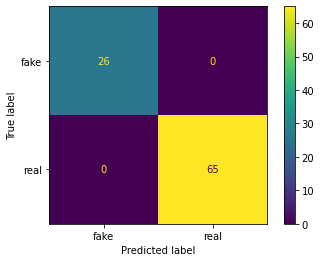

In [45]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['fake', 'real'])
disp.plot()
plt.show()

# Testing The Model With Outside Images

In [46]:
def prepare_image(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    new_array = new_array / 255.0
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [47]:
prediction = model.predict([prepare_image("pokemon_image_data/outside_sources/google_img_1.jpg")])
print(prediction)
index = int(round(prediction[0][0]))
print(CATEGORIES[index])

[[1.9471545e-10]]
fake


In [48]:
prediction = model.predict([prepare_image("pokemon_image_data/outside_sources/flipsidegaming_fake.jpg")])
print(prediction)
index = int(round(prediction[0][0]))
print(CATEGORIES[index])

[[7.9386616e-08]]
fake


In [49]:
prediction = model.predict([prepare_image("pokemon_image_data/outside_sources/reddit_card.jpg")])
print(prediction)
index = int(round(prediction[0][0]))
print(CATEGORIES[index])

[[1.]]
real


# Web App Setup

In [50]:
# !pip install gradio
import gradio as gr

In [51]:
def predict_image(img):
    gray_img = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)
    new_img = np.array(gray_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    new_img = new_img / 255.0
    prediction = model.predict(new_img)[0][0]
    index = int(round(prediction))
    if index == 0:
        prediction = 1 - prediction
    return {CATEGORIES[index]: float(prediction)}

In [ ]:
image = gr.inputs.Image(shape=(IMG_SIZE, IMG_SIZE))
label = gr.outputs.Label(num_top_classes=2)

gr.Interface(fn=predict_image, inputs=image, outputs=label, interpretation='default').launch(debug='True', share=True)

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://43070.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
